In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re

%matplotlib inline

# figure size in inches
rcParams['figure.figsize'] = 10,8

In [3]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

#Looking data format and types
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null 

In [4]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
df_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [6]:
df_train["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

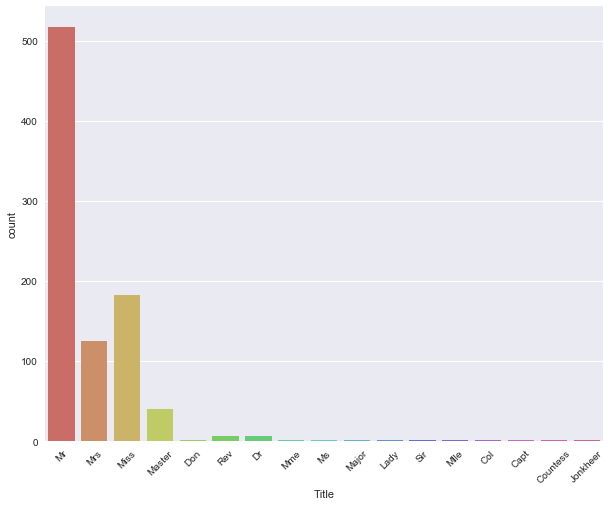

In [7]:
df_train['Title'] = df_train.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

#Plotting the result
sns.countplot(x='Title', data=df_train, palette="hls")
plt.xticks(rotation=45)
plt.show()

In [8]:
df_test['Title'] = df_test.Name.apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

In [9]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
    
# we map each title to correct category
df_train['Title'] = df_train.Title.map(Title_Dictionary)
df_test['Title'] = df_test.Title.map(Title_Dictionary)

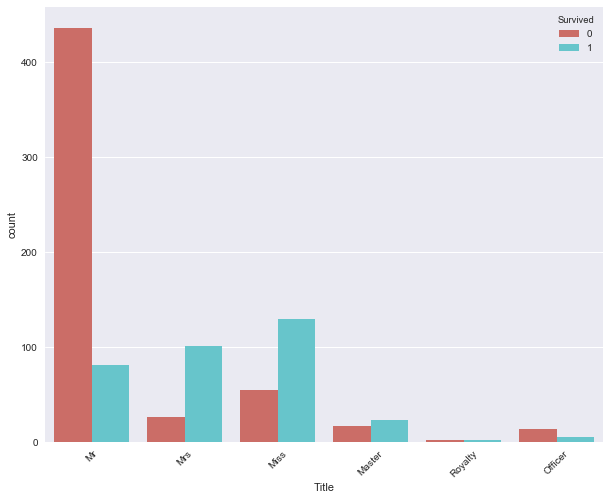

In [10]:
sns.countplot(x='Title', data=df_train, palette="hls",hue="Survived")
plt.xticks(rotation=45)
plt.show()

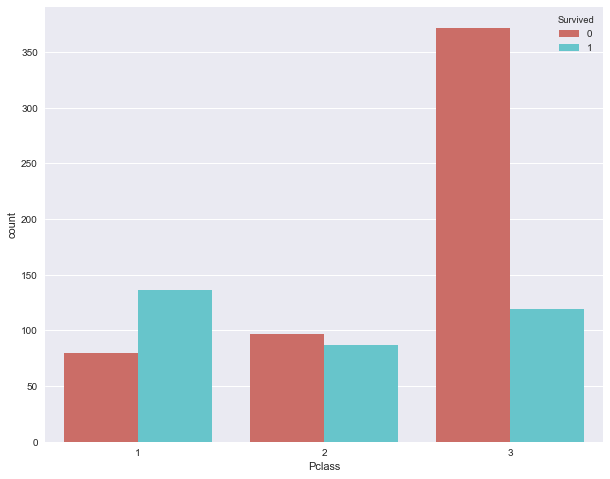

In [11]:
sns.countplot(x='Pclass', data=df_train, palette="hls",hue="Survived")

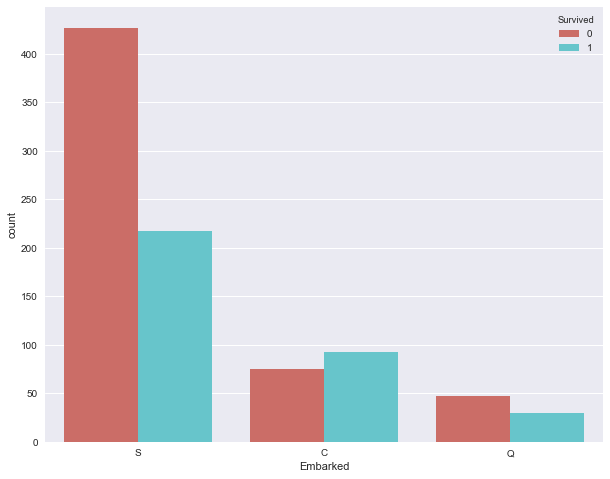

In [12]:
sns.countplot(x='Embarked', data=df_train, palette="hls",hue="Survived") #출항지

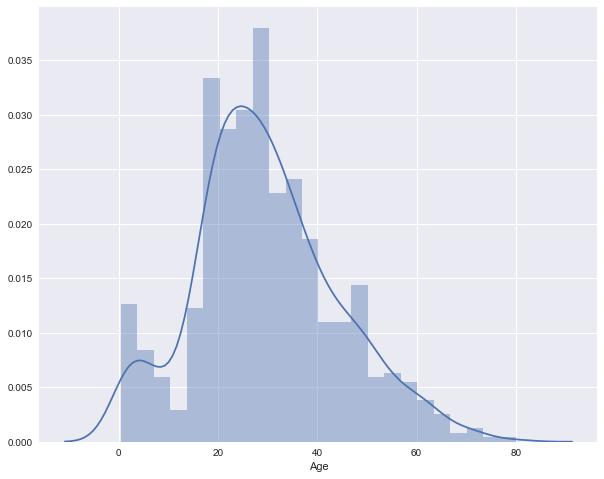

In [13]:
age_high_zero = df_train[df_train["Age"] > 0]

sns.distplot(age_high_zero["Age"], bins=24)

In [14]:
age_group = df_train.groupby(["Sex","Pclass","Title"])["Age"]

print(age_group.median())

Sex     Pclass  Title  
female  1       Miss       30.0
                Mrs        40.0
                Officer    49.0
                Royalty    48.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Master      4.0
                Mr         40.0
                Officer    51.0
                Royalty    40.0
        2       Master      1.0
                Mr         31.0
                Officer    46.5
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


In [15]:
df_train.loc[df_train.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
df_test.loc[df_test.Age.isnull(), 'Age'] = df_train.groupby(['Sex','Pclass','Title']).Age.transform('median')
print(df_train["Age"].isnull().sum())

0


In [23]:
Sex_Dictionary = {
        "male":     0,
        "female":    1
}
    
# we map each title to correct category
df_train['SexNum'] = df_train.Sex.map(Sex_Dictionary)
df_test['SexNum'] = df_test.Sex.map(Sex_Dictionary)

Embarked1_Dictionary = {
        "S":     1,
        "C":     0,
        "Q":     0
}
Embarked2_Dictionary = {
        "S":     0,
        "C":     1,
        "Q":     0
}
Embarked3_Dictionary = {
        "S":     0,
        "C":     0,
        "Q":    1
}
    
# we map each title to correct category
df_train['Embarked1Num'] = df_train.Embarked.map(Embarked1_Dictionary)
df_test['Embarked1Num'] = df_test.Embarked.map(Embarked1_Dictionary)
df_train['Embarked2Num'] = df_train.Embarked.map(Embarked2_Dictionary)
df_test['Embarked2Num'] = df_test.Embarked.map(Embarked2_Dictionary)
df_train['Embarked3Num'] = df_train.Embarked.map(Embarked3_Dictionary)
df_test['Embarked3Num'] = df_test.Embarked.map(Embarked3_Dictionary)

df_train['AgeNorm'] = (df_train['Age'] - df_train['Age'].min()) / (df_train['Age'].max() - df_train['Age'].min())
df_test['AgeNorm'] = (df_test['Age'] - df_train['Age'].min()) / (df_train['Age'].max() - df_train['Age'].min())
df_train['FareNorm'] = (df_train['Fare'] - df_train['Fare'].min()) / (df_train['Fare'].max() - df_train['Fare'].min())
df_test['FareNorm'] = (df_test['Fare'] - df_train['Fare'].min()) / (df_train['Fare'].max() - df_train['Fare'].min())
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Title  SexNum  \
0      0         A/5 21171   7.2500   NaN        S    Mr       0   
1      0          PC 17599  71.2833   C85        C   Mrs       1   
2      0  STON/O2. 3101282   7.9250   NaN        S  Miss       1   
3      0            113803  53.1000  C123       

In [40]:
import tensorflow as tf

x_data = df_train[["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()
y_data = df_train["Survived"].as_matrix()
y_data = y_data.reshape(-1, 1)

x_datatest = df_test[["Pclass", "SexNum", "Age", "SibSp", "Parch", "Fare"]].as_matrix()#, "Embarked1Num", "Embarked2Num", "Embarked3Num"]].as_matrix()

#x_data = [[1,2],[2,3],[3,1], [4,3], [5,3], [6,2]]
#y_data = [[0], [0], [0], [1], [1], [1]]#fail 0 pass 1
print(x_data[1])
#print(y_data)


[  1.       1.      38.       1.       0.      71.2833]


In [54]:

column_X = 6
hidden = 10
nb_classes = 1 #답의 가짓수

X = tf.placeholder(tf.float64, [None,column_X], name="X")
Y = tf.placeholder(tf.float64, [None,1], name="Y")


W1 = tf.Variable(tf.random_normal([column_X, hidden], name='weight1', dtype=tf.float64), dtype=tf.float64)
b1 = tf.Variable(tf.random_normal([hidden], name='bias1', dtype=tf.float64), dtype=tf.float64)
W2 = tf.Variable(tf.random_normal([hidden, nb_classes], name='weight2', dtype=tf.float64), dtype=tf.float64)
b2 = tf.Variable(tf.random_normal([nb_classes], name='bias2', dtype=tf.float64), dtype=tf.float64)

hypo1 = tf.sigmoid(tf.matmul(X, W1) + b1)
hypothesis = tf.sigmoid(tf.matmul(hypo1, W2) + b2)
cost = -tf.reduce_mean(Y*tf.log(hypothesis) + (1-Y)*(tf.log(1-hypothesis)))
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(cost)
#hypothesis = tf.matmul(X, W) + b
#cost = tf.reduce_mean(tf.square(hypothesis - Y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost)

prediction = tf.cast(hypothesis > 0.5, dtype=tf.int32)
#is_correct = tf.equal(prediction, Y)
#accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float64))

sess = tf.Session()

sess.run(tf.global_variables_initializer())

for step in range(100000):
    cost_val, _ = sess.run([cost, optimizer], feed_dict={X: x_data, Y: y_data})
    print(step, "Cost: ", cost_val)
    
h, c = sess.run([hypothesis, prediction], feed_dict={X: x_datatest})

output = pd.DataFrame(data=c)

#print(output)
df_test["Survived"] = output
result = df_test[["PassengerId", "Survived"]]
#print(result)
result.to_csv("a.csv", sep=',', index=False)
print("done")

0 Cost:  1.58025308284
1 Cost:  1.5797607426
2 Cost:  1.57926846651
3 Cost:  1.57877625599
4 Cost:  1.57828410867
5 Cost:  1.5777920273
6 Cost:  1.5773000139
7 Cost:  1.57680806803
8 Cost:  1.57631619172
9 Cost:  1.57582438668
10 Cost:  1.57533265304
11 Cost:  1.57484099249
12 Cost:  1.57434940659
13 Cost:  1.57385789562
14 Cost:  1.57336646111
15 Cost:  1.57287510346
16 Cost:  1.57238382412
17 Cost:  1.57189262356
18 Cost:  1.57140150314
19 Cost:  1.57091046337
20 Cost:  1.57041950551
21 Cost:  1.56992863008
22 Cost:  1.56943783827
23 Cost:  1.56894713055
24 Cost:  1.56845650806
25 Cost:  1.56796597125
26 Cost:  1.5674755206
27 Cost:  1.56698515713
28 Cost:  1.56649488128
29 Cost:  1.5660046935
30 Cost:  1.56551459471
31 Cost:  1.56502458532
32 Cost:  1.56453466572
33 Cost:  1.56404483677
34 Cost:  1.56355509882
35 Cost:  1.56306545223
36 Cost:  1.56257589735
37 Cost:  1.56208643493
38 Cost:  1.56159706526
39 Cost:  1.56110778867
40 Cost:  1.56061860546
41 Cost:  1.5601295159
42 Cost:

506 Cost:  1.34040555639
507 Cost:  1.33995730151
508 Cost:  1.33950870293
509 Cost:  1.33905973854
510 Cost:  1.33861038586
511 Cost:  1.33816062213
512 Cost:  1.33771042438
513 Cost:  1.33725976956
514 Cost:  1.33680863459
515 Cost:  1.33635699661
516 Cost:  1.33590483302
517 Cost:  1.33545212177
518 Cost:  1.3349988415
519 Cost:  1.33454497184
520 Cost:  1.33409049363
521 Cost:  1.33363538928
522 Cost:  1.33317964304
523 Cost:  1.33272324145
524 Cost:  1.33226617369
525 Cost:  1.331808432
526 Cost:  1.33135001222
527 Cost:  1.33089091416
528 Cost:  1.33043114223
529 Cost:  1.32997070584
530 Cost:  1.32950962
531 Cost:  1.32904790575
532 Cost:  1.32858559066
533 Cost:  1.3281227093
534 Cost:  1.3276593036
535 Cost:  1.32719542312
536 Cost:  1.32673112528
537 Cost:  1.32626647542
538 Cost:  1.32580154673
539 Cost:  1.3253364201
540 Cost:  1.32487118373
541 Cost:  1.32440593256
542 Cost:  1.32394076759
543 Cost:  1.32347579494
544 Cost:  1.32301112484
545 Cost:  1.32254687043
546 Cost:

999 Cost:  1.15095780506
1000 Cost:  1.1506136061
1001 Cost:  1.15026946672
1002 Cost:  1.14992538375
1003 Cost:  1.14958135389
1004 Cost:  1.1492373736
1005 Cost:  1.14889343917
1006 Cost:  1.14854954668
1007 Cost:  1.14820569196
1008 Cost:  1.14786187059
1009 Cost:  1.14751807788
1010 Cost:  1.14717430885
1011 Cost:  1.14683055818
1012 Cost:  1.1464868202
1013 Cost:  1.14614308885
1014 Cost:  1.14579935767
1015 Cost:  1.14545561971
1016 Cost:  1.14511186753
1017 Cost:  1.14476809313
1018 Cost:  1.14442428787
1019 Cost:  1.14408044245
1020 Cost:  1.14373654681
1021 Cost:  1.14339259006
1022 Cost:  1.14304856034
1023 Cost:  1.14270444478
1024 Cost:  1.14236022932
1025 Cost:  1.14201589862
1026 Cost:  1.14167143585
1027 Cost:  1.14132682252
1028 Cost:  1.14098203831
1029 Cost:  1.14063706075
1030 Cost:  1.14029186502
1031 Cost:  1.13994642356
1032 Cost:  1.13960070575
1033 Cost:  1.13925467746
1034 Cost:  1.13890830054
1035 Cost:  1.13856153227
1036 Cost:  1.1382143247
1037 Cost:  1.137

1503 Cost:  0.971125567266
1504 Cost:  0.970870776166
1505 Cost:  0.970616160718
1506 Cost:  0.970361721054
1507 Cost:  0.970107457304
1508 Cost:  0.96985336959
1509 Cost:  0.969599458025
1510 Cost:  0.96934572272
1511 Cost:  0.96909216378
1512 Cost:  0.968838781303
1513 Cost:  0.968585575381
1514 Cost:  0.9683325461
1515 Cost:  0.96807969354
1516 Cost:  0.967827017774
1517 Cost:  0.967574518872
1518 Cost:  0.967322196893
1519 Cost:  0.967070051894
1520 Cost:  0.966818083925
1521 Cost:  0.96656629303
1522 Cost:  0.966314679245
1523 Cost:  0.966063242602
1524 Cost:  0.965811983128
1525 Cost:  0.965560900839
1526 Cost:  0.965309995751
1527 Cost:  0.965059267868
1528 Cost:  0.964808717193
1529 Cost:  0.96455834372
1530 Cost:  0.964308147439
1531 Cost:  0.964058128335
1532 Cost:  0.963808286384
1533 Cost:  0.963558621558
1534 Cost:  0.963309133823
1535 Cost:  0.96305982314
1536 Cost:  0.962810689462
1537 Cost:  0.962561732736
1538 Cost:  0.962312952907
1539 Cost:  0.962064349912
1540 Cost:

2033 Cost:  0.856305062231
2034 Cost:  0.856117589304
2035 Cost:  0.855930189356
2036 Cost:  0.855742861938
2037 Cost:  0.855555606594
2038 Cost:  0.855368422859
2039 Cost:  0.855181310264
2040 Cost:  0.854994268333
2041 Cost:  0.854807296584
2042 Cost:  0.854620394523
2043 Cost:  0.854433561655
2044 Cost:  0.854246797475
2045 Cost:  0.854060101471
2046 Cost:  0.853873473122
2047 Cost:  0.853686911901
2048 Cost:  0.853500417274
2049 Cost:  0.853313988694
2050 Cost:  0.853127625611
2051 Cost:  0.852941327465
2052 Cost:  0.852755093685
2053 Cost:  0.852568923697
2054 Cost:  0.852382816911
2055 Cost:  0.852196772734
2056 Cost:  0.852010790561
2057 Cost:  0.851824869777
2058 Cost:  0.851639009758
2059 Cost:  0.851453209869
2060 Cost:  0.851267469468
2061 Cost:  0.8510817879
2062 Cost:  0.850896164499
2063 Cost:  0.85071059859
2064 Cost:  0.850525089487
2065 Cost:  0.850339636493
2066 Cost:  0.850154238897
2067 Cost:  0.849968895981
2068 Cost:  0.84978360701
2069 Cost:  0.84959837124
2070 C

2572 Cost:  0.726890347968
2573 Cost:  0.726652002679
2574 Cost:  0.726414130615
2575 Cost:  0.726176731881
2576 Cost:  0.72593980657
2577 Cost:  0.725703354767
2578 Cost:  0.725467376544
2579 Cost:  0.725231871967
2580 Cost:  0.724996841091
2581 Cost:  0.724762283964
2582 Cost:  0.724528200621
2583 Cost:  0.72429459109
2584 Cost:  0.724061455388
2585 Cost:  0.723828793523
2586 Cost:  0.723596605495
2587 Cost:  0.723364891292
2588 Cost:  0.723133650898
2589 Cost:  0.722902884281
2590 Cost:  0.722672591404
2591 Cost:  0.722442772219
2592 Cost:  0.72221342667
2593 Cost:  0.721984554689
2594 Cost:  0.721756156201
2595 Cost:  0.721528231122
2596 Cost:  0.721300779356
2597 Cost:  0.721073800801
2598 Cost:  0.720847295343
2599 Cost:  0.72062126286
2600 Cost:  0.720395703221
2601 Cost:  0.720170616285
2602 Cost:  0.719946001902
2603 Cost:  0.719721859912
2604 Cost:  0.719498190147
2605 Cost:  0.719274992429
2606 Cost:  0.71905226657
2607 Cost:  0.718830012373
2608 Cost:  0.718608229631
2609 C

3110 Cost:  0.651057051693
3111 Cost:  0.650978845811
3112 Cost:  0.650900768294
3113 Cost:  0.650822818716
3114 Cost:  0.650744996652
3115 Cost:  0.650667301677
3116 Cost:  0.65058973337
3117 Cost:  0.650512291312
3118 Cost:  0.650434975083
3119 Cost:  0.650357784268
3120 Cost:  0.65028071845
3121 Cost:  0.650203777218
3122 Cost:  0.650126960159
3123 Cost:  0.650050266864
3124 Cost:  0.649973696923
3125 Cost:  0.649897249932
3126 Cost:  0.649820925484
3127 Cost:  0.649744723178
3128 Cost:  0.649668642611
3129 Cost:  0.649592683385
3130 Cost:  0.6495168451
3131 Cost:  0.649441127362
3132 Cost:  0.649365529775
3133 Cost:  0.649290051947
3134 Cost:  0.649214693487
3135 Cost:  0.649139454005
3136 Cost:  0.649064333114
3137 Cost:  0.648989330429
3138 Cost:  0.648914445564
3139 Cost:  0.648839678138
3140 Cost:  0.648765027769
3141 Cost:  0.64869049408
3142 Cost:  0.648616076692
3143 Cost:  0.648541775231
3144 Cost:  0.648467589322
3145 Cost:  0.648393518593
3146 Cost:  0.648319562674
3147 C

3632 Cost:  0.621670437718
3633 Cost:  0.621629742206
3634 Cost:  0.621589096952
3635 Cost:  0.621548501964
3636 Cost:  0.621507957253
3637 Cost:  0.621467462828
3638 Cost:  0.6214270187
3639 Cost:  0.621386624876
3640 Cost:  0.621346281367
3641 Cost:  0.62130598818
3642 Cost:  0.621265745325
3643 Cost:  0.621225552809
3644 Cost:  0.62118541064
3645 Cost:  0.621145318826
3646 Cost:  0.621105277373
3647 Cost:  0.621065286288
3648 Cost:  0.621025345579
3649 Cost:  0.62098545525
3650 Cost:  0.620945615307
3651 Cost:  0.620905825757
3652 Cost:  0.620866086603
3653 Cost:  0.62082639785
3654 Cost:  0.620786759501
3655 Cost:  0.620747171561
3656 Cost:  0.620707634033
3657 Cost:  0.620668146919
3658 Cost:  0.620628710221
3659 Cost:  0.62058932394
3660 Cost:  0.620549988079
3661 Cost:  0.620510702637
3662 Cost:  0.620471467615
3663 Cost:  0.620432283013
3664 Cost:  0.620393148828
3665 Cost:  0.620354065061
3666 Cost:  0.620315031708
3667 Cost:  0.620276048768
3668 Cost:  0.620237116236
3669 Cos

4172 Cost:  0.605807874747
4173 Cost:  0.60578676386
4174 Cost:  0.605765674285
4175 Cost:  0.605744605985
4176 Cost:  0.605723558925
4177 Cost:  0.605702533068
4178 Cost:  0.605681528379
4179 Cost:  0.605660544823
4180 Cost:  0.605639582363
4181 Cost:  0.605618640964
4182 Cost:  0.60559772059
4183 Cost:  0.605576821206
4184 Cost:  0.605555942776
4185 Cost:  0.605535085264
4186 Cost:  0.605514248635
4187 Cost:  0.605493432854
4188 Cost:  0.605472637885
4189 Cost:  0.605451863693
4190 Cost:  0.605431110242
4191 Cost:  0.605410377497
4192 Cost:  0.605389665422
4193 Cost:  0.605368973984
4194 Cost:  0.605348303145
4195 Cost:  0.605327652872
4196 Cost:  0.605307023128
4197 Cost:  0.605286413879
4198 Cost:  0.60526582509
4199 Cost:  0.605245256725
4200 Cost:  0.60522470875
4201 Cost:  0.605204181129
4202 Cost:  0.605183673828
4203 Cost:  0.605163186812
4204 Cost:  0.605142720045
4205 Cost:  0.605122273492
4206 Cost:  0.60510184712
4207 Cost:  0.605081440893
4208 Cost:  0.605061054776
4209 C

4701 Cost:  0.596714819501
4702 Cost:  0.596698957829
4703 Cost:  0.596683070498
4704 Cost:  0.596667156513
4705 Cost:  0.596651214834
4706 Cost:  0.596635244364
4707 Cost:  0.596619243948
4708 Cost:  0.596603212373
4709 Cost:  0.596587148356
4710 Cost:  0.596571050544
4711 Cost:  0.596554917507
4712 Cost:  0.596538747728
4713 Cost:  0.596522539605
4714 Cost:  0.596506291434
4715 Cost:  0.596490001405
4716 Cost:  0.596473667595
4717 Cost:  0.596457287951
4718 Cost:  0.596440860288
4719 Cost:  0.596424382268
4720 Cost:  0.596407851389
4721 Cost:  0.596391264973
4722 Cost:  0.596374620142
4723 Cost:  0.596357913806
4724 Cost:  0.596341142636
4725 Cost:  0.59632430304
4726 Cost:  0.596307391138
4727 Cost:  0.59629040273
4728 Cost:  0.596273333263
4729 Cost:  0.596256177788
4730 Cost:  0.596238930919
4731 Cost:  0.596221586779
4732 Cost:  0.596204138946
4733 Cost:  0.596186580385
4734 Cost:  0.596168903374
4735 Cost:  0.596151099417
4736 Cost:  0.596133159144
4737 Cost:  0.5961150722
4738 

5211 Cost:  0.58457206464
5212 Cost:  0.584557169407
5213 Cost:  0.584542278555
5214 Cost:  0.584527392013
5215 Cost:  0.584512509712
5216 Cost:  0.584497631581
5217 Cost:  0.584482757551
5218 Cost:  0.584467887552
5219 Cost:  0.584453021513
5220 Cost:  0.584438159366
5221 Cost:  0.584423301039
5222 Cost:  0.584408446463
5223 Cost:  0.584393595567
5224 Cost:  0.584378748283
5225 Cost:  0.58436390454
5226 Cost:  0.584349064267
5227 Cost:  0.584334227396
5228 Cost:  0.584319393855
5229 Cost:  0.584304563576
5230 Cost:  0.584289736488
5231 Cost:  0.584274912522
5232 Cost:  0.584260091606
5233 Cost:  0.584245273673
5234 Cost:  0.584230458651
5235 Cost:  0.584215646471
5236 Cost:  0.584200837063
5237 Cost:  0.584186030357
5238 Cost:  0.584171226284
5239 Cost:  0.584156424773
5240 Cost:  0.584141625755
5241 Cost:  0.584126829159
5242 Cost:  0.584112034917
5243 Cost:  0.584097242958
5244 Cost:  0.584082453212
5245 Cost:  0.58406766561
5246 Cost:  0.584052880082
5247 Cost:  0.584038096558
5248

5747 Cost:  0.574297801889
5748 Cost:  0.574264228314
5749 Cost:  0.57423056042
5750 Cost:  0.574196798528
5751 Cost:  0.574162942976
5752 Cost:  0.574128994116
5753 Cost:  0.574094952315
5754 Cost:  0.574060817957
5755 Cost:  0.574026591439
5756 Cost:  0.573992273174
5757 Cost:  0.573957863592
5758 Cost:  0.573923363135
5759 Cost:  0.573888772265
5760 Cost:  0.573854091456
5761 Cost:  0.573819321199
5762 Cost:  0.573784462002
5763 Cost:  0.573749514387
5764 Cost:  0.573714478891
5765 Cost:  0.57367935607
5766 Cost:  0.573644146494
5767 Cost:  0.573608850747
5768 Cost:  0.573573469432
5769 Cost:  0.573538003167
5770 Cost:  0.573502452583
5771 Cost:  0.573466818332
5772 Cost:  0.573431101077
5773 Cost:  0.573395301499
5774 Cost:  0.573359420294
5775 Cost:  0.573323458175
5776 Cost:  0.573287415869
5777 Cost:  0.573251294119
5778 Cost:  0.573215093683
5779 Cost:  0.573178815335
5780 Cost:  0.573142459864
5781 Cost:  0.573106028075
5782 Cost:  0.573069520786
5783 Cost:  0.573032938833
578

6277 Cost:  0.557700718176
6278 Cost:  0.5576750272
6279 Cost:  0.557649282017
6280 Cost:  0.557623481253
6281 Cost:  0.557597623517
6282 Cost:  0.557571707407
6283 Cost:  0.557545731505
6284 Cost:  0.557519694381
6285 Cost:  0.557493594594
6286 Cost:  0.557467430693
6287 Cost:  0.557441201219
6288 Cost:  0.557414904705
6289 Cost:  0.557388539677
6290 Cost:  0.557362104659
6291 Cost:  0.557335598174
6292 Cost:  0.55730901874
6293 Cost:  0.557282364881
6294 Cost:  0.557255635125
6295 Cost:  0.557228828004
6296 Cost:  0.557201942061
6297 Cost:  0.557174975848
6298 Cost:  0.557147927934
6299 Cost:  0.557120796904
6300 Cost:  0.557093581361
6301 Cost:  0.557066279933
6302 Cost:  0.557038891273
6303 Cost:  0.557011414063
6304 Cost:  0.556983847019
6305 Cost:  0.55695618889
6306 Cost:  0.556928438467
6307 Cost:  0.55690059458
6308 Cost:  0.556872656108
6309 Cost:  0.556844621978
6310 Cost:  0.556816491168
6311 Cost:  0.556788262714
6312 Cost:  0.55675993571
6313 Cost:  0.556731509313
6314 Co

6840 Cost:  0.539149006676
6841 Cost:  0.53911883559
6842 Cost:  0.539088673368
6843 Cost:  0.539058520051
6844 Cost:  0.539028375662
6845 Cost:  0.538998240216
6846 Cost:  0.538968113708
6847 Cost:  0.538937996123
6848 Cost:  0.538907887431
6849 Cost:  0.538877787586
6850 Cost:  0.538847696529
6851 Cost:  0.538817614189
6852 Cost:  0.538787540477
6853 Cost:  0.538757475293
6854 Cost:  0.538727418521
6855 Cost:  0.538697370032
6856 Cost:  0.538667329683
6857 Cost:  0.538637297316
6858 Cost:  0.538607272762
6859 Cost:  0.538577255835
6860 Cost:  0.538547246339
6861 Cost:  0.538517244061
6862 Cost:  0.538487248778
6863 Cost:  0.538457260252
6864 Cost:  0.538427278233
6865 Cost:  0.538397302458
6866 Cost:  0.538367332651
6867 Cost:  0.538337368525
6868 Cost:  0.53830740978
6869 Cost:  0.538277456104
6870 Cost:  0.538247507173
6871 Cost:  0.538217562652
6872 Cost:  0.538187622195
6873 Cost:  0.538157685444
6874 Cost:  0.538127752032
6875 Cost:  0.53809782158
6876 Cost:  0.538067893698
6877

7402 Cost:  0.5206621989
7403 Cost:  0.520633774396
7404 Cost:  0.520605366137
7405 Cost:  0.520576974042
7406 Cost:  0.520548598031
7407 Cost:  0.520520238024
7408 Cost:  0.520491893943
7409 Cost:  0.520463565711
7410 Cost:  0.520435253252
7411 Cost:  0.520406956492
7412 Cost:  0.520378675357
7413 Cost:  0.520350409775
7414 Cost:  0.520322159675
7415 Cost:  0.520293924986
7416 Cost:  0.520265705639
7417 Cost:  0.520237501565
7418 Cost:  0.520209312699
7419 Cost:  0.520181138974
7420 Cost:  0.520152980324
7421 Cost:  0.520124836686
7422 Cost:  0.520096707996
7423 Cost:  0.520068594193
7424 Cost:  0.520040495215
7425 Cost:  0.520012411002
7426 Cost:  0.519984341493
7427 Cost:  0.519956286632
7428 Cost:  0.51992824636
7429 Cost:  0.51990022062
7430 Cost:  0.519872209356
7431 Cost:  0.519844212514
7432 Cost:  0.519816230038
7433 Cost:  0.519788261876
7434 Cost:  0.519760307974
7435 Cost:  0.51973236828
7436 Cost:  0.519704442744
7437 Cost:  0.519676531314
7438 Cost:  0.519648633941
7439 C

7951 Cost:  0.507182191267
7952 Cost:  0.507161954329
7953 Cost:  0.507141733986
7954 Cost:  0.507121530291
7955 Cost:  0.507101343294
7956 Cost:  0.507081173049
7957 Cost:  0.507061019607
7958 Cost:  0.50704088302
7959 Cost:  0.507020763339
7960 Cost:  0.507000660616
7961 Cost:  0.506980574903
7962 Cost:  0.506960506251
7963 Cost:  0.50694045471
7964 Cost:  0.506920420333
7965 Cost:  0.506900403168
7966 Cost:  0.506880403267
7967 Cost:  0.506860420679
7968 Cost:  0.506840455453
7969 Cost:  0.506820507637
7970 Cost:  0.506800577281
7971 Cost:  0.506780664431
7972 Cost:  0.506760769134
7973 Cost:  0.506740891437
7974 Cost:  0.506721031385
7975 Cost:  0.506701189023
7976 Cost:  0.506681364394
7977 Cost:  0.506661557543
7978 Cost:  0.50664176851
7979 Cost:  0.506621997338
7980 Cost:  0.506602244065
7981 Cost:  0.506582508732
7982 Cost:  0.506562791376
7983 Cost:  0.506543092034
7984 Cost:  0.506523410742
7985 Cost:  0.506503747534
7986 Cost:  0.506484102443
7987 Cost:  0.506464475501
7988

8518 Cost:  0.497529859114
8519 Cost:  0.497513772568
8520 Cost:  0.497497679866
8521 Cost:  0.497481580906
8522 Cost:  0.497465475581
8523 Cost:  0.497449363783
8524 Cost:  0.497433245403
8525 Cost:  0.497417120328
8526 Cost:  0.497400988444
8527 Cost:  0.497384849637
8528 Cost:  0.497368703789
8529 Cost:  0.497352550778
8530 Cost:  0.497336390485
8531 Cost:  0.497320222783
8532 Cost:  0.497304047547
8533 Cost:  0.497287864647
8534 Cost:  0.497271673951
8535 Cost:  0.497255475327
8536 Cost:  0.497239268637
8537 Cost:  0.497223053741
8538 Cost:  0.497206830498
8539 Cost:  0.497190598763
8540 Cost:  0.497174358387
8541 Cost:  0.497158109221
8542 Cost:  0.497141851109
8543 Cost:  0.497125583895
8544 Cost:  0.497109307418
8545 Cost:  0.497093021514
8546 Cost:  0.497076726016
8547 Cost:  0.497060420752
8548 Cost:  0.497044105547
8549 Cost:  0.497027780224
8550 Cost:  0.497011444598
8551 Cost:  0.496995098483
8552 Cost:  0.496978741688
8553 Cost:  0.496962374017
8554 Cost:  0.496945995269
8

9080 Cost:  0.472476498772
9081 Cost:  0.472446864213
9082 Cost:  0.472417311419
9083 Cost:  0.472387838825
9084 Cost:  0.472358444884
9085 Cost:  0.47232912806
9086 Cost:  0.472299886826
9087 Cost:  0.472270719659
9088 Cost:  0.472241625036
9089 Cost:  0.472212601434
9090 Cost:  0.472183647321
9091 Cost:  0.472154761158
9092 Cost:  0.472125941396
9093 Cost:  0.472097186471
9094 Cost:  0.4720684948
9095 Cost:  0.47203986478
9096 Cost:  0.472011294784
9097 Cost:  0.471982783154
9098 Cost:  0.471954328198
9099 Cost:  0.471925928184
9100 Cost:  0.471897581333
9101 Cost:  0.47186928581
9102 Cost:  0.471841039721
9103 Cost:  0.471812841102
9104 Cost:  0.471784687907
9105 Cost:  0.471756578003
9106 Cost:  0.471728509156
9107 Cost:  0.471700479022
9108 Cost:  0.47167248513
9109 Cost:  0.471644524871
9110 Cost:  0.471616595484
9111 Cost:  0.471588694037
9112 Cost:  0.471560817408
9113 Cost:  0.47153296227
9114 Cost:  0.471505125065
9115 Cost:  0.471477301985
9116 Cost:  0.471449488944
9117 Cos

9645 Cost:  0.460602640318
9646 Cost:  0.460586924712
9647 Cost:  0.460571218345
9648 Cost:  0.4605555212
9649 Cost:  0.460539833258
9650 Cost:  0.460524154501
9651 Cost:  0.460508484912
9652 Cost:  0.460492824472
9653 Cost:  0.460477173163
9654 Cost:  0.460461530967
9655 Cost:  0.460445897867
9656 Cost:  0.460430273845
9657 Cost:  0.460414658883
9658 Cost:  0.460399052963
9659 Cost:  0.460383456067
9660 Cost:  0.460367868177
9661 Cost:  0.460352289277
9662 Cost:  0.460336719347
9663 Cost:  0.460321158372
9664 Cost:  0.460305606332
9665 Cost:  0.46029006321
9666 Cost:  0.46027452899
9667 Cost:  0.460259003653
9668 Cost:  0.460243487182
9669 Cost:  0.460227979559
9670 Cost:  0.460212480768
9671 Cost:  0.46019699079
9672 Cost:  0.460181509609
9673 Cost:  0.460166037206
9674 Cost:  0.460150573565
9675 Cost:  0.460135118669
9676 Cost:  0.4601196725
9677 Cost:  0.460104235041
9678 Cost:  0.460088806276
9679 Cost:  0.460073386185
9680 Cost:  0.460057974754
9681 Cost:  0.460042571964
9682 Cos

10208 Cost:  0.452800247277
10209 Cost:  0.45278769997
10210 Cost:  0.452775155945
10211 Cost:  0.452762615199
10212 Cost:  0.452750077726
10213 Cost:  0.452737543521
10214 Cost:  0.45272501258
10215 Cost:  0.452712484899
10216 Cost:  0.452699960473
10217 Cost:  0.452687439298
10218 Cost:  0.452674921368
10219 Cost:  0.45266240668
10220 Cost:  0.452649895229
10221 Cost:  0.452637387011
10222 Cost:  0.452624882021
10223 Cost:  0.452612380254
10224 Cost:  0.452599881707
10225 Cost:  0.452587386375
10226 Cost:  0.452574894253
10227 Cost:  0.452562405337
10228 Cost:  0.452549919624
10229 Cost:  0.452537437107
10230 Cost:  0.452524957784
10231 Cost:  0.45251248165
10232 Cost:  0.4525000087
10233 Cost:  0.452487538931
10234 Cost:  0.452475072337
10235 Cost:  0.452462608916
10236 Cost:  0.452450148662
10237 Cost:  0.452437691571
10238 Cost:  0.452425237639
10239 Cost:  0.452412786862
10240 Cost:  0.452400339236
10241 Cost:  0.452387894756
10242 Cost:  0.452375453419
10243 Cost:  0.45236301521

10763 Cost:  0.446256378143
10764 Cost:  0.446245255707
10765 Cost:  0.446234135511
10766 Cost:  0.446223017552
10767 Cost:  0.446211901831
10768 Cost:  0.446200788347
10769 Cost:  0.446189677101
10770 Cost:  0.446178568091
10771 Cost:  0.446167461318
10772 Cost:  0.446156356782
10773 Cost:  0.446145254481
10774 Cost:  0.446134154416
10775 Cost:  0.446123056586
10776 Cost:  0.446111960991
10777 Cost:  0.446100867631
10778 Cost:  0.446089776505
10779 Cost:  0.446078687614
10780 Cost:  0.446067600956
10781 Cost:  0.446056516533
10782 Cost:  0.446045434342
10783 Cost:  0.446034354384
10784 Cost:  0.446023276659
10785 Cost:  0.446012201167
10786 Cost:  0.446001127907
10787 Cost:  0.445990056878
10788 Cost:  0.445978988082
10789 Cost:  0.445967921516
10790 Cost:  0.445956857182
10791 Cost:  0.445945795079
10792 Cost:  0.445934735206
10793 Cost:  0.445923677563
10794 Cost:  0.445912622151
10795 Cost:  0.445901568968
10796 Cost:  0.445890518015
10797 Cost:  0.445879469291
10798 Cost:  0.44586

11328 Cost:  0.440323281106
11329 Cost:  0.440313393998
11330 Cost:  0.440303509013
11331 Cost:  0.440293626151
11332 Cost:  0.44028374541
11333 Cost:  0.440273866791
11334 Cost:  0.440263990293
11335 Cost:  0.440254115917
11336 Cost:  0.44024424366
11337 Cost:  0.440234373524
11338 Cost:  0.440224505508
11339 Cost:  0.440214639612
11340 Cost:  0.440204775835
11341 Cost:  0.440194914177
11342 Cost:  0.440185054637
11343 Cost:  0.440175197216
11344 Cost:  0.440165341912
11345 Cost:  0.440155488726
11346 Cost:  0.440145637658
11347 Cost:  0.440135788706
11348 Cost:  0.44012594187
11349 Cost:  0.440116097151
11350 Cost:  0.440106254548
11351 Cost:  0.44009641406
11352 Cost:  0.440086575688
11353 Cost:  0.44007673943
11354 Cost:  0.440066905287
11355 Cost:  0.440057073257
11356 Cost:  0.440047243342
11357 Cost:  0.44003741554
11358 Cost:  0.440027589851
11359 Cost:  0.440017766275
11360 Cost:  0.440007944811
11361 Cost:  0.439998125459
11362 Cost:  0.439988308219
11363 Cost:  0.43997849309

11881 Cost:  0.435169733546
11882 Cost:  0.435160966553
11883 Cost:  0.435152201495
11884 Cost:  0.435143438371
11885 Cost:  0.435134677182
11886 Cost:  0.435125917927
11887 Cost:  0.435117160606
11888 Cost:  0.435108405218
11889 Cost:  0.435099651763
11890 Cost:  0.435090900241
11891 Cost:  0.435082150652
11892 Cost:  0.435073402996
11893 Cost:  0.435064657271
11894 Cost:  0.435055913479
11895 Cost:  0.435047171618
11896 Cost:  0.435038431689
11897 Cost:  0.435029693691
11898 Cost:  0.435020957624
11899 Cost:  0.435012223487
11900 Cost:  0.435003491281
11901 Cost:  0.434994761005
11902 Cost:  0.434986032659
11903 Cost:  0.434977306242
11904 Cost:  0.434968581755
11905 Cost:  0.434959859197
11906 Cost:  0.434951138568
11907 Cost:  0.434942419868
11908 Cost:  0.434933703096
11909 Cost:  0.434924988252
11910 Cost:  0.434916275337
11911 Cost:  0.434907564348
11912 Cost:  0.434898855288
11913 Cost:  0.434890148154
11914 Cost:  0.434881442947
11915 Cost:  0.434872739667
11916 Cost:  0.43486

12446 Cost:  0.430526771427
12447 Cost:  0.430519128165
12448 Cost:  0.430511486994
12449 Cost:  0.430503847913
12450 Cost:  0.430496210923
12451 Cost:  0.430488576022
12452 Cost:  0.43048094321
12453 Cost:  0.430473312485
12454 Cost:  0.430465683849
12455 Cost:  0.430458057298
12456 Cost:  0.430450432834
12457 Cost:  0.430442810456
12458 Cost:  0.430435190162
12459 Cost:  0.430427571952
12460 Cost:  0.430419955825
12461 Cost:  0.430412341781
12462 Cost:  0.430404729818
12463 Cost:  0.430397119937
12464 Cost:  0.430389512136
12465 Cost:  0.430381906415
12466 Cost:  0.430374302772
12467 Cost:  0.430366701208
12468 Cost:  0.430359101721
12469 Cost:  0.43035150431
12470 Cost:  0.430343908975
12471 Cost:  0.430336315715
12472 Cost:  0.430328724529
12473 Cost:  0.430321135416
12474 Cost:  0.430313548375
12475 Cost:  0.430305963406
12476 Cost:  0.430298380508
12477 Cost:  0.43029079968
12478 Cost:  0.43028322092
12479 Cost:  0.430275644229
12480 Cost:  0.430268069605
12481 Cost:  0.430260497

13009 Cost:  0.426519458425
13010 Cost:  0.426512804167
13011 Cost:  0.426506151385
13012 Cost:  0.426499500079
13013 Cost:  0.426492850248
13014 Cost:  0.426486201892
13015 Cost:  0.42647955501
13016 Cost:  0.426472909603
13017 Cost:  0.426466265669
13018 Cost:  0.426459623209
13019 Cost:  0.426452982222
13020 Cost:  0.426446342708
13021 Cost:  0.426439704667
13022 Cost:  0.426433068097
13023 Cost:  0.426426433
13024 Cost:  0.426419799374
13025 Cost:  0.426413167219
13026 Cost:  0.426406536535
13027 Cost:  0.426399907322
13028 Cost:  0.426393279579
13029 Cost:  0.426386653305
13030 Cost:  0.426380028502
13031 Cost:  0.426373405168
13032 Cost:  0.426366783303
13033 Cost:  0.426360162906
13034 Cost:  0.426353543979
13035 Cost:  0.426346926519
13036 Cost:  0.426340310527
13037 Cost:  0.426333696004
13038 Cost:  0.426327082947
13039 Cost:  0.426320471358
13040 Cost:  0.426313861236
13041 Cost:  0.42630725258
13042 Cost:  0.426300645391
13043 Cost:  0.426294039668
13044 Cost:  0.4262874354

13568 Cost:  0.423032218752
13569 Cost:  0.423026412412
13570 Cost:  0.42302060765
13571 Cost:  0.423014804466
13572 Cost:  0.423009002858
13573 Cost:  0.423003202828
13574 Cost:  0.422997404375
13575 Cost:  0.422991607498
13576 Cost:  0.422985812198
13577 Cost:  0.422980018474
13578 Cost:  0.422974226326
13579 Cost:  0.422968435753
13580 Cost:  0.422962646757
13581 Cost:  0.422956859336
13582 Cost:  0.42295107349
13583 Cost:  0.422945289219
13584 Cost:  0.422939506523
13585 Cost:  0.422933725402
13586 Cost:  0.422927945854
13587 Cost:  0.422922167881
13588 Cost:  0.422916391482
13589 Cost:  0.422910616656
13590 Cost:  0.422904843403
13591 Cost:  0.422899071724
13592 Cost:  0.422893301617
13593 Cost:  0.422887533083
13594 Cost:  0.422881766121
13595 Cost:  0.422876000732
13596 Cost:  0.422870236914
13597 Cost:  0.422864474667
13598 Cost:  0.422858713991
13599 Cost:  0.422852954887
13600 Cost:  0.422847197353
13601 Cost:  0.422841441389
13602 Cost:  0.422835686996
13603 Cost:  0.4228299

14134 Cost:  0.419977316577
14135 Cost:  0.419972267913
14136 Cost:  0.419967220178
14137 Cost:  0.419962173371
14138 Cost:  0.419957127489
14139 Cost:  0.419952082531
14140 Cost:  0.419947038494
14141 Cost:  0.419941995376
14142 Cost:  0.419936953175
14143 Cost:  0.419931911889
14144 Cost:  0.419926871517
14145 Cost:  0.419921832056
14146 Cost:  0.419916793503
14147 Cost:  0.419911755857
14148 Cost:  0.419906719116
14149 Cost:  0.419901683278
14150 Cost:  0.41989664834
14151 Cost:  0.419891614301
14152 Cost:  0.419886581158
14153 Cost:  0.419881548909
14154 Cost:  0.419876517553
14155 Cost:  0.419871487086
14156 Cost:  0.419866457508
14157 Cost:  0.419861428815
14158 Cost:  0.419856401006
14159 Cost:  0.419851374078
14160 Cost:  0.41984634803
14161 Cost:  0.419841322858
14162 Cost:  0.419836298562
14163 Cost:  0.419831275139
14164 Cost:  0.419826252587
14165 Cost:  0.419821230904
14166 Cost:  0.419816210086
14167 Cost:  0.419811190134
14168 Cost:  0.419806171043
14169 Cost:  0.4198011

14690 Cost:  0.417236812204
14691 Cost:  0.417231842398
14692 Cost:  0.417226871977
14693 Cost:  0.417221900942
14694 Cost:  0.417216929292
14695 Cost:  0.417211957027
14696 Cost:  0.41720698415
14697 Cost:  0.417202010659
14698 Cost:  0.417197036555
14699 Cost:  0.417192061839
14700 Cost:  0.417187086512
14701 Cost:  0.417182110574
14702 Cost:  0.417177134025
14703 Cost:  0.417172156867
14704 Cost:  0.417167179101
14705 Cost:  0.417162200726
14706 Cost:  0.417157221744
14707 Cost:  0.417152242156
14708 Cost:  0.417147261963
14709 Cost:  0.417142281166
14710 Cost:  0.417137299765
14711 Cost:  0.417132317762
14712 Cost:  0.417127335159
14713 Cost:  0.417122351955
14714 Cost:  0.417117368153
14715 Cost:  0.417112383753
14716 Cost:  0.417107398757
14717 Cost:  0.417102413167
14718 Cost:  0.417097426983
14719 Cost:  0.417092440207
14720 Cost:  0.417087452841
14721 Cost:  0.417082464885
14722 Cost:  0.417077476343
14723 Cost:  0.417072487214
14724 Cost:  0.417067497502
14725 Cost:  0.417062

15254 Cost:  0.414426893649
15255 Cost:  0.414421933377
15256 Cost:  0.414416972117
15257 Cost:  0.414412009855
15258 Cost:  0.414407046577
15259 Cost:  0.414402082269
15260 Cost:  0.414397116917
15261 Cost:  0.414392150507
15262 Cost:  0.414387183025
15263 Cost:  0.414382214456
15264 Cost:  0.414377244786
15265 Cost:  0.414372274001
15266 Cost:  0.414367302087
15267 Cost:  0.414362329028
15268 Cost:  0.414357354811
15269 Cost:  0.414352379421
15270 Cost:  0.414347402843
15271 Cost:  0.414342425063
15272 Cost:  0.414337446065
15273 Cost:  0.414332465835
15274 Cost:  0.414327484359
15275 Cost:  0.414322501621
15276 Cost:  0.414317517606
15277 Cost:  0.414312532299
15278 Cost:  0.414307545685
15279 Cost:  0.41430255775
15280 Cost:  0.414297568477
15281 Cost:  0.414292577852
15282 Cost:  0.414287585859
15283 Cost:  0.414282592482
15284 Cost:  0.414277597708
15285 Cost:  0.414272601519
15286 Cost:  0.414267603901
15287 Cost:  0.414262604838
15288 Cost:  0.414257604315
15289 Cost:  0.414252

15813 Cost:  0.411261096362
15814 Cost:  0.411254490127
15815 Cost:  0.411247877073
15816 Cost:  0.411241257195
15817 Cost:  0.411234630491
15818 Cost:  0.411227996958
15819 Cost:  0.411221356599
15820 Cost:  0.411214709416
15821 Cost:  0.411208055414
15822 Cost:  0.411201394598
15823 Cost:  0.41119472698
15824 Cost:  0.411188052568
15825 Cost:  0.411181371378
15826 Cost:  0.411174683424
15827 Cost:  0.411167988724
15828 Cost:  0.411161287299
15829 Cost:  0.411154579171
15830 Cost:  0.411147864365
15831 Cost:  0.41114114291
15832 Cost:  0.411134414835
15833 Cost:  0.411127680173
15834 Cost:  0.41112093896
15835 Cost:  0.411114191235
15836 Cost:  0.411107437038
15837 Cost:  0.411100676413
15838 Cost:  0.411093909407
15839 Cost:  0.411087136069
15840 Cost:  0.411080356454
15841 Cost:  0.411073570615
15842 Cost:  0.411066778613
15843 Cost:  0.411059980509
15844 Cost:  0.411053176368
15845 Cost:  0.411046366258
15846 Cost:  0.411039550251
15847 Cost:  0.411032728422
15848 Cost:  0.41102590

16370 Cost:  0.408261214822
16371 Cost:  0.408256923864
16372 Cost:  0.408252633964
16373 Cost:  0.40824834512
16374 Cost:  0.408244057327
16375 Cost:  0.408239770582
16376 Cost:  0.408235484882
16377 Cost:  0.408231200222
16378 Cost:  0.408226916601
16379 Cost:  0.408222634013
16380 Cost:  0.408218352457
16381 Cost:  0.408214071928
16382 Cost:  0.408209792424
16383 Cost:  0.40820551394
16384 Cost:  0.408201236475
16385 Cost:  0.408196960024
16386 Cost:  0.408192684584
16387 Cost:  0.408188410153
16388 Cost:  0.408184136727
16389 Cost:  0.408179864303
16390 Cost:  0.408175592877
16391 Cost:  0.408171322448
16392 Cost:  0.408167053011
16393 Cost:  0.408162784564
16394 Cost:  0.408158517104
16395 Cost:  0.408154250628
16396 Cost:  0.408149985132
16397 Cost:  0.408145720615
16398 Cost:  0.408141457072
16399 Cost:  0.408137194501
16400 Cost:  0.4081329329
16401 Cost:  0.408128672265
16402 Cost:  0.408124412594
16403 Cost:  0.408120153883
16404 Cost:  0.40811589613
16405 Cost:  0.4081116393

16936 Cost:  0.405952114702
16937 Cost:  0.405948206226
16938 Cost:  0.405944298288
16939 Cost:  0.405940390888
16940 Cost:  0.405936484026
16941 Cost:  0.405932577702
16942 Cost:  0.405928671915
16943 Cost:  0.405924766666
16944 Cost:  0.405920861955
16945 Cost:  0.40591695778
16946 Cost:  0.405913054142
16947 Cost:  0.405909151042
16948 Cost:  0.405905248478
16949 Cost:  0.405901346451
16950 Cost:  0.40589744496
16951 Cost:  0.405893544005
16952 Cost:  0.405889643586
16953 Cost:  0.405885743704
16954 Cost:  0.405881844357
16955 Cost:  0.405877945546
16956 Cost:  0.405874047271
16957 Cost:  0.405870149531
16958 Cost:  0.405866252326
16959 Cost:  0.405862355656
16960 Cost:  0.405858459522
16961 Cost:  0.405854563922
16962 Cost:  0.405850668857
16963 Cost:  0.405846774326
16964 Cost:  0.40584288033
16965 Cost:  0.405838986869
16966 Cost:  0.405835093941
16967 Cost:  0.405831201547
16968 Cost:  0.405827309687
16969 Cost:  0.405823418361
16970 Cost:  0.405819527569
16971 Cost:  0.40581563

17480 Cost:  0.403902635335
17481 Cost:  0.403899005832
17482 Cost:  0.403895376824
17483 Cost:  0.403891748311
17484 Cost:  0.403888120295
17485 Cost:  0.403884492773
17486 Cost:  0.403880865748
17487 Cost:  0.403877239217
17488 Cost:  0.403873613182
17489 Cost:  0.403869987643
17490 Cost:  0.403866362598
17491 Cost:  0.403862738049
17492 Cost:  0.403859113995
17493 Cost:  0.403855490436
17494 Cost:  0.403851867372
17495 Cost:  0.403848244804
17496 Cost:  0.40384462273
17497 Cost:  0.403841001151
17498 Cost:  0.403837380067
17499 Cost:  0.403833759478
17500 Cost:  0.403830139384
17501 Cost:  0.403826519784
17502 Cost:  0.403822900679
17503 Cost:  0.403819282069
17504 Cost:  0.403815663954
17505 Cost:  0.403812046333
17506 Cost:  0.403808429206
17507 Cost:  0.403804812574
17508 Cost:  0.403801196436
17509 Cost:  0.403797580793
17510 Cost:  0.403793965644
17511 Cost:  0.403790350989
17512 Cost:  0.403786736828
17513 Cost:  0.403783123162
17514 Cost:  0.403779509989
17515 Cost:  0.403775

18011 Cost:  0.402043903564
18012 Cost:  0.402040530294
18013 Cost:  0.402037157494
18014 Cost:  0.402033785162
18015 Cost:  0.402030413298
18016 Cost:  0.402027041903
18017 Cost:  0.402023670977
18018 Cost:  0.402020300518
18019 Cost:  0.402016930529
18020 Cost:  0.402013561007
18021 Cost:  0.402010191953
18022 Cost:  0.402006823368
18023 Cost:  0.402003455251
18024 Cost:  0.402000087601
18025 Cost:  0.40199672042
18026 Cost:  0.401993353706
18027 Cost:  0.401989987461
18028 Cost:  0.401986621683
18029 Cost:  0.401983256373
18030 Cost:  0.401979891531
18031 Cost:  0.401976527156
18032 Cost:  0.401973163249
18033 Cost:  0.401969799809
18034 Cost:  0.401966436837
18035 Cost:  0.401963074332
18036 Cost:  0.401959712294
18037 Cost:  0.401956350724
18038 Cost:  0.401952989621
18039 Cost:  0.401949628985
18040 Cost:  0.401946268817
18041 Cost:  0.401942909115
18042 Cost:  0.40193954988
18043 Cost:  0.401936191113
18044 Cost:  0.401932832812
18045 Cost:  0.401929474978
18046 Cost:  0.4019261

18549 Cost:  0.400295266402
18550 Cost:  0.400292136579
18551 Cost:  0.400289007192
18552 Cost:  0.400285878239
18553 Cost:  0.400282749721
18554 Cost:  0.400279621638
18555 Cost:  0.40027649399
18556 Cost:  0.400273366777
18557 Cost:  0.400270239998
18558 Cost:  0.400267113653
18559 Cost:  0.400263987743
18560 Cost:  0.400260862267
18561 Cost:  0.400257737226
18562 Cost:  0.400254612619
18563 Cost:  0.400251488446
18564 Cost:  0.400248364707
18565 Cost:  0.400245241402
18566 Cost:  0.400242118531
18567 Cost:  0.400238996094
18568 Cost:  0.400235874091
18569 Cost:  0.400232752521
18570 Cost:  0.400229631385
18571 Cost:  0.400226510683
18572 Cost:  0.400223390414
18573 Cost:  0.400220270579
18574 Cost:  0.400217151177
18575 Cost:  0.400214032209
18576 Cost:  0.400210913674
18577 Cost:  0.400207795572
18578 Cost:  0.400204677903
18579 Cost:  0.400201560667
18580 Cost:  0.400198443864
18581 Cost:  0.400195327494
18582 Cost:  0.400192211557
18583 Cost:  0.400189096053
18584 Cost:  0.400185

19065 Cost:  0.398686568464
19066 Cost:  0.398683463422
19067 Cost:  0.398680360221
19068 Cost:  0.398677259898
19069 Cost:  0.398674164413
19070 Cost:  0.398671077249
19071 Cost:  0.398668003403
19072 Cost:  0.398664946414
19073 Cost:  0.398661897054
19074 Cost:  0.398658818878
19075 Cost:  0.398655670356
19076 Cost:  0.398652481513
19077 Cost:  0.398649346296
19078 Cost:  0.398646291415
19079 Cost:  0.398643240773
19080 Cost:  0.398640123775
19081 Cost:  0.39863697488
19082 Cost:  0.398633875255
19083 Cost:  0.398630818873
19084 Cost:  0.398627734233
19085 Cost:  0.39862460887
19086 Cost:  0.398621502114
19087 Cost:  0.398618433419
19088 Cost:  0.398615355383
19089 Cost:  0.398612246739
19090 Cost:  0.398609145251
19091 Cost:  0.39860607086
19092 Cost:  0.398602993183
19093 Cost:  0.39859989477
19094 Cost:  0.398596800239
19095 Cost:  0.398593724128
19096 Cost:  0.39859064626
19097 Cost:  0.398587554839
19098 Cost:  0.398584466444
19099 Cost:  0.398581390419
19100 Cost:  0.3985783130

19565 Cost:  0.397200747053
19566 Cost:  0.397197883285
19567 Cost:  0.397195020547
19568 Cost:  0.397192158432
19569 Cost:  0.397189296181
19570 Cost:  0.397186434104
19571 Cost:  0.39718357282
19572 Cost:  0.397180712101
19573 Cost:  0.397177851438
19574 Cost:  0.397174990991
19575 Cost:  0.397172131178
19576 Cost:  0.397169271892
19577 Cost:  0.397166412788
19578 Cost:  0.397163553932
19579 Cost:  0.397160695604
19580 Cost:  0.397157837771
19581 Cost:  0.397154980205
19582 Cost:  0.397152122912
19583 Cost:  0.397149266078
19584 Cost:  0.397146409714
19585 Cost:  0.397143553668
19586 Cost:  0.39714069792
19587 Cost:  0.397137842585
19588 Cost:  0.397134987696
19589 Cost:  0.39713213316
19590 Cost:  0.397129278941
19591 Cost:  0.397126425109
19592 Cost:  0.397123571701
19593 Cost:  0.397120718665
19594 Cost:  0.397117865964
19595 Cost:  0.397115013635
19596 Cost:  0.397112161712
19597 Cost:  0.39710931017
19598 Cost:  0.397106458978
19599 Cost:  0.397103608149
19600 Cost:  0.397100757

20060 Cost:  0.395826103665
20061 Cost:  0.395823404757
20062 Cost:  0.395820706123
20063 Cost:  0.395818007757
20064 Cost:  0.395815309662
20065 Cost:  0.395812611841
20066 Cost:  0.395809914293
20067 Cost:  0.395807217014
20068 Cost:  0.395804520004
20069 Cost:  0.395801823265
20070 Cost:  0.395799126797
20071 Cost:  0.395796430598
20072 Cost:  0.395793734667
20073 Cost:  0.395791039005
20074 Cost:  0.395788343611
20075 Cost:  0.395785648486
20076 Cost:  0.395782953628
20077 Cost:  0.395780259037
20078 Cost:  0.395777564712
20079 Cost:  0.395774870655
20080 Cost:  0.395772176864
20081 Cost:  0.395769483337
20082 Cost:  0.395766790076
20083 Cost:  0.39576409708
20084 Cost:  0.395761404349
20085 Cost:  0.395758711882
20086 Cost:  0.395756019678
20087 Cost:  0.395753327738
20088 Cost:  0.39575063606
20089 Cost:  0.395747944646
20090 Cost:  0.395745253493
20091 Cost:  0.395742562602
20092 Cost:  0.395739871972
20093 Cost:  0.395737181604
20094 Cost:  0.395734491496
20095 Cost:  0.3957318

20587 Cost:  0.394410807254
20588 Cost:  0.394408002881
20589 Cost:  0.394405197583
20590 Cost:  0.394402391361
20591 Cost:  0.394399584219
20592 Cost:  0.394396776158
20593 Cost:  0.394393967179
20594 Cost:  0.394391157285
20595 Cost:  0.394388346477
20596 Cost:  0.394385534758
20597 Cost:  0.39438272213
20598 Cost:  0.394379908594
20599 Cost:  0.394377094152
20600 Cost:  0.394374278806
20601 Cost:  0.394371462559
20602 Cost:  0.394368645412
20603 Cost:  0.394365827367
20604 Cost:  0.394363008426
20605 Cost:  0.394360188591
20606 Cost:  0.394357367863
20607 Cost:  0.394354546246
20608 Cost:  0.39435172374
20609 Cost:  0.394348900348
20610 Cost:  0.394346076071
20611 Cost:  0.394343250912
20612 Cost:  0.394340424872
20613 Cost:  0.394337597953
20614 Cost:  0.394334770157
20615 Cost:  0.394331941485
20616 Cost:  0.394329111941
20617 Cost:  0.394326281524
20618 Cost:  0.394323450238
20619 Cost:  0.394320618083
20620 Cost:  0.394317785063
20621 Cost:  0.394314951177
20622 Cost:  0.3943121

21113 Cost:  0.392827232036
21114 Cost:  0.39282409558
21115 Cost:  0.39282095949
21116 Cost:  0.392817823776
21117 Cost:  0.392814688444
21118 Cost:  0.392811553502
21119 Cost:  0.39280841896
21120 Cost:  0.392805284824
21121 Cost:  0.392802151102
21122 Cost:  0.392799017802
21123 Cost:  0.392795884934
21124 Cost:  0.392792752503
21125 Cost:  0.392789620519
21126 Cost:  0.392786488989
21127 Cost:  0.392783357921
21128 Cost:  0.392780227323
21129 Cost:  0.392777097203
21130 Cost:  0.39277396757
21131 Cost:  0.39277083843
21132 Cost:  0.392767709792
21133 Cost:  0.392764581664
21134 Cost:  0.392761454054
21135 Cost:  0.392758326969
21136 Cost:  0.392755200418
21137 Cost:  0.392752074408
21138 Cost:  0.392748948948
21139 Cost:  0.392745824045
21140 Cost:  0.392742699707
21141 Cost:  0.392739575942
21142 Cost:  0.392736452758
21143 Cost:  0.392733330162
21144 Cost:  0.392730208164
21145 Cost:  0.39272708677
21146 Cost:  0.392723965988
21147 Cost:  0.392720845826
21148 Cost:  0.39271772629

21664 Cost:  0.391285431626
21665 Cost:  0.391283013883
21666 Cost:  0.391280597178
21667 Cost:  0.391278181508
21668 Cost:  0.391275766872
21669 Cost:  0.391273353266
21670 Cost:  0.391270940688
21671 Cost:  0.391268529134
21672 Cost:  0.391266118603
21673 Cost:  0.391263709092
21674 Cost:  0.391261300598
21675 Cost:  0.391258893119
21676 Cost:  0.391256486651
21677 Cost:  0.391254081193
21678 Cost:  0.391251676741
21679 Cost:  0.391249273293
21680 Cost:  0.391246870847
21681 Cost:  0.3912444694
21682 Cost:  0.391242068949
21683 Cost:  0.391239669492
21684 Cost:  0.391237271026
21685 Cost:  0.391234873549
21686 Cost:  0.391232477057
21687 Cost:  0.391230081549
21688 Cost:  0.391227687022
21689 Cost:  0.391225293474
21690 Cost:  0.391222900901
21691 Cost:  0.391220509301
21692 Cost:  0.391218118672
21693 Cost:  0.391215729012
21694 Cost:  0.391213340317
21695 Cost:  0.391210952585
21696 Cost:  0.391208565814
21697 Cost:  0.391206180001
21698 Cost:  0.391203795144
21699 Cost:  0.3912014

22190 Cost:  0.390111611783
22191 Cost:  0.390109545006
22192 Cost:  0.390107408657
22193 Cost:  0.390105212999
22194 Cost:  0.390103053291
22195 Cost:  0.390100984011
22196 Cost:  0.390098943796
22197 Cost:  0.390096843515
22198 Cost:  0.390094687833
22199 Cost:  0.390092564972
22200 Cost:  0.39009050178
22201 Cost:  0.390088429892
22202 Cost:  0.390086307102
22203 Cost:  0.390084181872
22204 Cost:  0.39008210002
22205 Cost:  0.390080027683
22206 Cost:  0.390077921936
22207 Cost:  0.390075805795
22208 Cost:  0.390073717293
22209 Cost:  0.390071640232
22210 Cost:  0.390069542258
22211 Cost:  0.390067434787
22212 Cost:  0.390065345003
22213 Cost:  0.390063264342
22214 Cost:  0.390061170368
22215 Cost:  0.390059069568
22216 Cost:  0.390056980362
22217 Cost:  0.390054897621
22218 Cost:  0.390052806321
22219 Cost:  0.390050710516
22220 Cost:  0.390048622448
22221 Cost:  0.390046538815
22222 Cost:  0.390044449679
22223 Cost:  0.390042357695
22224 Cost:  0.390040270921
22225 Cost:  0.3900381

22718 Cost:  0.389052320686
22719 Cost:  0.389050403155
22720 Cost:  0.389048485932
22721 Cost:  0.389046569003
22722 Cost:  0.389044652391
22723 Cost:  0.389042736111
22724 Cost:  0.389040820151
22725 Cost:  0.389038904492
22726 Cost:  0.389036989142
22727 Cost:  0.389035074117
22728 Cost:  0.389033159414
22729 Cost:  0.389031245019
22730 Cost:  0.389029330933
22731 Cost:  0.389027417164
22732 Cost:  0.389025503716
22733 Cost:  0.389023590582
22734 Cost:  0.389021677757
22735 Cost:  0.389019765245
22736 Cost:  0.389017853052
22737 Cost:  0.389015941175
22738 Cost:  0.389014029608
22739 Cost:  0.389012118354
22740 Cost:  0.389010207415
22741 Cost:  0.389008296792
22742 Cost:  0.389006386482
22743 Cost:  0.389004476484
22744 Cost:  0.389002566799
22745 Cost:  0.389000657429
22746 Cost:  0.388998748373
22747 Cost:  0.388996839629
22748 Cost:  0.388994931198
22749 Cost:  0.38899302308
22750 Cost:  0.388991115276
22751 Cost:  0.388989207785
22752 Cost:  0.388987300606
22753 Cost:  0.388985

23242 Cost:  0.388088820217
23243 Cost:  0.388087057033
23244 Cost:  0.388085294123
23245 Cost:  0.388083531487
23246 Cost:  0.388081769125
23247 Cost:  0.388080007038
23248 Cost:  0.388078245224
23249 Cost:  0.388076483684
23250 Cost:  0.388074722418
23251 Cost:  0.388072961426
23252 Cost:  0.388071200708
23253 Cost:  0.388069440263
23254 Cost:  0.388067680091
23255 Cost:  0.388065920193
23256 Cost:  0.388064160569
23257 Cost:  0.388062401217
23258 Cost:  0.388060642139
23259 Cost:  0.388058883335
23260 Cost:  0.388057124803
23261 Cost:  0.388055366544
23262 Cost:  0.388053608559
23263 Cost:  0.388051850846
23264 Cost:  0.388050093406
23265 Cost:  0.388048336239
23266 Cost:  0.388046579344
23267 Cost:  0.388044822722
23268 Cost:  0.388043066373
23269 Cost:  0.388041310296
23270 Cost:  0.388039554492
23271 Cost:  0.388037798959
23272 Cost:  0.3880360437
23273 Cost:  0.388034288712
23274 Cost:  0.388032533997
23275 Cost:  0.388030779553
23276 Cost:  0.388029025382
23277 Cost:  0.3880272

23764 Cost:  0.387204195677
23765 Cost:  0.387202566898
23766 Cost:  0.38720093836
23767 Cost:  0.387199310063
23768 Cost:  0.387197682007
23769 Cost:  0.387196054191
23770 Cost:  0.387194426616
23771 Cost:  0.387192799282
23772 Cost:  0.387191172188
23773 Cost:  0.387189545335
23774 Cost:  0.387187918722
23775 Cost:  0.38718629235
23776 Cost:  0.387184666218
23777 Cost:  0.387183040326
23778 Cost:  0.387181414675
23779 Cost:  0.387179789263
23780 Cost:  0.387178164092
23781 Cost:  0.38717653916
23782 Cost:  0.387174914469
23783 Cost:  0.387173290018
23784 Cost:  0.387171665806
23785 Cost:  0.387170041834
23786 Cost:  0.387168418102
23787 Cost:  0.387166794609
23788 Cost:  0.387165171356
23789 Cost:  0.387163548343
23790 Cost:  0.387161925569
23791 Cost:  0.387160303035
23792 Cost:  0.38715868074
23793 Cost:  0.387157058684
23794 Cost:  0.387155436867
23795 Cost:  0.38715381529
23796 Cost:  0.387152193952
23797 Cost:  0.387150572853
23798 Cost:  0.387148951993
23799 Cost:  0.3871473313

24277 Cost:  0.386398971124
24278 Cost:  0.386397458175
24279 Cost:  0.386395945436
24280 Cost:  0.386394432906
24281 Cost:  0.386392920585
24282 Cost:  0.386391408474
24283 Cost:  0.386389896572
24284 Cost:  0.38638838488
24285 Cost:  0.386386873397
24286 Cost:  0.386385362122
24287 Cost:  0.386383851057
24288 Cost:  0.386382340201
24289 Cost:  0.386380829553
24290 Cost:  0.386379319115
24291 Cost:  0.386377808885
24292 Cost:  0.386376298864
24293 Cost:  0.386374789052
24294 Cost:  0.386373279448
24295 Cost:  0.386371770053
24296 Cost:  0.386370260866
24297 Cost:  0.386368751888
24298 Cost:  0.386367243118
24299 Cost:  0.386365734556
24300 Cost:  0.386364226203
24301 Cost:  0.386362718058
24302 Cost:  0.38636121012
24303 Cost:  0.386359702391
24304 Cost:  0.38635819487
24305 Cost:  0.386356687557
24306 Cost:  0.386355180451
24307 Cost:  0.386353673553
24308 Cost:  0.386352166863
24309 Cost:  0.386350660381
24310 Cost:  0.386349154106
24311 Cost:  0.386347648039
24312 Cost:  0.38634614

24815 Cost:  0.385613646933
24816 Cost:  0.3856122374
24817 Cost:  0.38561082804
24818 Cost:  0.385609418854
24819 Cost:  0.385608009842
24820 Cost:  0.385606601003
24821 Cost:  0.385605192337
24822 Cost:  0.385603783845
24823 Cost:  0.385602375526
24824 Cost:  0.385600967381
24825 Cost:  0.385599559408
24826 Cost:  0.385598151609
24827 Cost:  0.385596743983
24828 Cost:  0.385595336529
24829 Cost:  0.385593929249
24830 Cost:  0.385592522141
24831 Cost:  0.385591115206
24832 Cost:  0.385589708444
24833 Cost:  0.385588301855
24834 Cost:  0.385586895438
24835 Cost:  0.385585489193
24836 Cost:  0.385584083121
24837 Cost:  0.385582677222
24838 Cost:  0.385581271494
24839 Cost:  0.385579865939
24840 Cost:  0.385578460556
24841 Cost:  0.385577055345
24842 Cost:  0.385575650306
24843 Cost:  0.385574245439
24844 Cost:  0.385572840744
24845 Cost:  0.385571436221
24846 Cost:  0.385570031869
24847 Cost:  0.38556862769
24848 Cost:  0.385567223681
24849 Cost:  0.385565819845
24850 Cost:  0.385564416

25339 Cost:  0.384897317845
25340 Cost:  0.3848959904
25341 Cost:  0.384894663095
25342 Cost:  0.38489333593
25343 Cost:  0.384892008904
25344 Cost:  0.384890682018
25345 Cost:  0.384889355271
25346 Cost:  0.384888028664
25347 Cost:  0.384886702197
25348 Cost:  0.384885375869
25349 Cost:  0.38488404968
25350 Cost:  0.384882723631
25351 Cost:  0.384881397721
25352 Cost:  0.38488007195
25353 Cost:  0.384878746319
25354 Cost:  0.384877420826
25355 Cost:  0.384876095473
25356 Cost:  0.384874770258
25357 Cost:  0.384873445182
25358 Cost:  0.384872120246
25359 Cost:  0.384870795448
25360 Cost:  0.384869470788
25361 Cost:  0.384868146268
25362 Cost:  0.384866821886
25363 Cost:  0.384865497643
25364 Cost:  0.384864173538
25365 Cost:  0.384862849572
25366 Cost:  0.384861525744
25367 Cost:  0.384860202054
25368 Cost:  0.384858878503
25369 Cost:  0.38485755509
25370 Cost:  0.384856231815
25371 Cost:  0.384854908679
25372 Cost:  0.38485358568
25373 Cost:  0.38485226282
25374 Cost:  0.384850940097


25776 Cost:  0.384329870016
25777 Cost:  0.384328598888
25778 Cost:  0.384327327878
25779 Cost:  0.384326056986
25780 Cost:  0.384324786212
25781 Cost:  0.384323515555
25782 Cost:  0.384322245017
25783 Cost:  0.384320974596
25784 Cost:  0.384319704293
25785 Cost:  0.384318434107
25786 Cost:  0.384317164039
25787 Cost:  0.384315894089
25788 Cost:  0.384314624256
25789 Cost:  0.38431335454
25790 Cost:  0.384312084942
25791 Cost:  0.384310815461
25792 Cost:  0.384309546098
25793 Cost:  0.384308276852
25794 Cost:  0.384307007723
25795 Cost:  0.384305738711
25796 Cost:  0.384304469816
25797 Cost:  0.384303201039
25798 Cost:  0.384301932378
25799 Cost:  0.384300663835
25800 Cost:  0.384299395408
25801 Cost:  0.384298127099
25802 Cost:  0.384296858906
25803 Cost:  0.38429559083
25804 Cost:  0.384294322871
25805 Cost:  0.384293055028
25806 Cost:  0.384291787303
25807 Cost:  0.384290519694
25808 Cost:  0.384289252201
25809 Cost:  0.384287984825
25810 Cost:  0.384286717566
25811 Cost:  0.3842854

26298 Cost:  0.383681328697
26299 Cost:  0.383680112514
26300 Cost:  0.38367889642
26301 Cost:  0.383677680415
26302 Cost:  0.383676464497
26303 Cost:  0.383675248668
26304 Cost:  0.383674032928
26305 Cost:  0.383672817275
26306 Cost:  0.383671601711
26307 Cost:  0.383670386234
26308 Cost:  0.383669170845
26309 Cost:  0.383667955544
26310 Cost:  0.383666740331
26311 Cost:  0.383665525205
26312 Cost:  0.383664310167
26313 Cost:  0.383663095217
26314 Cost:  0.383661880353
26315 Cost:  0.383660665577
26316 Cost:  0.383659450889
26317 Cost:  0.383658236287
26318 Cost:  0.383657021772
26319 Cost:  0.383655807344
26320 Cost:  0.383654593003
26321 Cost:  0.383653378749
26322 Cost:  0.383652164581
26323 Cost:  0.3836509505
26324 Cost:  0.383649736505
26325 Cost:  0.383648522597
26326 Cost:  0.383647308775
26327 Cost:  0.38364609504
26328 Cost:  0.38364488139
26329 Cost:  0.383643667826
26330 Cost:  0.383642454349
26331 Cost:  0.383641240957
26332 Cost:  0.383640027651
26333 Cost:  0.3836388144

26797 Cost:  0.383082924995
26798 Cost:  0.383081733935
26799 Cost:  0.38308054285
26800 Cost:  0.383079351739
26801 Cost:  0.383078160601
26802 Cost:  0.383076969437
26803 Cost:  0.383075778246
26804 Cost:  0.383074587027
26805 Cost:  0.383073395779
26806 Cost:  0.383072204502
26807 Cost:  0.383071013195
26808 Cost:  0.383069821858
26809 Cost:  0.383068630491
26810 Cost:  0.383067439092
26811 Cost:  0.383066247661
26812 Cost:  0.383065056197
26813 Cost:  0.383063864701
26814 Cost:  0.38306267317
26815 Cost:  0.383061481606
26816 Cost:  0.383060290006
26817 Cost:  0.383059098371
26818 Cost:  0.3830579067
26819 Cost:  0.383056714993
26820 Cost:  0.383055523248
26821 Cost:  0.383054331465
26822 Cost:  0.383053139643
26823 Cost:  0.383051947783
26824 Cost:  0.383050755883
26825 Cost:  0.383049563943
26826 Cost:  0.383048371961
26827 Cost:  0.383047179938
26828 Cost:  0.383045987873
26829 Cost:  0.383044795766
26830 Cost:  0.383043603614
26831 Cost:  0.383042411419
26832 Cost:  0.383041219

27301 Cost:  0.38247125398
27302 Cost:  0.38247002443
27303 Cost:  0.382468794943
27304 Cost:  0.382467565522
27305 Cost:  0.382466336167
27306 Cost:  0.382465106878
27307 Cost:  0.382463877656
27308 Cost:  0.382462648503
27309 Cost:  0.382461419418
27310 Cost:  0.382460190404
27311 Cost:  0.382458961459
27312 Cost:  0.382457732586
27313 Cost:  0.382456503784
27314 Cost:  0.382455275055
27315 Cost:  0.3824540464
27316 Cost:  0.382452817818
27317 Cost:  0.382451589311
27318 Cost:  0.38245036088
27319 Cost:  0.382449132526
27320 Cost:  0.38244790425
27321 Cost:  0.382446676053
27322 Cost:  0.382445447939
27323 Cost:  0.382444219911
27324 Cost:  0.38244299198
27325 Cost:  0.382441764163
27326 Cost:  0.382440536498
27327 Cost:  0.382439309062
27328 Cost:  0.382438082014
27329 Cost:  0.382436855687
27330 Cost:  0.38243563078
27331 Cost:  0.38243440873
27332 Cost:  0.382433192411
27333 Cost:  0.382431987197
27334 Cost:  0.382430801257
27335 Cost:  0.382429641208
27336 Cost:  0.382428491532
2

27730 Cost:  0.381954970393
27731 Cost:  0.381953796919
27732 Cost:  0.381952623586
27733 Cost:  0.381951450394
27734 Cost:  0.381950277344
27735 Cost:  0.381949104435
27736 Cost:  0.381947931667
27737 Cost:  0.38194675904
27738 Cost:  0.381945586554
27739 Cost:  0.38194441421
27740 Cost:  0.381943242006
27741 Cost:  0.381942069943
27742 Cost:  0.381940898021
27743 Cost:  0.381939726241
27744 Cost:  0.3819385546
27745 Cost:  0.381937383101
27746 Cost:  0.381936211742
27747 Cost:  0.381935040524
27748 Cost:  0.381933869447
27749 Cost:  0.38193269851
27750 Cost:  0.381931527714
27751 Cost:  0.381930357058
27752 Cost:  0.381929186543
27753 Cost:  0.381928016168
27754 Cost:  0.381926845933
27755 Cost:  0.381925675838
27756 Cost:  0.381924505884
27757 Cost:  0.38192333607
27758 Cost:  0.381922166396
27759 Cost:  0.381920996862
27760 Cost:  0.381919827468
27761 Cost:  0.381918658214
27762 Cost:  0.3819174891
27763 Cost:  0.381916320126
27764 Cost:  0.381915151291
27765 Cost:  0.381913982597


28242 Cost:  0.381371595469
28243 Cost:  0.381370488012
28244 Cost:  0.381369380673
28245 Cost:  0.38136827345
28246 Cost:  0.381367166345
28247 Cost:  0.381366059358
28248 Cost:  0.381364952487
28249 Cost:  0.381363845733
28250 Cost:  0.381362739097
28251 Cost:  0.381361632578
28252 Cost:  0.381360526175
28253 Cost:  0.38135941989
28254 Cost:  0.381358313722
28255 Cost:  0.38135720767
28256 Cost:  0.381356101736
28257 Cost:  0.381354995918
28258 Cost:  0.381353890217
28259 Cost:  0.381352784633
28260 Cost:  0.381351679166
28261 Cost:  0.381350573815
28262 Cost:  0.381349468581
28263 Cost:  0.381348363464
28264 Cost:  0.381347258463
28265 Cost:  0.381346153579
28266 Cost:  0.381345048811
28267 Cost:  0.38134394416
28268 Cost:  0.381342839625
28269 Cost:  0.381341735207
28270 Cost:  0.381340630905
28271 Cost:  0.38133952672
28272 Cost:  0.381338422651
28273 Cost:  0.3813373187
28274 Cost:  0.381336214866
28275 Cost:  0.381335111151
28276 Cost:  0.381334007559
28277 Cost:  0.381332904094

28540 Cost:  0.381046663163
28541 Cost:  0.381045589338
28542 Cost:  0.381044515621
28543 Cost:  0.381043442011
28544 Cost:  0.381042368509
28545 Cost:  0.381041295113
28546 Cost:  0.381040221825
28547 Cost:  0.381039148645
28548 Cost:  0.381038075571
28549 Cost:  0.381037002605
28550 Cost:  0.381035929746
28551 Cost:  0.381034856995
28552 Cost:  0.38103378435
28553 Cost:  0.381032711812
28554 Cost:  0.381031639382
28555 Cost:  0.381030567059
28556 Cost:  0.381029494842
28557 Cost:  0.381028422733
28558 Cost:  0.38102735073
28559 Cost:  0.381026278835
28560 Cost:  0.381025207046
28561 Cost:  0.381024135365
28562 Cost:  0.38102306379
28563 Cost:  0.381021992322
28564 Cost:  0.381020920961
28565 Cost:  0.381019849706
28566 Cost:  0.381018778559
28567 Cost:  0.381017707518
28568 Cost:  0.381016636583
28569 Cost:  0.381015565756
28570 Cost:  0.381014495035
28571 Cost:  0.38101342442
28572 Cost:  0.381012353913
28573 Cost:  0.381011283511
28574 Cost:  0.381010213217
28575 Cost:  0.381009143

28836 Cost:  0.380733397607
28837 Cost:  0.38073235465
28838 Cost:  0.380731311852
28839 Cost:  0.380730269006
28840 Cost:  0.38072922621
28841 Cost:  0.380728183633
28842 Cost:  0.380727141199
28843 Cost:  0.380726098771
28844 Cost:  0.380725056403
28845 Cost:  0.38072401421
28846 Cost:  0.380722972152
28847 Cost:  0.380721930134
28848 Cost:  0.380720888185
28849 Cost:  0.38071984638
28850 Cost:  0.380718804703
28851 Cost:  0.38071776309
28852 Cost:  0.380716721552
28853 Cost:  0.380715680139
28854 Cost:  0.380714638847
28855 Cost:  0.380713597636
28856 Cost:  0.380712556504
28857 Cost:  0.380711515484
28858 Cost:  0.380710474581
28859 Cost:  0.380709433768
28860 Cost:  0.380708393038
28861 Cost:  0.380707352413
28862 Cost:  0.3807063119
28863 Cost:  0.380705271483
28864 Cost:  0.380704231154
28865 Cost:  0.380703190924
28866 Cost:  0.380702150803
28867 Cost:  0.38070111078
28868 Cost:  0.380700070849
28869 Cost:  0.380699031015
28870 Cost:  0.380697991286
28871 Cost:  0.380696951657


29402 Cost:  0.380158325381
29403 Cost:  0.380157335397
29404 Cost:  0.380156345501
29405 Cost:  0.380155355693
29406 Cost:  0.380154365972
29407 Cost:  0.380153376339
29408 Cost:  0.380152386794
29409 Cost:  0.380151397336
29410 Cost:  0.380150407966
29411 Cost:  0.380149418683
29412 Cost:  0.380148429487
29413 Cost:  0.38014744038
29414 Cost:  0.380146451359
29415 Cost:  0.380145462426
29416 Cost:  0.380144473581
29417 Cost:  0.380143484823
29418 Cost:  0.380142496152
29419 Cost:  0.380141507569
29420 Cost:  0.380140519073
29421 Cost:  0.380139530664
29422 Cost:  0.380138542343
29423 Cost:  0.380137554109
29424 Cost:  0.380136565963
29425 Cost:  0.380135577903
29426 Cost:  0.380134589931
29427 Cost:  0.380133602046
29428 Cost:  0.380132614249
29429 Cost:  0.380131626539
29430 Cost:  0.380130638915
29431 Cost:  0.38012965138
29432 Cost:  0.380128663931
29433 Cost:  0.380127676569
29434 Cost:  0.380126689295
29435 Cost:  0.380125702107
29436 Cost:  0.380124715007
29437 Cost:  0.3801237

29977 Cost:  0.379603116703
29978 Cost:  0.379602174832
29979 Cost:  0.379601233042
29980 Cost:  0.37960029133
29981 Cost:  0.379599349698
29982 Cost:  0.379598408146
29983 Cost:  0.379597466673
29984 Cost:  0.37959652528
29985 Cost:  0.379595583966
29986 Cost:  0.379594642731
29987 Cost:  0.379593701576
29988 Cost:  0.379592760501
29989 Cost:  0.379591819505
29990 Cost:  0.379590878588
29991 Cost:  0.379589937751
29992 Cost:  0.379588996993
29993 Cost:  0.379588056314
29994 Cost:  0.379587115715
29995 Cost:  0.379586175195
29996 Cost:  0.379585234755
29997 Cost:  0.379584294394
29998 Cost:  0.379583354112
29999 Cost:  0.379582413909
30000 Cost:  0.379581473786
30001 Cost:  0.379580533742
30002 Cost:  0.379579593778
30003 Cost:  0.379578653892
30004 Cost:  0.379577714086
30005 Cost:  0.37957677436
30006 Cost:  0.379575834712
30007 Cost:  0.379574895144
30008 Cost:  0.379573955655
30009 Cost:  0.379573016245
30010 Cost:  0.379572076914
30011 Cost:  0.379571137663
30012 Cost:  0.37957019

30545 Cost:  0.379080723831
30546 Cost:  0.379079825828
30547 Cost:  0.3790789279
30548 Cost:  0.379078030046
30549 Cost:  0.379077132267
30550 Cost:  0.379076234563
30551 Cost:  0.379075336933
30552 Cost:  0.379074439378
30553 Cost:  0.379073541898
30554 Cost:  0.379072644492
30555 Cost:  0.379071747161
30556 Cost:  0.379070849905
30557 Cost:  0.379069952723
30558 Cost:  0.379069055615
30559 Cost:  0.379068158583
30560 Cost:  0.379067261625
30561 Cost:  0.379066364741
30562 Cost:  0.379065467932
30563 Cost:  0.379064571198
30564 Cost:  0.379063674538
30565 Cost:  0.379062777953
30566 Cost:  0.379061881442
30567 Cost:  0.379060985006
30568 Cost:  0.379060088645
30569 Cost:  0.379059192357
30570 Cost:  0.379058296145
30571 Cost:  0.379057400007
30572 Cost:  0.379056503944
30573 Cost:  0.379055607955
30574 Cost:  0.37905471204
30575 Cost:  0.3790538162
30576 Cost:  0.379052920435
30577 Cost:  0.379052024744
30578 Cost:  0.379051129127
30579 Cost:  0.379050233585
30580 Cost:  0.3790493381

31099 Cost:  0.378594617236
31100 Cost:  0.378593735038
31101 Cost:  0.378592891085
31102 Cost:  0.378592050866
31103 Cost:  0.378591179841
31104 Cost:  0.378590306947
31105 Cost:  0.37858945973
31106 Cost:  0.378588613299
31107 Cost:  0.378587746294
31108 Cost:  0.378586880154
31109 Cost:  0.378586031039
31110 Cost:  0.378585180395
31111 Cost:  0.378584316311
31112 Cost:  0.378583454708
31113 Cost:  0.378582604097
31114 Cost:  0.378581750894
31115 Cost:  0.378580889202
31116 Cost:  0.378580030483
31117 Cost:  0.37857917864
31118 Cost:  0.378578324078
31119 Cost:  0.378577464344
31120 Cost:  0.378576607383
31121 Cost:  0.378575754603
31122 Cost:  0.378574899469
31123 Cost:  0.378574041282
31124 Cost:  0.378573185373
31125 Cost:  0.378572331962
31126 Cost:  0.378571476722
31127 Cost:  0.378570619724
31128 Cost:  0.378569764461
31129 Cost:  0.378568910688
31130 Cost:  0.378568055592
31131 Cost:  0.378567199499
31132 Cost:  0.378566344666
31133 Cost:  0.378565490739
31134 Cost:  0.3785646

31662 Cost:  0.378123250748
31663 Cost:  0.378122433482
31664 Cost:  0.378121616287
31665 Cost:  0.378120799162
31666 Cost:  0.378119982105
31667 Cost:  0.378119165116
31668 Cost:  0.378118348197
31669 Cost:  0.378117531348
31670 Cost:  0.378116714567
31671 Cost:  0.378115897855
31672 Cost:  0.378115081212
31673 Cost:  0.378114264639
31674 Cost:  0.378113448135
31675 Cost:  0.3781126317
31676 Cost:  0.378111815333
31677 Cost:  0.378110999036
31678 Cost:  0.378110182809
31679 Cost:  0.37810936665
31680 Cost:  0.37810855056
31681 Cost:  0.378107734539
31682 Cost:  0.378106918587
31683 Cost:  0.378106102705
31684 Cost:  0.378105286891
31685 Cost:  0.378104471146
31686 Cost:  0.378103655471
31687 Cost:  0.378102839864
31688 Cost:  0.378102024327
31689 Cost:  0.378101208858
31690 Cost:  0.378100393459
31691 Cost:  0.378099578129
31692 Cost:  0.378098762868
31693 Cost:  0.378097947675
31694 Cost:  0.378097132552
31695 Cost:  0.378096317498
31696 Cost:  0.378095502512
31697 Cost:  0.378094687

32212 Cost:  0.377684137597
32213 Cost:  0.37768335804
32214 Cost:  0.37768257855
32215 Cost:  0.377681799127
32216 Cost:  0.377681019772
32217 Cost:  0.377680240483
32218 Cost:  0.377679461261
32219 Cost:  0.377678682105
32220 Cost:  0.377677903017
32221 Cost:  0.377677123996
32222 Cost:  0.377676345042
32223 Cost:  0.377675566154
32224 Cost:  0.377674787334
32225 Cost:  0.377674008581
32226 Cost:  0.377673229894
32227 Cost:  0.377672451274
32228 Cost:  0.377671672722
32229 Cost:  0.377670894236
32230 Cost:  0.377670115817
32231 Cost:  0.377669337465
32232 Cost:  0.37766855918
32233 Cost:  0.377667780961
32234 Cost:  0.37766700281
32235 Cost:  0.377666224726
32236 Cost:  0.377665446708
32237 Cost:  0.377664668757
32238 Cost:  0.377663890874
32239 Cost:  0.377663113057
32240 Cost:  0.377662335307
32241 Cost:  0.377661557623
32242 Cost:  0.377660780007
32243 Cost:  0.377660002458
32244 Cost:  0.377659224975
32245 Cost:  0.377658447559
32246 Cost:  0.37765767021
32247 Cost:  0.3776568929

32766 Cost:  0.377262473242
32767 Cost:  0.377261730399
32768 Cost:  0.37726098762
32769 Cost:  0.377260244906
32770 Cost:  0.377259502257
32771 Cost:  0.377258759672
32772 Cost:  0.377258017151
32773 Cost:  0.377257274695
32774 Cost:  0.377256532304
32775 Cost:  0.377255789977
32776 Cost:  0.377255047714
32777 Cost:  0.377254305517
32778 Cost:  0.377253563383
32779 Cost:  0.377252821314
32780 Cost:  0.37725207931
32781 Cost:  0.37725133737
32782 Cost:  0.377250595495
32783 Cost:  0.377249853684
32784 Cost:  0.377249111938
32785 Cost:  0.377248370256
32786 Cost:  0.377247628639
32787 Cost:  0.377246887086
32788 Cost:  0.377246145598
32789 Cost:  0.377245404174
32790 Cost:  0.377244662815
32791 Cost:  0.37724392152
32792 Cost:  0.377243180289
32793 Cost:  0.377242439123
32794 Cost:  0.377241698022
32795 Cost:  0.377240956985
32796 Cost:  0.377240216012
32797 Cost:  0.377239475104
32798 Cost:  0.37723873426
32799 Cost:  0.377237993481
32800 Cost:  0.377237252766
32801 Cost:  0.3772365121

33285 Cost:  0.376885579584
33286 Cost:  0.376884869836
33287 Cost:  0.37688416015
33288 Cost:  0.376883450525
33289 Cost:  0.376882740962
33290 Cost:  0.376882031462
33291 Cost:  0.376881322023
33292 Cost:  0.376880612646
33293 Cost:  0.376879903331
33294 Cost:  0.376879194078
33295 Cost:  0.376878484887
33296 Cost:  0.376877775758
33297 Cost:  0.376877066691
33298 Cost:  0.376876357685
33299 Cost:  0.376875648742
33300 Cost:  0.37687493986
33301 Cost:  0.376874231041
33302 Cost:  0.376873522283
33303 Cost:  0.376872813587
33304 Cost:  0.376872104953
33305 Cost:  0.37687139638
33306 Cost:  0.37687068787
33307 Cost:  0.376869979422
33308 Cost:  0.376869271035
33309 Cost:  0.37686856271
33310 Cost:  0.376867854447
33311 Cost:  0.376867146246
33312 Cost:  0.376866438106
33313 Cost:  0.376865730029
33314 Cost:  0.376865022013
33315 Cost:  0.376864314059
33316 Cost:  0.376863606167
33317 Cost:  0.376862898337
33318 Cost:  0.376862190568
33319 Cost:  0.376861482862
33320 Cost:  0.3768607752

33836 Cost:  0.376503835673
33837 Cost:  0.376503159436
33838 Cost:  0.376502483259
33839 Cost:  0.37650180714
33840 Cost:  0.376501131079
33841 Cost:  0.376500455078
33842 Cost:  0.376499779135
33843 Cost:  0.37649910325
33844 Cost:  0.376498427424
33845 Cost:  0.376497751657
33846 Cost:  0.376497075949
33847 Cost:  0.376496400299
33848 Cost:  0.376495724708
33849 Cost:  0.376495049175
33850 Cost:  0.376494373701
33851 Cost:  0.376493698286
33852 Cost:  0.376493022929
33853 Cost:  0.376492347631
33854 Cost:  0.376491672392
33855 Cost:  0.376490997211
33856 Cost:  0.376490322088
33857 Cost:  0.376489647024
33858 Cost:  0.376488972019
33859 Cost:  0.376488297072
33860 Cost:  0.376487622184
33861 Cost:  0.376486947355
33862 Cost:  0.376486272584
33863 Cost:  0.376485597871
33864 Cost:  0.376484923217
33865 Cost:  0.376484248622
33866 Cost:  0.376483574085
33867 Cost:  0.376482899606
33868 Cost:  0.376482225186
33869 Cost:  0.376481550825
33870 Cost:  0.376480876522
33871 Cost:  0.3764802

34323 Cost:  0.376181414883
34324 Cost:  0.376180766658
34325 Cost:  0.376180118487
34326 Cost:  0.376179470372
34327 Cost:  0.376178822312
34328 Cost:  0.376178174308
34329 Cost:  0.376177526359
34330 Cost:  0.376176878464
34331 Cost:  0.376176230626
34332 Cost:  0.376175582842
34333 Cost:  0.376174935114
34334 Cost:  0.37617428744
34335 Cost:  0.376173639822
34336 Cost:  0.37617299226
34337 Cost:  0.376172344752
34338 Cost:  0.3761716973
34339 Cost:  0.376171049902
34340 Cost:  0.37617040256
34341 Cost:  0.376169755273
34342 Cost:  0.376169108042
34343 Cost:  0.376168460865
34344 Cost:  0.376167813743
34345 Cost:  0.376167166677
34346 Cost:  0.376166519666
34347 Cost:  0.37616587271
34348 Cost:  0.376165225809
34349 Cost:  0.376164578963
34350 Cost:  0.376163932172
34351 Cost:  0.376163285436
34352 Cost:  0.376162638756
34353 Cost:  0.37616199213
34354 Cost:  0.37616134556
34355 Cost:  0.376160699045
34356 Cost:  0.376160052584
34357 Cost:  0.376159406179
34358 Cost:  0.376158759829


34794 Cost:  0.375882170804
34795 Cost:  0.375881547979
34796 Cost:  0.375880925206
34797 Cost:  0.375880302485
34798 Cost:  0.375879679815
34799 Cost:  0.375879057196
34800 Cost:  0.375878434629
34801 Cost:  0.375877812113
34802 Cost:  0.375877189649
34803 Cost:  0.375876567236
34804 Cost:  0.375875944874
34805 Cost:  0.375875322564
34806 Cost:  0.375874700305
34807 Cost:  0.375874078098
34808 Cost:  0.375873455942
34809 Cost:  0.375872833837
34810 Cost:  0.375872211784
34811 Cost:  0.375871589782
34812 Cost:  0.375870967831
34813 Cost:  0.375870345932
34814 Cost:  0.375869724083
34815 Cost:  0.375869102287
34816 Cost:  0.375868480541
34817 Cost:  0.375867858847
34818 Cost:  0.375867237204
34819 Cost:  0.375866615613
34820 Cost:  0.375865994072
34821 Cost:  0.375865372583
34822 Cost:  0.375864751146
34823 Cost:  0.375864129759
34824 Cost:  0.375863508424
34825 Cost:  0.37586288714
34826 Cost:  0.375862265907
34827 Cost:  0.375861644725
34828 Cost:  0.375861023595
34829 Cost:  0.375860

35369 Cost:  0.375532369615
35370 Cost:  0.375531775136
35371 Cost:  0.375531180703
35372 Cost:  0.375530586316
35373 Cost:  0.375529991975
35374 Cost:  0.375529397681
35375 Cost:  0.375528803432
35376 Cost:  0.37552820923
35377 Cost:  0.375527615074
35378 Cost:  0.375527020964
35379 Cost:  0.3755264269
35380 Cost:  0.375525832882
35381 Cost:  0.37552523891
35382 Cost:  0.375524644984
35383 Cost:  0.375524051105
35384 Cost:  0.375523457271
35385 Cost:  0.375522863484
35386 Cost:  0.375522269742
35387 Cost:  0.375521676047
35388 Cost:  0.375521082397
35389 Cost:  0.375520488794
35390 Cost:  0.375519895236
35391 Cost:  0.375519301725
35392 Cost:  0.375518708259
35393 Cost:  0.375518114839
35394 Cost:  0.375517521466
35395 Cost:  0.375516928138
35396 Cost:  0.375516334857
35397 Cost:  0.375515741621
35398 Cost:  0.375515148431
35399 Cost:  0.375514555287
35400 Cost:  0.375513962189
35401 Cost:  0.375513369137
35402 Cost:  0.375512776131
35403 Cost:  0.37551218317
35404 Cost:  0.3755115902

35671 Cost:  0.375354950309
35672 Cost:  0.37535436955
35673 Cost:  0.375353788834
35674 Cost:  0.375353208161
35675 Cost:  0.375352627531
35676 Cost:  0.375352046943
35677 Cost:  0.375351466399
35678 Cost:  0.375350885897
35679 Cost:  0.375350305439
35680 Cost:  0.375349725023
35681 Cost:  0.37534914465
35682 Cost:  0.37534856432
35683 Cost:  0.375347984033
35684 Cost:  0.375347403788
35685 Cost:  0.375346823587
35686 Cost:  0.375346243428
35687 Cost:  0.375345663312
35688 Cost:  0.375345083239
35689 Cost:  0.375344503208
35690 Cost:  0.37534392322
35691 Cost:  0.375343343276
35692 Cost:  0.375342763373
35693 Cost:  0.375342183514
35694 Cost:  0.375341603697
35695 Cost:  0.375341023923
35696 Cost:  0.375340444192
35697 Cost:  0.375339864504
35698 Cost:  0.375339284858
35699 Cost:  0.375338705255
35700 Cost:  0.375338125694
35701 Cost:  0.375337546176
35702 Cost:  0.375336966701
35703 Cost:  0.375336387269
35704 Cost:  0.375335807879
35705 Cost:  0.375335228531
35706 Cost:  0.375334649

35966 Cost:  0.375185461239
35967 Cost:  0.375184890813
35968 Cost:  0.37518431824
35969 Cost:  0.37518375192
35970 Cost:  0.375183186458
35971 Cost:  0.375182615927
35972 Cost:  0.37518204564
35973 Cost:  0.375181479547
35974 Cost:  0.37518091272
35975 Cost:  0.375180342724
35976 Cost:  0.375179773913
35977 Cost:  0.3751792076
35978 Cost:  0.375178640068
35979 Cost:  0.375178070789
35980 Cost:  0.37517750284
35981 Cost:  0.37517693622
35982 Cost:  0.375176368441
35983 Cost:  0.375175799829
35984 Cost:  0.375175232352
35985 Cost:  0.375174665499
35986 Cost:  0.37517409774
35987 Cost:  0.375173529668
35988 Cost:  0.37517296245
35989 Cost:  0.375172395476
35990 Cost:  0.375171827869
35991 Cost:  0.37517126021
35992 Cost:  0.375170693151
35993 Cost:  0.375170126157
35994 Cost:  0.375169558753
35995 Cost:  0.37516899141
35996 Cost:  0.375168424472
35997 Cost:  0.375167857532
35998 Cost:  0.375167290341
35999 Cost:  0.375166723246
36000 Cost:  0.375166156425
36001 Cost:  0.375165589584
3600

36499 Cost:  0.374887967948
36500 Cost:  0.374887419669
36501 Cost:  0.374886871297
36502 Cost:  0.374886323116
36503 Cost:  0.37488577506
36504 Cost:  0.374885226905
36505 Cost:  0.374884678723
36506 Cost:  0.374884130689
36507 Cost:  0.374883582731
36508 Cost:  0.374883034713
36509 Cost:  0.374882486702
36510 Cost:  0.374881938803
36511 Cost:  0.374881390957
36512 Cost:  0.374880843081
36513 Cost:  0.374880295227
36514 Cost:  0.37487974746
36515 Cost:  0.374879199735
36516 Cost:  0.374878652001
36517 Cost:  0.374878104297
36518 Cost:  0.374877556661
36519 Cost:  0.374877009062
36520 Cost:  0.37487646147
36521 Cost:  0.374875913909
36522 Cost:  0.374875366405
36523 Cost:  0.374874818936
36524 Cost:  0.374874271483
36525 Cost:  0.374873724063
36526 Cost:  0.374873176691
36527 Cost:  0.374872629355
36528 Cost:  0.37487208204
36529 Cost:  0.374871534758
36530 Cost:  0.374870987519
36531 Cost:  0.374870440316
36532 Cost:  0.374869893138
36533 Cost:  0.374869345993
36534 Cost:  0.374868798

36801 Cost:  0.37472389852
36802 Cost:  0.374723360125
36803 Cost:  0.374722821761
36804 Cost:  0.374722283428
36805 Cost:  0.374721745126
36806 Cost:  0.374721206856
36807 Cost:  0.374720668617
36808 Cost:  0.37472013041
36809 Cost:  0.374719592233
36810 Cost:  0.374719054088
36811 Cost:  0.374718515974
36812 Cost:  0.374717977892
36813 Cost:  0.374717439841
36814 Cost:  0.374716901821
36815 Cost:  0.374716363832
36816 Cost:  0.374715825874
36817 Cost:  0.374715287948
36818 Cost:  0.374714750053
36819 Cost:  0.374714212189
36820 Cost:  0.374713674356
36821 Cost:  0.374713136555
36822 Cost:  0.374712598784
36823 Cost:  0.374712061045
36824 Cost:  0.374711523337
36825 Cost:  0.37471098566
36826 Cost:  0.374710448014
36827 Cost:  0.3747099104
36828 Cost:  0.374709372816
36829 Cost:  0.374708835264
36830 Cost:  0.374708297743
36831 Cost:  0.374707760252
36832 Cost:  0.374707222793
36833 Cost:  0.374706685365
36834 Cost:  0.374706147968
36835 Cost:  0.374705610603
36836 Cost:  0.3747050732

37100 Cost:  0.374564316055
37101 Cost:  0.374563786892
37102 Cost:  0.374563257757
37103 Cost:  0.374562728651
37104 Cost:  0.374562199574
37105 Cost:  0.374561670525
37106 Cost:  0.374561141505
37107 Cost:  0.374560612514
37108 Cost:  0.374560083551
37109 Cost:  0.374559554617
37110 Cost:  0.374559025712
37111 Cost:  0.374558496835
37112 Cost:  0.374557967987
37113 Cost:  0.374557439167
37114 Cost:  0.374556910377
37115 Cost:  0.374556381614
37116 Cost:  0.37455585288
37117 Cost:  0.374555324175
37118 Cost:  0.374554795499
37119 Cost:  0.374554266851
37120 Cost:  0.374553738231
37121 Cost:  0.374553209641
37122 Cost:  0.374552681078
37123 Cost:  0.374552152544
37124 Cost:  0.374551624039
37125 Cost:  0.374551095563
37126 Cost:  0.374550567114
37127 Cost:  0.374550038695
37128 Cost:  0.374549510304
37129 Cost:  0.374548981941
37130 Cost:  0.374548453607
37131 Cost:  0.374547925301
37132 Cost:  0.374547397024
37133 Cost:  0.374546868775
37134 Cost:  0.374546340555
37135 Cost:  0.374545

37681 Cost:  0.374261561739
37682 Cost:  0.374261048455
37683 Cost:  0.374260535196
37684 Cost:  0.374260021963
37685 Cost:  0.374259508755
37686 Cost:  0.374258995572
37687 Cost:  0.374258482414
37688 Cost:  0.374257969282
37689 Cost:  0.374257456175
37690 Cost:  0.374256943093
37691 Cost:  0.374256430037
37692 Cost:  0.374255917006
37693 Cost:  0.374255404
37694 Cost:  0.37425489102
37695 Cost:  0.374254378065
37696 Cost:  0.374253865135
37697 Cost:  0.37425335223
37698 Cost:  0.374252839351
37699 Cost:  0.374252326497
37700 Cost:  0.374251813668
37701 Cost:  0.374251300864
37702 Cost:  0.374250788086
37703 Cost:  0.374250275333
37704 Cost:  0.374249762605
37705 Cost:  0.374249249902
37706 Cost:  0.374248737225
37707 Cost:  0.374248224573
37708 Cost:  0.374247711946
37709 Cost:  0.374247199344
37710 Cost:  0.374246686768
37711 Cost:  0.374246174217
37712 Cost:  0.374245661691
37713 Cost:  0.37424514919
37714 Cost:  0.374244636715
37715 Cost:  0.374244124264
37716 Cost:  0.37424361183

38268 Cost:  0.373964586791
38269 Cost:  0.373964088038
38270 Cost:  0.373963589307
38271 Cost:  0.373963090601
38272 Cost:  0.373962591917
38273 Cost:  0.373962093258
38274 Cost:  0.373961594621
38275 Cost:  0.373961096009
38276 Cost:  0.37396059742
38277 Cost:  0.373960098854
38278 Cost:  0.373959600312
38279 Cost:  0.373959101794
38280 Cost:  0.373958603299
38281 Cost:  0.373958104827
38282 Cost:  0.373957606379
38283 Cost:  0.373957107955
38284 Cost:  0.373956609554
38285 Cost:  0.373956111176
38286 Cost:  0.373955612822
38287 Cost:  0.373955114492
38288 Cost:  0.373954616185
38289 Cost:  0.373954117902
38290 Cost:  0.373953619642
38291 Cost:  0.373953121405
38292 Cost:  0.373952623193
38293 Cost:  0.373952125003
38294 Cost:  0.373951626837
38295 Cost:  0.373951128695
38296 Cost:  0.373950630576
38297 Cost:  0.373950132481
38298 Cost:  0.373949634409
38299 Cost:  0.37394913636
38300 Cost:  0.373948638335
38301 Cost:  0.373948140334
38302 Cost:  0.373947642356
38303 Cost:  0.3739471

38572 Cost:  0.373814078973
38573 Cost:  0.373813587513
38574 Cost:  0.373813096076
38575 Cost:  0.373812604662
38576 Cost:  0.37381211327
38577 Cost:  0.373811621901
38578 Cost:  0.373811130555
38579 Cost:  0.373810639232
38580 Cost:  0.373810147931
38581 Cost:  0.373809656653
38582 Cost:  0.373809165398
38583 Cost:  0.373808674166
38584 Cost:  0.373808182956
38585 Cost:  0.373807691769
38586 Cost:  0.373807200605
38587 Cost:  0.373806709463
38588 Cost:  0.373806218344
38589 Cost:  0.373805727248
38590 Cost:  0.373805236175
38591 Cost:  0.373804745124
38592 Cost:  0.373804254096
38593 Cost:  0.373803763091
38594 Cost:  0.373803272108
38595 Cost:  0.373802781149
38596 Cost:  0.373802290212
38597 Cost:  0.373801799297
38598 Cost:  0.373801308406
38599 Cost:  0.373800817537
38600 Cost:  0.373800326691
38601 Cost:  0.373799835867
38602 Cost:  0.373799345066
38603 Cost:  0.373798854288
38604 Cost:  0.373798363533
38605 Cost:  0.3737978728
38606 Cost:  0.37379738209
38607 Cost:  0.373796891

38875 Cost:  0.373666200445
38876 Cost:  0.37366571581
38877 Cost:  0.3736652312
38878 Cost:  0.373664746617
38879 Cost:  0.373664262068
38880 Cost:  0.373663777561
38881 Cost:  0.373663293117
38882 Cost:  0.373662808778
38883 Cost:  0.373662324626
38884 Cost:  0.37366184083
38885 Cost:  0.373661357729
38886 Cost:  0.373660876007
38887 Cost:  0.373660397025
38888 Cost:  0.373659923391
38889 Cost:  0.373659459759
38890 Cost:  0.373659012908
38891 Cost:  0.373658587776
38892 Cost:  0.373658171993
38893 Cost:  0.37365771579
38894 Cost:  0.373657162993
38895 Cost:  0.373656558096
38896 Cost:  0.373656029731
38897 Cost:  0.373655606446
38898 Cost:  0.373655178373
38899 Cost:  0.373654656543
38900 Cost:  0.373654102264
38901 Cost:  0.373653621708
38902 Cost:  0.373653187642
38903 Cost:  0.373652702621
38904 Cost:  0.373652170893
38905 Cost:  0.373651677363
38906 Cost:  0.373651226372
38907 Cost:  0.373650747148
38908 Cost:  0.373650232324
38909 Cost:  0.373649740886
38910 Cost:  0.3736492789

39446 Cost:  0.373393153315
39447 Cost:  0.373392681414
39448 Cost:  0.373392209705
39449 Cost:  0.373391737842
39450 Cost:  0.373391265863
39451 Cost:  0.373390794046
39452 Cost:  0.373390322363
39453 Cost:  0.37338985059
39454 Cost:  0.373389378744
39455 Cost:  0.373388907008
39456 Cost:  0.373388435371
39457 Cost:  0.373387963686
39458 Cost:  0.373387491956
39459 Cost:  0.3733870203
39460 Cost:  0.373386548721
39461 Cost:  0.373386077121
39462 Cost:  0.373385605496
39463 Cost:  0.373385133921
39464 Cost:  0.373384662407
39465 Cost:  0.373384190892
39466 Cost:  0.373383719363
39467 Cost:  0.373383247871
39468 Cost:  0.373382776427
39469 Cost:  0.373382304994
39470 Cost:  0.373381833557
39471 Cost:  0.373381362147
39472 Cost:  0.373380890778
39473 Cost:  0.373380419425
39474 Cost:  0.373379948077
39475 Cost:  0.37337947675
39476 Cost:  0.373379005457
39477 Cost:  0.373378534185
39478 Cost:  0.373378062923
39479 Cost:  0.37337759168
39480 Cost:  0.373377120464
39481 Cost:  0.3733766492

40035 Cost:  0.373118692783
40036 Cost:  0.37311823266
40037 Cost:  0.373117772556
40038 Cost:  0.37311731247
40039 Cost:  0.373116852402
40040 Cost:  0.373116392353
40041 Cost:  0.373115932322
40042 Cost:  0.37311547231
40043 Cost:  0.373115012316
40044 Cost:  0.37311455234
40045 Cost:  0.373114092382
40046 Cost:  0.373113632443
40047 Cost:  0.373113172522
40048 Cost:  0.37311271262
40049 Cost:  0.373112252735
40050 Cost:  0.373111792869
40051 Cost:  0.373111333022
40052 Cost:  0.373110873193
40053 Cost:  0.373110413382
40054 Cost:  0.373109953589
40055 Cost:  0.373109493814
40056 Cost:  0.373109034058
40057 Cost:  0.37310857432
40058 Cost:  0.373108114601
40059 Cost:  0.373107654899
40060 Cost:  0.373107195216
40061 Cost:  0.373106735552
40062 Cost:  0.373106275905
40063 Cost:  0.373105816277
40064 Cost:  0.373105356667
40065 Cost:  0.373104897075
40066 Cost:  0.373104437502
40067 Cost:  0.373103977947
40068 Cost:  0.37310351841
40069 Cost:  0.373103058891
40070 Cost:  0.373102599391

40337 Cost:  0.372980554312
40338 Cost:  0.372980099574
40339 Cost:  0.372979644853
40340 Cost:  0.37297919015
40341 Cost:  0.372978735466
40342 Cost:  0.372978280801
40343 Cost:  0.372977826159
40344 Cost:  0.372977371542
40345 Cost:  0.372976916962
40346 Cost:  0.372976462434
40347 Cost:  0.372976007994
40348 Cost:  0.372975553713
40349 Cost:  0.372975099731
40350 Cost:  0.372974646331
40351 Cost:  0.372974194079
40352 Cost:  0.37297374409
40353 Cost:  0.372973298511
40354 Cost:  0.372972861193
40355 Cost:  0.372972438049
40356 Cost:  0.372972034517
40357 Cost:  0.372971644402
40358 Cost:  0.372971229997
40359 Cost:  0.372970734197
40360 Cost:  0.372970169031
40361 Cost:  0.372969646716
40362 Cost:  0.372969229364
40363 Cost:  0.372968840526
40364 Cost:  0.372968376881
40365 Cost:  0.372967854137
40366 Cost:  0.372967377858
40367 Cost:  0.37296696636
40368 Cost:  0.372966532874
40369 Cost:  0.372966041222
40370 Cost:  0.372965559408
40371 Cost:  0.372965127941
40372 Cost:  0.37296469

40907 Cost:  0.372724147122
40908 Cost:  0.372723702006
40909 Cost:  0.37272325681
40910 Cost:  0.372722811542
40911 Cost:  0.37272236636
40912 Cost:  0.372721921268
40913 Cost:  0.372721476137
40914 Cost:  0.372721030956
40915 Cost:  0.372720585829
40916 Cost:  0.372720140772
40917 Cost:  0.372719695701
40918 Cost:  0.372719250598
40919 Cost:  0.372718805528
40920 Cost:  0.372718360511
40921 Cost:  0.372717915498
40922 Cost:  0.372717470466
40923 Cost:  0.372717025454
40924 Cost:  0.372716580483
40925 Cost:  0.372716135525
40926 Cost:  0.372715690559
40927 Cost:  0.372715245606
40928 Cost:  0.372714800685
40929 Cost:  0.372714355781
40930 Cost:  0.372713910878
40931 Cost:  0.372713465984
40932 Cost:  0.372713021115
40933 Cost:  0.372712576265
40934 Cost:  0.372712131422
40935 Cost:  0.372711686587
40936 Cost:  0.372711241771
40937 Cost:  0.372710796975
40938 Cost:  0.37271035219
40939 Cost:  0.372709907414
40940 Cost:  0.372709462653
40941 Cost:  0.372709017911
40942 Cost:  0.37270857

41472 Cost:  0.372474745251
41473 Cost:  0.372474307465
41474 Cost:  0.37247386969
41475 Cost:  0.372473431925
41476 Cost:  0.372472994172
41477 Cost:  0.372472556429
41478 Cost:  0.372472118697
41479 Cost:  0.372471680976
41480 Cost:  0.372471243266
41481 Cost:  0.372470805566
41482 Cost:  0.372470367878
41483 Cost:  0.3724699302
41484 Cost:  0.372469492533
41485 Cost:  0.372469054876
41486 Cost:  0.372468617231
41487 Cost:  0.372468179596
41488 Cost:  0.372467741972
41489 Cost:  0.372467304358
41490 Cost:  0.372466866756
41491 Cost:  0.372466429164
41492 Cost:  0.372465991583
41493 Cost:  0.372465554013
41494 Cost:  0.372465116453
41495 Cost:  0.372464678904
41496 Cost:  0.372464241366
41497 Cost:  0.372463803839
41498 Cost:  0.372463366322
41499 Cost:  0.372462928816
41500 Cost:  0.37246249132
41501 Cost:  0.372462053836
41502 Cost:  0.372461616362
41503 Cost:  0.372461178898
41504 Cost:  0.372460741446
41505 Cost:  0.372460304004
41506 Cost:  0.372459866573
41507 Cost:  0.372459429

42014 Cost:  0.372238958668
42015 Cost:  0.372238526152
42016 Cost:  0.372238093644
42017 Cost:  0.372237661143
42018 Cost:  0.37223722865
42019 Cost:  0.372236796164
42020 Cost:  0.372236363685
42021 Cost:  0.372235931213
42022 Cost:  0.372235498749
42023 Cost:  0.372235066293
42024 Cost:  0.372234633843
42025 Cost:  0.372234201401
42026 Cost:  0.372233768966
42027 Cost:  0.372233336539
42028 Cost:  0.372232904118
42029 Cost:  0.372232471705
42030 Cost:  0.3722320393
42031 Cost:  0.372231606901
42032 Cost:  0.37223117451
42033 Cost:  0.372230742126
42034 Cost:  0.37223030975
42035 Cost:  0.372229877381
42036 Cost:  0.372229445018
42037 Cost:  0.372229012664
42038 Cost:  0.372228580316
42039 Cost:  0.372228147976
42040 Cost:  0.372227715643
42041 Cost:  0.372227283317
42042 Cost:  0.372226850998
42043 Cost:  0.372226418686
42044 Cost:  0.372225986382
42045 Cost:  0.372225554085
42046 Cost:  0.372225121795
42047 Cost:  0.372224689512
42048 Cost:  0.372224257237
42049 Cost:  0.3722238249

42561 Cost:  0.372003392092
42562 Cost:  0.372002962995
42563 Cost:  0.372002533902
42564 Cost:  0.372002104813
42565 Cost:  0.372001675727
42566 Cost:  0.372001246646
42567 Cost:  0.372000817569
42568 Cost:  0.372000388496
42569 Cost:  0.371999959427
42570 Cost:  0.371999530362
42571 Cost:  0.371999101301
42572 Cost:  0.371998672244
42573 Cost:  0.371998243191
42574 Cost:  0.371997814142
42575 Cost:  0.371997385097
42576 Cost:  0.371996956056
42577 Cost:  0.371996527019
42578 Cost:  0.371996097986
42579 Cost:  0.371995668957
42580 Cost:  0.371995239932
42581 Cost:  0.371994810911
42582 Cost:  0.371994381894
42583 Cost:  0.371993952881
42584 Cost:  0.371993523872
42585 Cost:  0.371993094866
42586 Cost:  0.371992665865
42587 Cost:  0.371992236868
42588 Cost:  0.371991807874
42589 Cost:  0.371991378885
42590 Cost:  0.371990949899
42591 Cost:  0.371990520918
42592 Cost:  0.37199009194
42593 Cost:  0.371989662966
42594 Cost:  0.371989233996
42595 Cost:  0.37198880503
42596 Cost:  0.3719883

43121 Cost:  0.371763700684
43122 Cost:  0.371763273428
43123 Cost:  0.371762846173
43124 Cost:  0.37176241892
43125 Cost:  0.371761991668
43126 Cost:  0.371761564418
43127 Cost:  0.37176113717
43128 Cost:  0.371760709924
43129 Cost:  0.371760282679
43130 Cost:  0.371759855436
43131 Cost:  0.371759428194
43132 Cost:  0.371759000955
43133 Cost:  0.371758573717
43134 Cost:  0.371758146481
43135 Cost:  0.371757719246
43136 Cost:  0.371757292013
43137 Cost:  0.371756864782
43138 Cost:  0.371756437552
43139 Cost:  0.371756010324
43140 Cost:  0.371755583098
43141 Cost:  0.371755155874
43142 Cost:  0.371754728651
43143 Cost:  0.37175430143
43144 Cost:  0.37175387421
43145 Cost:  0.371753446993
43146 Cost:  0.371753019776
43147 Cost:  0.371752592562
43148 Cost:  0.371752165349
43149 Cost:  0.371751738138
43150 Cost:  0.371751310929
43151 Cost:  0.371750883721
43152 Cost:  0.371750456515
43153 Cost:  0.37175002931
43154 Cost:  0.371749602107
43155 Cost:  0.371749174906
43156 Cost:  0.3717487477

43680 Cost:  0.37152520013
43681 Cost:  0.371524773838
43682 Cost:  0.371524347548
43683 Cost:  0.37152392126
43684 Cost:  0.371523494972
43685 Cost:  0.371523068685
43686 Cost:  0.3715226424
43687 Cost:  0.371522216115
43688 Cost:  0.371521789832
43689 Cost:  0.37152136355
43690 Cost:  0.371520937269
43691 Cost:  0.371520510989
43692 Cost:  0.37152008471
43693 Cost:  0.371519658433
43694 Cost:  0.371519232157
43695 Cost:  0.371518805882
43696 Cost:  0.371518379609
43697 Cost:  0.371517953339
43698 Cost:  0.371517527073
43699 Cost:  0.371517100813
43700 Cost:  0.371516674565
43701 Cost:  0.371516248338
43702 Cost:  0.371515822155
43703 Cost:  0.371515396057
43704 Cost:  0.371514970127
43705 Cost:  0.371514544537
43706 Cost:  0.371514119629
43707 Cost:  0.371513696094
43708 Cost:  0.371513275295
43709 Cost:  0.371512859822
43710 Cost:  0.371512454183
43711 Cost:  0.371512064547
43712 Cost:  0.371511694018
43713 Cost:  0.371511326786
43714 Cost:  0.37151091349
43715 Cost:  0.371510412203

44248 Cost:  0.371283431541
44249 Cost:  0.371283007206
44250 Cost:  0.37128258332
44251 Cost:  0.371282157658
44252 Cost:  0.371281731846
44253 Cost:  0.371281307507
44254 Cost:  0.371280883157
44255 Cost:  0.371280457633
44256 Cost:  0.371280032245
44257 Cost:  0.371279607809
44258 Cost:  0.371279183191
44259 Cost:  0.37127875783
44260 Cost:  0.371278332688
44261 Cost:  0.371277908141
44262 Cost:  0.371277483382
44263 Cost:  0.371277058165
44264 Cost:  0.371276633159
44265 Cost:  0.371276208518
44266 Cost:  0.371275783692
44267 Cost:  0.371275358589
44268 Cost:  0.371274933655
44269 Cost:  0.371274508945
44270 Cost:  0.371274084093
44271 Cost:  0.371273659072
44272 Cost:  0.371273234177
44273 Cost:  0.37127280942
44274 Cost:  0.371272384562
44275 Cost:  0.3712719596
44276 Cost:  0.371271534726
44277 Cost:  0.37127110994
44278 Cost:  0.371270685086
44279 Cost:  0.371270260165
44280 Cost:  0.371269835304
44281 Cost:  0.371269410501
44282 Cost:  0.371268985654
44283 Cost:  0.37126856076

44803 Cost:  0.371047982796
44804 Cost:  0.371047559602
44805 Cost:  0.371047136423
44806 Cost:  0.371046713254
44807 Cost:  0.371046290079
44808 Cost:  0.371045866901
44809 Cost:  0.371045443734
44810 Cost:  0.371045020575
44811 Cost:  0.371044597413
44812 Cost:  0.37104417425
44813 Cost:  0.371043751095
44814 Cost:  0.371043327946
44815 Cost:  0.371042904797
44816 Cost:  0.371042481648
44817 Cost:  0.371042058506
44818 Cost:  0.371041635369
44819 Cost:  0.371041212232
44820 Cost:  0.371040789097
44821 Cost:  0.371040365967
44822 Cost:  0.371039942842
44823 Cost:  0.371039519718
44824 Cost:  0.371039096597
44825 Cost:  0.371038673479
44826 Cost:  0.371038250366
44827 Cost:  0.371037827255
44828 Cost:  0.371037404146
44829 Cost:  0.371036981041
44830 Cost:  0.37103655794
44831 Cost:  0.371036134842
44832 Cost:  0.371035711746
44833 Cost:  0.371035288654
44834 Cost:  0.371034865566
44835 Cost:  0.37103444248
44836 Cost:  0.371034019398
44837 Cost:  0.371033596318
44838 Cost:  0.37103317

45362 Cost:  0.370812028539
45363 Cost:  0.370811607811
45364 Cost:  0.370811187087
45365 Cost:  0.370810766367
45366 Cost:  0.370810345652
45367 Cost:  0.37080992494
45368 Cost:  0.370809504233
45369 Cost:  0.370809083531
45370 Cost:  0.370808662832
45371 Cost:  0.370808242138
45372 Cost:  0.370807821448
45373 Cost:  0.370807400763
45374 Cost:  0.370806980082
45375 Cost:  0.370806559405
45376 Cost:  0.370806138732
45377 Cost:  0.370805718064
45378 Cost:  0.3708052974
45379 Cost:  0.37080487674
45380 Cost:  0.370804456085
45381 Cost:  0.370804035434
45382 Cost:  0.370803614787
45383 Cost:  0.370803194145
45384 Cost:  0.370802773507
45385 Cost:  0.370802352873
45386 Cost:  0.370801932243
45387 Cost:  0.370801511618
45388 Cost:  0.370801090997
45389 Cost:  0.370800670381
45390 Cost:  0.370800249769
45391 Cost:  0.370799829161
45392 Cost:  0.370799408558
45393 Cost:  0.370798987958
45394 Cost:  0.370798567364
45395 Cost:  0.370798146773
45396 Cost:  0.370797726187
45397 Cost:  0.370797305

45925 Cost:  0.370575935427
45926 Cost:  0.370575517608
45927 Cost:  0.370575099794
45928 Cost:  0.370574681985
45929 Cost:  0.37057426418
45930 Cost:  0.37057384638
45931 Cost:  0.370573428585
45932 Cost:  0.370573010794
45933 Cost:  0.370572593009
45934 Cost:  0.370572175228
45935 Cost:  0.370571757451
45936 Cost:  0.37057133968
45937 Cost:  0.370570921913
45938 Cost:  0.370570504151
45939 Cost:  0.370570086393
45940 Cost:  0.370569668641
45941 Cost:  0.370569250893
45942 Cost:  0.37056883315
45943 Cost:  0.370568415411
45944 Cost:  0.370567997677
45945 Cost:  0.370567579948
45946 Cost:  0.370567162224
45947 Cost:  0.370566744505
45948 Cost:  0.37056632679
45949 Cost:  0.37056590908
45950 Cost:  0.370565491374
45951 Cost:  0.370565073674
45952 Cost:  0.370564655978
45953 Cost:  0.370564238287
45954 Cost:  0.3705638206
45955 Cost:  0.370563402919
45956 Cost:  0.370562985242
45957 Cost:  0.37056256757
45958 Cost:  0.370562149902
45959 Cost:  0.370561732239
45960 Cost:  0.370561314582
4

46486 Cost:  0.370342334438
46487 Cost:  0.370341919413
46488 Cost:  0.370341504392
46489 Cost:  0.370341089375
46490 Cost:  0.370340674362
46491 Cost:  0.370340259352
46492 Cost:  0.370339844347
46493 Cost:  0.370339429345
46494 Cost:  0.370339014347
46495 Cost:  0.370338599352
46496 Cost:  0.370338184362
46497 Cost:  0.370337769375
46498 Cost:  0.370337354392
46499 Cost:  0.370336939413
46500 Cost:  0.370336524438
46501 Cost:  0.370336109466
46502 Cost:  0.370335694498
46503 Cost:  0.370335279534
46504 Cost:  0.370334864574
46505 Cost:  0.370334449618
46506 Cost:  0.370334034665
46507 Cost:  0.370333619716
46508 Cost:  0.370333204771
46509 Cost:  0.37033278983
46510 Cost:  0.370332374892
46511 Cost:  0.370331959958
46512 Cost:  0.370331545028
46513 Cost:  0.370331130102
46514 Cost:  0.370330715179
46515 Cost:  0.37033030026
46516 Cost:  0.370329885345
46517 Cost:  0.370329470433
46518 Cost:  0.370329055526
46519 Cost:  0.370328640622
46520 Cost:  0.370328225721
46521 Cost:  0.3703278

47052 Cost:  0.370107950134
47053 Cost:  0.370107536397
47054 Cost:  0.370107122657
47055 Cost:  0.370106708915
47056 Cost:  0.370106295171
47057 Cost:  0.370105881425
47058 Cost:  0.370105467676
47059 Cost:  0.370105053926
47060 Cost:  0.370104640173
47061 Cost:  0.370104226419
47062 Cost:  0.370103812662
47063 Cost:  0.370103398903
47064 Cost:  0.370102985141
47065 Cost:  0.370102571377
47066 Cost:  0.370102157611
47067 Cost:  0.370101743843
47068 Cost:  0.370101330072
47069 Cost:  0.370100916299
47070 Cost:  0.370100502523
47071 Cost:  0.370100088745
47072 Cost:  0.370099674965
47073 Cost:  0.370099261182
47074 Cost:  0.370098847397
47075 Cost:  0.370098433609
47076 Cost:  0.370098019818
47077 Cost:  0.370097606025
47078 Cost:  0.370097192229
47079 Cost:  0.370096778431
47080 Cost:  0.37009636463
47081 Cost:  0.370095950826
47082 Cost:  0.37009553702
47083 Cost:  0.370095123211
47084 Cost:  0.370094709399
47085 Cost:  0.370094295584
47086 Cost:  0.370093881766
47087 Cost:  0.3700934

47605 Cost:  0.36987773097
47606 Cost:  0.369877307739
47607 Cost:  0.369876884453
47608 Cost:  0.369876461112
47609 Cost:  0.369876037718
47610 Cost:  0.369875614268
47611 Cost:  0.369875190763
47612 Cost:  0.369874767202
47613 Cost:  0.369874343586
47614 Cost:  0.369873919914
47615 Cost:  0.369873496185
47616 Cost:  0.369873072399
47617 Cost:  0.369872648556
47618 Cost:  0.369872224656
47619 Cost:  0.369871800698
47620 Cost:  0.369871376682
47621 Cost:  0.369870952608
47622 Cost:  0.369870528475
47623 Cost:  0.369870104284
47624 Cost:  0.369869680033
47625 Cost:  0.369869255722
47626 Cost:  0.369868831351
47627 Cost:  0.36986840692
47628 Cost:  0.369867982428
47629 Cost:  0.369867557875
47630 Cost:  0.369867133261
47631 Cost:  0.369866708586
47632 Cost:  0.369866283848
47633 Cost:  0.369865859048
47634 Cost:  0.369865434185
47635 Cost:  0.369865009259
47636 Cost:  0.369864584269
47637 Cost:  0.369864159216
47638 Cost:  0.369863734099
47639 Cost:  0.369863308917
47640 Cost:  0.3698628

48146 Cost:  0.369622955329
48147 Cost:  0.369622393608
48148 Cost:  0.369621831456
48149 Cost:  0.369621268874
48150 Cost:  0.369620705861
48151 Cost:  0.369620142418
48152 Cost:  0.369619578544
48153 Cost:  0.369619014241
48154 Cost:  0.369618449507
48155 Cost:  0.369617884344
48156 Cost:  0.36961731875
48157 Cost:  0.369616752727
48158 Cost:  0.369616186275
48159 Cost:  0.369615619392
48160 Cost:  0.36961505208
48161 Cost:  0.369614484339
48162 Cost:  0.369613916169
48163 Cost:  0.36961334757
48164 Cost:  0.369612778542
48165 Cost:  0.369612209084
48166 Cost:  0.369611639199
48167 Cost:  0.369611068884
48168 Cost:  0.369610498142
48169 Cost:  0.369609926971
48170 Cost:  0.369609355371
48171 Cost:  0.369608783344
48172 Cost:  0.369608210889
48173 Cost:  0.369607638006
48174 Cost:  0.369607064696
48175 Cost:  0.369606490958
48176 Cost:  0.369605916793
48177 Cost:  0.369605342201
48178 Cost:  0.369604767182
48179 Cost:  0.369604191736
48180 Cost:  0.369603615864
48181 Cost:  0.36960303

48705 Cost:  0.36925139806
48706 Cost:  0.369250651697
48707 Cost:  0.369249905139
48708 Cost:  0.369249158385
48709 Cost:  0.369248411437
48710 Cost:  0.369247664294
48711 Cost:  0.369246916957
48712 Cost:  0.369246169428
48713 Cost:  0.369245421706
48714 Cost:  0.369244673792
48715 Cost:  0.369243925686
48716 Cost:  0.369243177389
48717 Cost:  0.369242428902
48718 Cost:  0.369241680226
48719 Cost:  0.369240931359
48720 Cost:  0.369240182305
48721 Cost:  0.369239433062
48722 Cost:  0.369238683631
48723 Cost:  0.369237934013
48724 Cost:  0.369237184209
48725 Cost:  0.369236434219
48726 Cost:  0.369235684044
48727 Cost:  0.369234933684
48728 Cost:  0.369234183141
48729 Cost:  0.369233432414
48730 Cost:  0.369232681508
48731 Cost:  0.369231930423
48732 Cost:  0.369231179166
48733 Cost:  0.369230427746
48734 Cost:  0.369229676183
48735 Cost:  0.369228924514
48736 Cost:  0.369228172816
48737 Cost:  0.369227421237
48738 Cost:  0.369226670084
48739 Cost:  0.369225919955
48740 Cost:  0.369225

49260 Cost:  0.368821726265
49261 Cost:  0.368820950319
49262 Cost:  0.368820167766
49263 Cost:  0.36881938297
49264 Cost:  0.36881860389
49265 Cost:  0.368817826206
49266 Cost:  0.368817043876
49267 Cost:  0.36881626097
49268 Cost:  0.368815481993
49269 Cost:  0.368814703232
49270 Cost:  0.368813921375
49271 Cost:  0.368813139711
49272 Cost:  0.368812360639
49273 Cost:  0.36881158129
49274 Cost:  0.368810799956
49275 Cost:  0.368810019092
49276 Cost:  0.368809239887
49277 Cost:  0.368808460272
49278 Cost:  0.368807679427
49279 Cost:  0.368806899077
49280 Cost:  0.368806119776
49281 Cost:  0.368805340096
49282 Cost:  0.368804559668
49283 Cost:  0.368803779666
49284 Cost:  0.368803000329
49285 Cost:  0.368802220697
49286 Cost:  0.368801440618
49287 Cost:  0.368800660872
49288 Cost:  0.368799881555
49289 Cost:  0.368799102034
49290 Cost:  0.368798322249
49291 Cost:  0.368797542711
49292 Cost:  0.36879676346
49293 Cost:  0.368795984082
49294 Cost:  0.36879520455
49295 Cost:  0.36879442519

49829 Cost:  0.368387971695
49830 Cost:  0.368387233143
49831 Cost:  0.368386494679
49832 Cost:  0.368385756303
49833 Cost:  0.368385018015
49834 Cost:  0.368384279816
49835 Cost:  0.368383541705
49836 Cost:  0.368382803682
49837 Cost:  0.368382065748
49838 Cost:  0.368381327902
49839 Cost:  0.368380590144
49840 Cost:  0.368379852475
49841 Cost:  0.368379114894
49842 Cost:  0.368378377401
49843 Cost:  0.368377639997
49844 Cost:  0.368376902681
49845 Cost:  0.368376165453
49846 Cost:  0.368375428314
49847 Cost:  0.368374691263
49848 Cost:  0.3683739543
49849 Cost:  0.368373217426
49850 Cost:  0.36837248064
49851 Cost:  0.368371743943
49852 Cost:  0.368371007333
49853 Cost:  0.368370270812
49854 Cost:  0.36836953438
49855 Cost:  0.368368798035
49856 Cost:  0.368368061779
49857 Cost:  0.368367325612
49858 Cost:  0.368366589533
49859 Cost:  0.368365853542
49860 Cost:  0.368365117639
49861 Cost:  0.368364381825
49862 Cost:  0.368363646099
49863 Cost:  0.368362910461
49864 Cost:  0.368362174

50396 Cost:  0.367982957457
50397 Cost:  0.367982265591
50398 Cost:  0.367981573793
50399 Cost:  0.367980882064
50400 Cost:  0.367980190404
50401 Cost:  0.367979498812
50402 Cost:  0.367978807289
50403 Cost:  0.367978115835
50404 Cost:  0.367977424449
50405 Cost:  0.367976733131
50406 Cost:  0.367976041882
50407 Cost:  0.367975350701
50408 Cost:  0.367974659588
50409 Cost:  0.367973968544
50410 Cost:  0.367973277567
50411 Cost:  0.367972586659
50412 Cost:  0.367971895819
50413 Cost:  0.367971205046
50414 Cost:  0.367970514342
50415 Cost:  0.367969823706
50416 Cost:  0.367969133137
50417 Cost:  0.367968442636
50418 Cost:  0.367967752203
50419 Cost:  0.367967061838
50420 Cost:  0.36796637154
50421 Cost:  0.36796568131
50422 Cost:  0.367964991147
50423 Cost:  0.367964301051
50424 Cost:  0.367963611023
50425 Cost:  0.367962921063
50426 Cost:  0.36796223117
50427 Cost:  0.367961541343
50428 Cost:  0.367960851585
50429 Cost:  0.367960161893
50430 Cost:  0.367959472268
50431 Cost:  0.36795878

50960 Cost:  0.367602049006
50961 Cost:  0.367601386413
50962 Cost:  0.367600723851
50963 Cost:  0.367600061319
50964 Cost:  0.367599398818
50965 Cost:  0.367598736347
50966 Cost:  0.367598073906
50967 Cost:  0.367597411496
50968 Cost:  0.367596749116
50969 Cost:  0.367596086766
50970 Cost:  0.367595424445
50971 Cost:  0.367594762155
50972 Cost:  0.367594099895
50973 Cost:  0.367593437664
50974 Cost:  0.367592775463
50975 Cost:  0.367592113291
50976 Cost:  0.367591451149
50977 Cost:  0.367590789036
50978 Cost:  0.367590126953
50979 Cost:  0.367589464899
50980 Cost:  0.367588802874
50981 Cost:  0.367588140878
50982 Cost:  0.367587478911
50983 Cost:  0.367586816973
50984 Cost:  0.367586155063
50985 Cost:  0.367585493183
50986 Cost:  0.367584831331
50987 Cost:  0.367584169507
50988 Cost:  0.367583507712
50989 Cost:  0.367582845946
50990 Cost:  0.367582184207
50991 Cost:  0.367581522497
50992 Cost:  0.367580860815
50993 Cost:  0.367580199161
50994 Cost:  0.367579537536
50995 Cost:  0.36757

51524 Cost:  0.36723052337
51525 Cost:  0.367229861722
51526 Cost:  0.36722920015
51527 Cost:  0.367228538653
51528 Cost:  0.367227877016
51529 Cost:  0.367227215236
51530 Cost:  0.367226553486
51531 Cost:  0.367225891772
51532 Cost:  0.367225229952
51533 Cost:  0.36722456802
51534 Cost:  0.367223906085
51535 Cost:  0.367223244161
51536 Cost:  0.367222582155
51537 Cost:  0.367221920054
51538 Cost:  0.367221257931
51539 Cost:  0.367220595799
51540 Cost:  0.367219933601
51541 Cost:  0.367219271322
51542 Cost:  0.367218609005
51543 Cost:  0.367217946666
51544 Cost:  0.367217284272
51545 Cost:  0.367216621804
51546 Cost:  0.367215959289
51547 Cost:  0.367215296743
51548 Cost:  0.367214634146
51549 Cost:  0.367213971482
51550 Cost:  0.367213308766
51551 Cost:  0.36721264601
51552 Cost:  0.367211983205
51553 Cost:  0.367211320338
51554 Cost:  0.367210657416
51555 Cost:  0.367209994447
51556 Cost:  0.36720933143
51557 Cost:  0.367208668354
51558 Cost:  0.36720800522
51559 Cost:  0.36720734203

52086 Cost:  0.366823325788
52087 Cost:  0.366822515532
52088 Cost:  0.366821705194
52089 Cost:  0.366820894774
52090 Cost:  0.366820084271
52091 Cost:  0.366819273687
52092 Cost:  0.36681846302
52093 Cost:  0.366817652272
52094 Cost:  0.366816841443
52095 Cost:  0.366816030531
52096 Cost:  0.366815219538
52097 Cost:  0.366814408464
52098 Cost:  0.366813597308
52099 Cost:  0.366812786071
52100 Cost:  0.366811974753
52101 Cost:  0.366811163353
52102 Cost:  0.366810351871
52103 Cost:  0.366809540309
52104 Cost:  0.366808728664
52105 Cost:  0.366807916938
52106 Cost:  0.36680710513
52107 Cost:  0.366806293241
52108 Cost:  0.366805481269
52109 Cost:  0.366804669216
52110 Cost:  0.36680385708
52111 Cost:  0.366803044861
52112 Cost:  0.36680223256
52113 Cost:  0.366801420177
52114 Cost:  0.36680060771
52115 Cost:  0.36679979516
52116 Cost:  0.366798982526
52117 Cost:  0.366798169809
52118 Cost:  0.366797357008
52119 Cost:  0.366796544123
52120 Cost:  0.366795731153
52121 Cost:  0.36679491809

52652 Cost:  0.366338916344
52653 Cost:  0.366338005074
52654 Cost:  0.366337093671
52655 Cost:  0.366336182136
52656 Cost:  0.366335270471
52657 Cost:  0.366334358675
52658 Cost:  0.36633344675
52659 Cost:  0.366332534697
52660 Cost:  0.366331622515
52661 Cost:  0.366330710207
52662 Cost:  0.366329797772
52663 Cost:  0.366328885211
52664 Cost:  0.366327972526
52665 Cost:  0.366327059718
52666 Cost:  0.366326146788
52667 Cost:  0.36632523374
52668 Cost:  0.366324320577
52669 Cost:  0.36632340731
52670 Cost:  0.366322493954
52671 Cost:  0.366321580549
52672 Cost:  0.366320667167
52673 Cost:  0.366319753971
52674 Cost:  0.366318841288
52675 Cost:  0.366317929832
52676 Cost:  0.366317021048
52677 Cost:  0.366316117939
52678 Cost:  0.366315225965
52679 Cost:  0.366314354002
52680 Cost:  0.366313507868
52681 Cost:  0.366312672128
52682 Cost:  0.366311776834
52683 Cost:  0.366310765229
52684 Cost:  0.366309721224
52685 Cost:  0.366308797354
52686 Cost:  0.366307970116
52687 Cost:  0.36630708

53210 Cost:  0.365828939506
53211 Cost:  0.365828044969
53212 Cost:  0.365827150544
53213 Cost:  0.36582625623
53214 Cost:  0.365825362024
53215 Cost:  0.365824467925
53216 Cost:  0.365823573936
53217 Cost:  0.365822680059
53218 Cost:  0.365821786291
53219 Cost:  0.36582089263
53220 Cost:  0.365819999079
53221 Cost:  0.36581910564
53222 Cost:  0.36581821231
53223 Cost:  0.36581731909
53224 Cost:  0.365816425978
53225 Cost:  0.365815532977
53226 Cost:  0.365814640087
53227 Cost:  0.365813747307
53228 Cost:  0.365812854636
53229 Cost:  0.365811962076
53230 Cost:  0.365811069626
53231 Cost:  0.365810177287
53232 Cost:  0.365809285057
53233 Cost:  0.365808392938
53234 Cost:  0.36580750093
53235 Cost:  0.365806609032
53236 Cost:  0.365805717245
53237 Cost:  0.365804825568
53238 Cost:  0.365803934002
53239 Cost:  0.365803042547
53240 Cost:  0.365802151203
53241 Cost:  0.36580125997
53242 Cost:  0.365800368847
53243 Cost:  0.365799477836
53244 Cost:  0.365798586935
53245 Cost:  0.365797696146

53774 Cost:  0.365342219195
53775 Cost:  0.365341386933
53776 Cost:  0.365340554772
53777 Cost:  0.365339722714
53778 Cost:  0.365338890756
53779 Cost:  0.365338058901
53780 Cost:  0.365337227147
53781 Cost:  0.365336395495
53782 Cost:  0.365335563944
53783 Cost:  0.365334732495
53784 Cost:  0.365333901147
53785 Cost:  0.365333069901
53786 Cost:  0.365332238757
53787 Cost:  0.365331407713
53788 Cost:  0.365330576771
53789 Cost:  0.365329745931
53790 Cost:  0.365328915192
53791 Cost:  0.365328084554
53792 Cost:  0.365327254017
53793 Cost:  0.365326423582
53794 Cost:  0.365325593248
53795 Cost:  0.365324763015
53796 Cost:  0.365323932883
53797 Cost:  0.365323102853
53798 Cost:  0.365322272923
53799 Cost:  0.365321443095
53800 Cost:  0.365320613368
53801 Cost:  0.365319783741
53802 Cost:  0.365318954216
53803 Cost:  0.365318124792
53804 Cost:  0.365317295468
53805 Cost:  0.365316466246
53806 Cost:  0.365315637124
53807 Cost:  0.365314808104
53808 Cost:  0.365313979184
53809 Cost:  0.36531

54336 Cost:  0.364889985815
54337 Cost:  0.364889207392
54338 Cost:  0.364888429058
54339 Cost:  0.364887650813
54340 Cost:  0.364886872657
54341 Cost:  0.364886094591
54342 Cost:  0.364885316614
54343 Cost:  0.364884538725
54344 Cost:  0.364883760926
54345 Cost:  0.364882983216
54346 Cost:  0.364882205595
54347 Cost:  0.364881428063
54348 Cost:  0.36488065062
54349 Cost:  0.364879873267
54350 Cost:  0.364879096002
54351 Cost:  0.364878318826
54352 Cost:  0.364877541739
54353 Cost:  0.364876764741
54354 Cost:  0.364875987832
54355 Cost:  0.364875211012
54356 Cost:  0.364874434281
54357 Cost:  0.364873657639
54358 Cost:  0.364872881086
54359 Cost:  0.364872104622
54360 Cost:  0.364871328246
54361 Cost:  0.36487055196
54362 Cost:  0.364869775762
54363 Cost:  0.364868999653
54364 Cost:  0.364868223633
54365 Cost:  0.364867447702
54366 Cost:  0.36486667186
54367 Cost:  0.364865896106
54368 Cost:  0.364865120441
54369 Cost:  0.364864344865
54370 Cost:  0.364863569378
54371 Cost:  0.36486279

54900 Cost:  0.364465065004
54901 Cost:  0.364464336101
54902 Cost:  0.364463607326
54903 Cost:  0.364462878718
54904 Cost:  0.364462150168
54905 Cost:  0.364461421631
54906 Cost:  0.364460693188
54907 Cost:  0.364459964886
54908 Cost:  0.364459236669
54909 Cost:  0.364458508489
54910 Cost:  0.364457780383
54911 Cost:  0.364457052396
54912 Cost:  0.364456324507
54913 Cost:  0.364455596674
54914 Cost:  0.364454868908
54915 Cost:  0.364454141244
54916 Cost:  0.364453413679
54917 Cost:  0.364452686187
54918 Cost:  0.364451958762
54919 Cost:  0.364451231425
54920 Cost:  0.364450504186
54921 Cost:  0.364449777029
54922 Cost:  0.364449049942
54923 Cost:  0.364448322937
54924 Cost:  0.364447596025
54925 Cost:  0.364446869199
54926 Cost:  0.364446142449
54927 Cost:  0.364445415778
54928 Cost:  0.364444689195
54929 Cost:  0.364443962698
54930 Cost:  0.364443236283
54931 Cost:  0.364442509947
54932 Cost:  0.364441783694
54933 Cost:  0.364441057527
54934 Cost:  0.364440331444
54935 Cost:  0.36443

55468 Cost:  0.36406449513
55469 Cost:  0.364063813568
55470 Cost:  0.364063132087
55471 Cost:  0.364062450687
55472 Cost:  0.364061769368
55473 Cost:  0.364061088131
55474 Cost:  0.364060406974
55475 Cost:  0.364059725899
55476 Cost:  0.364059044906
55477 Cost:  0.364058363993
55478 Cost:  0.364057683162
55479 Cost:  0.364057002412
55480 Cost:  0.364056321744
55481 Cost:  0.364055641156
55482 Cost:  0.36405496065
55483 Cost:  0.364054280225
55484 Cost:  0.364053599882
55485 Cost:  0.364052919619
55486 Cost:  0.364052239438
55487 Cost:  0.364051559338
55488 Cost:  0.36405087932
55489 Cost:  0.364050199382
55490 Cost:  0.364049519526
55491 Cost:  0.364048839751
55492 Cost:  0.364048160058
55493 Cost:  0.364047480445
55494 Cost:  0.364046800914
55495 Cost:  0.364046121465
55496 Cost:  0.364045442096
55497 Cost:  0.364044762809
55498 Cost:  0.364044083603
55499 Cost:  0.364043404478
55500 Cost:  0.364042725434
55501 Cost:  0.364042046472
55502 Cost:  0.364041367591
55503 Cost:  0.36404068

56033 Cost:  0.363692573788
56034 Cost:  0.363691938707
56035 Cost:  0.363691303706
56036 Cost:  0.363690668787
56037 Cost:  0.363690033949
56038 Cost:  0.363689399192
56039 Cost:  0.363688764516
56040 Cost:  0.363688129921
56041 Cost:  0.363687495408
56042 Cost:  0.363686860975
56043 Cost:  0.363686226624
56044 Cost:  0.363685592354
56045 Cost:  0.363684958165
56046 Cost:  0.363684324057
56047 Cost:  0.36368369003
56048 Cost:  0.363683056085
56049 Cost:  0.363682422221
56050 Cost:  0.363681788437
56051 Cost:  0.363681154735
56052 Cost:  0.363680521114
56053 Cost:  0.363679887575
56054 Cost:  0.363679254116
56055 Cost:  0.363678620739
56056 Cost:  0.363677987443
56057 Cost:  0.363677354228
56058 Cost:  0.363676721094
56059 Cost:  0.363676088041
56060 Cost:  0.363675455069
56061 Cost:  0.363674822179
56062 Cost:  0.36367418937
56063 Cost:  0.363673556642
56064 Cost:  0.363672923995
56065 Cost:  0.363672291429
56066 Cost:  0.363671658945
56067 Cost:  0.363671026542
56068 Cost:  0.3636703

56594 Cost:  0.363349366979
56595 Cost:  0.363348780606
56596 Cost:  0.363348192614
56597 Cost:  0.363347602756
56598 Cost:  0.363347014693
56599 Cost:  0.363346428041
56600 Cost:  0.363345839897
56601 Cost:  0.363345251013
56602 Cost:  0.36334466362
56603 Cost:  0.363344076785
56604 Cost:  0.363343488835
56605 Cost:  0.363342900755
56606 Cost:  0.363342313762
56607 Cost:  0.3633417269
56608 Cost:  0.363341139308
56609 Cost:  0.363340551859
56610 Cost:  0.363339965149
56611 Cost:  0.363339378399
56612 Cost:  0.363338791217
56613 Cost:  0.363338204271
56614 Cost:  0.363337617809
56615 Cost:  0.363337031267
56616 Cost:  0.363336444498
56617 Cost:  0.363335857969
56618 Cost:  0.363335271759
56619 Cost:  0.363334685485
56620 Cost:  0.36333409911
56621 Cost:  0.363333512948
56622 Cost:  0.363332927006
56623 Cost:  0.363332341031
56624 Cost:  0.363331755031
56625 Cost:  0.36333116921
56626 Cost:  0.363330583551
56627 Cost:  0.36332999789
56628 Cost:  0.363329412248
56629 Cost:  0.36332882675

57136 Cost:  0.363042367928
57137 Cost:  0.36304182372
57138 Cost:  0.363041279588
57139 Cost:  0.363040735535
57140 Cost:  0.363040191561
57141 Cost:  0.363039647666
57142 Cost:  0.363039103849
57143 Cost:  0.36303856011
57144 Cost:  0.36303801645
57145 Cost:  0.363037472869
57146 Cost:  0.363036929366
57147 Cost:  0.363036385941
57148 Cost:  0.363035842594
57149 Cost:  0.363035299327
57150 Cost:  0.363034756137
57151 Cost:  0.363034213026
57152 Cost:  0.363033669994
57153 Cost:  0.36303312704
57154 Cost:  0.363032584164
57155 Cost:  0.363032041367
57156 Cost:  0.363031498648
57157 Cost:  0.363030956007
57158 Cost:  0.363030413446
57159 Cost:  0.363029870962
57160 Cost:  0.363029328557
57161 Cost:  0.36302878623
57162 Cost:  0.363028243981
57163 Cost:  0.363027701811
57164 Cost:  0.36302715972
57165 Cost:  0.363026617706
57166 Cost:  0.363026075771
57167 Cost:  0.363025533914
57168 Cost:  0.363024992136
57169 Cost:  0.363024450436
57170 Cost:  0.363023908815
57171 Cost:  0.36302336727

57694 Cost:  0.362750885195
57695 Cost:  0.362750384499
57696 Cost:  0.362749883877
57697 Cost:  0.362749383328
57698 Cost:  0.362748882854
57699 Cost:  0.362748382453
57700 Cost:  0.362747882127
57701 Cost:  0.362747381874
57702 Cost:  0.362746881696
57703 Cost:  0.362746381591
57704 Cost:  0.362745881561
57705 Cost:  0.362745381604
57706 Cost:  0.362744881721
57707 Cost:  0.362744381912
57708 Cost:  0.362743882177
57709 Cost:  0.362743382516
57710 Cost:  0.362742882929
57711 Cost:  0.362742383415
57712 Cost:  0.362741883975
57713 Cost:  0.36274138461
57714 Cost:  0.362740885318
57715 Cost:  0.3627403861
57716 Cost:  0.362739886956
57717 Cost:  0.362739387885
57718 Cost:  0.362738888888
57719 Cost:  0.362738389966
57720 Cost:  0.362737891116
57721 Cost:  0.362737392341
57722 Cost:  0.362736893639
57723 Cost:  0.362736395012
57724 Cost:  0.362735896458
57725 Cost:  0.362735397977
57726 Cost:  0.362734899571
57727 Cost:  0.362734401238
57728 Cost:  0.362733902978
57729 Cost:  0.36273340

58254 Cost:  0.362481924153
58255 Cost:  0.362481463435
58256 Cost:  0.362481002782
58257 Cost:  0.362480542194
58258 Cost:  0.362480081673
58259 Cost:  0.362479621217
58260 Cost:  0.362479160826
58261 Cost:  0.362478700501
58262 Cost:  0.362478240241
58263 Cost:  0.362477780047
58264 Cost:  0.362477319919
58265 Cost:  0.362476859855
58266 Cost:  0.362476399858
58267 Cost:  0.362475939925
58268 Cost:  0.362475480059
58269 Cost:  0.362475020257
58270 Cost:  0.362474560521
58271 Cost:  0.36247410085
58272 Cost:  0.362473641245
58273 Cost:  0.362473181705
58274 Cost:  0.36247272223
58275 Cost:  0.36247226282
58276 Cost:  0.362471803476
58277 Cost:  0.362471344197
58278 Cost:  0.362470884983
58279 Cost:  0.362470425835
58280 Cost:  0.362469966751
58281 Cost:  0.362469507733
58282 Cost:  0.36246904878
58283 Cost:  0.362468589892
58284 Cost:  0.362468131069
58285 Cost:  0.362467672311
58286 Cost:  0.362467213619
58287 Cost:  0.362466754991
58288 Cost:  0.362466296429
58289 Cost:  0.362465837

58812 Cost:  0.362234693421
58813 Cost:  0.362234266444
58814 Cost:  0.36223383952
58815 Cost:  0.362233412647
58816 Cost:  0.362232985827
58817 Cost:  0.362232559059
58818 Cost:  0.362232132344
58819 Cost:  0.36223170568
58820 Cost:  0.362231279069
58821 Cost:  0.36223085251
58822 Cost:  0.362230426004
58823 Cost:  0.362229999549
58824 Cost:  0.362229573146
58825 Cost:  0.362229146796
58826 Cost:  0.362228720497
58827 Cost:  0.362228294251
58828 Cost:  0.362227868057
58829 Cost:  0.362227441914
58830 Cost:  0.362227015824
58831 Cost:  0.362226589785
58832 Cost:  0.362226163798
58833 Cost:  0.362225737863
58834 Cost:  0.36222531198
58835 Cost:  0.362224886149
58836 Cost:  0.36222446037
58837 Cost:  0.362224034642
58838 Cost:  0.362223608966
58839 Cost:  0.362223183342
58840 Cost:  0.362222757769
58841 Cost:  0.362222332248
58842 Cost:  0.362221906779
58843 Cost:  0.362221481361
58844 Cost:  0.362221055995
58845 Cost:  0.362220630681
58846 Cost:  0.362220205417
58847 Cost:  0.3622197802

59325 Cost:  0.362022102983
59326 Cost:  0.362021699419
59327 Cost:  0.362021295891
59328 Cost:  0.362020892399
59329 Cost:  0.362020488944
59330 Cost:  0.362020085526
59331 Cost:  0.362019682144
59332 Cost:  0.362019278798
59333 Cost:  0.362018875489
59334 Cost:  0.362018472216
59335 Cost:  0.36201806898
59336 Cost:  0.36201766578
59337 Cost:  0.362017262617
59338 Cost:  0.362016859489
59339 Cost:  0.362016456398
59340 Cost:  0.362016053343
59341 Cost:  0.362015650325
59342 Cost:  0.362015247342
59343 Cost:  0.362014844396
59344 Cost:  0.362014441486
59345 Cost:  0.362014038611
59346 Cost:  0.362013635773
59347 Cost:  0.362013232971
59348 Cost:  0.362012830205
59349 Cost:  0.362012427475
59350 Cost:  0.36201202478
59351 Cost:  0.362011622122
59352 Cost:  0.3620112195
59353 Cost:  0.362010816913
59354 Cost:  0.362010414362
59355 Cost:  0.362010011847
59356 Cost:  0.362009609367
59357 Cost:  0.362009206924
59358 Cost:  0.362008804516
59359 Cost:  0.362008402143
59360 Cost:  0.3620079998

59918 Cost:  0.361788374713
59919 Cost:  0.361787988792
59920 Cost:  0.361787599895
59921 Cost:  0.361787212987
59922 Cost:  0.361786828345
59923 Cost:  0.361786441923
59924 Cost:  0.361786053906
59925 Cost:  0.361785667542
59926 Cost:  0.361785282371
59927 Cost:  0.36178489581
59928 Cost:  0.361784508454
59929 Cost:  0.361784122339
59930 Cost:  0.361783736819
59931 Cost:  0.361783350295
59932 Cost:  0.361782963408
59933 Cost:  0.361782577401
59934 Cost:  0.361782191675
59935 Cost:  0.361781805263
59936 Cost:  0.361781418702
59937 Cost:  0.361781032744
59938 Cost:  0.361780646918
59939 Cost:  0.361780260637
59940 Cost:  0.361779874305
59941 Cost:  0.36177948838
59942 Cost:  0.361779102521
59943 Cost:  0.361778716367
59944 Cost:  0.361778330203
59945 Cost:  0.361777944312
59946 Cost:  0.361777558462
59947 Cost:  0.361777172424
59948 Cost:  0.361776786389
59949 Cost:  0.361776400539
59950 Cost:  0.361776014722
59951 Cost:  0.361775628788
59952 Cost:  0.36177524286
59953 Cost:  0.36177485

60496 Cost:  0.361567492075
60497 Cost:  0.361567113555
60498 Cost:  0.361566735044
60499 Cost:  0.361566356541
60500 Cost:  0.361565978048
60501 Cost:  0.361565599563
60502 Cost:  0.361565221087
60503 Cost:  0.361564842619
60504 Cost:  0.361564464161
60505 Cost:  0.361564085711
60506 Cost:  0.36156370727
60507 Cost:  0.361563328838
60508 Cost:  0.361562950414
60509 Cost:  0.361562571999
60510 Cost:  0.361562193593
60511 Cost:  0.361561815196
60512 Cost:  0.361561436807
60513 Cost:  0.361561058428
60514 Cost:  0.361560680056
60515 Cost:  0.361560301694
60516 Cost:  0.36155992334
60517 Cost:  0.361559544995
60518 Cost:  0.361559166659
60519 Cost:  0.361558788331
60520 Cost:  0.361558410012
60521 Cost:  0.361558031702
60522 Cost:  0.3615576534
60523 Cost:  0.361557275107
60524 Cost:  0.361556896823
60525 Cost:  0.361556518547
60526 Cost:  0.36155614028
60527 Cost:  0.361555762021
60528 Cost:  0.361555383771
60529 Cost:  0.36155500553
60530 Cost:  0.361554627297
60531 Cost:  0.36155424907

60800 Cost:  0.36145280491
60801 Cost:  0.361452428866
60802 Cost:  0.361452052831
60803 Cost:  0.361451676803
60804 Cost:  0.361451300783
60805 Cost:  0.361450924771
60806 Cost:  0.361450548767
60807 Cost:  0.36145017277
60808 Cost:  0.361449796782
60809 Cost:  0.361449420801
60810 Cost:  0.361449044828
60811 Cost:  0.361448668862
60812 Cost:  0.361448292905
60813 Cost:  0.361447916956
60814 Cost:  0.361447541014
60815 Cost:  0.361447165081
60816 Cost:  0.361446789157
60817 Cost:  0.361446413243
60818 Cost:  0.361446037341
60819 Cost:  0.361445661455
60820 Cost:  0.361445285594
60821 Cost:  0.361444909775
60822 Cost:  0.361444534031
60823 Cost:  0.361444158432
60824 Cost:  0.361443783118
60825 Cost:  0.361443408377
60826 Cost:  0.361443034792
60827 Cost:  0.361442663543
60828 Cost:  0.361442296979
60829 Cost:  0.361441939517
60830 Cost:  0.361441598715
60831 Cost:  0.361441283782
60832 Cost:  0.361440995611
60833 Cost:  0.361440697233
60834 Cost:  0.361440306403
60835 Cost:  0.3614397

61099 Cost:  0.36134081006
61100 Cost:  0.36134043668
61101 Cost:  0.361340063309
61102 Cost:  0.361339689945
61103 Cost:  0.361339316588
61104 Cost:  0.36133894324
61105 Cost:  0.361338569899
61106 Cost:  0.361338196567
61107 Cost:  0.361337823242
61108 Cost:  0.361337449924
61109 Cost:  0.361337076615
61110 Cost:  0.361336703313
61111 Cost:  0.36133633002
61112 Cost:  0.361335956734
61113 Cost:  0.361335583456
61114 Cost:  0.361335210185
61115 Cost:  0.361334836923
61116 Cost:  0.361334463668
61117 Cost:  0.361334090421
61118 Cost:  0.361333717182
61119 Cost:  0.361333343951
61120 Cost:  0.361332970728
61121 Cost:  0.361332597512
61122 Cost:  0.361332224305
61123 Cost:  0.361331851105
61124 Cost:  0.361331477913
61125 Cost:  0.361331104729
61126 Cost:  0.361330731553
61127 Cost:  0.361330358385
61128 Cost:  0.361329985224
61129 Cost:  0.361329612072
61130 Cost:  0.361329238927
61131 Cost:  0.36132886579
61132 Cost:  0.361328492661
61133 Cost:  0.36132811954
61134 Cost:  0.36132774642

61393 Cost:  0.361231419597
61394 Cost:  0.36123104904
61395 Cost:  0.361230678478
61396 Cost:  0.361230307937
61397 Cost:  0.361229937417
61398 Cost:  0.361229566897
61399 Cost:  0.361229196375
61400 Cost:  0.361228825867
61401 Cost:  0.361228455377
61402 Cost:  0.361228084893
61403 Cost:  0.361227714409
61404 Cost:  0.361227343934
61405 Cost:  0.361226973475
61406 Cost:  0.361226603025
61407 Cost:  0.361226232578
61408 Cost:  0.361225862138
61409 Cost:  0.361225491711
61410 Cost:  0.361225121294
61411 Cost:  0.361224750883
61412 Cost:  0.361224380478
61413 Cost:  0.361224010084
61414 Cost:  0.361223639701
61415 Cost:  0.361223269325
61416 Cost:  0.361222898956
61417 Cost:  0.361222528595
61418 Cost:  0.361222158245
61419 Cost:  0.361221787904
61420 Cost:  0.36122141757
61421 Cost:  0.361221047244
61422 Cost:  0.361220676927
61423 Cost:  0.36122030662
61424 Cost:  0.361219936321
61425 Cost:  0.361219566029
61426 Cost:  0.361219195747
61427 Cost:  0.361218825474
61428 Cost:  0.36121845

61692 Cost:  0.361121019261
61693 Cost:  0.361120651427
61694 Cost:  0.361120283602
61695 Cost:  0.361119915786
61696 Cost:  0.361119547981
61697 Cost:  0.361119180185
61698 Cost:  0.361118812399
61699 Cost:  0.361118444623
61700 Cost:  0.361118076857
61701 Cost:  0.3611177091
61702 Cost:  0.361117341353
61703 Cost:  0.361116973616
61704 Cost:  0.361116605889
61705 Cost:  0.361116238172
61706 Cost:  0.361115870464
61707 Cost:  0.361115502766
61708 Cost:  0.361115135078
61709 Cost:  0.3611147674
61710 Cost:  0.361114399731
61711 Cost:  0.361114032073
61712 Cost:  0.361113664424
61713 Cost:  0.361113296785
61714 Cost:  0.361112929156
61715 Cost:  0.361112561536
61716 Cost:  0.361112193927
61717 Cost:  0.361111826327
61718 Cost:  0.361111458737
61719 Cost:  0.361111091157
61720 Cost:  0.361110723587
61721 Cost:  0.361110356027
61722 Cost:  0.361109988477
61723 Cost:  0.361109620936
61724 Cost:  0.361109253405
61725 Cost:  0.361108885885
61726 Cost:  0.361108518374
61727 Cost:  0.361108150

61995 Cost:  0.361010111167
61996 Cost:  0.361009746783
61997 Cost:  0.361009382409
61998 Cost:  0.361009018046
61999 Cost:  0.361008653693
62000 Cost:  0.361008289351
62001 Cost:  0.36100792502
62002 Cost:  0.361007560698
62003 Cost:  0.361007196388
62004 Cost:  0.361006832087
62005 Cost:  0.361006467798
62006 Cost:  0.361006103518
62007 Cost:  0.36100573925
62008 Cost:  0.361005374991
62009 Cost:  0.361005010743
62010 Cost:  0.361004646506
62011 Cost:  0.361004282279
62012 Cost:  0.361003918063
62013 Cost:  0.361003553857
62014 Cost:  0.361003189662
62015 Cost:  0.361002825477
62016 Cost:  0.361002461303
62017 Cost:  0.36100209714
62018 Cost:  0.361001732987
62019 Cost:  0.361001368844
62020 Cost:  0.361001004712
62021 Cost:  0.36100064059
62022 Cost:  0.361000276479
62023 Cost:  0.360999912379
62024 Cost:  0.360999548289
62025 Cost:  0.36099918421
62026 Cost:  0.360998820141
62027 Cost:  0.360998456083
62028 Cost:  0.360998092035
62029 Cost:  0.360997727998
62030 Cost:  0.3609973639

62295 Cost:  0.360901307652
62296 Cost:  0.360900947023
62297 Cost:  0.360900586326
62298 Cost:  0.360900225576
62299 Cost:  0.360899864895
62300 Cost:  0.360899504285
62301 Cost:  0.360899143646
62302 Cost:  0.360898782966
62303 Cost:  0.360898422323
62304 Cost:  0.360898061737
62305 Cost:  0.360897701148
62306 Cost:  0.360897340531
62307 Cost:  0.360896979932
62308 Cost:  0.360896619376
62309 Cost:  0.360896258831
62310 Cost:  0.360895898272
62311 Cost:  0.360895537719
62312 Cost:  0.360895177199
62313 Cost:  0.360894816696
62314 Cost:  0.360894456189
62315 Cost:  0.360894095685
62316 Cost:  0.360893735203
62317 Cost:  0.360893374741
62318 Cost:  0.360893014283
62319 Cost:  0.360892653827
62320 Cost:  0.360892293387
62321 Cost:  0.360891932965
62322 Cost:  0.360891572553
62323 Cost:  0.360891212146
62324 Cost:  0.360890851749
62325 Cost:  0.360890491369
62326 Cost:  0.360890131002
62327 Cost:  0.360889770641
62328 Cost:  0.36088941029
62329 Cost:  0.360889049952
62330 Cost:  0.360888

62860 Cost:  0.360699407916
62861 Cost:  0.360699054161
62862 Cost:  0.360698700418
62863 Cost:  0.360698346687
62864 Cost:  0.360697992968
62865 Cost:  0.360697639261
62866 Cost:  0.360697285565
62867 Cost:  0.360696931881
62868 Cost:  0.36069657821
62869 Cost:  0.36069622455
62870 Cost:  0.360695870901
62871 Cost:  0.360695517265
62872 Cost:  0.360695163641
62873 Cost:  0.360694810028
62874 Cost:  0.360694456427
62875 Cost:  0.360694102838
62876 Cost:  0.360693749261
62877 Cost:  0.360693395696
62878 Cost:  0.360693042142
62879 Cost:  0.360692688601
62880 Cost:  0.360692335071
62881 Cost:  0.360691981553
62882 Cost:  0.360691628048
62883 Cost:  0.360691274553
62884 Cost:  0.360690921071
62885 Cost:  0.360690567601
62886 Cost:  0.360690214142
62887 Cost:  0.360689860696
62888 Cost:  0.360689507261
62889 Cost:  0.360689153838
62890 Cost:  0.360688800427
62891 Cost:  0.360688447028
62892 Cost:  0.360688093641
62893 Cost:  0.360687740266
62894 Cost:  0.360687386902
62895 Cost:  0.3606870

63426 Cost:  0.360501237935
63427 Cost:  0.360500891441
63428 Cost:  0.360500544959
63429 Cost:  0.360500198489
63430 Cost:  0.360499852031
63431 Cost:  0.360499505585
63432 Cost:  0.360499159152
63433 Cost:  0.360498812731
63434 Cost:  0.360498466322
63435 Cost:  0.360498119926
63436 Cost:  0.360497773542
63437 Cost:  0.36049742717
63438 Cost:  0.36049708081
63439 Cost:  0.360496734462
63440 Cost:  0.360496388127
63441 Cost:  0.360496041804
63442 Cost:  0.360495695493
63443 Cost:  0.360495349195
63444 Cost:  0.360495002909
63445 Cost:  0.360494656635
63446 Cost:  0.360494310373
63447 Cost:  0.360493964124
63448 Cost:  0.360493617887
63449 Cost:  0.360493271662
63450 Cost:  0.360492925449
63451 Cost:  0.360492579249
63452 Cost:  0.360492233061
63453 Cost:  0.360491886885
63454 Cost:  0.360491540722
63455 Cost:  0.360491194571
63456 Cost:  0.360490848432
63457 Cost:  0.360490502305
63458 Cost:  0.360490156191
63459 Cost:  0.360489810089
63460 Cost:  0.360489463999
63461 Cost:  0.3604891

63985 Cost:  0.360309646893
63986 Cost:  0.360309307694
63987 Cost:  0.360308968508
63988 Cost:  0.360308629335
63989 Cost:  0.360308290174
63990 Cost:  0.360307951025
63991 Cost:  0.360307611888
63992 Cost:  0.360307272764
63993 Cost:  0.360306933652
63994 Cost:  0.360306594553
63995 Cost:  0.360306255466
63996 Cost:  0.360305916391
63997 Cost:  0.360305577329
63998 Cost:  0.360305238279
63999 Cost:  0.360304899241
64000 Cost:  0.360304560216
64001 Cost:  0.360304221203
64002 Cost:  0.360303882203
64003 Cost:  0.360303543215
64004 Cost:  0.360303204239
64005 Cost:  0.360302865276
64006 Cost:  0.360302526325
64007 Cost:  0.360302187386
64008 Cost:  0.36030184846
64009 Cost:  0.360301509546
64010 Cost:  0.360301170645
64011 Cost:  0.360300831756
64012 Cost:  0.360300492879
64013 Cost:  0.360300154015
64014 Cost:  0.360299815163
64015 Cost:  0.360299476324
64016 Cost:  0.360299137496
64017 Cost:  0.360298798682
64018 Cost:  0.36029845988
64019 Cost:  0.36029812109
64020 Cost:  0.36029778

64553 Cost:  0.36011920172
64554 Cost:  0.360118870562
64555 Cost:  0.360118540413
64556 Cost:  0.360118208699
64557 Cost:  0.360117876345
64558 Cost:  0.360117545351
64559 Cost:  0.360117214803
64560 Cost:  0.360116883157
64561 Cost:  0.360116551263
64562 Cost:  0.360116220307
64563 Cost:  0.360115889524
64564 Cost:  0.360115558002
64565 Cost:  0.360115226412
64566 Cost:  0.360114895453
64567 Cost:  0.360114564547
64568 Cost:  0.360114233156
64569 Cost:  0.360113901769
64570 Cost:  0.360113570801
64571 Cost:  0.360113239843
64572 Cost:  0.360112908571
64573 Cost:  0.360112577324
64574 Cost:  0.360112246354
64575 Cost:  0.360111915386
64576 Cost:  0.360111584216
64577 Cost:  0.360111253072
64578 Cost:  0.360110922113
64579 Cost:  0.360110591159
64580 Cost:  0.360110260077
64581 Cost:  0.360109929013
64582 Cost:  0.360109598076
64583 Cost:  0.360109267148
64584 Cost:  0.360108936141
64585 Cost:  0.360108605147
64586 Cost:  0.360108274238
64587 Cost:  0.360107943346
64588 Cost:  0.360107

65115 Cost:  0.359934956924
65116 Cost:  0.35993463285
65117 Cost:  0.359934308789
65118 Cost:  0.359933984739
65119 Cost:  0.3599336607
65120 Cost:  0.359933336674
65121 Cost:  0.35993301266
65122 Cost:  0.359932688657
65123 Cost:  0.359932364666
65124 Cost:  0.359932040687
65125 Cost:  0.359931716719
65126 Cost:  0.359931392764
65127 Cost:  0.35993106882
65128 Cost:  0.359930744888
65129 Cost:  0.359930420968
65130 Cost:  0.35993009706
65131 Cost:  0.359929773164
65132 Cost:  0.359929449279
65133 Cost:  0.359929125406
65134 Cost:  0.359928801545
65135 Cost:  0.359928477696
65136 Cost:  0.359928153859
65137 Cost:  0.359927830033
65138 Cost:  0.35992750622
65139 Cost:  0.359927182418
65140 Cost:  0.359926858628
65141 Cost:  0.35992653485
65142 Cost:  0.359926211083
65143 Cost:  0.359925887329
65144 Cost:  0.359925563586
65145 Cost:  0.359925239855
65146 Cost:  0.359924916136
65147 Cost:  0.359924592429
65148 Cost:  0.359924268733
65149 Cost:  0.359923945049
65150 Cost:  0.359923621378


65676 Cost:  0.359755140573
65677 Cost:  0.359754823689
65678 Cost:  0.359754506815
65679 Cost:  0.359754189954
65680 Cost:  0.359753873105
65681 Cost:  0.359753556267
65682 Cost:  0.359753239441
65683 Cost:  0.359752922627
65684 Cost:  0.359752605824
65685 Cost:  0.359752289034
65686 Cost:  0.359751972255
65687 Cost:  0.359751655488
65688 Cost:  0.359751338732
65689 Cost:  0.359751021989
65690 Cost:  0.359750705257
65691 Cost:  0.359750388537
65692 Cost:  0.359750071829
65693 Cost:  0.359749755132
65694 Cost:  0.359749438448
65695 Cost:  0.359749121775
65696 Cost:  0.359748805114
65697 Cost:  0.359748488464
65698 Cost:  0.359748171827
65699 Cost:  0.359747855201
65700 Cost:  0.359747538587
65701 Cost:  0.359747221985
65702 Cost:  0.359746905395
65703 Cost:  0.359746588816
65704 Cost:  0.359746272249
65705 Cost:  0.359745955694
65706 Cost:  0.359745639151
65707 Cost:  0.35974532262
65708 Cost:  0.3597450061
65709 Cost:  0.359744689592
65710 Cost:  0.359744373096
65711 Cost:  0.35974405

66248 Cost:  0.359575987585
66249 Cost:  0.359575677978
66250 Cost:  0.359575368383
66251 Cost:  0.3595750588
66252 Cost:  0.359574749228
66253 Cost:  0.359574439668
66254 Cost:  0.35957413012
66255 Cost:  0.359573820584
66256 Cost:  0.359573511059
66257 Cost:  0.359573201546
66258 Cost:  0.359572892045
66259 Cost:  0.359572582556
66260 Cost:  0.359572273078
66261 Cost:  0.359571963612
66262 Cost:  0.359571654158
66263 Cost:  0.359571344715
66264 Cost:  0.359571035285
66265 Cost:  0.359570725866
66266 Cost:  0.359570416459
66267 Cost:  0.359570107063
66268 Cost:  0.359569797679
66269 Cost:  0.359569488307
66270 Cost:  0.359569178947
66271 Cost:  0.359568869599
66272 Cost:  0.359568560262
66273 Cost:  0.359568250937
66274 Cost:  0.359567941624
66275 Cost:  0.359567632323
66276 Cost:  0.359567323033
66277 Cost:  0.359567013755
66278 Cost:  0.359566704489
66279 Cost:  0.359566395235
66280 Cost:  0.359566085992
66281 Cost:  0.359565776761
66282 Cost:  0.359565467542
66283 Cost:  0.35956515

66815 Cost:  0.359402536802
66816 Cost:  0.359402234347
66817 Cost:  0.359401931904
66818 Cost:  0.359401629473
66819 Cost:  0.359401327053
66820 Cost:  0.359401024645
66821 Cost:  0.359400722249
66822 Cost:  0.359400419864
66823 Cost:  0.359400117491
66824 Cost:  0.35939981513
66825 Cost:  0.35939951278
66826 Cost:  0.359399210442
66827 Cost:  0.359398908116
66828 Cost:  0.359398605801
66829 Cost:  0.359398303499
66830 Cost:  0.359398001207
66831 Cost:  0.359397698928
66832 Cost:  0.35939739666
66833 Cost:  0.359397094404
66834 Cost:  0.35939679216
66835 Cost:  0.359396489927
66836 Cost:  0.359396187706
66837 Cost:  0.359395885496
66838 Cost:  0.359395583299
66839 Cost:  0.359395281113
66840 Cost:  0.359394978939
66841 Cost:  0.359394676776
66842 Cost:  0.359394374625
66843 Cost:  0.359394072486
66844 Cost:  0.359393770359
66845 Cost:  0.359393468243
66846 Cost:  0.359393166139
66847 Cost:  0.359392864047
66848 Cost:  0.359392561966
66849 Cost:  0.359392259897
66850 Cost:  0.359391957

67381 Cost:  0.359233457466
67382 Cost:  0.359233202008
67383 Cost:  0.359232927368
67384 Cost:  0.359232594415
67385 Cost:  0.359232277527
67386 Cost:  0.359232008988
67387 Cost:  0.359231726546
67388 Cost:  0.359231405583
67389 Cost:  0.359231098545
67390 Cost:  0.359230822448
67391 Cost:  0.359230533159
67392 Cost:  0.359230220041
67393 Cost:  0.359229920013
67394 Cost:  0.359229638457
67395 Cost:  0.359229344781
67396 Cost:  0.359229037484
67397 Cost:  0.359228741624
67398 Cost:  0.359228455832
67399 Cost:  0.359228159894
67400 Cost:  0.359227856994
67401 Cost:  0.359227563194
67402 Cost:  0.359227274224
67403 Cost:  0.3592269775
67404 Cost:  0.359226677759
67405 Cost:  0.359226384711
67406 Cost:  0.359226093534
67407 Cost:  0.359225796838
67408 Cost:  0.359225499231
67409 Cost:  0.359225206253
67410 Cost:  0.359224913661
67411 Cost:  0.35922461735
67412 Cost:  0.359224321102
67413 Cost:  0.359224027915
67414 Cost:  0.359223734488
67415 Cost:  0.359223438648
67416 Cost:  0.35922314

67917 Cost:  0.359077076296
67918 Cost:  0.359076788076
67919 Cost:  0.359076499818
67920 Cost:  0.359076211591
67921 Cost:  0.359075923417
67922 Cost:  0.35907563524
67923 Cost:  0.359075347042
67924 Cost:  0.359075058861
67925 Cost:  0.359074770719
67926 Cost:  0.359074482586
67927 Cost:  0.359074194441
67928 Cost:  0.359073906307
67929 Cost:  0.359073618202
67930 Cost:  0.359073330111
67931 Cost:  0.359073042016
67932 Cost:  0.359072753928
67933 Cost:  0.359072465863
67934 Cost:  0.359072177814
67935 Cost:  0.359071889766
67936 Cost:  0.359071601725
67937 Cost:  0.359071313701
67938 Cost:  0.359071025693
67939 Cost:  0.359070737692
67940 Cost:  0.359070449697
67941 Cost:  0.359070161715
67942 Cost:  0.359069873749
67943 Cost:  0.359069585792
67944 Cost:  0.359069297843
67945 Cost:  0.359069009905
67946 Cost:  0.359068721981
67947 Cost:  0.359068434068
67948 Cost:  0.359068146163
67949 Cost:  0.359067858269
67950 Cost:  0.359067570388
67951 Cost:  0.359067282518
67952 Cost:  0.359066

68456 Cost:  0.358923397896
68457 Cost:  0.358923116162
68458 Cost:  0.358922834439
68459 Cost:  0.358922552727
68460 Cost:  0.358922271026
68461 Cost:  0.358921989335
68462 Cost:  0.358921707655
68463 Cost:  0.358921425986
68464 Cost:  0.358921144327
68465 Cost:  0.358920862679
68466 Cost:  0.358920581041
68467 Cost:  0.358920299415
68468 Cost:  0.358920017799
68469 Cost:  0.358919736193
68470 Cost:  0.358919454598
68471 Cost:  0.358919173014
68472 Cost:  0.358918891441
68473 Cost:  0.358918609878
68474 Cost:  0.358918328326
68475 Cost:  0.358918046784
68476 Cost:  0.358917765253
68477 Cost:  0.358917483733
68478 Cost:  0.358917202224
68479 Cost:  0.358916920725
68480 Cost:  0.358916639237
68481 Cost:  0.358916357759
68482 Cost:  0.358916076293
68483 Cost:  0.358915794836
68484 Cost:  0.358915513391
68485 Cost:  0.358915231956
68486 Cost:  0.358914950532
68487 Cost:  0.358914669119
68488 Cost:  0.358914387716
68489 Cost:  0.358914106324
68490 Cost:  0.358913824942
68491 Cost:  0.35891

69004 Cost:  0.358770756498
69005 Cost:  0.358770481202
69006 Cost:  0.358770205916
69007 Cost:  0.358769930641
69008 Cost:  0.358769655376
69009 Cost:  0.358769380121
69010 Cost:  0.358769104877
69011 Cost:  0.358768829643
69012 Cost:  0.35876855442
69013 Cost:  0.358768279207
69014 Cost:  0.358768004005
69015 Cost:  0.358767728813
69016 Cost:  0.358767453631
69017 Cost:  0.35876717846
69018 Cost:  0.358766903299
69019 Cost:  0.358766628149
69020 Cost:  0.358766353009
69021 Cost:  0.35876607788
69022 Cost:  0.358765802761
69023 Cost:  0.358765527653
69024 Cost:  0.358765252555
69025 Cost:  0.358764977467
69026 Cost:  0.35876470239
69027 Cost:  0.358764427323
69028 Cost:  0.358764152267
69029 Cost:  0.358763877221
69030 Cost:  0.358763602185
69031 Cost:  0.35876332716
69032 Cost:  0.358763052146
69033 Cost:  0.358762777142
69034 Cost:  0.358762502148
69035 Cost:  0.358762227165
69036 Cost:  0.358761952192
69037 Cost:  0.35876167723
69038 Cost:  0.358761402278
69039 Cost:  0.35876112733

69541 Cost:  0.358624625602
69542 Cost:  0.358624356482
69543 Cost:  0.358624087372
69544 Cost:  0.358623818272
69545 Cost:  0.358623549182
69546 Cost:  0.358623280102
69547 Cost:  0.358623011032
69548 Cost:  0.358622741972
69549 Cost:  0.358622472923
69550 Cost:  0.358622203883
69551 Cost:  0.358621934853
69552 Cost:  0.358621665833
69553 Cost:  0.358621396824
69554 Cost:  0.358621127824
69555 Cost:  0.358620858834
69556 Cost:  0.358620589855
69557 Cost:  0.358620320885
69558 Cost:  0.358620051926
69559 Cost:  0.358619782976
69560 Cost:  0.358619514037
69561 Cost:  0.358619245107
69562 Cost:  0.358618976188
69563 Cost:  0.358618707279
69564 Cost:  0.35861843838
69565 Cost:  0.35861816949
69566 Cost:  0.358617900611
69567 Cost:  0.358617631742
69568 Cost:  0.358617362883
69569 Cost:  0.358617094034
69570 Cost:  0.358616825195
69571 Cost:  0.358616556366
69572 Cost:  0.358616287548
69573 Cost:  0.358616018739
69574 Cost:  0.35861574994
69575 Cost:  0.358615481151
69576 Cost:  0.35861521

70082 Cost:  0.358480722393
70083 Cost:  0.358480459218
70084 Cost:  0.358480196052
70085 Cost:  0.358479932896
70086 Cost:  0.358479669749
70087 Cost:  0.358479406612
70088 Cost:  0.358479143485
70089 Cost:  0.358478880366
70090 Cost:  0.358478617258
70091 Cost:  0.358478354158
70092 Cost:  0.358478091068
70093 Cost:  0.358477827988
70094 Cost:  0.358477564917
70095 Cost:  0.358477301855
70096 Cost:  0.358477038803
70097 Cost:  0.358476775761
70098 Cost:  0.358476512728
70099 Cost:  0.358476249704
70100 Cost:  0.35847598669
70101 Cost:  0.358475723685
70102 Cost:  0.35847546069
70103 Cost:  0.358475197704
70104 Cost:  0.358474934728
70105 Cost:  0.358474671761
70106 Cost:  0.358474408803
70107 Cost:  0.358474145855
70108 Cost:  0.358473882917
70109 Cost:  0.358473619988
70110 Cost:  0.358473357068
70111 Cost:  0.358473094158
70112 Cost:  0.358472831257
70113 Cost:  0.358472568366
70114 Cost:  0.358472305484
70115 Cost:  0.358472042612
70116 Cost:  0.358471779749
70117 Cost:  0.3584715

70605 Cost:  0.358344597905
70606 Cost:  0.358344340102
70607 Cost:  0.358344082309
70608 Cost:  0.358343824523
70609 Cost:  0.358343566747
70610 Cost:  0.358343308979
70611 Cost:  0.358343051219
70612 Cost:  0.358342793468
70613 Cost:  0.358342535726
70614 Cost:  0.358342277993
70615 Cost:  0.358342020267
70616 Cost:  0.358341762551
70617 Cost:  0.358341504843
70618 Cost:  0.358341247144
70619 Cost:  0.358340989453
70620 Cost:  0.358340731771
70621 Cost:  0.358340474098
70622 Cost:  0.358340216433
70623 Cost:  0.358339958777
70624 Cost:  0.358339701129
70625 Cost:  0.35833944349
70626 Cost:  0.358339185859
70627 Cost:  0.358338928238
70628 Cost:  0.358338670624
70629 Cost:  0.35833841302
70630 Cost:  0.358338155423
70631 Cost:  0.358337897836
70632 Cost:  0.358337640257
70633 Cost:  0.358337382687
70634 Cost:  0.358337125125
70635 Cost:  0.358336867572
70636 Cost:  0.358336610027
70637 Cost:  0.358336352491
70638 Cost:  0.358336094964
70639 Cost:  0.358335837445
70640 Cost:  0.3583355

71144 Cost:  0.358207118191
71145 Cost:  0.358206865316
71146 Cost:  0.35820661245
71147 Cost:  0.35820635959
71148 Cost:  0.358206106738
71149 Cost:  0.358205853893
71150 Cost:  0.358205601056
71151 Cost:  0.358205348226
71152 Cost:  0.358205095403
71153 Cost:  0.358204842588
71154 Cost:  0.35820458978
71155 Cost:  0.358204336979
71156 Cost:  0.358204084186
71157 Cost:  0.3582038314
71158 Cost:  0.358203578621
71159 Cost:  0.35820332585
71160 Cost:  0.358203073086
71161 Cost:  0.35820282033
71162 Cost:  0.35820256758
71163 Cost:  0.358202314839
71164 Cost:  0.358202062104
71165 Cost:  0.358201809377
71166 Cost:  0.358201556657
71167 Cost:  0.358201303945
71168 Cost:  0.358201051239
71169 Cost:  0.358200798542
71170 Cost:  0.358200545851
71171 Cost:  0.358200293168
71172 Cost:  0.358200040492
71173 Cost:  0.358199787824
71174 Cost:  0.358199535164
71175 Cost:  0.358199282511
71176 Cost:  0.358199029867
71177 Cost:  0.358198777233
71178 Cost:  0.35819852461
71179 Cost:  0.358198272005
7

71684 Cost:  0.35807203251
71685 Cost:  0.358071770675
71686 Cost:  0.358071411906
71687 Cost:  0.358071133322
71688 Cost:  0.358070956701
71689 Cost:  0.358070732497
71690 Cost:  0.358070417552
71691 Cost:  0.358070136089
71692 Cost:  0.358069932689
71693 Cost:  0.358069704314
71694 Cost:  0.358069412469
71695 Cost:  0.358069143743
71696 Cost:  0.358068926708
71697 Cost:  0.358068688153
71698 Cost:  0.358068409476
71699 Cost:  0.358068152523
71700 Cost:  0.358067926558
71701 Cost:  0.358067679956
71702 Cost:  0.358067410839
71703 Cost:  0.358067161639
71704 Cost:  0.358066928487
71705 Cost:  0.358066677309
71706 Cost:  0.358066415754
71707 Cost:  0.358066170504
71708 Cost:  0.358065931587
71709 Cost:  0.358065678725
71710 Cost:  0.35806542286
71711 Cost:  0.358065178884
71712 Cost:  0.358064935784
71713 Cost:  0.358064683041
71714 Cost:  0.35806443105
71715 Cost:  0.358064186872
71716 Cost:  0.358063941096
71717 Cost:  0.358063689289
71718 Cost:  0.358063439659
71719 Cost:  0.35806319

72188 Cost:  0.357947501041
72189 Cost:  0.35794725641
72190 Cost:  0.357947007005
72191 Cost:  0.357946761857
72192 Cost:  0.357946520028
72193 Cost:  0.357946274342
72194 Cost:  0.357946026558
72195 Cost:  0.357945782236
72196 Cost:  0.357945539195
72197 Cost:  0.357945293229
72198 Cost:  0.357945046634
72199 Cost:  0.357944802522
72200 Cost:  0.357944558653
72201 Cost:  0.357944312775
72202 Cost:  0.357944066957
72203 Cost:  0.357943822784
72204 Cost:  0.357943578412
72205 Cost:  0.357943332751
72206 Cost:  0.3579430874
72207 Cost:  0.357942843081
72208 Cost:  0.357942598437
72209 Cost:  0.357942353003
72210 Cost:  0.357942107913
72211 Cost:  0.357941863452
72212 Cost:  0.357941618678
72213 Cost:  0.357941373433
72214 Cost:  0.357941128484
72215 Cost:  0.357940883911
72216 Cost:  0.357940639088
72217 Cost:  0.357940393986
72218 Cost:  0.357940149111
72219 Cost:  0.357939904462
72220 Cost:  0.35793965963
72221 Cost:  0.357939414632
72222 Cost:  0.357939169797
72223 Cost:  0.357938925

72706 Cost:  0.357821142934
72707 Cost:  0.357820900535
72708 Cost:  0.357820658166
72709 Cost:  0.357820415768
72710 Cost:  0.357820173348
72711 Cost:  0.357819930955
72712 Cost:  0.357819688588
72713 Cost:  0.357819446206
72714 Cost:  0.357819203808
72715 Cost:  0.357818961425
72716 Cost:  0.357818719062
72717 Cost:  0.357818476694
72718 Cost:  0.357818234314
72719 Cost:  0.357817991942
72720 Cost:  0.357817749586
72721 Cost:  0.35781750723
72722 Cost:  0.357817264867
72723 Cost:  0.357817022507
72724 Cost:  0.357816780159
72725 Cost:  0.357816537814
72726 Cost:  0.357816295466
72727 Cost:  0.357816053119
72728 Cost:  0.357815810779
72729 Cost:  0.357815568445
72730 Cost:  0.35781532611
72731 Cost:  0.357815083776
72732 Cost:  0.357814841447
72733 Cost:  0.357814599123
72734 Cost:  0.357814356801
72735 Cost:  0.357814114479
72736 Cost:  0.35781387216
72737 Cost:  0.357813629847
72738 Cost:  0.357813387536
72739 Cost:  0.357813145227
72740 Cost:  0.35781290292
72741 Cost:  0.357812660

73243 Cost:  0.357691510692
73244 Cost:  0.357691270641
73245 Cost:  0.357691030592
73246 Cost:  0.357690790546
73247 Cost:  0.357690550502
73248 Cost:  0.357690310461
73249 Cost:  0.357690070423
73250 Cost:  0.357689830387
73251 Cost:  0.357689590354
73252 Cost:  0.357689350323
73253 Cost:  0.357689110295
73254 Cost:  0.357688870269
73255 Cost:  0.357688630246
73256 Cost:  0.357688390226
73257 Cost:  0.357688150208
73258 Cost:  0.357687910193
73259 Cost:  0.357687670181
73260 Cost:  0.357687430171
73261 Cost:  0.357687190163
73262 Cost:  0.357686950158
73263 Cost:  0.357686710156
73264 Cost:  0.357686470157
73265 Cost:  0.35768623016
73266 Cost:  0.357685990165
73267 Cost:  0.357685750173
73268 Cost:  0.357685510184
73269 Cost:  0.357685270197
73270 Cost:  0.357685030213
73271 Cost:  0.357684790232
73272 Cost:  0.357684550253
73273 Cost:  0.357684310277
73274 Cost:  0.357684070303
73275 Cost:  0.357683830332
73276 Cost:  0.357683590364
73277 Cost:  0.357683350398
73278 Cost:  0.357683

73781 Cost:  0.357562992788
73782 Cost:  0.357562755182
73783 Cost:  0.357562517578
73784 Cost:  0.357562279977
73785 Cost:  0.357562042379
73786 Cost:  0.357561804784
73787 Cost:  0.357561567191
73788 Cost:  0.357561329601
73789 Cost:  0.357561092014
73790 Cost:  0.357560854429
73791 Cost:  0.357560616847
73792 Cost:  0.357560379268
73793 Cost:  0.357560141692
73794 Cost:  0.357559904119
73795 Cost:  0.357559666548
73796 Cost:  0.35755942898
73797 Cost:  0.357559191415
73798 Cost:  0.357558953853
73799 Cost:  0.357558716293
73800 Cost:  0.357558478736
73801 Cost:  0.357558241182
73802 Cost:  0.357558003631
73803 Cost:  0.357557766082
73804 Cost:  0.357557528537
73805 Cost:  0.357557290994
73806 Cost:  0.357557053453
73807 Cost:  0.357556815916
73808 Cost:  0.357556578381
73809 Cost:  0.35755634085
73810 Cost:  0.357556103321
73811 Cost:  0.357555865794
73812 Cost:  0.357555628271
73813 Cost:  0.35755539075
73814 Cost:  0.357555153232
73815 Cost:  0.357554915717
73816 Cost:  0.35755467

74321 Cost:  0.357435450052
74322 Cost:  0.357435215126
74323 Cost:  0.357434980203
74324 Cost:  0.357434745283
74325 Cost:  0.357434510366
74326 Cost:  0.357434275452
74327 Cost:  0.357434040541
74328 Cost:  0.357433805633
74329 Cost:  0.357433570728
74330 Cost:  0.357433335826
74331 Cost:  0.357433100926
74332 Cost:  0.35743286603
74333 Cost:  0.357432631137
74334 Cost:  0.357432396247
74335 Cost:  0.35743216136
74336 Cost:  0.357431926476
74337 Cost:  0.357431691595
74338 Cost:  0.357431456717
74339 Cost:  0.357431221842
74340 Cost:  0.35743098697
74341 Cost:  0.357430752101
74342 Cost:  0.357430517234
74343 Cost:  0.357430282371
74344 Cost:  0.357430047511
74345 Cost:  0.357429812654
74346 Cost:  0.357429577801
74347 Cost:  0.35742934295
74348 Cost:  0.357429108102
74349 Cost:  0.357428873257
74350 Cost:  0.357428638415
74351 Cost:  0.357428403576
74352 Cost:  0.35742816874
74353 Cost:  0.357427933908
74354 Cost:  0.357427699078
74355 Cost:  0.357427464251
74356 Cost:  0.3574272294

74857 Cost:  0.357310360054
74858 Cost:  0.357310127929
74859 Cost:  0.357309895806
74860 Cost:  0.357309663687
74861 Cost:  0.357309431571
74862 Cost:  0.357309199459
74863 Cost:  0.35730896735
74864 Cost:  0.357308735243
74865 Cost:  0.357308503141
74866 Cost:  0.357308271041
74867 Cost:  0.357308038944
74868 Cost:  0.357307806851
74869 Cost:  0.357307574761
74870 Cost:  0.357307342675
74871 Cost:  0.357307110591
74872 Cost:  0.357306878511
74873 Cost:  0.357306646434
74874 Cost:  0.35730641436
74875 Cost:  0.35730618229
74876 Cost:  0.357305950223
74877 Cost:  0.357305718159
74878 Cost:  0.357305486098
74879 Cost:  0.357305254041
74880 Cost:  0.357305021986
74881 Cost:  0.357304789936
74882 Cost:  0.357304557888
74883 Cost:  0.357304325844
74884 Cost:  0.357304093803
74885 Cost:  0.357303861765
74886 Cost:  0.35730362973
74887 Cost:  0.357303397699
74888 Cost:  0.357303165671
74889 Cost:  0.357302933646
74890 Cost:  0.357302701625
74891 Cost:  0.357302469607
74892 Cost:  0.357302237

75396 Cost:  0.357186162281
75397 Cost:  0.357185933089
75398 Cost:  0.3571857039
75399 Cost:  0.357185474715
75400 Cost:  0.357185245534
75401 Cost:  0.357185016356
75402 Cost:  0.357184787181
75403 Cost:  0.35718455801
75404 Cost:  0.357184328842
75405 Cost:  0.357184099678
75406 Cost:  0.357183870517
75407 Cost:  0.357183641359
75408 Cost:  0.357183412205
75409 Cost:  0.357183183055
75410 Cost:  0.357182953908
75411 Cost:  0.357182724764
75412 Cost:  0.357182495624
75413 Cost:  0.357182266488
75414 Cost:  0.357182037355
75415 Cost:  0.357181808225
75416 Cost:  0.357181579099
75417 Cost:  0.357181349977
75418 Cost:  0.357181120858
75419 Cost:  0.357180891742
75420 Cost:  0.35718066263
75421 Cost:  0.357180433521
75422 Cost:  0.357180204416
75423 Cost:  0.357179975315
75424 Cost:  0.357179746217
75425 Cost:  0.357179517122
75426 Cost:  0.357179288031
75427 Cost:  0.357179058944
75428 Cost:  0.35717882986
75429 Cost:  0.357178600779
75430 Cost:  0.357178371702
75431 Cost:  0.3571781426

75935 Cost:  0.357063640507
75936 Cost:  0.357063414396
75937 Cost:  0.357063188289
75938 Cost:  0.357062962185
75939 Cost:  0.357062736084
75940 Cost:  0.357062509988
75941 Cost:  0.357062283895
75942 Cost:  0.357062057806
75943 Cost:  0.35706183172
75944 Cost:  0.357061605638
75945 Cost:  0.35706137956
75946 Cost:  0.357061153485
75947 Cost:  0.357060927414
75948 Cost:  0.357060701346
75949 Cost:  0.357060475283
75950 Cost:  0.357060249223
75951 Cost:  0.357060023166
75952 Cost:  0.357059797113
75953 Cost:  0.357059571064
75954 Cost:  0.357059345019
75955 Cost:  0.357059118977
75956 Cost:  0.357058892939
75957 Cost:  0.357058666905
75958 Cost:  0.357058440874
75959 Cost:  0.357058214847
75960 Cost:  0.357057988823
75961 Cost:  0.357057762804
75962 Cost:  0.357057536788
75963 Cost:  0.357057310775
75964 Cost:  0.357057084767
75965 Cost:  0.357056858762
75966 Cost:  0.35705663276
75967 Cost:  0.357056406763
75968 Cost:  0.357056180769
75969 Cost:  0.357055954779
75970 Cost:  0.35705572

76473 Cost:  0.356943033177
76474 Cost:  0.356942810179
76475 Cost:  0.356942587185
76476 Cost:  0.356942364195
76477 Cost:  0.356942141209
76478 Cost:  0.356941918227
76479 Cost:  0.356941695248
76480 Cost:  0.356941472274
76481 Cost:  0.356941249303
76482 Cost:  0.356941026336
76483 Cost:  0.356940803373
76484 Cost:  0.356940580414
76485 Cost:  0.356940357459
76486 Cost:  0.356940134508
76487 Cost:  0.356939911561
76488 Cost:  0.356939688617
76489 Cost:  0.356939465677
76490 Cost:  0.356939242742
76491 Cost:  0.35693901981
76492 Cost:  0.356938796882
76493 Cost:  0.356938573958
76494 Cost:  0.356938351038
76495 Cost:  0.356938128122
76496 Cost:  0.35693790521
76497 Cost:  0.356937682302
76498 Cost:  0.356937459398
76499 Cost:  0.356937236498
76500 Cost:  0.356937013604
76501 Cost:  0.356936790715
76502 Cost:  0.356936567835
76503 Cost:  0.356936344966
76504 Cost:  0.356936122117
76505 Cost:  0.356935899306
76506 Cost:  0.356935676565
76507 Cost:  0.356935453965
76508 Cost:  0.3569352

77008 Cost:  0.356824845431
77009 Cost:  0.356824649605
77010 Cost:  0.356824441069
77011 Cost:  0.356824198752
77012 Cost:  0.356823971783
77013 Cost:  0.356823770474
77014 Cost:  0.356823553281
77015 Cost:  0.356823317879
77016 Cost:  0.356823098422
77017 Cost:  0.356822891518
77018 Cost:  0.356822669943
77019 Cost:  0.356822440652
77020 Cost:  0.356822224653
77021 Cost:  0.356822012983
77022 Cost:  0.35682179
77023 Cost:  0.356821565388
77024 Cost:  0.356821350312
77025 Cost:  0.356821135207
77026 Cost:  0.356820912475
77027 Cost:  0.356820690982
77028 Cost:  0.356820475565
77029 Cost:  0.356820258341
77030 Cost:  0.356820036515
77031 Cost:  0.356819816846
77032 Cost:  0.356819600665
77033 Cost:  0.356819382326
77034 Cost:  0.356819161484
77035 Cost:  0.356818942744
77036 Cost:  0.356818725811
77037 Cost:  0.356818506996
77038 Cost:  0.356818286966
77039 Cost:  0.356818068623
77040 Cost:  0.356817851109
77041 Cost:  0.356817632168
77042 Cost:  0.356817412721
77043 Cost:  0.356817194

77544 Cost:  0.356708283041
77545 Cost:  0.356708067711
77546 Cost:  0.356707852365
77547 Cost:  0.356707636996
77548 Cost:  0.356707421648
77549 Cost:  0.356707206325
77550 Cost:  0.356706990992
77551 Cost:  0.356706775645
77552 Cost:  0.356706560313
77553 Cost:  0.356706344999
77554 Cost:  0.356706129679
77555 Cost:  0.356705914351
77556 Cost:  0.356705699035
77557 Cost:  0.356705483731
77558 Cost:  0.356705268425
77559 Cost:  0.356705053115
77560 Cost:  0.356704837813
77561 Cost:  0.356704622522
77562 Cost:  0.35670440723
77563 Cost:  0.356704191936
77564 Cost:  0.356703976649
77565 Cost:  0.35670376137
77566 Cost:  0.356703546092
77567 Cost:  0.356703330815
77568 Cost:  0.356703115542
77569 Cost:  0.356702900275
77570 Cost:  0.356702685012
77571 Cost:  0.356702469749
77572 Cost:  0.356702254491
77573 Cost:  0.356702039238
77574 Cost:  0.356701823989
77575 Cost:  0.356701608741
77576 Cost:  0.356701393497
77577 Cost:  0.356701178258
77578 Cost:  0.356700963022
77579 Cost:  0.3567007

78070 Cost:  0.356595681607
78071 Cost:  0.356595469516
78072 Cost:  0.356595257429
78073 Cost:  0.356595045345
78074 Cost:  0.356594833266
78075 Cost:  0.35659462119
78076 Cost:  0.356594409118
78077 Cost:  0.356594197049
78078 Cost:  0.356593984984
78079 Cost:  0.356593772923
78080 Cost:  0.356593560866
78081 Cost:  0.356593348812
78082 Cost:  0.356593136761
78083 Cost:  0.356592924715
78084 Cost:  0.356592712672
78085 Cost:  0.356592500633
78086 Cost:  0.356592288597
78087 Cost:  0.356592076566
78088 Cost:  0.356591864538
78089 Cost:  0.356591652513
78090 Cost:  0.356591440492
78091 Cost:  0.356591228475
78092 Cost:  0.356591016462
78093 Cost:  0.356590804452
78094 Cost:  0.356590592446
78095 Cost:  0.356590380444
78096 Cost:  0.356590168445
78097 Cost:  0.35658995645
78098 Cost:  0.356589744459
78099 Cost:  0.356589532472
78100 Cost:  0.356589320488
78101 Cost:  0.356589108508
78102 Cost:  0.356588896531
78103 Cost:  0.356588684558
78104 Cost:  0.356588472589
78105 Cost:  0.3565882

78627 Cost:  0.356478429937
78628 Cost:  0.356478221328
78629 Cost:  0.356478012724
78630 Cost:  0.356477804123
78631 Cost:  0.356477595526
78632 Cost:  0.356477386933
78633 Cost:  0.356477178344
78634 Cost:  0.356476969759
78635 Cost:  0.356476761178
78636 Cost:  0.356476552601
78637 Cost:  0.356476344027
78638 Cost:  0.356476135458
78639 Cost:  0.356475926893
78640 Cost:  0.356475718331
78641 Cost:  0.356475509774
78642 Cost:  0.35647530122
78643 Cost:  0.35647509267
78644 Cost:  0.356474884124
78645 Cost:  0.356474675583
78646 Cost:  0.356474467045
78647 Cost:  0.356474258511
78648 Cost:  0.356474049981
78649 Cost:  0.356473841455
78650 Cost:  0.356473632933
78651 Cost:  0.356473424415
78652 Cost:  0.3564732159
78653 Cost:  0.35647300739
78654 Cost:  0.356472798884
78655 Cost:  0.356472590382
78656 Cost:  0.356472381883
78657 Cost:  0.356472173389
78658 Cost:  0.356471964899
78659 Cost:  0.356471756412
78660 Cost:  0.35647154793
78661 Cost:  0.356471339451
78662 Cost:  0.35647113097

79122 Cost:  0.356375979104
79123 Cost:  0.356375773822
79124 Cost:  0.356375568544
79125 Cost:  0.35637536327
79126 Cost:  0.356375158001
79127 Cost:  0.356374952735
79128 Cost:  0.356374747474
79129 Cost:  0.356374542217
79130 Cost:  0.356374336963
79131 Cost:  0.356374131714
79132 Cost:  0.356373926469
79133 Cost:  0.356373721228
79134 Cost:  0.356373515991
79135 Cost:  0.356373310759
79136 Cost:  0.35637310553
79137 Cost:  0.356372900305
79138 Cost:  0.356372695085
79139 Cost:  0.356372489869
79140 Cost:  0.356372284656
79141 Cost:  0.356372079448
79142 Cost:  0.356371874244
79143 Cost:  0.356371669044
79144 Cost:  0.356371463849
79145 Cost:  0.356371258657
79146 Cost:  0.35637105347
79147 Cost:  0.356370848286
79148 Cost:  0.356370643107
79149 Cost:  0.356370437932
79150 Cost:  0.356370232761
79151 Cost:  0.356370027594
79152 Cost:  0.356369822431
79153 Cost:  0.356369617273
79154 Cost:  0.356369412118
79155 Cost:  0.356369206968
79156 Cost:  0.356369001822
79157 Cost:  0.35636879

79680 Cost:  0.356262504226
79681 Cost:  0.356262302587
79682 Cost:  0.356262100953
79683 Cost:  0.356261899323
79684 Cost:  0.356261697697
79685 Cost:  0.356261496076
79686 Cost:  0.356261294459
79687 Cost:  0.356261092847
79688 Cost:  0.356260891239
79689 Cost:  0.356260689636
79690 Cost:  0.356260488037
79691 Cost:  0.356260286443
79692 Cost:  0.356260084853
79693 Cost:  0.356259883267
79694 Cost:  0.356259681686
79695 Cost:  0.356259480109
79696 Cost:  0.356259278537
79697 Cost:  0.356259076969
79698 Cost:  0.356258875406
79699 Cost:  0.356258673848
79700 Cost:  0.356258472293
79701 Cost:  0.356258270744
79702 Cost:  0.356258069198
79703 Cost:  0.356257867658
79704 Cost:  0.356257666121
79705 Cost:  0.356257464589
79706 Cost:  0.356257263062
79707 Cost:  0.356257061539
79708 Cost:  0.356256860021
79709 Cost:  0.356256658507
79710 Cost:  0.356256456998
79711 Cost:  0.356256255493
79712 Cost:  0.356256053993
79713 Cost:  0.356255852497
79714 Cost:  0.356255651006
79715 Cost:  0.35625

79981 Cost:  0.356202228049
79982 Cost:  0.356202029148
79983 Cost:  0.35620183025
79984 Cost:  0.356201631357
79985 Cost:  0.356201432468
79986 Cost:  0.356201233583
79987 Cost:  0.356201034702
79988 Cost:  0.356200835825
79989 Cost:  0.356200636952
79990 Cost:  0.356200438083
79991 Cost:  0.356200239218
79992 Cost:  0.356200040358
79993 Cost:  0.356199841501
79994 Cost:  0.356199642648
79995 Cost:  0.356199443799
79996 Cost:  0.356199244955
79997 Cost:  0.356199046114
79998 Cost:  0.356198847277
79999 Cost:  0.356198648445
80000 Cost:  0.356198449616
80001 Cost:  0.356198250792
80002 Cost:  0.356198051972
80003 Cost:  0.356197853155
80004 Cost:  0.356197654343
80005 Cost:  0.356197455535
80006 Cost:  0.356197256731
80007 Cost:  0.356197057931
80008 Cost:  0.356196859135
80009 Cost:  0.356196660343
80010 Cost:  0.356196461555
80011 Cost:  0.356196262771
80012 Cost:  0.356196063991
80013 Cost:  0.356195865216
80014 Cost:  0.356195666444
80015 Cost:  0.356195467676
80016 Cost:  0.356195

80279 Cost:  0.356143143243
80280 Cost:  0.356142945645
80281 Cost:  0.356142748052
80282 Cost:  0.356142550463
80283 Cost:  0.356142352879
80284 Cost:  0.3561421553
80285 Cost:  0.356141957726
80286 Cost:  0.356141760156
80287 Cost:  0.356141562591
80288 Cost:  0.356141365032
80289 Cost:  0.356141167476
80290 Cost:  0.356140969926
80291 Cost:  0.35614077238
80292 Cost:  0.35614057484
80293 Cost:  0.356140377304
80294 Cost:  0.356140179773
80295 Cost:  0.356139982246
80296 Cost:  0.356139784725
80297 Cost:  0.356139587208
80298 Cost:  0.356139389696
80299 Cost:  0.356139192189
80300 Cost:  0.356138994687
80301 Cost:  0.35613879719
80302 Cost:  0.356138599697
80303 Cost:  0.35613840221
80304 Cost:  0.356138204727
80305 Cost:  0.356138007249
80306 Cost:  0.356137809776
80307 Cost:  0.356137612307
80308 Cost:  0.356137414844
80309 Cost:  0.356137217385
80310 Cost:  0.356137019931
80311 Cost:  0.356136822483
80312 Cost:  0.356136625039
80313 Cost:  0.3561364276
80314 Cost:  0.356136230166


80584 Cost:  0.356083411384
80585 Cost:  0.356083216447
80586 Cost:  0.356083021515
80587 Cost:  0.356082826586
80588 Cost:  0.356082631662
80589 Cost:  0.356082436743
80590 Cost:  0.356082241828
80591 Cost:  0.356082046917
80592 Cost:  0.356081852011
80593 Cost:  0.356081657109
80594 Cost:  0.356081462211
80595 Cost:  0.356081267318
80596 Cost:  0.356081072429
80597 Cost:  0.356080877544
80598 Cost:  0.356080682664
80599 Cost:  0.356080487789
80600 Cost:  0.356080292917
80601 Cost:  0.356080098051
80602 Cost:  0.356079903188
80603 Cost:  0.35607970833
80604 Cost:  0.356079513476
80605 Cost:  0.356079318627
80606 Cost:  0.356079123782
80607 Cost:  0.356078928942
80608 Cost:  0.356078734106
80609 Cost:  0.356078539274
80610 Cost:  0.356078344447
80611 Cost:  0.356078149624
80612 Cost:  0.356077954806
80613 Cost:  0.356077759992
80614 Cost:  0.356077565183
80615 Cost:  0.356077370377
80616 Cost:  0.356077175577
80617 Cost:  0.356076980781
80618 Cost:  0.356076785989
80619 Cost:  0.356076

80890 Cost:  0.356024067688
80891 Cost:  0.356023875442
80892 Cost:  0.356023683258
80893 Cost:  0.356023490992
80894 Cost:  0.356023298685
80895 Cost:  0.356023106451
80896 Cost:  0.35602291426
80897 Cost:  0.35602272202
80898 Cost:  0.356022529751
80899 Cost:  0.356022337529
80900 Cost:  0.35602214534
80901 Cost:  0.356021953123
80902 Cost:  0.356021760885
80903 Cost:  0.356021568677
80904 Cost:  0.356021376494
80905 Cost:  0.356021184297
80906 Cost:  0.356020992085
80907 Cost:  0.356020799892
80908 Cost:  0.35602060772
80909 Cost:  0.356020415541
80910 Cost:  0.356020223353
80911 Cost:  0.356020031176
80912 Cost:  0.356019839015
80913 Cost:  0.356019646854
80914 Cost:  0.356019454687
80915 Cost:  0.356019262527
80916 Cost:  0.35601907038
80917 Cost:  0.356018878235
80918 Cost:  0.356018686088
80919 Cost:  0.356018493945
80920 Cost:  0.356018301812
80921 Cost:  0.356018109684
80922 Cost:  0.356017917556
80923 Cost:  0.35601772543
80924 Cost:  0.356017533313
80925 Cost:  0.35601734120

81190 Cost:  0.35596658346
81191 Cost:  0.355966392524
81192 Cost:  0.355966201594
81193 Cost:  0.355966010668
81194 Cost:  0.355965819747
81195 Cost:  0.35596562883
81196 Cost:  0.355965437919
81197 Cost:  0.355965247012
81198 Cost:  0.35596505611
81199 Cost:  0.355964865213
81200 Cost:  0.355964674321
81201 Cost:  0.355964483433
81202 Cost:  0.35596429255
81203 Cost:  0.355964101672
81204 Cost:  0.355963910799
81205 Cost:  0.355963719931
81206 Cost:  0.355963529067
81207 Cost:  0.355963338208
81208 Cost:  0.355963147354
81209 Cost:  0.355962956505
81210 Cost:  0.355962765661
81211 Cost:  0.355962574821
81212 Cost:  0.355962383986
81213 Cost:  0.355962193156
81214 Cost:  0.355962002331
81215 Cost:  0.355961811511
81216 Cost:  0.355961620695
81217 Cost:  0.355961429885
81218 Cost:  0.355961239079
81219 Cost:  0.355961048278
81220 Cost:  0.355960857482
81221 Cost:  0.355960666691
81222 Cost:  0.355960475904
81223 Cost:  0.355960285123
81224 Cost:  0.355960094346
81225 Cost:  0.355959903

81494 Cost:  0.355909020824
81495 Cost:  0.355908832515
81496 Cost:  0.355908644211
81497 Cost:  0.355908455911
81498 Cost:  0.355908267615
81499 Cost:  0.355908079324
81500 Cost:  0.355907891037
81501 Cost:  0.355907702755
81502 Cost:  0.355907514476
81503 Cost:  0.355907326203
81504 Cost:  0.355907137933
81505 Cost:  0.355906949668
81506 Cost:  0.355906761407
81507 Cost:  0.355906573151
81508 Cost:  0.355906384899
81509 Cost:  0.355906196651
81510 Cost:  0.355906008408
81511 Cost:  0.355905820169
81512 Cost:  0.355905631934
81513 Cost:  0.355905443704
81514 Cost:  0.355905255478
81515 Cost:  0.355905067256
81516 Cost:  0.355904879039
81517 Cost:  0.355904690827
81518 Cost:  0.355904502618
81519 Cost:  0.355904314414
81520 Cost:  0.355904126215
81521 Cost:  0.35590393802
81522 Cost:  0.355903749829
81523 Cost:  0.355903561643
81524 Cost:  0.355903373461
81525 Cost:  0.355903185283
81526 Cost:  0.35590299711
81527 Cost:  0.355902808941
81528 Cost:  0.355902620777
81529 Cost:  0.3559024

81796 Cost:  0.355852420568
81797 Cost:  0.355852233711
81798 Cost:  0.355852047846
81799 Cost:  0.355851863026
81800 Cost:  0.355851677334
81801 Cost:  0.355851490889
81802 Cost:  0.355851305228
81803 Cost:  0.355851120136
81804 Cost:  0.355850934386
81805 Cost:  0.355850748235
81806 Cost:  0.355850562657
81807 Cost:  0.355850377384
81808 Cost:  0.355850191645
81809 Cost:  0.355850005695
81810 Cost:  0.355849820144
81811 Cost:  0.355849634759
81812 Cost:  0.355849449057
81813 Cost:  0.355849263242
81814 Cost:  0.355849077697
81815 Cost:  0.355848892248
81816 Cost:  0.355848706588
81817 Cost:  0.355848520864
81818 Cost:  0.35584833532
81819 Cost:  0.355848149837
81820 Cost:  0.355847964217
81821 Cost:  0.355847778556
81822 Cost:  0.355847593014
81823 Cost:  0.355847407515
81824 Cost:  0.35584722193
81825 Cost:  0.355847036315
81826 Cost:  0.355846850779
81827 Cost:  0.355846665276
81828 Cost:  0.355846479719
81829 Cost:  0.355846294141
81830 Cost:  0.355846108613
81831 Cost:  0.3558459

82098 Cost:  0.355796537809
82099 Cost:  0.355796353436
82100 Cost:  0.355796169068
82101 Cost:  0.355795984704
82102 Cost:  0.355795800345
82103 Cost:  0.35579561599
82104 Cost:  0.35579543164
82105 Cost:  0.355795247295
82106 Cost:  0.355795062955
82107 Cost:  0.355794878619
82108 Cost:  0.355794694287
82109 Cost:  0.355794509961
82110 Cost:  0.355794325639
82111 Cost:  0.355794141321
82112 Cost:  0.355793957008
82113 Cost:  0.3557937727
82114 Cost:  0.355793588397
82115 Cost:  0.355793404098
82116 Cost:  0.355793219804
82117 Cost:  0.355793035515
82118 Cost:  0.35579285123
82119 Cost:  0.35579266695
82120 Cost:  0.355792482674
82121 Cost:  0.355792298403
82122 Cost:  0.355792114137
82123 Cost:  0.355791929876
82124 Cost:  0.355791745619
82125 Cost:  0.355791561367
82126 Cost:  0.35579137712
82127 Cost:  0.355791192877
82128 Cost:  0.355791008639
82129 Cost:  0.355790824406
82130 Cost:  0.355790640177
82131 Cost:  0.355790455953
82132 Cost:  0.355790271734
82133 Cost:  0.355790087519

82401 Cost:  0.355741110024
82402 Cost:  0.355740928167
82403 Cost:  0.355740746313
82404 Cost:  0.355740564464
82405 Cost:  0.355740382618
82406 Cost:  0.355740200777
82407 Cost:  0.35574001894
82408 Cost:  0.355739837108
82409 Cost:  0.355739655279
82410 Cost:  0.355739473455
82411 Cost:  0.355739291635
82412 Cost:  0.355739109819
82413 Cost:  0.355738928007
82414 Cost:  0.3557387462
82415 Cost:  0.355738564397
82416 Cost:  0.355738382597
82417 Cost:  0.355738200803
82418 Cost:  0.355738019012
82419 Cost:  0.355737837225
82420 Cost:  0.355737655443
82421 Cost:  0.355737473665
82422 Cost:  0.355737291891
82423 Cost:  0.355737110122
82424 Cost:  0.355736928356
82425 Cost:  0.355736746595
82426 Cost:  0.355736564838
82427 Cost:  0.355736383086
82428 Cost:  0.355736201337
82429 Cost:  0.355736019593
82430 Cost:  0.355735837853
82431 Cost:  0.355735656117
82432 Cost:  0.355735474386
82433 Cost:  0.355735292658
82434 Cost:  0.355735110935
82435 Cost:  0.355734929217
82436 Cost:  0.35573474

82975 Cost:  0.355637802733
82976 Cost:  0.355637624473
82977 Cost:  0.355637446217
82978 Cost:  0.355637267965
82979 Cost:  0.355637089717
82980 Cost:  0.355636911474
82981 Cost:  0.355636733236
82982 Cost:  0.355636555001
82983 Cost:  0.355636376771
82984 Cost:  0.355636198546
82985 Cost:  0.355636020325
82986 Cost:  0.355635842108
82987 Cost:  0.355635663895
82988 Cost:  0.355635485687
82989 Cost:  0.355635307483
82990 Cost:  0.355635129284
82991 Cost:  0.355634951089
82992 Cost:  0.355634772899
82993 Cost:  0.355634594712
82994 Cost:  0.355634416531
82995 Cost:  0.355634238353
82996 Cost:  0.35563406018
82997 Cost:  0.355633882011
82998 Cost:  0.355633703847
82999 Cost:  0.355633525687
83000 Cost:  0.355633347532
83001 Cost:  0.355633169381
83002 Cost:  0.355632991234
83003 Cost:  0.355632813092
83004 Cost:  0.355632634954
83005 Cost:  0.355632456821
83006 Cost:  0.355632278692
83007 Cost:  0.355632100568
83008 Cost:  0.355631922447
83009 Cost:  0.355631744332
83010 Cost:  0.355631

83537 Cost:  0.355538799508
83538 Cost:  0.355538619204
83539 Cost:  0.35553848698
83540 Cost:  0.355538312396
83541 Cost:  0.355538099281
83542 Cost:  0.35553792214
83543 Cost:  0.355537775951
83544 Cost:  0.355537599935
83545 Cost:  0.35553740029
83546 Cost:  0.355537226414
83547 Cost:  0.355537070803
83548 Cost:  0.355536893625
83549 Cost:  0.355536703052
83550 Cost:  0.355536531038
83551 Cost:  0.355536369029
83552 Cost:  0.355536191587
83553 Cost:  0.355536007117
83554 Cost:  0.355535835751
83555 Cost:  0.355535669471
83556 Cost:  0.355535492422
83557 Cost:  0.355535311965
83558 Cost:  0.355535140533
83559 Cost:  0.355534971496
83560 Cost:  0.355534795123
83561 Cost:  0.355534617236
83562 Cost:  0.355534445433
83563 Cost:  0.355534274673
83564 Cost:  0.35553409901
83565 Cost:  0.35553392273
83566 Cost:  0.355533750491
83567 Cost:  0.355533578683
83568 Cost:  0.355533403639
83569 Cost:  0.355533228351
83570 Cost:  0.355533055723
83571 Cost:  0.35553288329
83572 Cost:  0.35553270873

84104 Cost:  0.355441066488
84105 Cost:  0.355440896035
84106 Cost:  0.355440725585
84107 Cost:  0.355440555139
84108 Cost:  0.355440384696
84109 Cost:  0.355440214257
84110 Cost:  0.355440043822
84111 Cost:  0.35543987339
84112 Cost:  0.355439702961
84113 Cost:  0.355439532537
84114 Cost:  0.355439362115
84115 Cost:  0.355439191698
84116 Cost:  0.355439021284
84117 Cost:  0.355438850873
84118 Cost:  0.355438680466
84119 Cost:  0.355438510063
84120 Cost:  0.355438339663
84121 Cost:  0.355438169267
84122 Cost:  0.355437998874
84123 Cost:  0.355437828485
84124 Cost:  0.355437658099
84125 Cost:  0.355437487717
84126 Cost:  0.355437317339
84127 Cost:  0.355437146964
84128 Cost:  0.355436976593
84129 Cost:  0.355436806225
84130 Cost:  0.355436635862
84131 Cost:  0.355436465501
84132 Cost:  0.355436295144
84133 Cost:  0.355436124791
84134 Cost:  0.355435954442
84135 Cost:  0.355435784096
84136 Cost:  0.355435613753
84137 Cost:  0.355435443414
84138 Cost:  0.355435273079
84139 Cost:  0.355435

84670 Cost:  0.355345494553
84671 Cost:  0.355345327274
84672 Cost:  0.355345159999
84673 Cost:  0.355344992728
84674 Cost:  0.35534482546
84675 Cost:  0.355344658196
84676 Cost:  0.355344490935
84677 Cost:  0.355344323678
84678 Cost:  0.355344156425
84679 Cost:  0.355343989175
84680 Cost:  0.355343821929
84681 Cost:  0.355343654687
84682 Cost:  0.355343487448
84683 Cost:  0.355343320213
84684 Cost:  0.355343152982
84685 Cost:  0.355342985754
84686 Cost:  0.35534281853
84687 Cost:  0.355342651309
84688 Cost:  0.355342484092
84689 Cost:  0.355342316879
84690 Cost:  0.35534214967
84691 Cost:  0.355341982464
84692 Cost:  0.355341815262
84693 Cost:  0.355341648063
84694 Cost:  0.355341480868
84695 Cost:  0.355341313677
84696 Cost:  0.35534114649
84697 Cost:  0.355340979306
84698 Cost:  0.355340812126
84699 Cost:  0.355340644949
84700 Cost:  0.355340477776
84701 Cost:  0.355340310607
84702 Cost:  0.355340143442
84703 Cost:  0.35533997628
84704 Cost:  0.355339809122
84705 Cost:  0.3553396419

85233 Cost:  0.35525233658
85234 Cost:  0.355252172413
85235 Cost:  0.35525200825
85236 Cost:  0.355251844091
85237 Cost:  0.355251679935
85238 Cost:  0.355251515783
85239 Cost:  0.355251351635
85240 Cost:  0.35525118749
85241 Cost:  0.355251023349
85242 Cost:  0.355250859211
85243 Cost:  0.355250695077
85244 Cost:  0.355250530947
85245 Cost:  0.355250366821
85246 Cost:  0.355250202698
85247 Cost:  0.355250038578
85248 Cost:  0.355249874463
85249 Cost:  0.355249710351
85250 Cost:  0.355249546242
85251 Cost:  0.355249382137
85252 Cost:  0.355249218036
85253 Cost:  0.355249053939
85254 Cost:  0.355248889845
85255 Cost:  0.355248725755
85256 Cost:  0.355248561669
85257 Cost:  0.355248397586
85258 Cost:  0.355248233507
85259 Cost:  0.355248069431
85260 Cost:  0.35524790536
85261 Cost:  0.355247741291
85262 Cost:  0.355247577227
85263 Cost:  0.355247413166
85264 Cost:  0.355247249109
85265 Cost:  0.355247085056
85266 Cost:  0.355246921006
85267 Cost:  0.35524675696
85268 Cost:  0.3552465929

85801 Cost:  0.355160253051
85802 Cost:  0.355160092213
85803 Cost:  0.355159932026
85804 Cost:  0.355159772534
85805 Cost:  0.355159612516
85806 Cost:  0.355159451956
85807 Cost:  0.35515929184
85808 Cost:  0.35515913217
85809 Cost:  0.355158972152
85810 Cost:  0.355158811781
85811 Cost:  0.3551586517
85812 Cost:  0.355158491916
85813 Cost:  0.355158331911
85814 Cost:  0.35515817167
85815 Cost:  0.355158011609
85816 Cost:  0.355157851753
85817 Cost:  0.355157691764
85818 Cost:  0.355157531613
85819 Cost:  0.355157371568
85820 Cost:  0.355157211666
85821 Cost:  0.355157051692
85822 Cost:  0.355156891605
85823 Cost:  0.355156731574
85824 Cost:  0.355156571645
85825 Cost:  0.355156411683
85826 Cost:  0.355156251642
85827 Cost:  0.355156091627
85828 Cost:  0.355155931684
85829 Cost:  0.355155771731
85830 Cost:  0.355155611725
85831 Cost:  0.355155451726
85832 Cost:  0.355155291776
85833 Cost:  0.355155131831
85834 Cost:  0.355154971851
85835 Cost:  0.355154811869
85836 Cost:  0.3551546519

86361 Cost:  0.355071256667
86362 Cost:  0.355071099349
86363 Cost:  0.355070942032
86364 Cost:  0.355070784718
86365 Cost:  0.355070627407
86366 Cost:  0.355070470098
86367 Cost:  0.355070312791
86368 Cost:  0.355070155487
86369 Cost:  0.355069998185
86370 Cost:  0.355069840886
86371 Cost:  0.355069683589
86372 Cost:  0.355069526295
86373 Cost:  0.355069369003
86374 Cost:  0.355069211713
86375 Cost:  0.355069054426
86376 Cost:  0.355068897141
86377 Cost:  0.355068739859
86378 Cost:  0.355068582579
86379 Cost:  0.355068425302
86380 Cost:  0.355068268027
86381 Cost:  0.355068110754
86382 Cost:  0.355067953484
86383 Cost:  0.355067796217
86384 Cost:  0.355067638952
86385 Cost:  0.355067481689
86386 Cost:  0.355067324429
86387 Cost:  0.355067167171
86388 Cost:  0.355067009915
86389 Cost:  0.355066852662
86390 Cost:  0.355066695412
86391 Cost:  0.355066538164
86392 Cost:  0.355066380918
86393 Cost:  0.355066223675
86394 Cost:  0.355066066435
86395 Cost:  0.355065909197
86396 Cost:  0.35506

86920 Cost:  0.354984025605
86921 Cost:  0.354983870834
86922 Cost:  0.354983716065
86923 Cost:  0.354983561298
86924 Cost:  0.354983406533
86925 Cost:  0.35498325177
86926 Cost:  0.354983097009
86927 Cost:  0.35498294225
86928 Cost:  0.354982787493
86929 Cost:  0.354982632738
86930 Cost:  0.354982477985
86931 Cost:  0.354982323234
86932 Cost:  0.354982168485
86933 Cost:  0.354982013738
86934 Cost:  0.354981858993
86935 Cost:  0.35498170425
86936 Cost:  0.354981549509
86937 Cost:  0.35498139477
86938 Cost:  0.354981240033
86939 Cost:  0.354981085298
86940 Cost:  0.354980930565
86941 Cost:  0.354980775834
86942 Cost:  0.354980621105
86943 Cost:  0.354980466378
86944 Cost:  0.354980311653
86945 Cost:  0.35498015693
86946 Cost:  0.354980002209
86947 Cost:  0.35497984749
86948 Cost:  0.354979692773
86949 Cost:  0.354979538058
86950 Cost:  0.354979383345
86951 Cost:  0.354979228635
86952 Cost:  0.354979073926
86953 Cost:  0.354978919219
86954 Cost:  0.354978764514
86955 Cost:  0.35497860981

87480 Cost:  0.354898111856
87481 Cost:  0.354897959417
87482 Cost:  0.354897806979
87483 Cost:  0.354897654543
87484 Cost:  0.354897502109
87485 Cost:  0.354897349676
87486 Cost:  0.354897197245
87487 Cost:  0.354897044815
87488 Cost:  0.354896892387
87489 Cost:  0.35489673996
87490 Cost:  0.354896587535
87491 Cost:  0.354896435111
87492 Cost:  0.354896282689
87493 Cost:  0.354896130269
87494 Cost:  0.35489597785
87495 Cost:  0.354895825433
87496 Cost:  0.354895673017
87497 Cost:  0.354895520603
87498 Cost:  0.354895368191
87499 Cost:  0.35489521578
87500 Cost:  0.35489506337
87501 Cost:  0.354894910962
87502 Cost:  0.354894758556
87503 Cost:  0.354894606151
87504 Cost:  0.354894453748
87505 Cost:  0.354894301347
87506 Cost:  0.354894148947
87507 Cost:  0.354893996548
87508 Cost:  0.354893844152
87509 Cost:  0.354893691756
87510 Cost:  0.354893539363
87511 Cost:  0.354893386971
87512 Cost:  0.35489323458
87513 Cost:  0.354893082191
87514 Cost:  0.354892929804
87515 Cost:  0.3548927774

88044 Cost:  0.35481291124
88045 Cost:  0.354812760919
88046 Cost:  0.3548126106
88047 Cost:  0.354812460282
88048 Cost:  0.354812309965
88049 Cost:  0.354812159651
88050 Cost:  0.354812009337
88051 Cost:  0.354811859025
88052 Cost:  0.354811708715
88053 Cost:  0.354811558407
88054 Cost:  0.354811408099
88055 Cost:  0.354811257794
88056 Cost:  0.35481110749
88057 Cost:  0.354810957187
88058 Cost:  0.354810806886
88059 Cost:  0.354810656587
88060 Cost:  0.354810506289
88061 Cost:  0.354810355993
88062 Cost:  0.354810205698
88063 Cost:  0.354810055405
88064 Cost:  0.354809905114
88065 Cost:  0.354809754824
88066 Cost:  0.354809604536
88067 Cost:  0.354809454249
88068 Cost:  0.354809303964
88069 Cost:  0.35480915368
88070 Cost:  0.354809003398
88071 Cost:  0.354808853118
88072 Cost:  0.354808702839
88073 Cost:  0.354808552561
88074 Cost:  0.354808402286
88075 Cost:  0.354808252012
88076 Cost:  0.354808101739
88077 Cost:  0.354807951469
88078 Cost:  0.354807801199
88079 Cost:  0.3548076509

88600 Cost:  0.354730256092
88601 Cost:  0.354730068402
88602 Cost:  0.354729946094
88603 Cost:  0.354729823618
88604 Cost:  0.354729648532
88605 Cost:  0.354729480389
88606 Cost:  0.354729354708
88607 Cost:  0.354729218344
88608 Cost:  0.354729049281
88609 Cost:  0.354728893703
88610 Cost:  0.354728763141
88611 Cost:  0.354728618455
88612 Cost:  0.354728455699
88613 Cost:  0.354728307182
88614 Cost:  0.354728171533
88615 Cost:  0.354728022738
88616 Cost:  0.354727865501
88617 Cost:  0.354727720243
88618 Cost:  0.354727580333
88619 Cost:  0.354727430127
88620 Cost:  0.35472727706
88621 Cost:  0.354727132809
88622 Cost:  0.354726989843
88623 Cost:  0.354726839661
88624 Cost:  0.35472668939
88625 Cost:  0.354726545043
88626 Cost:  0.354726400141
88627 Cost:  0.354726250562
88628 Cost:  0.354726101991
88629 Cost:  0.354725957145
88630 Cost:  0.354725811143
88631 Cost:  0.354725662275
88632 Cost:  0.354725514649
88633 Cost:  0.354725369258
88634 Cost:  0.354725222695
88635 Cost:  0.3547250

89163 Cost:  0.354647872688
89164 Cost:  0.354647727871
89165 Cost:  0.354647583057
89166 Cost:  0.354647438242
89167 Cost:  0.354647293429
89168 Cost:  0.354647148616
89169 Cost:  0.354647003806
89170 Cost:  0.354646858997
89171 Cost:  0.354646714188
89172 Cost:  0.354646569381
89173 Cost:  0.354646424575
89174 Cost:  0.354646279771
89175 Cost:  0.354646134967
89176 Cost:  0.354645990164
89177 Cost:  0.354645845363
89178 Cost:  0.354645700563
89179 Cost:  0.354645555764
89180 Cost:  0.354645410967
89181 Cost:  0.35464526617
89182 Cost:  0.354645121375
89183 Cost:  0.354644976581
89184 Cost:  0.354644831788
89185 Cost:  0.354644686996
89186 Cost:  0.354644542206
89187 Cost:  0.354644397417
89188 Cost:  0.354644252629
89189 Cost:  0.354644107842
89190 Cost:  0.354643963056
89191 Cost:  0.354643818272
89192 Cost:  0.354643673489
89193 Cost:  0.354643528707
89194 Cost:  0.354643383926
89195 Cost:  0.354643239146
89196 Cost:  0.354643094368
89197 Cost:  0.354642949591
89198 Cost:  0.354642

89734 Cost:  0.354565725209
89735 Cost:  0.354565582559
89736 Cost:  0.354565439911
89737 Cost:  0.354565297264
89738 Cost:  0.354565154618
89739 Cost:  0.354565011974
89740 Cost:  0.354564869332
89741 Cost:  0.354564726691
89742 Cost:  0.354564584051
89743 Cost:  0.354564441413
89744 Cost:  0.354564298776
89745 Cost:  0.354564156141
89746 Cost:  0.354564013507
89747 Cost:  0.354563870874
89748 Cost:  0.354563728244
89749 Cost:  0.354563585614
89750 Cost:  0.354563442986
89751 Cost:  0.35456330036
89752 Cost:  0.354563157734
89753 Cost:  0.354563015111
89754 Cost:  0.354562872489
89755 Cost:  0.354562729868
89756 Cost:  0.354562587249
89757 Cost:  0.354562444631
89758 Cost:  0.354562302015
89759 Cost:  0.3545621594
89760 Cost:  0.354562016787
89761 Cost:  0.354561874175
89762 Cost:  0.354561731565
89763 Cost:  0.354561588956
89764 Cost:  0.354561446349
89765 Cost:  0.354561303743
89766 Cost:  0.354561161139
89767 Cost:  0.354561018536
89768 Cost:  0.354560875935
89769 Cost:  0.35456073

90280 Cost:  0.354488483944
90281 Cost:  0.354488343462
90282 Cost:  0.354488202982
90283 Cost:  0.354488062504
90284 Cost:  0.354487922027
90285 Cost:  0.354487781552
90286 Cost:  0.354487641079
90287 Cost:  0.354487500608
90288 Cost:  0.354487360138
90289 Cost:  0.35448721967
90290 Cost:  0.354487079203
90291 Cost:  0.354486938738
90292 Cost:  0.354486798275
90293 Cost:  0.354486657814
90294 Cost:  0.354486517354
90295 Cost:  0.354486376896
90296 Cost:  0.35448623644
90297 Cost:  0.354486095985
90298 Cost:  0.354485955532
90299 Cost:  0.354485815081
90300 Cost:  0.354485674631
90301 Cost:  0.354485534184
90302 Cost:  0.354485393737
90303 Cost:  0.354485253293
90304 Cost:  0.35448511285
90305 Cost:  0.354484972409
90306 Cost:  0.35448483197
90307 Cost:  0.354484691533
90308 Cost:  0.354484551097
90309 Cost:  0.354484410663
90310 Cost:  0.354484270231
90311 Cost:  0.3544841298
90312 Cost:  0.354483989371
90313 Cost:  0.354483848944
90314 Cost:  0.354483708519
90315 Cost:  0.35448356809

90578 Cost:  0.354446890498
90579 Cost:  0.354446751793
90580 Cost:  0.354446613089
90581 Cost:  0.354446474387
90582 Cost:  0.354446335686
90583 Cost:  0.354446196986
90584 Cost:  0.354446058288
90585 Cost:  0.354445919591
90586 Cost:  0.354445780896
90587 Cost:  0.354445642202
90588 Cost:  0.354445503509
90589 Cost:  0.354445364818
90590 Cost:  0.354445226128
90591 Cost:  0.35444508744
90592 Cost:  0.354444948753
90593 Cost:  0.354444810067
90594 Cost:  0.354444671383
90595 Cost:  0.3544445327
90596 Cost:  0.354444394019
90597 Cost:  0.354444255339
90598 Cost:  0.354444116661
90599 Cost:  0.354443977984
90600 Cost:  0.354443839308
90601 Cost:  0.354443700634
90602 Cost:  0.354443561961
90603 Cost:  0.35444342329
90604 Cost:  0.35444328462
90605 Cost:  0.354443145952
90606 Cost:  0.354443007285
90607 Cost:  0.354442868619
90608 Cost:  0.354442729955
90609 Cost:  0.354442591293
90610 Cost:  0.354442452632
90611 Cost:  0.354442313972
90612 Cost:  0.354442175314
90613 Cost:  0.3544420366

90883 Cost:  0.354404813704
90884 Cost:  0.354404561817
90885 Cost:  0.354404405588
90886 Cost:  0.354404347013
90887 Cost:  0.354404219184
90888 Cost:  0.354404007812
90889 Cost:  0.354403851816
90890 Cost:  0.354403766295
90891 Cost:  0.354403636823
90892 Cost:  0.354403450782
90893 Cost:  0.354403302587
90894 Cost:  0.354403200075
90895 Cost:  0.35440306573
90896 Cost:  0.354402896012
90897 Cost:  0.354402754447
90898 Cost:  0.354402640575
90899 Cost:  0.354402502689
90900 Cost:  0.354402344035
90901 Cost:  0.354402206483
90902 Cost:  0.354402084752
90903 Cost:  0.354401945177
90904 Cost:  0.354401794104
90905 Cost:  0.354401658443
90906 Cost:  0.354401531328
90907 Cost:  0.354401391372
90908 Cost:  0.3544012454
90909 Cost:  0.354401110324
90910 Cost:  0.354400979631
90911 Cost:  0.354400839988
90912 Cost:  0.354400697352
90913 Cost:  0.354400562203
90914 Cost:  0.354400429212
90915 Cost:  0.35440029014
90916 Cost:  0.354400149629
90917 Cost:  0.354400014152
90918 Cost:  0.354399879

91180 Cost:  0.354364064768
91181 Cost:  0.354363928288
91182 Cost:  0.35436379181
91183 Cost:  0.354363655334
91184 Cost:  0.35436351886
91185 Cost:  0.354363382387
91186 Cost:  0.354363245915
91187 Cost:  0.354363109446
91188 Cost:  0.354362972978
91189 Cost:  0.354362836512
91190 Cost:  0.354362700048
91191 Cost:  0.354362563586
91192 Cost:  0.354362427125
91193 Cost:  0.354362290666
91194 Cost:  0.354362154208
91195 Cost:  0.354362017753
91196 Cost:  0.354361881299
91197 Cost:  0.354361744847
91198 Cost:  0.354361608397
91199 Cost:  0.354361471948
91200 Cost:  0.354361335501
91201 Cost:  0.354361199056
91202 Cost:  0.354361062613
91203 Cost:  0.354360926171
91204 Cost:  0.354360789731
91205 Cost:  0.354360653293
91206 Cost:  0.354360516857
91207 Cost:  0.354360380423
91208 Cost:  0.35436024399
91209 Cost:  0.354360107559
91210 Cost:  0.35435997113
91211 Cost:  0.354359834702
91212 Cost:  0.354359698277
91213 Cost:  0.354359561853
91214 Cost:  0.354359425431
91215 Cost:  0.354359289

91767 Cost:  0.354284887823
91768 Cost:  0.354284708262
91769 Cost:  0.3542845541
91770 Cost:  0.354284453427
91771 Cost:  0.354284331411
91772 Cost:  0.354284166988
91773 Cost:  0.354284021997
91774 Cost:  0.354283911139
91775 Cost:  0.354283783396
91776 Cost:  0.354283629046
91777 Cost:  0.354283490043
91778 Cost:  0.354283372151
91779 Cost:  0.354283241003
91780 Cost:  0.354283093626
91781 Cost:  0.354282958046
91782 Cost:  0.354282835216
91783 Cost:  0.354282702372
91784 Cost:  0.354282559821
91785 Cost:  0.354282425975
91786 Cost:  0.35428229973
91787 Cost:  0.354282166229
91788 Cost:  0.354282026957
91789 Cost:  0.354281893868
91790 Cost:  0.354281765321
91791 Cost:  0.354281631702
91792 Cost:  0.354281494613
91793 Cost:  0.354281361777
91794 Cost:  0.354281231713
91795 Cost:  0.354281098207
91796 Cost:  0.35428096255
91797 Cost:  0.354280829743
91798 Cost:  0.354280698692
91799 Cost:  0.354280565363
91800 Cost:  0.354280430641
91801 Cost:  0.354280297782
91802 Cost:  0.354280166

92065 Cost:  0.354245250944
92066 Cost:  0.354245118395
92067 Cost:  0.354244985848
92068 Cost:  0.354244853302
92069 Cost:  0.354244720758
92070 Cost:  0.354244588216
92071 Cost:  0.354244455676
92072 Cost:  0.354244323137
92073 Cost:  0.3542441906
92074 Cost:  0.354244058064
92075 Cost:  0.354243925531
92076 Cost:  0.354243792999
92077 Cost:  0.354243660469
92078 Cost:  0.35424352794
92079 Cost:  0.354243395413
92080 Cost:  0.354243262888
92081 Cost:  0.354243130365
92082 Cost:  0.354242997843
92083 Cost:  0.354242865323
92084 Cost:  0.354242732805
92085 Cost:  0.354242600288
92086 Cost:  0.354242467774
92087 Cost:  0.354242335261
92088 Cost:  0.354242202749
92089 Cost:  0.35424207024
92090 Cost:  0.354241937732
92091 Cost:  0.354241805226
92092 Cost:  0.354241672722
92093 Cost:  0.354241540219
92094 Cost:  0.354241407718
92095 Cost:  0.354241275219
92096 Cost:  0.354241142722
92097 Cost:  0.354241010226
92098 Cost:  0.354240877732
92099 Cost:  0.35424074524
92100 Cost:  0.3542406127

92369 Cost:  0.354205257364
92370 Cost:  0.354205126543
92371 Cost:  0.354204995722
92372 Cost:  0.354204864904
92373 Cost:  0.354204734087
92374 Cost:  0.354204603271
92375 Cost:  0.354204472456
92376 Cost:  0.354204341643
92377 Cost:  0.354204210832
92378 Cost:  0.354204080022
92379 Cost:  0.354203949213
92380 Cost:  0.354203818406
92381 Cost:  0.3542036876
92382 Cost:  0.354203556795
92383 Cost:  0.354203425992
92384 Cost:  0.354203295191
92385 Cost:  0.354203164391
92386 Cost:  0.354203033592
92387 Cost:  0.354202902795
92388 Cost:  0.354202771999
92389 Cost:  0.354202641205
92390 Cost:  0.354202510412
92391 Cost:  0.35420237962
92392 Cost:  0.35420224883
92393 Cost:  0.354202118042
92394 Cost:  0.354201987254
92395 Cost:  0.354201856469
92396 Cost:  0.354201725685
92397 Cost:  0.354201594902
92398 Cost:  0.35420146412
92399 Cost:  0.354201333341
92400 Cost:  0.354201202562
92401 Cost:  0.354201071785
92402 Cost:  0.35420094101
92403 Cost:  0.354200810236
92404 Cost:  0.35420067946

92663 Cost:  0.35416691389
92664 Cost:  0.354166786032
92665 Cost:  0.354166659381
92666 Cost:  0.35416652891
92667 Cost:  0.35416639747
92668 Cost:  0.354166269147
92669 Cost:  0.354166141693
92670 Cost:  0.354166011766
92671 Cost:  0.354165881103
92672 Cost:  0.354165752447
92673 Cost:  0.354165624473
92674 Cost:  0.354165494922
92675 Cost:  0.354165364774
92676 Cost:  0.354165235892
92677 Cost:  0.354165107571
92678 Cost:  0.354164978271
92679 Cost:  0.354164848473
92680 Cost:  0.354164719448
92681 Cost:  0.354164590888
92682 Cost:  0.354164461747
92683 Cost:  0.354164332195
92684 Cost:  0.354164203088
92685 Cost:  0.35416407436
92686 Cost:  0.354163945312
92687 Cost:  0.354163815936
92688 Cost:  0.354163686791
92689 Cost:  0.354163557942
92690 Cost:  0.354163428944
92691 Cost:  0.354163299694
92692 Cost:  0.354163170541
92693 Cost:  0.354163041607
92694 Cost:  0.354162912627
92695 Cost:  0.354162783468
92696 Cost:  0.354162654325
92697 Cost:  0.354162525334
92698 Cost:  0.354162396

92962 Cost:  0.354128374292
92963 Cost:  0.354128245617
92964 Cost:  0.354128116943
92965 Cost:  0.354127988271
92966 Cost:  0.354127859601
92967 Cost:  0.354127730932
92968 Cost:  0.354127602266
92969 Cost:  0.3541274736
92970 Cost:  0.354127344937
92971 Cost:  0.354127216274
92972 Cost:  0.354127087614
92973 Cost:  0.354126958955
92974 Cost:  0.354126830298
92975 Cost:  0.354126701643
92976 Cost:  0.354126572989
92977 Cost:  0.354126444337
92978 Cost:  0.354126315687
92979 Cost:  0.354126187038
92980 Cost:  0.354126058391
92981 Cost:  0.354125929745
92982 Cost:  0.354125801101
92983 Cost:  0.354125672459
92984 Cost:  0.354125543819
92985 Cost:  0.35412541518
92986 Cost:  0.354125286543
92987 Cost:  0.354125157908
92988 Cost:  0.354125029274
92989 Cost:  0.354124900642
92990 Cost:  0.354124772011
92991 Cost:  0.354124643383
92992 Cost:  0.354124514756
92993 Cost:  0.35412438613
92994 Cost:  0.354124257507
92995 Cost:  0.354124128885
92996 Cost:  0.354124000265
92997 Cost:  0.354123871

93259 Cost:  0.354090477931
93260 Cost:  0.354090350917
93261 Cost:  0.354090223905
93262 Cost:  0.354090096895
93263 Cost:  0.354089969885
93264 Cost:  0.354089842877
93265 Cost:  0.354089715871
93266 Cost:  0.354089588866
93267 Cost:  0.354089461862
93268 Cost:  0.354089334859
93269 Cost:  0.354089207858
93270 Cost:  0.354089080858
93271 Cost:  0.354088953859
93272 Cost:  0.354088826862
93273 Cost:  0.354088699866
93274 Cost:  0.354088572871
93275 Cost:  0.354088445878
93276 Cost:  0.354088318886
93277 Cost:  0.354088191895
93278 Cost:  0.354088064906
93279 Cost:  0.354087937918
93280 Cost:  0.354087810932
93281 Cost:  0.354087683946
93282 Cost:  0.354087556963
93283 Cost:  0.35408742998
93284 Cost:  0.354087302999
93285 Cost:  0.354087176019
93286 Cost:  0.354087049041
93287 Cost:  0.354086922064
93288 Cost:  0.354086795088
93289 Cost:  0.354086668114
93290 Cost:  0.354086541141
93291 Cost:  0.354086414169
93292 Cost:  0.354086287199
93293 Cost:  0.35408616023
93294 Cost:  0.3540860

93817 Cost:  0.354020234724
93818 Cost:  0.354020109702
93819 Cost:  0.354019984682
93820 Cost:  0.354019859663
93821 Cost:  0.354019734646
93822 Cost:  0.35401960963
93823 Cost:  0.354019484616
93824 Cost:  0.354019359603
93825 Cost:  0.354019234591
93826 Cost:  0.354019109581
93827 Cost:  0.354018984573
93828 Cost:  0.354018859566
93829 Cost:  0.35401873456
93830 Cost:  0.354018609556
93831 Cost:  0.354018484554
93832 Cost:  0.354018359553
93833 Cost:  0.354018234553
93834 Cost:  0.354018109555
93835 Cost:  0.354017984559
93836 Cost:  0.354017859563
93837 Cost:  0.35401773457
93838 Cost:  0.354017609578
93839 Cost:  0.354017484587
93840 Cost:  0.354017359598
93841 Cost:  0.35401723461
93842 Cost:  0.354017109624
93843 Cost:  0.35401698464
93844 Cost:  0.354016859657
93845 Cost:  0.354016734675
93846 Cost:  0.354016609695
93847 Cost:  0.354016484716
93848 Cost:  0.354016359739
93849 Cost:  0.354016234764
93850 Cost:  0.35401610979
93851 Cost:  0.354015984817
93852 Cost:  0.35401585984

94383 Cost:  0.353950331718
94384 Cost:  0.353950208957
94385 Cost:  0.353950086445
94386 Cost:  0.353949965225
94387 Cost:  0.353949843914
94388 Cost:  0.353949721566
94389 Cost:  0.353949599214
94390 Cost:  0.353949477713
94391 Cost:  0.353949356303
94392 Cost:  0.353949234223
94393 Cost:  0.35394911201
94394 Cost:  0.353948990331
94395 Cost:  0.353948868827
94396 Cost:  0.353948746917
94397 Cost:  0.353948624823
94398 Cost:  0.35394850304
94399 Cost:  0.353948381451
94400 Cost:  0.353948259642
94401 Cost:  0.353948137649
94402 Cost:  0.353948015812
94403 Cost:  0.353947894151
94404 Cost:  0.353947772394
94405 Cost:  0.353947650483
94406 Cost:  0.353947528628
94407 Cost:  0.35394740691
94408 Cost:  0.353947285173
94409 Cost:  0.353947163325
94410 Cost:  0.353947041474
94411 Cost:  0.353946919716
94412 Cost:  0.353946797979
94413 Cost:  0.353946676174
94414 Cost:  0.353946554341
94415 Cost:  0.353946432558
94416 Cost:  0.353946310812
94417 Cost:  0.353946189034
94418 Cost:  0.35394606

94944 Cost:  0.353882400799
94945 Cost:  0.353882280879
94946 Cost:  0.353882160959
94947 Cost:  0.35388204104
94948 Cost:  0.353881921123
94949 Cost:  0.353881801206
94950 Cost:  0.353881681291
94951 Cost:  0.353881561376
94952 Cost:  0.353881441463
94953 Cost:  0.353881321551
94954 Cost:  0.353881201639
94955 Cost:  0.353881081729
94956 Cost:  0.35388096182
94957 Cost:  0.353880841911
94958 Cost:  0.353880722004
94959 Cost:  0.353880602098
94960 Cost:  0.353880482193
94961 Cost:  0.353880362289
94962 Cost:  0.353880242386
94963 Cost:  0.353880122484
94964 Cost:  0.353880002583
94965 Cost:  0.353879882683
94966 Cost:  0.353879762784
94967 Cost:  0.353879642886
94968 Cost:  0.353879522989
94969 Cost:  0.353879403094
94970 Cost:  0.353879283199
94971 Cost:  0.353879163305
94972 Cost:  0.353879043413
94973 Cost:  0.353878923521
94974 Cost:  0.353878803631
94975 Cost:  0.353878683742
94976 Cost:  0.353878563854
94977 Cost:  0.353878443966
94978 Cost:  0.35387832408
94979 Cost:  0.35387820

95508 Cost:  0.353815343427
95509 Cost:  0.353815225392
95510 Cost:  0.353815107357
95511 Cost:  0.353814989324
95512 Cost:  0.353814871292
95513 Cost:  0.353814753261
95514 Cost:  0.353814635231
95515 Cost:  0.353814517203
95516 Cost:  0.353814399176
95517 Cost:  0.35381428115
95518 Cost:  0.353814163126
95519 Cost:  0.353814045102
95520 Cost:  0.35381392708
95521 Cost:  0.35381380906
95522 Cost:  0.35381369104
95523 Cost:  0.353813573022
95524 Cost:  0.353813455005
95525 Cost:  0.353813336989
95526 Cost:  0.353813218974
95527 Cost:  0.353813100961
95528 Cost:  0.353812982949
95529 Cost:  0.353812864938
95530 Cost:  0.353812746929
95531 Cost:  0.353812628921
95532 Cost:  0.353812510914
95533 Cost:  0.353812392908
95534 Cost:  0.353812274904
95535 Cost:  0.353812156901
95536 Cost:  0.353812038899
95537 Cost:  0.353811920898
95538 Cost:  0.353811802899
95539 Cost:  0.353811684901
95540 Cost:  0.353811566905
95541 Cost:  0.353811448909
95542 Cost:  0.353811330915
95543 Cost:  0.353811212

96068 Cost:  0.35375003558
96069 Cost:  0.35374990352
96070 Cost:  0.35374977332
96071 Cost:  0.353749669739
96072 Cost:  0.353749564749
96073 Cost:  0.35374943842
96074 Cost:  0.353749313573
96075 Cost:  0.353749206221
96076 Cost:  0.353749097772
96077 Cost:  0.353748975305
96078 Cost:  0.353748853882
96079 Cost:  0.353748743945
96080 Cost:  0.353748633318
96081 Cost:  0.35374851349
96082 Cost:  0.353748394232
96083 Cost:  0.353748282516
96084 Cost:  0.353748170526
96085 Cost:  0.353748052492
96086 Cost:  0.353747934615
96087 Cost:  0.353747821688
96088 Cost:  0.353747708824
96089 Cost:  0.353747592003
96090 Cost:  0.353747475029
96091 Cost:  0.353747361288
96092 Cost:  0.353747247844
96093 Cost:  0.353747131829
96094 Cost:  0.353747015468
96095 Cost:  0.353746901192
96096 Cost:  0.353746787343
96097 Cost:  0.353746671855
96098 Cost:  0.353746555927
96099 Cost:  0.35374644131
96100 Cost:  0.353746327164
96101 Cost:  0.353746212011
96102 Cost:  0.353746096402
96103 Cost:  0.35374598157

96630 Cost:  0.353685775238
96631 Cost:  0.353685662176
96632 Cost:  0.353685549115
96633 Cost:  0.353685436054
96634 Cost:  0.353685322995
96635 Cost:  0.353685209936
96636 Cost:  0.353685096878
96637 Cost:  0.353684983821
96638 Cost:  0.353684870764
96639 Cost:  0.353684757709
96640 Cost:  0.353684644654
96641 Cost:  0.3536845316
96642 Cost:  0.353684418547
96643 Cost:  0.353684305495
96644 Cost:  0.353684192444
96645 Cost:  0.353684079393
96646 Cost:  0.353683966344
96647 Cost:  0.353683853295
96648 Cost:  0.353683740247
96649 Cost:  0.3536836272
96650 Cost:  0.353683514154
96651 Cost:  0.353683401108
96652 Cost:  0.353683288064
96653 Cost:  0.35368317502
96654 Cost:  0.353683061977
96655 Cost:  0.353682948935
96656 Cost:  0.353682835894
96657 Cost:  0.353682722854
96658 Cost:  0.353682609815
96659 Cost:  0.353682496776
96660 Cost:  0.353682383738
96661 Cost:  0.353682270702
96662 Cost:  0.353682157666
96663 Cost:  0.35368204463
96664 Cost:  0.353681931596
96665 Cost:  0.35368181856

97199 Cost:  0.353621957386
97200 Cost:  0.353621846141
97201 Cost:  0.353621734898
97202 Cost:  0.353621623656
97203 Cost:  0.353621512415
97204 Cost:  0.353621401174
97205 Cost:  0.353621289935
97206 Cost:  0.353621178697
97207 Cost:  0.35362106746
97208 Cost:  0.353620956223
97209 Cost:  0.353620844988
97210 Cost:  0.353620733754
97211 Cost:  0.353620622521
97212 Cost:  0.353620511288
97213 Cost:  0.353620400057
97214 Cost:  0.353620288827
97215 Cost:  0.353620177597
97216 Cost:  0.353620066369
97217 Cost:  0.353619955142
97218 Cost:  0.353619843916
97219 Cost:  0.35361973269
97220 Cost:  0.353619621466
97221 Cost:  0.353619510243
97222 Cost:  0.353619399021
97223 Cost:  0.3536192878
97224 Cost:  0.35361917658
97225 Cost:  0.35361906536
97226 Cost:  0.353618954142
97227 Cost:  0.353618842925
97228 Cost:  0.353618731709
97229 Cost:  0.353618620494
97230 Cost:  0.35361850928
97231 Cost:  0.353618398067
97232 Cost:  0.353618286855
97233 Cost:  0.353618175645
97234 Cost:  0.353618064435

97763 Cost:  0.353559887858
97764 Cost:  0.353559778435
97765 Cost:  0.353559669013
97766 Cost:  0.353559559592
97767 Cost:  0.353559450172
97768 Cost:  0.353559340754
97769 Cost:  0.353559231336
97770 Cost:  0.35355912192
97771 Cost:  0.353559012505
97772 Cost:  0.353558903091
97773 Cost:  0.353558793678
97774 Cost:  0.353558684267
97775 Cost:  0.353558574856
97776 Cost:  0.353558465447
97777 Cost:  0.353558356039
97778 Cost:  0.353558246632
97779 Cost:  0.353558137226
97780 Cost:  0.353558027822
97781 Cost:  0.35355791842
97782 Cost:  0.353557809019
97783 Cost:  0.353557699621
97784 Cost:  0.353557590227
97785 Cost:  0.35355748084
97786 Cost:  0.353557371465
97787 Cost:  0.353557262111
97788 Cost:  0.353557152799
97789 Cost:  0.353557043566
97790 Cost:  0.353556934491
97791 Cost:  0.353556825726
97792 Cost:  0.353556717578
97793 Cost:  0.353556610663
97794 Cost:  0.353556506214
97795 Cost:  0.353556406685
97796 Cost:  0.35355631688
97797 Cost:  0.353556245781
97798 Cost:  0.353556208

98330 Cost:  0.353498755226
98331 Cost:  0.353498648811
98332 Cost:  0.353498542456
98333 Cost:  0.353498436114
98334 Cost:  0.353498329728
98335 Cost:  0.353498223326
98336 Cost:  0.353498116959
98337 Cost:  0.353498010611
98338 Cost:  0.353497904239
98339 Cost:  0.353497797849
98340 Cost:  0.353497691476
98341 Cost:  0.353497585123
98342 Cost:  0.35349747876
98343 Cost:  0.353497372381
98344 Cost:  0.353497266007
98345 Cost:  0.353497159649
98346 Cost:  0.35349705329
98347 Cost:  0.35349694692
98348 Cost:  0.353496840549
98349 Cost:  0.353496734188
98350 Cost:  0.353496627831
98351 Cost:  0.353496521467
98352 Cost:  0.3534964151
98353 Cost:  0.353496308739
98354 Cost:  0.353496202382
98355 Cost:  0.353496096023
98356 Cost:  0.353495989661
98357 Cost:  0.3534958833
98358 Cost:  0.353495776944
98359 Cost:  0.353495670588
98360 Cost:  0.35349556423
98361 Cost:  0.353495457872
98362 Cost:  0.353495351516
98363 Cost:  0.353495245162
98364 Cost:  0.353495138808
98365 Cost:  0.353495032453


98900 Cost:  0.353438508683
98901 Cost:  0.353438404042
98902 Cost:  0.353438299402
98903 Cost:  0.353438194763
98904 Cost:  0.353438090124
98905 Cost:  0.353437985486
98906 Cost:  0.353437880848
98907 Cost:  0.353437776212
98908 Cost:  0.353437671575
98909 Cost:  0.35343756694
98910 Cost:  0.353437462305
98911 Cost:  0.353437357671
98912 Cost:  0.353437253037
98913 Cost:  0.353437148404
98914 Cost:  0.353437043772
98915 Cost:  0.35343693914
98916 Cost:  0.353436834509
98917 Cost:  0.353436729879
98918 Cost:  0.353436625249
98919 Cost:  0.35343652062
98920 Cost:  0.353436415992
98921 Cost:  0.353436311364
98922 Cost:  0.353436206737
98923 Cost:  0.353436102111
98924 Cost:  0.353435997485
98925 Cost:  0.35343589286
98926 Cost:  0.353435788236
98927 Cost:  0.353435683613
98928 Cost:  0.35343557899
98929 Cost:  0.353435474367
98930 Cost:  0.353435369746
98931 Cost:  0.353435265125
98932 Cost:  0.353435160504
98933 Cost:  0.353435055885
98934 Cost:  0.353434951266
98935 Cost:  0.3534348466

99449 Cost:  0.353381569709
99450 Cost:  0.353381466812
99451 Cost:  0.353381363916
99452 Cost:  0.35338126102
99453 Cost:  0.353381158126
99454 Cost:  0.353381055232
99455 Cost:  0.353380952338
99456 Cost:  0.353380849446
99457 Cost:  0.353380746554
99458 Cost:  0.353380643663
99459 Cost:  0.353380540772
99460 Cost:  0.353380437883
99461 Cost:  0.353380334994
99462 Cost:  0.353380232105
99463 Cost:  0.353380129218
99464 Cost:  0.353380026331
99465 Cost:  0.353379923445
99466 Cost:  0.35337982056
99467 Cost:  0.353379717675
99468 Cost:  0.353379614791
99469 Cost:  0.353379511908
99470 Cost:  0.353379409026
99471 Cost:  0.353379306144
99472 Cost:  0.353379203263
99473 Cost:  0.353379100383
99474 Cost:  0.353378997504
99475 Cost:  0.353378894625
99476 Cost:  0.353378791747
99477 Cost:  0.35337868887
99478 Cost:  0.353378585993
99479 Cost:  0.353378483118
99480 Cost:  0.353378380243
99481 Cost:  0.353378277369
99482 Cost:  0.353378174495
99483 Cost:  0.353378071623
99484 Cost:  0.35337796

100019 Cost:  0.353323557721
100020 Cost:  0.353323456564
100021 Cost:  0.353323355408
100022 Cost:  0.353323254252
100023 Cost:  0.353323153097
100024 Cost:  0.353323051944
100025 Cost:  0.353322950791
100026 Cost:  0.353322849639
100027 Cost:  0.353322748487
100028 Cost:  0.353322647337
100029 Cost:  0.353322546188
100030 Cost:  0.353322445039
100031 Cost:  0.353322343891
100032 Cost:  0.353322242744
100033 Cost:  0.353322141598
100034 Cost:  0.353322040453
100035 Cost:  0.353321939308
100036 Cost:  0.353321838165
100037 Cost:  0.353321737022
100038 Cost:  0.35332163588
100039 Cost:  0.35332153474
100040 Cost:  0.353321433599
100041 Cost:  0.35332133246
100042 Cost:  0.353321231322
100043 Cost:  0.353321130185
100044 Cost:  0.353321029048
100045 Cost:  0.353320927912
100046 Cost:  0.353320826778
100047 Cost:  0.353320725644
100048 Cost:  0.353320624511
100049 Cost:  0.353320523379
100050 Cost:  0.353320422247
100051 Cost:  0.353320321117
100052 Cost:  0.353320219988
100053 Cost:  0.3

100582 Cost:  0.353267370922
100583 Cost:  0.353267271534
100584 Cost:  0.353267172148
100585 Cost:  0.353267072764
100586 Cost:  0.353266973384
100587 Cost:  0.353266874009
100588 Cost:  0.353266774645
100589 Cost:  0.353266675303
100590 Cost:  0.353266576004
100591 Cost:  0.353266476793
100592 Cost:  0.353266377761
100593 Cost:  0.353266279104
100594 Cost:  0.353266181225
100595 Cost:  0.353266084977
100596 Cost:  0.353265992141
100597 Cost:  0.353265906431
100598 Cost:  0.353265835396
100599 Cost:  0.353265793606
100600 Cost:  0.353265805618
100601 Cost:  0.353265899365
100602 Cost:  0.353266061038
100603 Cost:  0.353266138425
100604 Cost:  0.353265872704
100605 Cost:  0.353265319944
100606 Cost:  0.35326498929
100607 Cost:  0.353265095951
100608 Cost:  0.353265226837
100609 Cost:  0.353264988193
100610 Cost:  0.353264623414
100611 Cost:  0.353264563777
100612 Cost:  0.353264653022
100613 Cost:  0.35326450328
100614 Cost:  0.353264223774
100615 Cost:  0.353264149856
100616 Cost:  0.

101145 Cost:  0.353212317584
101146 Cost:  0.35321222162
101147 Cost:  0.35321212145
101148 Cost:  0.353212025277
101149 Cost:  0.353211931721
101150 Cost:  0.353211834433
101151 Cost:  0.353211735828
101152 Cost:  0.353211640545
101153 Cost:  0.353211545711
101154 Cost:  0.353211448132
101155 Cost:  0.353211350736
101156 Cost:  0.353211255553
101157 Cost:  0.353211159843
101158 Cost:  0.353211062456
101159 Cost:  0.353210965804
101160 Cost:  0.353210870402
101161 Cost:  0.353210774213
101162 Cost:  0.353210677153
101163 Cost:  0.353210580878
101164 Cost:  0.3532104852
101165 Cost:  0.353210388807
101166 Cost:  0.353210292044
101167 Cost:  0.353210195919
101168 Cost:  0.353210100014
101169 Cost:  0.35321000357
101170 Cost:  0.353209907024
101171 Cost:  0.353209810931
101172 Cost:  0.353209714873
101173 Cost:  0.353209618447
101174 Cost:  0.353209522039
101175 Cost:  0.35320942593
101176 Cost:  0.353209329779
101177 Cost:  0.353209233394
101178 Cost:  0.353209137067
101179 Cost:  0.3532

101712 Cost:  0.353157962982
101713 Cost:  0.353157868353
101714 Cost:  0.353157773722
101715 Cost:  0.353157679091
101716 Cost:  0.353157584462
101717 Cost:  0.353157489834
101718 Cost:  0.353157395205
101719 Cost:  0.353157300576
101720 Cost:  0.353157205947
101721 Cost:  0.35315711132
101722 Cost:  0.353157016692
101723 Cost:  0.353156922064
101724 Cost:  0.353156827437
101725 Cost:  0.353156732811
101726 Cost:  0.353156638184
101727 Cost:  0.353156543558
101728 Cost:  0.353156448931
101729 Cost:  0.353156354306
101730 Cost:  0.353156259681
101731 Cost:  0.353156165056
101732 Cost:  0.35315607043
101733 Cost:  0.353155975806
101734 Cost:  0.353155881182
101735 Cost:  0.353155786558
101736 Cost:  0.353155691934
101737 Cost:  0.353155597311
101738 Cost:  0.353155502688
101739 Cost:  0.353155408065
101740 Cost:  0.353155313443
101741 Cost:  0.35315521882
101742 Cost:  0.353155124199
101743 Cost:  0.353155029577
101744 Cost:  0.353154934956
101745 Cost:  0.353154840335
101746 Cost:  0.3

102262 Cost:  0.353106238685
102263 Cost:  0.353106145678
102264 Cost:  0.353106052671
102265 Cost:  0.353105959665
102266 Cost:  0.353105866658
102267 Cost:  0.353105773652
102268 Cost:  0.353105680647
102269 Cost:  0.353105587642
102270 Cost:  0.353105494636
102271 Cost:  0.353105401632
102272 Cost:  0.353105308627
102273 Cost:  0.353105215623
102274 Cost:  0.35310512262
102275 Cost:  0.353105029616
102276 Cost:  0.353104936613
102277 Cost:  0.35310484361
102278 Cost:  0.353104750608
102279 Cost:  0.353104657605
102280 Cost:  0.353104564604
102281 Cost:  0.353104471602
102282 Cost:  0.353104378601
102283 Cost:  0.3531042856
102284 Cost:  0.353104192599
102285 Cost:  0.353104099599
102286 Cost:  0.353104006599
102287 Cost:  0.3531039136
102288 Cost:  0.353103820601
102289 Cost:  0.353103727602
102290 Cost:  0.353103634603
102291 Cost:  0.353103541605
102292 Cost:  0.353103448607
102293 Cost:  0.353103355609
102294 Cost:  0.353103262612
102295 Cost:  0.353103169615
102296 Cost:  0.3531

102547 Cost:  0.35307974959
102548 Cost:  0.353079656811
102549 Cost:  0.353079564115
102550 Cost:  0.353079471584
102551 Cost:  0.353079379389
102552 Cost:  0.353079287881
102553 Cost:  0.35307919778
102554 Cost:  0.353079110571
102555 Cost:  0.353079029287
102556 Cost:  0.353078960028
102557 Cost:  0.353078914505
102558 Cost:  0.353078913023
102559 Cost:  0.353078981978
102560 Cost:  0.35307912637
102561 Cost:  0.353079252131
102562 Cost:  0.353079127919
102563 Cost:  0.353078656611
102564 Cost:  0.353078206459
102565 Cost:  0.353078164891
102566 Cost:  0.353078346204
102567 Cost:  0.353078286412
102568 Cost:  0.353077934775
102569 Cost:  0.353077717291
102570 Cost:  0.353077783014
102571 Cost:  0.353077786454
102572 Cost:  0.353077548069
102573 Cost:  0.353077347237
102574 Cost:  0.353077351754
102575 Cost:  0.353077328533
102576 Cost:  0.353077138731
102577 Cost:  0.353076981131
102578 Cost:  0.353076959973
102579 Cost:  0.3530769028
102580 Cost:  0.353076738792
102581 Cost:  0.353

103105 Cost:  0.353028793714
103106 Cost:  0.353028703451
103107 Cost:  0.353028613425
103108 Cost:  0.353028523555
103109 Cost:  0.353028433503
103110 Cost:  0.353028343318
103111 Cost:  0.353028253277
103112 Cost:  0.353028163353
103113 Cost:  0.353028073322
103114 Cost:  0.353027983191
103115 Cost:  0.353027893141
103116 Cost:  0.353027803179
103117 Cost:  0.35302771316
103118 Cost:  0.353027623066
103119 Cost:  0.353027533013
103120 Cost:  0.353027443025
103121 Cost:  0.353027353012
103122 Cost:  0.353027262944
103123 Cost:  0.353027172892
103124 Cost:  0.353027082886
103125 Cost:  0.353026992874
103126 Cost:  0.353026902824
103127 Cost:  0.353026812775
103128 Cost:  0.353026722758
103129 Cost:  0.353026632744
103130 Cost:  0.353026542706
103131 Cost:  0.353026452662
103132 Cost:  0.353026362637
103133 Cost:  0.353026272621
103134 Cost:  0.353026182591
103135 Cost:  0.353026092552
103136 Cost:  0.353026002523
103137 Cost:  0.353025912504
103138 Cost:  0.353025822478
103139 Cost:  0

103670 Cost:  0.352978197487
103671 Cost:  0.352978108896
103672 Cost:  0.352978020304
103673 Cost:  0.352977931713
103674 Cost:  0.352977843122
103675 Cost:  0.352977754531
103676 Cost:  0.352977665941
103677 Cost:  0.35297757735
103678 Cost:  0.35297748876
103679 Cost:  0.35297740017
103680 Cost:  0.35297731158
103681 Cost:  0.35297722299
103682 Cost:  0.352977134401
103683 Cost:  0.352977045812
103684 Cost:  0.352976957223
103685 Cost:  0.352976868634
103686 Cost:  0.352976780045
103687 Cost:  0.352976691457
103688 Cost:  0.352976602869
103689 Cost:  0.352976514281
103690 Cost:  0.352976425693
103691 Cost:  0.352976337106
103692 Cost:  0.352976248519
103693 Cost:  0.352976159932
103694 Cost:  0.352976071345
103695 Cost:  0.352975982758
103696 Cost:  0.352975894172
103697 Cost:  0.352975805586
103698 Cost:  0.352975717
103699 Cost:  0.352975628414
103700 Cost:  0.352975539829
103701 Cost:  0.352975451244
103702 Cost:  0.352975362659
103703 Cost:  0.352975274074
103704 Cost:  0.352975

103955 Cost:  0.352953375876
103956 Cost:  0.352952997864
103957 Cost:  0.352952802265
103958 Cost:  0.352952901428
103959 Cost:  0.352952888534
103960 Cost:  0.352952622943
103961 Cost:  0.352952447439
103962 Cost:  0.352952483872
103963 Cost:  0.352952440532
103964 Cost:  0.352952229807
103965 Cost:  0.352952102075
103966 Cost:  0.352952104285
103967 Cost:  0.352952023877
103968 Cost:  0.352951850235
103969 Cost:  0.352951760077
103970 Cost:  0.352951733195
103971 Cost:  0.352951628343
103972 Cost:  0.352951487128
103973 Cost:  0.352951417246
103974 Cost:  0.352951363705
103975 Cost:  0.352951249628
103976 Cost:  0.352951135232
103977 Cost:  0.352951070656
103978 Cost:  0.35295099642
103979 Cost:  0.352950884232
103980 Cost:  0.352950788329
103981 Cost:  0.352950720125
103982 Cost:  0.352950633172
103983 Cost:  0.352950528015
103984 Cost:  0.352950442176
103985 Cost:  0.352950367273
103986 Cost:  0.352950274651
103987 Cost:  0.352950177023
103988 Cost:  0.352950094956
103989 Cost:  0

104480 Cost:  0.352907306558
104481 Cost:  0.352907218355
104482 Cost:  0.352907136134
104483 Cost:  0.352907051452
104484 Cost:  0.352906962336
104485 Cost:  0.352906875883
104486 Cost:  0.352906792702
104487 Cost:  0.352906706974
104488 Cost:  0.352906618962
104489 Cost:  0.352906533329
104490 Cost:  0.352906449288
104491 Cost:  0.352906363161
104492 Cost:  0.352906276006
104493 Cost:  0.352906190673
104494 Cost:  0.352906106
104495 Cost:  0.352906019803
104496 Cost:  0.352905933236
104497 Cost:  0.35290584795
104498 Cost:  0.352905762863
104499 Cost:  0.352905676733
104500 Cost:  0.352905590537
104501 Cost:  0.352905505199
104502 Cost:  0.352905419861
104503 Cost:  0.352905333836
104504 Cost:  0.352905247862
104505 Cost:  0.352905162446
104506 Cost:  0.352905076964
104507 Cost:  0.352904991038
104508 Cost:  0.352904905191
104509 Cost:  0.352904819703
104510 Cost:  0.352904734142
104511 Cost:  0.352904648296
104512 Cost:  0.352904562519
104513 Cost:  0.352904476974
104514 Cost:  0.35

104782 Cost:  0.352881433369
104783 Cost:  0.352881347726
104784 Cost:  0.352881262082
104785 Cost:  0.352881176438
104786 Cost:  0.352881090795
104787 Cost:  0.352881005153
104788 Cost:  0.35288091951
104789 Cost:  0.352880833868
104790 Cost:  0.352880748226
104791 Cost:  0.352880662584
104792 Cost:  0.352880576943
104793 Cost:  0.352880491302
104794 Cost:  0.352880405661
104795 Cost:  0.35288032002
104796 Cost:  0.35288023438
104797 Cost:  0.35288014874
104798 Cost:  0.3528800631
104799 Cost:  0.352879977461
104800 Cost:  0.352879891822
104801 Cost:  0.352879806183
104802 Cost:  0.352879720545
104803 Cost:  0.352879634906
104804 Cost:  0.352879549269
104805 Cost:  0.352879463631
104806 Cost:  0.352879377994
104807 Cost:  0.352879292357
104808 Cost:  0.35287920672
104809 Cost:  0.352879121084
104810 Cost:  0.352879035448
104811 Cost:  0.352878949812
104812 Cost:  0.352878864177
104813 Cost:  0.352878778542
104814 Cost:  0.352878692907
104815 Cost:  0.352878607273
104816 Cost:  0.35287

105072 Cost:  0.352856810344
105073 Cost:  0.35285672604
105074 Cost:  0.352856641736
105075 Cost:  0.352856557431
105076 Cost:  0.352856473127
105077 Cost:  0.352856388823
105078 Cost:  0.352856304518
105079 Cost:  0.352856220214
105080 Cost:  0.352856135909
105081 Cost:  0.352856051605
105082 Cost:  0.3528559673
105083 Cost:  0.352855882996
105084 Cost:  0.352855798691
105085 Cost:  0.352855714386
105086 Cost:  0.352855630082
105087 Cost:  0.352855545777
105088 Cost:  0.352855461473
105089 Cost:  0.352855377168
105090 Cost:  0.352855292863
105091 Cost:  0.352855208559
105092 Cost:  0.352855124254
105093 Cost:  0.352855039949
105094 Cost:  0.352854955644
105095 Cost:  0.35285487134
105096 Cost:  0.352854787035
105097 Cost:  0.35285470273
105098 Cost:  0.352854618426
105099 Cost:  0.352854534121
105100 Cost:  0.352854449816
105101 Cost:  0.352854365511
105102 Cost:  0.352854281207
105103 Cost:  0.352854196902
105104 Cost:  0.352854112597
105105 Cost:  0.352854028292
105106 Cost:  0.352

105359 Cost:  0.352832618865
105360 Cost:  0.352832534646
105361 Cost:  0.352832450465
105362 Cost:  0.352832366359
105363 Cost:  0.3528322824
105364 Cost:  0.352832198738
105365 Cost:  0.352832115672
105366 Cost:  0.352832033805
105367 Cost:  0.352831954366
105368 Cost:  0.352831879827
105369 Cost:  0.352831815111
105370 Cost:  0.352831769677
105371 Cost:  0.35283176033
105372 Cost:  0.352831811405
105373 Cost:  0.352831939346
105374 Cost:  0.35283209603
105375 Cost:  0.35283209798
105376 Cost:  0.352831754233
105377 Cost:  0.352831246518
105378 Cost:  0.352831030597
105379 Cost:  0.352831174763
105380 Cost:  0.352831273422
105381 Cost:  0.352831036203
105382 Cost:  0.35283071249
105383 Cost:  0.352830662291
105384 Cost:  0.352830752676
105385 Cost:  0.352830645683
105386 Cost:  0.352830392687
105387 Cost:  0.352830292627
105388 Cost:  0.352830326957
105389 Cost:  0.35283024455
105390 Cost:  0.352830049666
105391 Cost:  0.352829952422
105392 Cost:  0.352829947444
105393 Cost:  0.35282

105661 Cost:  0.352807529069
105662 Cost:  0.352807446068
105663 Cost:  0.352807363067
105664 Cost:  0.352807280065
105665 Cost:  0.352807197064
105666 Cost:  0.352807114063
105667 Cost:  0.352807031062
105668 Cost:  0.352806948061
105669 Cost:  0.35280686506
105670 Cost:  0.35280678206
105671 Cost:  0.352806699059
105672 Cost:  0.352806616058
105673 Cost:  0.352806533058
105674 Cost:  0.352806450057
105675 Cost:  0.352806367057
105676 Cost:  0.352806284057
105677 Cost:  0.352806201057
105678 Cost:  0.352806118057
105679 Cost:  0.352806035057
105680 Cost:  0.352805952057
105681 Cost:  0.352805869057
105682 Cost:  0.352805786058
105683 Cost:  0.352805703058
105684 Cost:  0.352805620059
105685 Cost:  0.35280553706
105686 Cost:  0.35280545406
105687 Cost:  0.352805371061
105688 Cost:  0.352805288062
105689 Cost:  0.352805205064
105690 Cost:  0.352805122065
105691 Cost:  0.352805039066
105692 Cost:  0.352804956068
105693 Cost:  0.352804873069
105694 Cost:  0.352804790071
105695 Cost:  0.35

106226 Cost:  0.352761136078
106227 Cost:  0.352761054349
106228 Cost:  0.352760972621
106229 Cost:  0.352760890893
106230 Cost:  0.352760809165
106231 Cost:  0.352760727438
106232 Cost:  0.35276064571
106233 Cost:  0.352760563983
106234 Cost:  0.352760482255
106235 Cost:  0.352760400528
106236 Cost:  0.352760318802
106237 Cost:  0.352760237075
106238 Cost:  0.352760155348
106239 Cost:  0.352760073622
106240 Cost:  0.352759991896
106241 Cost:  0.35275991017
106242 Cost:  0.352759828444
106243 Cost:  0.352759746719
106244 Cost:  0.352759664994
106245 Cost:  0.352759583268
106246 Cost:  0.352759501543
106247 Cost:  0.352759419819
106248 Cost:  0.352759338094
106249 Cost:  0.35275925637
106250 Cost:  0.352759174646
106251 Cost:  0.352759092922
106252 Cost:  0.352759011198
106253 Cost:  0.352758929474
106254 Cost:  0.352758847751
106255 Cost:  0.352758766028
106256 Cost:  0.352758684305
106257 Cost:  0.352758602582
106258 Cost:  0.35275852086
106259 Cost:  0.352758439138
106260 Cost:  0.35

106789 Cost:  0.352715801298
106790 Cost:  0.352715726841
106791 Cost:  0.352715644405
106792 Cost:  0.352715561132
106793 Cost:  0.352715484506
106794 Cost:  0.35271540773
106795 Cost:  0.35271532565
106796 Cost:  0.352715244419
106797 Cost:  0.352715167422
106798 Cost:  0.352715089273
106799 Cost:  0.352715007867
106800 Cost:  0.352714927795
106801 Cost:  0.352714850244
106802 Cost:  0.352714771377
106803 Cost:  0.352714690627
106804 Cost:  0.352714611145
106805 Cost:  0.352714533089
106806 Cost:  0.352714453898
106807 Cost:  0.352714373664
106808 Cost:  0.352714294448
106809 Cost:  0.352714216009
106810 Cost:  0.352714136703
106811 Cost:  0.352714056837
106812 Cost:  0.352713977716
106813 Cost:  0.352713899013
106814 Cost:  0.352713819691
106815 Cost:  0.352713740068
106816 Cost:  0.352713660966
106817 Cost:  0.35271358209
106818 Cost:  0.352713502788
106819 Cost:  0.352713423322
106820 Cost:  0.352713344208
106821 Cost:  0.352713265222
106822 Cost:  0.352713185951
106823 Cost:  0.3

107356 Cost:  0.352671044327
107357 Cost:  0.35267096639
107358 Cost:  0.352670888454
107359 Cost:  0.352670810517
107360 Cost:  0.35267073258
107361 Cost:  0.352670654641
107362 Cost:  0.352670576703
107363 Cost:  0.352670498765
107364 Cost:  0.352670420826
107365 Cost:  0.352670342886
107366 Cost:  0.352670264946
107367 Cost:  0.352670187005
107368 Cost:  0.352670109064
107369 Cost:  0.352670031123
107370 Cost:  0.352669953181
107371 Cost:  0.352669875239
107372 Cost:  0.352669797296
107373 Cost:  0.352669719353
107374 Cost:  0.35266964141
107375 Cost:  0.352669563466
107376 Cost:  0.352669485522
107377 Cost:  0.352669407577
107378 Cost:  0.352669329632
107379 Cost:  0.352669251686
107380 Cost:  0.35266917374
107381 Cost:  0.352669095793
107382 Cost:  0.352669017847
107383 Cost:  0.352668939899
107384 Cost:  0.352668861951
107385 Cost:  0.352668784003
107386 Cost:  0.352668706055
107387 Cost:  0.352668628106
107388 Cost:  0.352668550156
107389 Cost:  0.352668472207
107390 Cost:  0.35

107911 Cost:  0.352628001219
107912 Cost:  0.35262792442
107913 Cost:  0.352627847621
107914 Cost:  0.352627770822
107915 Cost:  0.352627694022
107916 Cost:  0.352627617222
107917 Cost:  0.352627540422
107918 Cost:  0.352627463621
107919 Cost:  0.352627386819
107920 Cost:  0.352627310018
107921 Cost:  0.352627233215
107922 Cost:  0.352627156413
107923 Cost:  0.35262707961
107924 Cost:  0.352627002806
107925 Cost:  0.352626926002
107926 Cost:  0.352626849198
107927 Cost:  0.352626772393
107928 Cost:  0.352626695588
107929 Cost:  0.352626618782
107930 Cost:  0.352626541976
107931 Cost:  0.35262646517
107932 Cost:  0.352626388363
107933 Cost:  0.352626311556
107934 Cost:  0.352626234748
107935 Cost:  0.35262615794
107936 Cost:  0.352626081132
107937 Cost:  0.352626004323
107938 Cost:  0.352625927513
107939 Cost:  0.352625850704
107940 Cost:  0.352625773894
107941 Cost:  0.352625697083
107942 Cost:  0.352625620272
107943 Cost:  0.352625543461
107944 Cost:  0.352625466649
107945 Cost:  0.35

108457 Cost:  0.352586366209
108458 Cost:  0.352586290488
108459 Cost:  0.352586214766
108460 Cost:  0.352586139044
108461 Cost:  0.352586063322
108462 Cost:  0.352585987599
108463 Cost:  0.352585911876
108464 Cost:  0.352585836152
108465 Cost:  0.352585760428
108466 Cost:  0.352585684704
108467 Cost:  0.352585608979
108468 Cost:  0.352585533254
108469 Cost:  0.352585457528
108470 Cost:  0.352585381802
108471 Cost:  0.352585306075
108472 Cost:  0.352585230348
108473 Cost:  0.352585154621
108474 Cost:  0.352585078893
108475 Cost:  0.352585003165
108476 Cost:  0.352584927437
108477 Cost:  0.352584851708
108478 Cost:  0.352584775979
108479 Cost:  0.352584700249
108480 Cost:  0.352584624519
108481 Cost:  0.352584548788
108482 Cost:  0.352584473057
108483 Cost:  0.352584397326
108484 Cost:  0.352584321595
108485 Cost:  0.352584245862
108486 Cost:  0.35258417013
108487 Cost:  0.352584094397
108488 Cost:  0.352584018664
108489 Cost:  0.35258394293
108490 Cost:  0.352583867196
108491 Cost:  0.

108741 Cost:  0.352564959328
108742 Cost:  0.352564884821
108743 Cost:  0.352564810274
108744 Cost:  0.352564735694
108745 Cost:  0.352564661142
108746 Cost:  0.352564586619
108747 Cost:  0.352564512075
108748 Cost:  0.352564437505
108749 Cost:  0.352564362948
108750 Cost:  0.352564288412
108751 Cost:  0.352564213868
108752 Cost:  0.352564139305
108753 Cost:  0.352564064744
108754 Cost:  0.352563990199
108755 Cost:  0.352563915653
108756 Cost:  0.352563841093
108757 Cost:  0.352563766531
108758 Cost:  0.352563691978
108759 Cost:  0.352563617428
108760 Cost:  0.352563542869
108761 Cost:  0.352563468306
108762 Cost:  0.352563393749
108763 Cost:  0.352563319194
108764 Cost:  0.352563244635
108765 Cost:  0.352563170071
108766 Cost:  0.352563095509
108767 Cost:  0.35256302095
108768 Cost:  0.352562946389
108769 Cost:  0.352562871825
108770 Cost:  0.352562797259
108771 Cost:  0.352562722696
108772 Cost:  0.352562648133
108773 Cost:  0.352562573567
108774 Cost:  0.352562498999
108775 Cost:  0

109025 Cost:  0.35254376425
109026 Cost:  0.352543689548
109027 Cost:  0.352543614845
109028 Cost:  0.352543540141
109029 Cost:  0.352543465438
109030 Cost:  0.352543390734
109031 Cost:  0.352543316029
109032 Cost:  0.352543241325
109033 Cost:  0.352543166619
109034 Cost:  0.352543091914
109035 Cost:  0.352543017208
109036 Cost:  0.352542942502
109037 Cost:  0.352542867795
109038 Cost:  0.352542793088
109039 Cost:  0.352542718381
109040 Cost:  0.352542643673
109041 Cost:  0.352542568965
109042 Cost:  0.352542494256
109043 Cost:  0.352542419547
109044 Cost:  0.352542344838
109045 Cost:  0.352542270128
109046 Cost:  0.352542195418
109047 Cost:  0.352542120708
109048 Cost:  0.352542045997
109049 Cost:  0.352541971286
109050 Cost:  0.352541896575
109051 Cost:  0.352541821863
109052 Cost:  0.352541747151
109053 Cost:  0.352541672438
109054 Cost:  0.352541597726
109055 Cost:  0.352541523012
109056 Cost:  0.352541448299
109057 Cost:  0.352541373585
109058 Cost:  0.352541298871
109059 Cost:  0

109591 Cost:  0.352502606957
109592 Cost:  0.352502028303
109593 Cost:  0.352501888316
109594 Cost:  0.352502139851
109595 Cost:  0.352502202345
109596 Cost:  0.352501849143
109597 Cost:  0.352501555407
109598 Cost:  0.352501637986
109599 Cost:  0.3525017249
109600 Cost:  0.352501501439
109601 Cost:  0.352501265591
109602 Cost:  0.352501292339
109603 Cost:  0.352501322888
109604 Cost:  0.352501139633
109605 Cost:  0.352500974063
109606 Cost:  0.352500984466
109607 Cost:  0.352500960075
109608 Cost:  0.352500798363
109609 Cost:  0.352500688003
109610 Cost:  0.352500682509
109611 Cost:  0.352500617926
109612 Cost:  0.35250047987
109613 Cost:  0.352500405122
109614 Cost:  0.352500378445
109615 Cost:  0.35250029139
109616 Cost:  0.352500178437
109617 Cost:  0.352500120658
109618 Cost:  0.35250007275
109619 Cost:  0.352499978477
109620 Cost:  0.352499886632
109621 Cost:  0.352499832312
109622 Cost:  0.352499768289
109623 Cost:  0.352499676265
109624 Cost:  0.352499598443
109625 Cost:  0.352

110157 Cost:  0.352460969511
110158 Cost:  0.352460897807
110159 Cost:  0.35246082616
110160 Cost:  0.352460754664
110161 Cost:  0.352460683123
110162 Cost:  0.35246061146
110163 Cost:  0.352460539828
110164 Cost:  0.352460468295
110165 Cost:  0.352460396741
110166 Cost:  0.352460325104
110167 Cost:  0.35246025348
110168 Cost:  0.352460181922
110169 Cost:  0.352460110357
110170 Cost:  0.352460038736
110171 Cost:  0.352459967116
110172 Cost:  0.35245989554
110173 Cost:  0.352459823965
110174 Cost:  0.352459752354
110175 Cost:  0.352459680737
110176 Cost:  0.352459609148
110177 Cost:  0.352459537564
110178 Cost:  0.352459465958
110179 Cost:  0.352459394342
110180 Cost:  0.352459322743
110181 Cost:  0.352459251151
110182 Cost:  0.352459179546
110183 Cost:  0.352459107931
110184 Cost:  0.352459036324
110185 Cost:  0.352458964725
110186 Cost:  0.352458893118
110187 Cost:  0.352458821503
110188 Cost:  0.352458749891
110189 Cost:  0.352458678285
110190 Cost:  0.352458606675
110191 Cost:  0.35

110718 Cost:  0.352420874206
110719 Cost:  0.352420803338
110720 Cost:  0.352420732468
110721 Cost:  0.352420661597
110722 Cost:  0.352420590725
110723 Cost:  0.352420519853
110724 Cost:  0.352420448979
110725 Cost:  0.352420378104
110726 Cost:  0.352420307228
110727 Cost:  0.352420236351
110728 Cost:  0.352420165473
110729 Cost:  0.352420094594
110730 Cost:  0.352420023714
110731 Cost:  0.352419952832
110732 Cost:  0.35241988195
110733 Cost:  0.352419811067
110734 Cost:  0.352419740183
110735 Cost:  0.352419669297
110736 Cost:  0.352419598411
110737 Cost:  0.352419527523
110738 Cost:  0.352419456635
110739 Cost:  0.352419385745
110740 Cost:  0.352419314855
110741 Cost:  0.352419243963
110742 Cost:  0.352419173071
110743 Cost:  0.352419102177
110744 Cost:  0.352419031282
110745 Cost:  0.352418960387
110746 Cost:  0.35241888949
110747 Cost:  0.352418818592
110748 Cost:  0.352418747693
110749 Cost:  0.352418676794
110750 Cost:  0.352418605893
110751 Cost:  0.352418534991
110752 Cost:  0.

111285 Cost:  0.352380856483
111286 Cost:  0.352380786218
111287 Cost:  0.352380715951
111288 Cost:  0.352380645683
111289 Cost:  0.352380575414
111290 Cost:  0.352380505144
111291 Cost:  0.352380434873
111292 Cost:  0.352380364601
111293 Cost:  0.352380294328
111294 Cost:  0.352380224054
111295 Cost:  0.352380153779
111296 Cost:  0.352380083503
111297 Cost:  0.352380013226
111298 Cost:  0.352379942948
111299 Cost:  0.352379872668
111300 Cost:  0.352379802388
111301 Cost:  0.352379732107
111302 Cost:  0.352379661825
111303 Cost:  0.352379591541
111304 Cost:  0.352379521257
111305 Cost:  0.352379450971
111306 Cost:  0.352379380685
111307 Cost:  0.352379310397
111308 Cost:  0.352379240109
111309 Cost:  0.352379169819
111310 Cost:  0.352379099529
111311 Cost:  0.352379029237
111312 Cost:  0.352378958945
111313 Cost:  0.352378888651
111314 Cost:  0.352378818356
111315 Cost:  0.352378748061
111316 Cost:  0.352378677764
111317 Cost:  0.352378607466
111318 Cost:  0.352378537168
111319 Cost:  

111569 Cost:  0.3523609833
111570 Cost:  0.352360913895
111571 Cost:  0.352360844493
111572 Cost:  0.352360775085
111573 Cost:  0.352360705672
111574 Cost:  0.352360636259
111575 Cost:  0.35236056685
111576 Cost:  0.352360497439
111577 Cost:  0.352360428022
111578 Cost:  0.352360358605
111579 Cost:  0.352360289188
111580 Cost:  0.352360219772
111581 Cost:  0.352360150352
111582 Cost:  0.35236008093
111583 Cost:  0.352360011507
111584 Cost:  0.352359942085
111585 Cost:  0.352359872661
111586 Cost:  0.352359803234
111587 Cost:  0.352359733806
111588 Cost:  0.352359664378
111589 Cost:  0.352359594949
111590 Cost:  0.352359525518
111591 Cost:  0.352359456085
111592 Cost:  0.352359386652
111593 Cost:  0.352359317217
111594 Cost:  0.352359247782
111595 Cost:  0.352359178344
111596 Cost:  0.352359108905
111597 Cost:  0.352359039466
111598 Cost:  0.352358970025
111599 Cost:  0.352358900583
111600 Cost:  0.352358831139
111601 Cost:  0.352358761694
111602 Cost:  0.352358692248
111603 Cost:  0.35

112133 Cost:  0.35232190532
112134 Cost:  0.35232183638
112135 Cost:  0.352321767439
112136 Cost:  0.352321698497
112137 Cost:  0.352321629554
112138 Cost:  0.352321560609
112139 Cost:  0.352321491663
112140 Cost:  0.352321422716
112141 Cost:  0.352321353767
112142 Cost:  0.352321284817
112143 Cost:  0.352321215866
112144 Cost:  0.352321146914
112145 Cost:  0.352321077961
112146 Cost:  0.352321009006
112147 Cost:  0.35232094005
112148 Cost:  0.352320871093
112149 Cost:  0.352320802135
112150 Cost:  0.352320733175
112151 Cost:  0.352320664214
112152 Cost:  0.352320595252
112153 Cost:  0.352320526289
112154 Cost:  0.352320457324
112155 Cost:  0.352320388359
112156 Cost:  0.352320319392
112157 Cost:  0.352320250423
112158 Cost:  0.352320181454
112159 Cost:  0.352320112483
112160 Cost:  0.352320043511
112161 Cost:  0.352319974538
112162 Cost:  0.352319905564
112163 Cost:  0.352319836588
112164 Cost:  0.352319767611
112165 Cost:  0.352319698633
112166 Cost:  0.352319629654
112167 Cost:  0.3

112417 Cost:  0.352302351527
112418 Cost:  0.352302283149
112419 Cost:  0.352302215312
112420 Cost:  0.352302147338
112421 Cost:  0.352302078916
112422 Cost:  0.352302010561
112423 Cost:  0.352301942579
112424 Cost:  0.352301874582
112425 Cost:  0.352301806285
112426 Cost:  0.352301737963
112427 Cost:  0.352301669883
112428 Cost:  0.352301601852
112429 Cost:  0.352301533633
112430 Cost:  0.352301465348
112431 Cost:  0.352301397204
112432 Cost:  0.352301329135
112433 Cost:  0.35230126096
112434 Cost:  0.352301192709
112435 Cost:  0.352301124529
112436 Cost:  0.352301056421
112437 Cost:  0.352300988267
112438 Cost:  0.352300920045
112439 Cost:  0.352300851846
112440 Cost:  0.352300783706
112441 Cost:  0.352300715555
112442 Cost:  0.352300647354
112443 Cost:  0.352300579149
112444 Cost:  0.352300510982
112445 Cost:  0.352300442825
112446 Cost:  0.352300374636
112447 Cost:  0.352300306432
112448 Cost:  0.352300238247
112449 Cost:  0.352300170077
112450 Cost:  0.352300101894
112451 Cost:  0

112979 Cost:  0.352264072023
112980 Cost:  0.352264004401
112981 Cost:  0.352263936778
112982 Cost:  0.352263869154
112983 Cost:  0.352263801528
112984 Cost:  0.3522637339
112985 Cost:  0.352263666272
112986 Cost:  0.352263598642
112987 Cost:  0.35226353101
112988 Cost:  0.352263463377
112989 Cost:  0.352263395743
112990 Cost:  0.352263328107
112991 Cost:  0.35226326047
112992 Cost:  0.352263192831
112993 Cost:  0.352263125191
112994 Cost:  0.35226305755
112995 Cost:  0.352262989907
112996 Cost:  0.352262922263
112997 Cost:  0.352262854617
112998 Cost:  0.35226278697
112999 Cost:  0.352262719321
113000 Cost:  0.352262651672
113001 Cost:  0.35226258402
113002 Cost:  0.352262516368
113003 Cost:  0.352262448714
113004 Cost:  0.352262381058
113005 Cost:  0.352262313401
113006 Cost:  0.352262245743
113007 Cost:  0.352262178083
113008 Cost:  0.352262110422
113009 Cost:  0.35226204276
113010 Cost:  0.352261975096
113011 Cost:  0.352261907431
113012 Cost:  0.352261839764
113013 Cost:  0.352261

113544 Cost:  0.352225976448
113545 Cost:  0.352225909344
113546 Cost:  0.35222584224
113547 Cost:  0.352225775134
113548 Cost:  0.352225708026
113549 Cost:  0.352225640917
113550 Cost:  0.352225573807
113551 Cost:  0.352225506696
113552 Cost:  0.352225439583
113553 Cost:  0.352225372468
113554 Cost:  0.352225305353
113555 Cost:  0.352225238236
113556 Cost:  0.352225171117
113557 Cost:  0.352225103997
113558 Cost:  0.352225036876
113559 Cost:  0.352224969754
113560 Cost:  0.35222490263
113561 Cost:  0.352224835504
113562 Cost:  0.352224768378
113563 Cost:  0.352224701249
113564 Cost:  0.35222463412
113565 Cost:  0.352224566989
113566 Cost:  0.352224499857
113567 Cost:  0.352224432723
113568 Cost:  0.352224365589
113569 Cost:  0.352224298452
113570 Cost:  0.352224231315
113571 Cost:  0.352224164176
113572 Cost:  0.352224097035
113573 Cost:  0.352224029893
113574 Cost:  0.35222396275
113575 Cost:  0.352223895606
113576 Cost:  0.35222382846
113577 Cost:  0.352223761313
113578 Cost:  0.352

114107 Cost:  0.352188386368
114108 Cost:  0.352188319763
114109 Cost:  0.352188253155
114110 Cost:  0.352188186547
114111 Cost:  0.352188119937
114112 Cost:  0.352188053325
114113 Cost:  0.352187986713
114114 Cost:  0.352187920099
114115 Cost:  0.352187853484
114116 Cost:  0.352187786867
114117 Cost:  0.352187720249
114118 Cost:  0.35218765363
114119 Cost:  0.352187587009
114120 Cost:  0.352187520387
114121 Cost:  0.352187453764
114122 Cost:  0.35218738714
114123 Cost:  0.352187320514
114124 Cost:  0.352187253887
114125 Cost:  0.352187187258
114126 Cost:  0.352187120628
114127 Cost:  0.352187053997
114128 Cost:  0.352186987365
114129 Cost:  0.352186920731
114130 Cost:  0.352186854096
114131 Cost:  0.35218678746
114132 Cost:  0.352186720822
114133 Cost:  0.352186654183
114134 Cost:  0.352186587542
114135 Cost:  0.352186520901
114136 Cost:  0.352186454258
114137 Cost:  0.352186387614
114138 Cost:  0.352186320968
114139 Cost:  0.352186254321
114140 Cost:  0.352186187673
114141 Cost:  0.3

114670 Cost:  0.352151168901
114671 Cost:  0.352151102813
114672 Cost:  0.352151036725
114673 Cost:  0.352150970634
114674 Cost:  0.352150904543
114675 Cost:  0.35215083845
114676 Cost:  0.352150772356
114677 Cost:  0.352150706261
114678 Cost:  0.352150640165
114679 Cost:  0.352150574067
114680 Cost:  0.352150507968
114681 Cost:  0.352150441867
114682 Cost:  0.352150375766
114683 Cost:  0.352150309663
114684 Cost:  0.352150243559
114685 Cost:  0.352150177453
114686 Cost:  0.352150111346
114687 Cost:  0.352150045238
114688 Cost:  0.352149979129
114689 Cost:  0.352149913018
114690 Cost:  0.352149846907
114691 Cost:  0.352149780794
114692 Cost:  0.352149714679
114693 Cost:  0.352149648564
114694 Cost:  0.352149582447
114695 Cost:  0.352149516328
114696 Cost:  0.352149450209
114697 Cost:  0.352149384088
114698 Cost:  0.352149317966
114699 Cost:  0.352149251843
114700 Cost:  0.352149185719
114701 Cost:  0.352149119593
114702 Cost:  0.352149053466
114703 Cost:  0.352148987338
114704 Cost:  0

115234 Cost:  0.352114252504
115235 Cost:  0.352114186945
115236 Cost:  0.352114121385
115237 Cost:  0.352114055824
115238 Cost:  0.352113990262
115239 Cost:  0.352113924698
115240 Cost:  0.352113859133
115241 Cost:  0.352113793567
115242 Cost:  0.352113728
115243 Cost:  0.352113662431
115244 Cost:  0.352113596862
115245 Cost:  0.352113531291
115246 Cost:  0.352113465718
115247 Cost:  0.352113400145
115248 Cost:  0.35211333457
115249 Cost:  0.352113268994
115250 Cost:  0.352113203417
115251 Cost:  0.352113137839
115252 Cost:  0.352113072259
115253 Cost:  0.352113006678
115254 Cost:  0.352112941096
115255 Cost:  0.352112875513
115256 Cost:  0.352112809928
115257 Cost:  0.352112744343
115258 Cost:  0.352112678756
115259 Cost:  0.352112613167
115260 Cost:  0.352112547578
115261 Cost:  0.352112481987
115262 Cost:  0.352112416396
115263 Cost:  0.352112350803
115264 Cost:  0.352112285208
115265 Cost:  0.352112219613
115266 Cost:  0.352112154016
115267 Cost:  0.352112088418
115268 Cost:  0.35

115518 Cost:  0.35209585626
115519 Cost:  0.35209579164
115520 Cost:  0.352095727019
115521 Cost:  0.352095662396
115522 Cost:  0.352095597771
115523 Cost:  0.352095533145
115524 Cost:  0.352095468517
115525 Cost:  0.352095403888
115526 Cost:  0.352095339258
115527 Cost:  0.352095274626
115528 Cost:  0.352095209992
115529 Cost:  0.352095145357
115530 Cost:  0.352095080721
115531 Cost:  0.352095016083
115532 Cost:  0.352094951443
115533 Cost:  0.352094886802
115534 Cost:  0.35209482216
115535 Cost:  0.352094757516
115536 Cost:  0.352094692871
115537 Cost:  0.352094628224
115538 Cost:  0.352094563576
115539 Cost:  0.352094498926
115540 Cost:  0.352094434275
115541 Cost:  0.352094369622
115542 Cost:  0.352094304968
115543 Cost:  0.352094240312
115544 Cost:  0.352094175655
115545 Cost:  0.352094110997
115546 Cost:  0.352094046337
115547 Cost:  0.352093981675
115548 Cost:  0.352093917012
115549 Cost:  0.352093852348
115550 Cost:  0.352093787682
115551 Cost:  0.352093723015
115552 Cost:  0.3

116078 Cost:  0.352059763762
116079 Cost:  0.352059699676
116080 Cost:  0.352059635589
116081 Cost:  0.352059571501
116082 Cost:  0.352059507411
116083 Cost:  0.35205944332
116084 Cost:  0.352059379227
116085 Cost:  0.352059315133
116086 Cost:  0.352059251038
116087 Cost:  0.352059186941
116088 Cost:  0.352059122842
116089 Cost:  0.352059058742
116090 Cost:  0.352058994641
116091 Cost:  0.352058930538
116092 Cost:  0.352058866434
116093 Cost:  0.352058802328
116094 Cost:  0.352058738221
116095 Cost:  0.352058674112
116096 Cost:  0.352058610002
116097 Cost:  0.352058545891
116098 Cost:  0.352058481778
116099 Cost:  0.352058417663
116100 Cost:  0.352058353548
116101 Cost:  0.35205828943
116102 Cost:  0.352058225312
116103 Cost:  0.352058161192
116104 Cost:  0.35205809707
116105 Cost:  0.352058032947
116106 Cost:  0.352057968823
116107 Cost:  0.352057904697
116108 Cost:  0.352057840569
116109 Cost:  0.352057776441
116110 Cost:  0.352057712311
116111 Cost:  0.352057648179
116112 Cost:  0.3

116378 Cost:  0.352040740342
116379 Cost:  0.352040524094
116380 Cost:  0.352040366538
116381 Cost:  0.352040422731
116382 Cost:  0.352040389952
116383 Cost:  0.352040203952
116384 Cost:  0.352040128719
116385 Cost:  0.352040152787
116386 Cost:  0.352040062729
116387 Cost:  0.352039923495
116388 Cost:  0.352039891991
116389 Cost:  0.352039871372
116390 Cost:  0.352039761113
116391 Cost:  0.352039668922
116392 Cost:  0.352039645081
116393 Cost:  0.352039587043
116394 Cost:  0.352039484375
116395 Cost:  0.352039423479
116396 Cost:  0.352039386733
116397 Cost:  0.352039309305
116398 Cost:  0.352039224992
116399 Cost:  0.352039176137
116400 Cost:  0.352039122548
116401 Cost:  0.352039041946
116402 Cost:  0.352038973525
116403 Cost:  0.352038923632
116404 Cost:  0.35203885863
116405 Cost:  0.352038783242
116406 Cost:  0.352038723302
116407 Cost:  0.352038667482
116408 Cost:  0.352038598117
116409 Cost:  0.352038529383
116410 Cost:  0.352038471562
116411 Cost:  0.352038410307
116412 Cost:  0

116682 Cost:  0.352021210583
116683 Cost:  0.352021146945
116684 Cost:  0.352021083305
116685 Cost:  0.352021019664
116686 Cost:  0.352020956022
116687 Cost:  0.352020892378
116688 Cost:  0.352020828732
116689 Cost:  0.352020765086
116690 Cost:  0.352020701438
116691 Cost:  0.352020637789
116692 Cost:  0.352020574138
116693 Cost:  0.352020510486
116694 Cost:  0.352020446832
116695 Cost:  0.352020383178
116696 Cost:  0.352020319521
116697 Cost:  0.352020255864
116698 Cost:  0.352020192205
116699 Cost:  0.352020128545
116700 Cost:  0.352020064883
116701 Cost:  0.35202000122
116702 Cost:  0.352019937556
116703 Cost:  0.35201987389
116704 Cost:  0.352019810223
116705 Cost:  0.352019746555
116706 Cost:  0.352019682885
116707 Cost:  0.352019619214
116708 Cost:  0.352019555541
116709 Cost:  0.352019491867
116710 Cost:  0.352019428192
116711 Cost:  0.352019364516
116712 Cost:  0.352019300838
116713 Cost:  0.352019237158
116714 Cost:  0.352019173478
116715 Cost:  0.352019109796
116716 Cost:  0.

117262 Cost:  0.351984534123
117263 Cost:  0.351984470913
117264 Cost:  0.351984407702
117265 Cost:  0.35198434449
117266 Cost:  0.351984281277
117267 Cost:  0.351984218062
117268 Cost:  0.351984154846
117269 Cost:  0.351984091629
117270 Cost:  0.351984028411
117271 Cost:  0.351983965191
117272 Cost:  0.35198390197
117273 Cost:  0.351983838747
117274 Cost:  0.351983775524
117275 Cost:  0.351983712299
117276 Cost:  0.351983649072
117277 Cost:  0.351983585845
117278 Cost:  0.351983522616
117279 Cost:  0.351983459386
117280 Cost:  0.351983396155
117281 Cost:  0.351983332922
117282 Cost:  0.351983269688
117283 Cost:  0.351983206453
117284 Cost:  0.351983143216
117285 Cost:  0.351983079979
117286 Cost:  0.351983016739
117287 Cost:  0.351982953499
117288 Cost:  0.351982890258
117289 Cost:  0.351982827015
117290 Cost:  0.351982763771
117291 Cost:  0.351982700525
117292 Cost:  0.351982637278
117293 Cost:  0.351982574031
117294 Cost:  0.351982510781
117295 Cost:  0.351982447531
117296 Cost:  0.

117565 Cost:  0.351965533568
117566 Cost:  0.351965471112
117567 Cost:  0.351965408654
117568 Cost:  0.351965346195
117569 Cost:  0.351965283735
117570 Cost:  0.351965221273
117571 Cost:  0.351965158809
117572 Cost:  0.351965096344
117573 Cost:  0.351965033878
117574 Cost:  0.35196497141
117575 Cost:  0.351964908941
117576 Cost:  0.351964846471
117577 Cost:  0.351964783999
117578 Cost:  0.351964721525
117579 Cost:  0.35196465905
117580 Cost:  0.351964596574
117581 Cost:  0.351964534096
117582 Cost:  0.351964471617
117583 Cost:  0.351964409136
117584 Cost:  0.351964346654
117585 Cost:  0.35196428417
117586 Cost:  0.351964221685
117587 Cost:  0.351964159198
117588 Cost:  0.35196409671
117589 Cost:  0.351964034221
117590 Cost:  0.35196397173
117591 Cost:  0.351963909238
117592 Cost:  0.351963846744
117593 Cost:  0.351963784249
117594 Cost:  0.351963721753
117595 Cost:  0.351963659255
117596 Cost:  0.351963596755
117597 Cost:  0.351963534254
117598 Cost:  0.351963471752
117599 Cost:  0.351

118147 Cost:  0.351929303141
118148 Cost:  0.351929241154
118149 Cost:  0.351929179165
118150 Cost:  0.351929117175
118151 Cost:  0.351929055184
118152 Cost:  0.351928993191
118153 Cost:  0.351928931197
118154 Cost:  0.351928869202
118155 Cost:  0.351928807205
118156 Cost:  0.351928745207
118157 Cost:  0.351928683207
118158 Cost:  0.351928621206
118159 Cost:  0.351928559204
118160 Cost:  0.3519284972
118161 Cost:  0.351928435194
118162 Cost:  0.351928373188
118163 Cost:  0.35192831118
118164 Cost:  0.35192824917
118165 Cost:  0.351928187159
118166 Cost:  0.351928125147
118167 Cost:  0.351928063134
118168 Cost:  0.351928001119
118169 Cost:  0.351927939102
118170 Cost:  0.351927877084
118171 Cost:  0.351927815065
118172 Cost:  0.351927753045
118173 Cost:  0.351927691023
118174 Cost:  0.351927628999
118175 Cost:  0.351927566975
118176 Cost:  0.351927504949
118177 Cost:  0.351927442921
118178 Cost:  0.351927380892
118179 Cost:  0.351927318862
118180 Cost:  0.35192725683
118181 Cost:  0.351

118453 Cost:  0.351910339991
118454 Cost:  0.351910278192
118455 Cost:  0.351910215571
118456 Cost:  0.351910154903
118457 Cost:  0.351910094607
118458 Cost:  0.351910032687
118459 Cost:  0.351909970725
118460 Cost:  0.351909910094
118461 Cost:  0.351909849318
118462 Cost:  0.351909787492
118463 Cost:  0.351909725934
118464 Cost:  0.351909665196
118465 Cost:  0.351909604143
118466 Cost:  0.35190954247
118467 Cost:  0.351909481129
118468 Cost:  0.351909420256
118469 Cost:  0.351909359064
118470 Cost:  0.35190929753
118471 Cost:  0.351909236291
118472 Cost:  0.3519091753
118473 Cost:  0.351909114049
118474 Cost:  0.35190905262
118475 Cost:  0.351908991416
118476 Cost:  0.351908930339
118477 Cost:  0.351908869068
118478 Cost:  0.351908807709
118479 Cost:  0.351908746511
118480 Cost:  0.351908685374
118481 Cost:  0.351908624101
118482 Cost:  0.351908562785
118483 Cost:  0.351908501579
118484 Cost:  0.351908440401
118485 Cost:  0.351908379132
118486 Cost:  0.351908317841
118487 Cost:  0.351

118754 Cost:  0.351891853453
118755 Cost:  0.351891791832
118756 Cost:  0.35189173021
118757 Cost:  0.351891668586
118758 Cost:  0.351891606962
118759 Cost:  0.351891545335
118760 Cost:  0.351891483708
118761 Cost:  0.351891422079
118762 Cost:  0.35189136045
118763 Cost:  0.351891298818
118764 Cost:  0.351891237186
118765 Cost:  0.351891175552
118766 Cost:  0.351891113917
118767 Cost:  0.35189105228
118768 Cost:  0.351890990643
118769 Cost:  0.351890929003
118770 Cost:  0.351890867363
118771 Cost:  0.351890805722
118772 Cost:  0.351890744079
118773 Cost:  0.351890682434
118774 Cost:  0.351890620789
118775 Cost:  0.351890559142
118776 Cost:  0.351890497494
118777 Cost:  0.351890435845
118778 Cost:  0.351890374194
118779 Cost:  0.351890312542
118780 Cost:  0.351890250889
118781 Cost:  0.351890189234
118782 Cost:  0.351890127579
118783 Cost:  0.351890065922
118784 Cost:  0.351890004263
118785 Cost:  0.351889942604
118786 Cost:  0.351889880943
118787 Cost:  0.351889819281
118788 Cost:  0.3

119052 Cost:  0.351873612552
119053 Cost:  0.351873551742
119054 Cost:  0.351873490931
119055 Cost:  0.351873430119
119056 Cost:  0.351873369305
119057 Cost:  0.351873308489
119058 Cost:  0.351873247672
119059 Cost:  0.351873186854
119060 Cost:  0.351873126034
119061 Cost:  0.351873065212
119062 Cost:  0.351873004389
119063 Cost:  0.351872943565
119064 Cost:  0.351872882739
119065 Cost:  0.351872821912
119066 Cost:  0.351872761083
119067 Cost:  0.351872700253
119068 Cost:  0.351872639421
119069 Cost:  0.351872578588
119070 Cost:  0.351872517753
119071 Cost:  0.351872456917
119072 Cost:  0.351872396079
119073 Cost:  0.35187233524
119074 Cost:  0.351872274399
119075 Cost:  0.351872213557
119076 Cost:  0.351872152714
119077 Cost:  0.351872091869
119078 Cost:  0.351872031022
119079 Cost:  0.351871970174
119080 Cost:  0.351871909325
119081 Cost:  0.351871848474
119082 Cost:  0.351871787622
119083 Cost:  0.351871726768
119084 Cost:  0.351871665912
119085 Cost:  0.351871605056
119086 Cost:  0

119611 Cost:  0.351839632059
119612 Cost:  0.351839571636
119613 Cost:  0.351839511213
119614 Cost:  0.351839450787
119615 Cost:  0.351839390361
119616 Cost:  0.351839329933
119617 Cost:  0.351839269503
119618 Cost:  0.351839209072
119619 Cost:  0.35183914864
119620 Cost:  0.351839088206
119621 Cost:  0.351839027771
119622 Cost:  0.351838967335
119623 Cost:  0.351838906897
119624 Cost:  0.351838846457
119625 Cost:  0.351838786016
119626 Cost:  0.351838725574
119627 Cost:  0.351838665131
119628 Cost:  0.351838604685
119629 Cost:  0.351838544239
119630 Cost:  0.351838483791
119631 Cost:  0.351838423342
119632 Cost:  0.351838362891
119633 Cost:  0.351838302439
119634 Cost:  0.351838241985
119635 Cost:  0.35183818153
119636 Cost:  0.351838121074
119637 Cost:  0.351838060616
119638 Cost:  0.351838000157
119639 Cost:  0.351837939697
119640 Cost:  0.351837879235
119641 Cost:  0.351837818771
119642 Cost:  0.351837758306
119643 Cost:  0.35183769784
119644 Cost:  0.351837637373
119645 Cost:  0.3

120154 Cost:  0.351806906543
120155 Cost:  0.351806846547
120156 Cost:  0.351806786549
120157 Cost:  0.351806726549
120158 Cost:  0.351806666549
120159 Cost:  0.351806606546
120160 Cost:  0.351806546543
120161 Cost:  0.351806486538
120162 Cost:  0.351806426532
120163 Cost:  0.351806366524
120164 Cost:  0.351806306515
120165 Cost:  0.351806246504
120166 Cost:  0.351806186493
120167 Cost:  0.351806126479
120168 Cost:  0.351806066465
120169 Cost:  0.351806006449
120170 Cost:  0.351805946431
120171 Cost:  0.351805886413
120172 Cost:  0.351805826393
120173 Cost:  0.351805766371
120174 Cost:  0.351805706348
120175 Cost:  0.351805646324
120176 Cost:  0.351805586299
120177 Cost:  0.351805526272
120178 Cost:  0.351805466243
120179 Cost:  0.351805406214
120180 Cost:  0.351805346182
120181 Cost:  0.35180528615
120182 Cost:  0.351805226116
120183 Cost:  0.351805166081
120184 Cost:  0.351805106044
120185 Cost:  0.351805046007
120186 Cost:  0.351804985967
120187 Cost:  0.351804925927
120188 Cost:  0

120719 Cost:  0.351773137277
120720 Cost:  0.35177307764
120721 Cost:  0.351773018001
120722 Cost:  0.351772958361
120723 Cost:  0.35177289872
120724 Cost:  0.351772839078
120725 Cost:  0.351772779434
120726 Cost:  0.351772719789
120727 Cost:  0.351772660143
120728 Cost:  0.351772600495
120729 Cost:  0.351772540846
120730 Cost:  0.351772481196
120731 Cost:  0.351772421545
120732 Cost:  0.351772361892
120733 Cost:  0.351772302238
120734 Cost:  0.351772242582
120735 Cost:  0.351772182925
120736 Cost:  0.351772123267
120737 Cost:  0.351772063608
120738 Cost:  0.351772003947
120739 Cost:  0.351771944285
120740 Cost:  0.351771884622
120741 Cost:  0.351771824957
120742 Cost:  0.351771765291
120743 Cost:  0.351771705624
120744 Cost:  0.351771645955
120745 Cost:  0.351771586286
120746 Cost:  0.351771526615
120747 Cost:  0.351771466942
120748 Cost:  0.351771407268
120749 Cost:  0.351771347594
120750 Cost:  0.351771287917
120751 Cost:  0.35177122824
120752 Cost:  0.351771168561
120753 Cost:  0.3

121266 Cost:  0.351740728385
121267 Cost:  0.351740669164
121268 Cost:  0.351740609941
121269 Cost:  0.351740550717
121270 Cost:  0.351740491492
121271 Cost:  0.351740432265
121272 Cost:  0.351740373037
121273 Cost:  0.351740313808
121274 Cost:  0.351740254578
121275 Cost:  0.351740195346
121276 Cost:  0.351740136113
121277 Cost:  0.351740076879
121278 Cost:  0.351740017643
121279 Cost:  0.351739958407
121280 Cost:  0.351739899169
121281 Cost:  0.351739839929
121282 Cost:  0.351739780689
121283 Cost:  0.351739721447
121284 Cost:  0.351739662204
121285 Cost:  0.35173960296
121286 Cost:  0.351739543714
121287 Cost:  0.351739484467
121288 Cost:  0.351739425219
121289 Cost:  0.35173936597
121290 Cost:  0.351739306719
121291 Cost:  0.351739247467
121292 Cost:  0.351739188214
121293 Cost:  0.35173912896
121294 Cost:  0.351739069704
121295 Cost:  0.351739010447
121296 Cost:  0.351738951189
121297 Cost:  0.351738891929
121298 Cost:  0.351738832669
121299 Cost:  0.351738773407
121300 Cost:  0.3

121827 Cost:  0.35170776735
121828 Cost:  0.351707708533
121829 Cost:  0.351707649714
121830 Cost:  0.351707590894
121831 Cost:  0.351707532072
121832 Cost:  0.35170747325
121833 Cost:  0.351707414426
121834 Cost:  0.351707355601
121835 Cost:  0.351707296775
121836 Cost:  0.351707237947
121837 Cost:  0.351707179118
121838 Cost:  0.351707120288
121839 Cost:  0.351707061457
121840 Cost:  0.351707002625
121841 Cost:  0.351706943791
121842 Cost:  0.351706884957
121843 Cost:  0.351706826121
121844 Cost:  0.351706767283
121845 Cost:  0.351706708445
121846 Cost:  0.351706649605
121847 Cost:  0.351706590764
121848 Cost:  0.351706531922
121849 Cost:  0.351706473079
121850 Cost:  0.351706414234
121851 Cost:  0.351706355389
121852 Cost:  0.351706296542
121853 Cost:  0.351706237694
121854 Cost:  0.351706178844
121855 Cost:  0.351706119994
121856 Cost:  0.351706061142
121857 Cost:  0.351706002289
121858 Cost:  0.351705943435
121859 Cost:  0.351705884579
121860 Cost:  0.351705825723
121861 Cost:  0.

122388 Cost:  0.351675062373
122389 Cost:  0.351675003909
122390 Cost:  0.351674945445
122391 Cost:  0.351674886979
122392 Cost:  0.351674828512
122393 Cost:  0.351674770044
122394 Cost:  0.351674711575
122395 Cost:  0.351674653105
122396 Cost:  0.351674594634
122397 Cost:  0.351674536163
122398 Cost:  0.351674477691
122399 Cost:  0.35167441922
122400 Cost:  0.351674360752
122401 Cost:  0.351674302291
122402 Cost:  0.351674243844
122403 Cost:  0.351674185428
122404 Cost:  0.351674127074
122405 Cost:  0.351674068848
122406 Cost:  0.351674010881
122407 Cost:  0.351673953446
122408 Cost:  0.351673897101
122409 Cost:  0.351673842996
122410 Cost:  0.351673793501
122411 Cost:  0.351673753446
122412 Cost:  0.351673732486
122413 Cost:  0.351673748898
122414 Cost:  0.351673833176
122415 Cost:  0.351674020461
122416 Cost:  0.351674299534
122417 Cost:  0.351674497076
122418 Cost:  0.351674284307
122419 Cost:  0.351673651629
122420 Cost:  0.351673200902
122421 Cost:  0.351673327917
122422 Cost:  0

122951 Cost:  0.351642547204
122952 Cost:  0.351642492647
122953 Cost:  0.351642434025
122954 Cost:  0.351642374593
122955 Cost:  0.351642318552
122956 Cost:  0.351642262929
122957 Cost:  0.351642204558
122958 Cost:  0.351642146069
122959 Cost:  0.351642089833
122960 Cost:  0.351642033569
122961 Cost:  0.3516419755
122962 Cost:  0.351641917569
122963 Cost:  0.351641861104
122964 Cost:  0.351641804471
122965 Cost:  0.351641746669
122966 Cost:  0.351641689057
122967 Cost:  0.351641632392
122968 Cost:  0.351641575552
122969 Cost:  0.351641517955
122970 Cost:  0.351641460522
122971 Cost:  0.351641403702
122972 Cost:  0.351641346745
122973 Cost:  0.351641289296
122974 Cost:  0.351641231963
122975 Cost:  0.351641175028
122976 Cost:  0.351641118005
122977 Cost:  0.351641060658
122978 Cost:  0.35164100338
122979 Cost:  0.351640946365
122980 Cost:  0.3516408893
122981 Cost:  0.35164083202
122982 Cost:  0.351640774775
122983 Cost:  0.351640717703
122984 Cost:  0.35164066061
122985 Cost:  0.35164

123516 Cost:  0.351610202135
123517 Cost:  0.351610145273
123518 Cost:  0.351610088411
123519 Cost:  0.351610031547
123520 Cost:  0.351609974682
123521 Cost:  0.351609917815
123522 Cost:  0.351609860947
123523 Cost:  0.351609804077
123524 Cost:  0.351609747206
123525 Cost:  0.351609690334
123526 Cost:  0.351609633461
123527 Cost:  0.351609576586
123528 Cost:  0.351609519709
123529 Cost:  0.351609462832
123530 Cost:  0.351609405953
123531 Cost:  0.351609349072
123532 Cost:  0.35160929219
123533 Cost:  0.351609235307
123534 Cost:  0.351609178422
123535 Cost:  0.351609121536
123536 Cost:  0.351609064649
123537 Cost:  0.35160900776
123538 Cost:  0.35160895087
123539 Cost:  0.351608893979
123540 Cost:  0.351608837086
123541 Cost:  0.351608780191
123542 Cost:  0.351608723296
123543 Cost:  0.351608666399
123544 Cost:  0.3516086095
123545 Cost:  0.351608552601
123546 Cost:  0.3516084957
123547 Cost:  0.351608438797
123548 Cost:  0.351608381893
123549 Cost:  0.351608324988
123550 Cost:  0.35160

124079 Cost:  0.351578217494
124080 Cost:  0.351578160892
124081 Cost:  0.351578104288
124082 Cost:  0.351578047684
124083 Cost:  0.351577991078
124084 Cost:  0.35157793447
124085 Cost:  0.351577877862
124086 Cost:  0.351577821252
124087 Cost:  0.35157776464
124088 Cost:  0.351577708028
124089 Cost:  0.351577651414
124090 Cost:  0.351577594799
124091 Cost:  0.351577538182
124092 Cost:  0.351577481564
124093 Cost:  0.351577424945
124094 Cost:  0.351577368325
124095 Cost:  0.351577311703
124096 Cost:  0.35157725508
124097 Cost:  0.351577198456
124098 Cost:  0.35157714183
124099 Cost:  0.351577085203
124100 Cost:  0.351577028575
124101 Cost:  0.351576971946
124102 Cost:  0.351576915315
124103 Cost:  0.351576858683
124104 Cost:  0.35157680205
124105 Cost:  0.351576745415
124106 Cost:  0.351576688779
124107 Cost:  0.351576632142
124108 Cost:  0.351576575503
124109 Cost:  0.351576518863
124110 Cost:  0.351576462222
124111 Cost:  0.35157640558
124112 Cost:  0.351576348936
124113 Cost:  0.3515

124645 Cost:  0.351546299873
124646 Cost:  0.35154624351
124647 Cost:  0.351546187146
124648 Cost:  0.351546130781
124649 Cost:  0.351546074414
124650 Cost:  0.351546018046
124651 Cost:  0.351545961677
124652 Cost:  0.351545905307
124653 Cost:  0.351545848935
124654 Cost:  0.351545792562
124655 Cost:  0.351545736188
124656 Cost:  0.351545679813
124657 Cost:  0.351545623437
124658 Cost:  0.351545567059
124659 Cost:  0.35154551068
124660 Cost:  0.3515454543
124661 Cost:  0.351545397919
124662 Cost:  0.351545341537
124663 Cost:  0.351545285153
124664 Cost:  0.351545228768
124665 Cost:  0.351545172382
124666 Cost:  0.351545115995
124667 Cost:  0.351545059606
124668 Cost:  0.351545003217
124669 Cost:  0.351544946826
124670 Cost:  0.351544890434
124671 Cost:  0.35154483404
124672 Cost:  0.351544777646
124673 Cost:  0.35154472125
124674 Cost:  0.351544664853
124675 Cost:  0.351544608455
124676 Cost:  0.351544552056
124677 Cost:  0.351544495656
124678 Cost:  0.351544439254
124679 Cost:  0.3515

125206 Cost:  0.351514895006
125207 Cost:  0.351514839093
125208 Cost:  0.351514783382
125209 Cost:  0.351514728072
125210 Cost:  0.351514673565
125211 Cost:  0.351514620662
125212 Cost:  0.351514570979
125213 Cost:  0.35151452774
125214 Cost:  0.351514497303
125215 Cost:  0.351514491752
125216 Cost:  0.351514532264
125217 Cost:  0.351514649003
125218 Cost:  0.351514861335
125219 Cost:  0.351515108265
125220 Cost:  0.351515162437
125221 Cost:  0.351514786176
125222 Cost:  0.351514193483
125223 Cost:  0.351513950425
125224 Cost:  0.351514168171
125225 Cost:  0.351514359933
125226 Cost:  0.351514137688
125227 Cost:  0.35151376778
125228 Cost:  0.351513719513
125229 Cost:  0.351513885657
125230 Cost:  0.351513836398
125231 Cost:  0.351513569736
125232 Cost:  0.351513456924
125233 Cost:  0.351513543681
125234 Cost:  0.351513523356
125235 Cost:  0.351513333871
125236 Cost:  0.351513228475
125237 Cost:  0.351513265366
125238 Cost:  0.351513236205
125239 Cost:  0.351513092448
125240 Cost:  0.

125490 Cost:  0.351499153274
125491 Cost:  0.351499097716
125492 Cost:  0.351499042157
125493 Cost:  0.351498986597
125494 Cost:  0.351498931035
125495 Cost:  0.351498875472
125496 Cost:  0.351498819908
125497 Cost:  0.351498764342
125498 Cost:  0.351498708776
125499 Cost:  0.351498653208
125500 Cost:  0.351498597638
125501 Cost:  0.351498542068
125502 Cost:  0.351498486496
125503 Cost:  0.351498430923
125504 Cost:  0.351498375349
125505 Cost:  0.351498319773
125506 Cost:  0.351498264197
125507 Cost:  0.351498208619
125508 Cost:  0.351498153039
125509 Cost:  0.351498097459
125510 Cost:  0.351498041877
125511 Cost:  0.351497986294
125512 Cost:  0.35149793071
125513 Cost:  0.351497875124
125514 Cost:  0.351497819537
125515 Cost:  0.351497763949
125516 Cost:  0.35149770836
125517 Cost:  0.35149765277
125518 Cost:  0.351497597178
125519 Cost:  0.351497541585
125520 Cost:  0.351497485991
125521 Cost:  0.351497430395
125522 Cost:  0.351497374799
125523 Cost:  0.351497319201
125524 Cost:  0.3

125776 Cost:  0.351483304869
125777 Cost:  0.35148324989
125778 Cost:  0.351483194905
125779 Cost:  0.351483139905
125780 Cost:  0.351483084903
125781 Cost:  0.351483029911
125782 Cost:  0.351482974921
125783 Cost:  0.351482919922
125784 Cost:  0.351482864916
125785 Cost:  0.351482809914
125786 Cost:  0.351482754916
125787 Cost:  0.351482699915
125788 Cost:  0.351482644906
125789 Cost:  0.351482589897
125790 Cost:  0.351482534892
125791 Cost:  0.351482479885
125792 Cost:  0.351482424874
125793 Cost:  0.35148236986
125794 Cost:  0.351482314847
125795 Cost:  0.351482259834
125796 Cost:  0.351482204819
125797 Cost:  0.351482149801
125798 Cost:  0.351482094782
125799 Cost:  0.351482039762
125800 Cost:  0.351481984742
125801 Cost:  0.35148192972
125802 Cost:  0.351481874695
125803 Cost:  0.35148181967
125804 Cost:  0.351481764644
125805 Cost:  0.351481709616
125806 Cost:  0.351481654587
125807 Cost:  0.351481599556
125808 Cost:  0.351481544524
125809 Cost:  0.351481489491
125810 Cost:  0.35

126339 Cost:  0.351452335974
126340 Cost:  0.351452281174
126341 Cost:  0.351452226373
126342 Cost:  0.351452171571
126343 Cost:  0.351452116767
126344 Cost:  0.351452061962
126345 Cost:  0.351452007156
126346 Cost:  0.351451952348
126347 Cost:  0.351451897539
126348 Cost:  0.351451842729
126349 Cost:  0.351451787918
126350 Cost:  0.351451733105
126351 Cost:  0.351451678291
126352 Cost:  0.351451623476
126353 Cost:  0.351451568659
126354 Cost:  0.351451513842
126355 Cost:  0.351451459022
126356 Cost:  0.351451404202
126357 Cost:  0.35145134938
126358 Cost:  0.351451294557
126359 Cost:  0.351451239733
126360 Cost:  0.351451184908
126361 Cost:  0.351451130081
126362 Cost:  0.351451075253
126363 Cost:  0.351451020424
126364 Cost:  0.351450965593
126365 Cost:  0.351450910761
126366 Cost:  0.351450855928
126367 Cost:  0.351450801094
126368 Cost:  0.351450746258
126369 Cost:  0.351450691421
126370 Cost:  0.351450636583
126371 Cost:  0.351450581743
126372 Cost:  0.351450526903
126373 Cost:  0

126905 Cost:  0.351421417491
126906 Cost:  0.351421362882
126907 Cost:  0.351421308271
126908 Cost:  0.35142125366
126909 Cost:  0.351421199047
126910 Cost:  0.351421144433
126911 Cost:  0.351421089817
126912 Cost:  0.351421035201
126913 Cost:  0.351420980583
126914 Cost:  0.351420925964
126915 Cost:  0.351420871344
126916 Cost:  0.351420816723
126917 Cost:  0.351420762101
126918 Cost:  0.351420707477
126919 Cost:  0.351420652852
126920 Cost:  0.351420598226
126921 Cost:  0.351420543599
126922 Cost:  0.351420488971
126923 Cost:  0.351420434341
126924 Cost:  0.351420379711
126925 Cost:  0.351420325079
126926 Cost:  0.351420270446
126927 Cost:  0.351420215811
126928 Cost:  0.351420161176
126929 Cost:  0.351420106539
126930 Cost:  0.351420051902
126931 Cost:  0.351419997263
126932 Cost:  0.351419942623
126933 Cost:  0.351419887981
126934 Cost:  0.351419833339
126935 Cost:  0.351419778695
126936 Cost:  0.35141972405
126937 Cost:  0.351419669404
126938 Cost:  0.351419614757
126939 Cost:  0.

127470 Cost:  0.351391076398
127471 Cost:  0.351390873411
127472 Cost:  0.351390666028
127473 Cost:  0.3513906883
127474 Cost:  0.351390747498
127475 Cost:  0.35139062423
127476 Cost:  0.351390455395
127477 Cost:  0.351390435513
127478 Cost:  0.351390462921
127479 Cost:  0.351390372324
127480 Cost:  0.351390240202
127481 Cost:  0.351390204908
127482 Cost:  0.351390205866
127483 Cost:  0.35139012931
127484 Cost:  0.35139002379
127485 Cost:  0.351389982261
127486 Cost:  0.351389964549
127487 Cost:  0.351389895304
127488 Cost:  0.351389807782
127489 Cost:  0.351389762878
127490 Cost:  0.351389732661
127491 Cost:  0.351389668088
127492 Cost:  0.351389592418
127493 Cost:  0.3513895451
127494 Cost:  0.351389506709
127495 Cost:  0.35138944551
127496 Cost:  0.351389377526
127497 Cost:  0.351389328295
127498 Cost:  0.351389284637
127499 Cost:  0.351389225945
127500 Cost:  0.351389162905
127501 Cost:  0.351389112172
127502 Cost:  0.351389065137
127503 Cost:  0.351389008279
127504 Cost:  0.351388

128032 Cost:  0.351360588715
128033 Cost:  0.351360535338
128034 Cost:  0.351360481959
128035 Cost:  0.351360428578
128036 Cost:  0.351360375196
128037 Cost:  0.351360321813
128038 Cost:  0.351360268428
128039 Cost:  0.351360215043
128040 Cost:  0.351360161655
128041 Cost:  0.351360108267
128042 Cost:  0.351360054877
128043 Cost:  0.351360001485
128044 Cost:  0.351359948093
128045 Cost:  0.351359894699
128046 Cost:  0.351359841304
128047 Cost:  0.351359787907
128048 Cost:  0.35135973451
128049 Cost:  0.351359681111
128050 Cost:  0.35135962771
128051 Cost:  0.351359574308
128052 Cost:  0.351359520905
128053 Cost:  0.351359467501
128054 Cost:  0.351359414095
128055 Cost:  0.351359360688
128056 Cost:  0.35135930728
128057 Cost:  0.35135925387
128058 Cost:  0.351359200459
128059 Cost:  0.351359147047
128060 Cost:  0.351359093633
128061 Cost:  0.351359040219
128062 Cost:  0.351358986802
128063 Cost:  0.351358933385
128064 Cost:  0.351358879966
128065 Cost:  0.351358826546
128066 Cost:  0.35

128316 Cost:  0.3513453786
128317 Cost:  0.351345324873
128318 Cost:  0.351345271146
128319 Cost:  0.351345217417
128320 Cost:  0.351345163687
128321 Cost:  0.351345109956
128322 Cost:  0.351345056225
128323 Cost:  0.351345002493
128324 Cost:  0.351344948762
128325 Cost:  0.351344895032
128326 Cost:  0.351344841307
128327 Cost:  0.35134478759
128328 Cost:  0.351344733891
128329 Cost:  0.351344680228
128330 Cost:  0.351344626635
128331 Cost:  0.351344573179
128332 Cost:  0.351344519993
128333 Cost:  0.351344467336
128334 Cost:  0.351344415728
128335 Cost:  0.351344366192
128336 Cost:  0.35134432076
128337 Cost:  0.351344283426
128338 Cost:  0.351344261886
128339 Cost:  0.351344270261
128340 Cost:  0.351344331766
128341 Cost:  0.351344474658
128342 Cost:  0.351344701577
128343 Cost:  0.351344910546
128344 Cost:  0.35134485197
128345 Cost:  0.351344386305
128346 Cost:  0.351343859977
128347 Cost:  0.351343757435
128348 Cost:  0.351344010571
128349 Cost:  0.351344118108
128350 Cost:  0.351

128602 Cost:  0.351330181647
128603 Cost:  0.35133012842
128604 Cost:  0.351330075192
128605 Cost:  0.351330021964
128606 Cost:  0.351329968733
128607 Cost:  0.351329915502
128608 Cost:  0.351329862269
128609 Cost:  0.351329809036
128610 Cost:  0.3513297558
128611 Cost:  0.351329702564
128612 Cost:  0.351329649327
128613 Cost:  0.351329596088
128614 Cost:  0.351329542848
128615 Cost:  0.351329489607
128616 Cost:  0.351329436364
128617 Cost:  0.35132938312
128618 Cost:  0.351329329875
128619 Cost:  0.351329276629
128620 Cost:  0.351329223382
128621 Cost:  0.351329170133
128622 Cost:  0.351329116883
128623 Cost:  0.351329063632
128624 Cost:  0.35132901038
128625 Cost:  0.351328957127
128626 Cost:  0.351328903872
128627 Cost:  0.351328850616
128628 Cost:  0.351328797359
128629 Cost:  0.351328744101
128630 Cost:  0.351328690841
128631 Cost:  0.35132863758
128632 Cost:  0.351328584318
128633 Cost:  0.351328531055
128634 Cost:  0.35132847779
128635 Cost:  0.351328424525
128636 Cost:  0.35132

129164 Cost:  0.351300402678
129165 Cost:  0.351300349634
129166 Cost:  0.351300296588
129167 Cost:  0.351300243542
129168 Cost:  0.351300190494
129169 Cost:  0.351300137445
129170 Cost:  0.351300084395
129171 Cost:  0.351300031343
129172 Cost:  0.351299978291
129173 Cost:  0.351299925238
129174 Cost:  0.351299872183
129175 Cost:  0.351299819127
129176 Cost:  0.35129976607
129177 Cost:  0.351299713012
129178 Cost:  0.351299659953
129179 Cost:  0.351299606893
129180 Cost:  0.351299553831
129181 Cost:  0.351299500769
129182 Cost:  0.351299447705
129183 Cost:  0.35129939464
129184 Cost:  0.351299341574
129185 Cost:  0.351299288507
129186 Cost:  0.351299235438
129187 Cost:  0.351299182369
129188 Cost:  0.351299129298
129189 Cost:  0.351299076227
129190 Cost:  0.351299023154
129191 Cost:  0.35129897008
129192 Cost:  0.351298917005
129193 Cost:  0.351298863929
129194 Cost:  0.351298810852
129195 Cost:  0.351298757773
129196 Cost:  0.351298704694
129197 Cost:  0.351298651613
129198 Cost:  0.3

129728 Cost:  0.351270756109
129729 Cost:  0.351270699709
129730 Cost:  0.351270651912
129731 Cost:  0.351270602707
129732 Cost:  0.351270546611
129733 Cost:  0.351270491691
129734 Cost:  0.351270442415
129735 Cost:  0.351270392308
129736 Cost:  0.35127033767
129737 Cost:  0.351270283656
129738 Cost:  0.351270233363
129739 Cost:  0.3512701827
129740 Cost:  0.351270129045
129741 Cost:  0.351270075611
129742 Cost:  0.351270024629
129743 Cost:  0.351269973598
129744 Cost:  0.351269920599
129745 Cost:  0.351269867555
129746 Cost:  0.351269816115
129747 Cost:  0.351269764821
129748 Cost:  0.351269712252
129749 Cost:  0.351269659486
129750 Cost:  0.351269607746
129751 Cost:  0.351269556253
129752 Cost:  0.351269503957
129753 Cost:  0.351269451398
129754 Cost:  0.351269399469
129755 Cost:  0.351269347817
129756 Cost:  0.351269295688
129757 Cost:  0.351269243287
129758 Cost:  0.351269191246
129759 Cost:  0.351269139466
129760 Cost:  0.351269087429
129761 Cost:  0.351269035149
129762 Cost:  0.3

130291 Cost:  0.351241409738
130292 Cost:  0.35124135789
130293 Cost:  0.35124130604
130294 Cost:  0.351241254189
130295 Cost:  0.351241202337
130296 Cost:  0.351241150483
130297 Cost:  0.351241098628
130298 Cost:  0.351241046772
130299 Cost:  0.351240994914
130300 Cost:  0.351240943055
130301 Cost:  0.351240891195
130302 Cost:  0.351240839334
130303 Cost:  0.351240787471
130304 Cost:  0.351240735607
130305 Cost:  0.351240683742
130306 Cost:  0.351240631875
130307 Cost:  0.351240580007
130308 Cost:  0.351240528138
130309 Cost:  0.351240476268
130310 Cost:  0.351240424396
130311 Cost:  0.351240372523
130312 Cost:  0.351240320649
130313 Cost:  0.351240268773
130314 Cost:  0.351240216896
130315 Cost:  0.351240165018
130316 Cost:  0.351240113138
130317 Cost:  0.351240061258
130318 Cost:  0.351240009376
130319 Cost:  0.351239957492
130320 Cost:  0.351239905608
130321 Cost:  0.351239853722
130322 Cost:  0.351239801835
130323 Cost:  0.351239749946
130324 Cost:  0.351239698056
130325 Cost:  0.

130847 Cost:  0.351212620636
130848 Cost:  0.351212568964
130849 Cost:  0.35121251729
130850 Cost:  0.351212465616
130851 Cost:  0.35121241394
130852 Cost:  0.351212362263
130853 Cost:  0.351212310585
130854 Cost:  0.351212258906
130855 Cost:  0.351212207225
130856 Cost:  0.351212155543
130857 Cost:  0.35121210386
130858 Cost:  0.351212052176
130859 Cost:  0.35121200049
130860 Cost:  0.351211948803
130861 Cost:  0.351211897115
130862 Cost:  0.351211845426
130863 Cost:  0.351211793736
130864 Cost:  0.351211742044
130865 Cost:  0.351211690351
130866 Cost:  0.351211638657
130867 Cost:  0.351211586962
130868 Cost:  0.351211535265
130869 Cost:  0.351211483568
130870 Cost:  0.351211431869
130871 Cost:  0.351211380169
130872 Cost:  0.351211328467
130873 Cost:  0.351211276765
130874 Cost:  0.351211225061
130875 Cost:  0.351211173356
130876 Cost:  0.35121112165
130877 Cost:  0.351211069942
130878 Cost:  0.351211018234
130879 Cost:  0.351210966524
130880 Cost:  0.351210914813
130881 Cost:  0.351

131131 Cost:  0.351197980197
131132 Cost:  0.35119792907
131133 Cost:  0.351197877997
131134 Cost:  0.351197826954
131135 Cost:  0.351197775865
131136 Cost:  0.351197724749
131137 Cost:  0.351197673666
131138 Cost:  0.351197622606
131139 Cost:  0.351197571518
131140 Cost:  0.351197520408
131141 Cost:  0.351197469316
131142 Cost:  0.351197418242
131143 Cost:  0.351197367152
131144 Cost:  0.351197316044
131145 Cost:  0.351197264946
131146 Cost:  0.351197213861
131147 Cost:  0.351197162767
131148 Cost:  0.351197111659
131149 Cost:  0.351197060555
131150 Cost:  0.35119700946
131151 Cost:  0.351196958361
131152 Cost:  0.351196907253
131153 Cost:  0.351196856144
131154 Cost:  0.35119680504
131155 Cost:  0.351196753936
131156 Cost:  0.351196702824
131157 Cost:  0.351196651711
131158 Cost:  0.3511966006
131159 Cost:  0.351196549489
131160 Cost:  0.351196498374
131161 Cost:  0.351196447256
131162 Cost:  0.351196396139
131163 Cost:  0.351196345022
131164 Cost:  0.351196293903
131165 Cost:  0.351

131692 Cost:  0.351169272496
131693 Cost:  0.35116922163
131694 Cost:  0.351169170763
131695 Cost:  0.351169119895
131696 Cost:  0.351169069025
131697 Cost:  0.351169018154
131698 Cost:  0.351168967281
131699 Cost:  0.351168916408
131700 Cost:  0.351168865533
131701 Cost:  0.351168814656
131702 Cost:  0.351168763779
131703 Cost:  0.3511687129
131704 Cost:  0.351168662019
131705 Cost:  0.351168611138
131706 Cost:  0.351168560255
131707 Cost:  0.351168509371
131708 Cost:  0.351168458485
131709 Cost:  0.351168407598
131710 Cost:  0.35116835671
131711 Cost:  0.351168305821
131712 Cost:  0.35116825493
131713 Cost:  0.351168204038
131714 Cost:  0.351168153144
131715 Cost:  0.35116810225
131716 Cost:  0.351168051354
131717 Cost:  0.351168000457
131718 Cost:  0.351167949558
131719 Cost:  0.351167898658
131720 Cost:  0.351167847757
131721 Cost:  0.351167796855
131722 Cost:  0.351167745951
131723 Cost:  0.351167695046
131724 Cost:  0.351167644139
131725 Cost:  0.351167593232
131726 Cost:  0.3511

132257 Cost:  0.351140550961
132258 Cost:  0.351140500278
132259 Cost:  0.351140449595
132260 Cost:  0.351140398909
132261 Cost:  0.351140348223
132262 Cost:  0.351140297535
132263 Cost:  0.351140246846
132264 Cost:  0.351140196156
132265 Cost:  0.351140145465
132266 Cost:  0.351140094772
132267 Cost:  0.351140044078
132268 Cost:  0.351139993383
132269 Cost:  0.351139942687
132270 Cost:  0.351139891989
132271 Cost:  0.35113984129
132272 Cost:  0.35113979059
132273 Cost:  0.351139739889
132274 Cost:  0.351139689186
132275 Cost:  0.351139638482
132276 Cost:  0.351139587777
132277 Cost:  0.351139537071
132278 Cost:  0.351139486363
132279 Cost:  0.351139435655
132280 Cost:  0.351139384944
132281 Cost:  0.351139334233
132282 Cost:  0.351139283521
132283 Cost:  0.351139232807
132284 Cost:  0.351139182092
132285 Cost:  0.351139131376
132286 Cost:  0.351139080658
132287 Cost:  0.351139029939
132288 Cost:  0.351138979219
132289 Cost:  0.351138928498
132290 Cost:  0.351138877776
132291 Cost:  0.

132542 Cost:  0.351126108571
132543 Cost:  0.351126058933
132544 Cost:  0.351126007704
132545 Cost:  0.351125957035
132546 Cost:  0.351125907654
132547 Cost:  0.351125857809
132548 Cost:  0.351125806938
132549 Cost:  0.351125756459
132550 Cost:  0.351125706816
132551 Cost:  0.351125656862
132552 Cost:  0.351125606237
132553 Cost:  0.351125555861
132554 Cost:  0.351125506036
132555 Cost:  0.351125456022
132556 Cost:  0.35112540556
132557 Cost:  0.351125355243
132558 Cost:  0.351125305293
132559 Cost:  0.351125255241
132560 Cost:  0.351125204889
132561 Cost:  0.351125154607
132562 Cost:  0.351125104571
132563 Cost:  0.351125054492
132564 Cost:  0.35112500421
132565 Cost:  0.351124953952
132566 Cost:  0.351124903857
132567 Cost:  0.351124853755
132568 Cost:  0.351124803519
132569 Cost:  0.351124753277
132570 Cost:  0.351124703142
132571 Cost:  0.35112465302
132572 Cost:  0.351124602811
132573 Cost:  0.351124552582
132574 Cost:  0.35112450242
132575 Cost:  0.351124452279
132576 Cost:  0.35

132826 Cost:  0.35111181625
132827 Cost:  0.351111765751
132828 Cost:  0.351111715251
132829 Cost:  0.351111664749
132830 Cost:  0.351111614246
132831 Cost:  0.351111563742
132832 Cost:  0.351111513237
132833 Cost:  0.351111462731
132834 Cost:  0.351111412223
132835 Cost:  0.351111361714
132836 Cost:  0.351111311204
132837 Cost:  0.351111260693
132838 Cost:  0.351111210181
132839 Cost:  0.351111159668
132840 Cost:  0.351111109153
132841 Cost:  0.351111058637
132842 Cost:  0.35111100812
132843 Cost:  0.351110957602
132844 Cost:  0.351110907083
132845 Cost:  0.351110856563
132846 Cost:  0.351110806041
132847 Cost:  0.351110755518
132848 Cost:  0.351110704994
132849 Cost:  0.351110654469
132850 Cost:  0.351110603943
132851 Cost:  0.351110553415
132852 Cost:  0.351110502886
132853 Cost:  0.351110452357
132854 Cost:  0.351110401826
132855 Cost:  0.351110351293
132856 Cost:  0.35111030076
132857 Cost:  0.351110250226
132858 Cost:  0.35111019969
132859 Cost:  0.351110149153
132860 Cost:  0.35

133110 Cost:  0.35109756084
133111 Cost:  0.351097510881
133112 Cost:  0.351097460922
133113 Cost:  0.351097410961
133114 Cost:  0.351097360998
133115 Cost:  0.351097311035
133116 Cost:  0.35109726107
133117 Cost:  0.351097211103
133118 Cost:  0.351097161136
133119 Cost:  0.351097111167
133120 Cost:  0.351097061197
133121 Cost:  0.351097011225
133122 Cost:  0.351096961252
133123 Cost:  0.351096911278
133124 Cost:  0.351096861303
133125 Cost:  0.351096811326
133126 Cost:  0.351096761348
133127 Cost:  0.351096711369
133128 Cost:  0.351096661388
133129 Cost:  0.351096611406
133130 Cost:  0.351096561423
133131 Cost:  0.351096511438
133132 Cost:  0.351096461452
133133 Cost:  0.351096411465
133134 Cost:  0.351096361477
133135 Cost:  0.351096311487
133136 Cost:  0.351096261496
133137 Cost:  0.351096211504
133138 Cost:  0.35109616151
133139 Cost:  0.351096111515
133140 Cost:  0.351096061519
133141 Cost:  0.351096011521
133142 Cost:  0.351095961522
133143 Cost:  0.351095911522
133144 Cost:  0.3

133670 Cost:  0.351069603468
133671 Cost:  0.35106955373
133672 Cost:  0.351069503991
133673 Cost:  0.35106945425
133674 Cost:  0.351069404508
133675 Cost:  0.351069354765
133676 Cost:  0.351069305021
133677 Cost:  0.351069255275
133678 Cost:  0.351069205528
133679 Cost:  0.35106915578
133680 Cost:  0.35106910603
133681 Cost:  0.35106905628
133682 Cost:  0.351069006528
133683 Cost:  0.351068956774
133684 Cost:  0.35106890702
133685 Cost:  0.351068857264
133686 Cost:  0.351068807507
133687 Cost:  0.351068757748
133688 Cost:  0.351068707989
133689 Cost:  0.351068658228
133690 Cost:  0.351068608466
133691 Cost:  0.351068558702
133692 Cost:  0.351068508938
133693 Cost:  0.351068459172
133694 Cost:  0.351068409404
133695 Cost:  0.351068359636
133696 Cost:  0.351068309866
133697 Cost:  0.351068260095
133698 Cost:  0.351068210323
133699 Cost:  0.351068160549
133700 Cost:  0.351068110775
133701 Cost:  0.351068060999
133702 Cost:  0.351068011221
133703 Cost:  0.351067961443
133704 Cost:  0.3510

134235 Cost:  0.351041587141
134236 Cost:  0.351041537632
134237 Cost:  0.351041488121
134238 Cost:  0.35104143861
134239 Cost:  0.351041389097
134240 Cost:  0.351041339583
134241 Cost:  0.351041290067
134242 Cost:  0.351041240551
134243 Cost:  0.351041191033
134244 Cost:  0.351041141514
134245 Cost:  0.351041091994
134246 Cost:  0.351041042472
134247 Cost:  0.351040992949
134248 Cost:  0.351040943425
134249 Cost:  0.3510408939
134250 Cost:  0.351040844374
134251 Cost:  0.351040794846
134252 Cost:  0.351040745317
134253 Cost:  0.351040695787
134254 Cost:  0.351040646256
134255 Cost:  0.351040596723
134256 Cost:  0.35104054719
134257 Cost:  0.351040497655
134258 Cost:  0.351040448119
134259 Cost:  0.351040398581
134260 Cost:  0.351040349043
134261 Cost:  0.351040299503
134262 Cost:  0.351040249962
134263 Cost:  0.351040200419
134264 Cost:  0.351040150876
134265 Cost:  0.351040101331
134266 Cost:  0.351040051785
134267 Cost:  0.351040002238
134268 Cost:  0.35103995269
134269 Cost:  0.351

134519 Cost:  0.3510275557
134520 Cost:  0.351027506738
134521 Cost:  0.351027457864
134522 Cost:  0.351027408947
134523 Cost:  0.351027359957
134524 Cost:  0.351027310999
134525 Cost:  0.351027262099
134526 Cost:  0.351027213173
134527 Cost:  0.351027164197
134528 Cost:  0.351027115239
134529 Cost:  0.35102706632
134530 Cost:  0.351027017386
134531 Cost:  0.351026968418
134532 Cost:  0.351026919458
134533 Cost:  0.351026870524
134534 Cost:  0.351026821583
134535 Cost:  0.351026772618
134536 Cost:  0.351026723656
134537 Cost:  0.35102667471
134538 Cost:  0.351026625762
134539 Cost:  0.351026576798
134540 Cost:  0.351026527832
134541 Cost:  0.351026478877
134542 Cost:  0.351026429922
134543 Cost:  0.351026380956
134544 Cost:  0.351026331987
134545 Cost:  0.351026283024
134546 Cost:  0.351026234062
134547 Cost:  0.351026185093
134548 Cost:  0.35102613612
134549 Cost:  0.35102608715
134550 Cost:  0.351026038182
134551 Cost:  0.351025989209
134552 Cost:  0.351025940232
134553 Cost:  0.3510

135082 Cost:  0.350999945957
135083 Cost:  0.350999897263
135084 Cost:  0.350999848567
135085 Cost:  0.350999799871
135086 Cost:  0.350999751173
135087 Cost:  0.350999702473
135088 Cost:  0.350999653772
135089 Cost:  0.35099960507
135090 Cost:  0.350999556367
135091 Cost:  0.350999507662
135092 Cost:  0.350999458956
135093 Cost:  0.350999410248
135094 Cost:  0.35099936154
135095 Cost:  0.350999312829
135096 Cost:  0.350999264118
135097 Cost:  0.350999215405
135098 Cost:  0.350999166691
135099 Cost:  0.350999117976
135100 Cost:  0.350999069259
135101 Cost:  0.350999020541
135102 Cost:  0.350998971821
135103 Cost:  0.350998923101
135104 Cost:  0.350998874379
135105 Cost:  0.350998825655
135106 Cost:  0.35099877693
135107 Cost:  0.350998728204
135108 Cost:  0.350998679477
135109 Cost:  0.350998630748
135110 Cost:  0.350998582018
135111 Cost:  0.350998533287
135112 Cost:  0.350998484554
135113 Cost:  0.35099843582
135114 Cost:  0.350998387085
135115 Cost:  0.350998338348
135116 Cost:  0.35

135366 Cost:  0.350986065354
135367 Cost:  0.350986016305
135368 Cost:  0.350985967255
135369 Cost:  0.350985918203
135370 Cost:  0.350985869151
135371 Cost:  0.350985820097
135372 Cost:  0.350985771042
135373 Cost:  0.350985721986
135374 Cost:  0.350985672929
135375 Cost:  0.350985623871
135376 Cost:  0.350985574812
135377 Cost:  0.350985525751
135378 Cost:  0.350985476689
135379 Cost:  0.350985427626
135380 Cost:  0.350985378562
135381 Cost:  0.350985329497
135382 Cost:  0.350985280431
135383 Cost:  0.350985231364
135384 Cost:  0.350985182295
135385 Cost:  0.350985133225
135386 Cost:  0.350985084154
135387 Cost:  0.350985035082
135388 Cost:  0.350984986009
135389 Cost:  0.350984936935
135390 Cost:  0.35098488786
135391 Cost:  0.350984838783
135392 Cost:  0.350984789705
135393 Cost:  0.350984740627
135394 Cost:  0.350984691547
135395 Cost:  0.350984642466
135396 Cost:  0.350984593383
135397 Cost:  0.3509845443
135398 Cost:  0.350984495215
135399 Cost:  0.35098444613
135400 Cost:  0.35

135931 Cost:  0.350959649987
135932 Cost:  0.350959045288
135933 Cost:  0.350958527879
135934 Cost:  0.350958586748
135935 Cost:  0.350958916266
135936 Cost:  0.350958889067
135937 Cost:  0.350958474465
135938 Cost:  0.350958262077
135939 Cost:  0.350958435361
135940 Cost:  0.350958517931
135941 Cost:  0.350958267846
135942 Cost:  0.350958063916
135943 Cost:  0.350958143764
135944 Cost:  0.350958198482
135945 Cost:  0.350958021914
135946 Cost:  0.350957871647
135947 Cost:  0.350957912902
135948 Cost:  0.350957925097
135949 Cost:  0.350957784324
135950 Cost:  0.350957680691
135951 Cost:  0.350957700187
135952 Cost:  0.350957678898
135953 Cost:  0.350957562668
135954 Cost:  0.350957491268
135955 Cost:  0.350957492839
135956 Cost:  0.350957450096
135957 Cost:  0.350957354262
135958 Cost:  0.350957301875
135959 Cost:  0.350957287617
135960 Cost:  0.350957233732
135961 Cost:  0.350957154559
135962 Cost:  0.350957111324
135963 Cost:  0.350957084283
135964 Cost:  0.350957026366
135965 Cost:  

136495 Cost:  0.350931405944
136496 Cost:  0.350931358161
136497 Cost:  0.350931310295
136498 Cost:  0.350931262431
136499 Cost:  0.350931214633
136500 Cost:  0.350931166839
136501 Cost:  0.350931118991
136502 Cost:  0.35093107113
136503 Cost:  0.35093102331
136504 Cost:  0.350930975504
136505 Cost:  0.350930927665
136506 Cost:  0.350930879809
136507 Cost:  0.350930831974
136508 Cost:  0.350930784155
136509 Cost:  0.350930736319
136510 Cost:  0.350930688465
136511 Cost:  0.35093064062
136512 Cost:  0.350930592789
136513 Cost:  0.350930544951
136514 Cost:  0.350930497099
136515 Cost:  0.350930449247
136516 Cost:  0.350930401405
136517 Cost:  0.350930353563
136518 Cost:  0.35093030571
136519 Cost:  0.350930257854
136520 Cost:  0.350930210003
136521 Cost:  0.350930162154
136522 Cost:  0.350930114299
136523 Cost:  0.35093006644
136524 Cost:  0.350930018581
136525 Cost:  0.350929970725
136526 Cost:  0.350929922867
136527 Cost:  0.350929875003
136528 Cost:  0.350929827139
136529 Cost:  0.350

137056 Cost:  0.350904528264
137057 Cost:  0.350904480576
137058 Cost:  0.350904432888
137059 Cost:  0.350904385198
137060 Cost:  0.350904337507
137061 Cost:  0.350904289814
137062 Cost:  0.350904242121
137063 Cost:  0.350904194426
137064 Cost:  0.350904146729
137065 Cost:  0.350904099032
137066 Cost:  0.350904051333
137067 Cost:  0.350904003632
137068 Cost:  0.350903955931
137069 Cost:  0.350903908228
137070 Cost:  0.350903860524
137071 Cost:  0.350903812818
137072 Cost:  0.350903765112
137073 Cost:  0.350903717404
137074 Cost:  0.350903669694
137075 Cost:  0.350903621984
137076 Cost:  0.350903574272
137077 Cost:  0.350903526559
137078 Cost:  0.350903478844
137079 Cost:  0.350903431128
137080 Cost:  0.350903383411
137081 Cost:  0.350903335693
137082 Cost:  0.350903287973
137083 Cost:  0.350903240252
137084 Cost:  0.35090319253
137085 Cost:  0.350903144806
137086 Cost:  0.350903097082
137087 Cost:  0.350903049355
137088 Cost:  0.350903001628
137089 Cost:  0.350902953899
137090 Cost:  0

137340 Cost:  0.350892083259
137341 Cost:  0.350891808855
137342 Cost:  0.350891176106
137343 Cost:  0.350890794161
137344 Cost:  0.350890966046
137345 Cost:  0.350891249066
137346 Cost:  0.350891110517
137347 Cost:  0.35089070043
137348 Cost:  0.350890583722
137349 Cost:  0.350890775713
137350 Cost:  0.350890791138
137351 Cost:  0.350890521735
137352 Cost:  0.350890371094
137353 Cost:  0.350890470028
137354 Cost:  0.350890488233
137355 Cost:  0.35089030052
137356 Cost:  0.350890179883
137357 Cost:  0.350890229785
137358 Cost:  0.350890222553
137359 Cost:  0.350890079593
137360 Cost:  0.350889991849
137361 Cost:  0.350890012851
137362 Cost:  0.350889982651
137363 Cost:  0.350889868805
137364 Cost:  0.350889804603
137365 Cost:  0.350889804967
137366 Cost:  0.350889759933
137367 Cost:  0.350889667392
137368 Cost:  0.350889617033
137369 Cost:  0.350889601633
137370 Cost:  0.350889549054
137371 Cost:  0.350889472294
137372 Cost:  0.350889428573
137373 Cost:  0.35088940151
137374 Cost:  0.3

137906 Cost:  0.350864101254
137907 Cost:  0.350864054203
137908 Cost:  0.350864007124
137909 Cost:  0.350863960053
137910 Cost:  0.350863913004
137911 Cost:  0.35086386595
137912 Cost:  0.350863818877
137913 Cost:  0.3508637718
137914 Cost:  0.350863724738
137915 Cost:  0.350863677678
137916 Cost:  0.350863630606
137917 Cost:  0.350863583527
137918 Cost:  0.350863536454
137919 Cost:  0.350863489387
137920 Cost:  0.350863442313
137921 Cost:  0.350863395232
137922 Cost:  0.350863348151
137923 Cost:  0.350863301075
137924 Cost:  0.350863253998
137925 Cost:  0.350863206914
137926 Cost:  0.350863159828
137927 Cost:  0.350863112745
137928 Cost:  0.350863065661
137929 Cost:  0.350863018574
137930 Cost:  0.350862971484
137931 Cost:  0.350862924394
137932 Cost:  0.350862877304
137933 Cost:  0.350862830213
137934 Cost:  0.350862783118
137935 Cost:  0.350862736022
137936 Cost:  0.350862688926
137937 Cost:  0.35086264183
137938 Cost:  0.35086259473
137939 Cost:  0.350862547629
137940 Cost:  0.350

138462 Cost:  0.350837898825
138463 Cost:  0.350837851917
138464 Cost:  0.350837805007
138465 Cost:  0.350837758095
138466 Cost:  0.350837711183
138467 Cost:  0.350837664268
138468 Cost:  0.350837617353
138469 Cost:  0.350837570437
138470 Cost:  0.350837523519
138471 Cost:  0.350837476599
138472 Cost:  0.350837429679
138473 Cost:  0.350837382757
138474 Cost:  0.350837335834
138475 Cost:  0.350837288909
138476 Cost:  0.350837241983
138477 Cost:  0.350837195056
138478 Cost:  0.350837148128
138479 Cost:  0.350837101198
138480 Cost:  0.350837054267
138481 Cost:  0.350837007335
138482 Cost:  0.350836960401
138483 Cost:  0.350836913466
138484 Cost:  0.35083686653
138485 Cost:  0.350836819592
138486 Cost:  0.350836772653
138487 Cost:  0.350836725713
138488 Cost:  0.350836678771
138489 Cost:  0.350836631829
138490 Cost:  0.350836584885
138491 Cost:  0.350836537939
138492 Cost:  0.350836490993
138493 Cost:  0.350836444045
138494 Cost:  0.350836397095
138495 Cost:  0.350836350145
138496 Cost:  0

138748 Cost:  0.350825152131
138749 Cost:  0.350824540139
138750 Cost:  0.350824364404
138751 Cost:  0.350824647134
138752 Cost:  0.350824817479
138753 Cost:  0.350824532238
138754 Cost:  0.350824174978
138755 Cost:  0.350824200358
138756 Cost:  0.350824383186
138757 Cost:  0.350824283011
138758 Cost:  0.350824008301
138759 Cost:  0.350823954961
138760 Cost:  0.350824067121
138761 Cost:  0.350824010047
138762 Cost:  0.350823812383
138763 Cost:  0.350823754822
138764 Cost:  0.350823813771
138765 Cost:  0.350823758117
138766 Cost:  0.350823612026
138767 Cost:  0.350823565115
138768 Cost:  0.350823587999
138769 Cost:  0.350823527216
138770 Cost:  0.350823416062
138771 Cost:  0.350823377685
138772 Cost:  0.350823375491
138773 Cost:  0.350823312067
138774 Cost:  0.350823224957
138775 Cost:  0.350823190259
138776 Cost:  0.350823170768
138777 Cost:  0.350823107928
138778 Cost:  0.350823036994
138779 Cost:  0.350823002352
138780 Cost:  0.350822971444
138781 Cost:  0.350822911118
138782 Cost:  

139311 Cost:  0.350798169677
139312 Cost:  0.350798123343
139313 Cost:  0.350798077023
139314 Cost:  0.350798030718
139315 Cost:  0.350797984402
139316 Cost:  0.35079793807
139317 Cost:  0.350797891741
139318 Cost:  0.350797845424
139319 Cost:  0.350797799105
139320 Cost:  0.350797752775
139321 Cost:  0.35079770644
139322 Cost:  0.350797660113
139323 Cost:  0.350797613788
139324 Cost:  0.350797567456
139325 Cost:  0.350797521118
139326 Cost:  0.350797474782
139327 Cost:  0.35079742845
139328 Cost:  0.350797382114
139329 Cost:  0.350797335774
139330 Cost:  0.350797289432
139331 Cost:  0.350797243092
139332 Cost:  0.350797196751
139333 Cost:  0.350797150407
139334 Cost:  0.35079710406
139335 Cost:  0.350797057713
139336 Cost:  0.350797011367
139337 Cost:  0.350796965018
139338 Cost:  0.350796918667
139339 Cost:  0.350796872314
139340 Cost:  0.350796825961
139341 Cost:  0.350796779607
139342 Cost:  0.350796733251
139343 Cost:  0.350796686894
139344 Cost:  0.350796640535
139345 Cost:  0.35

139873 Cost:  0.350772102208
139874 Cost:  0.35077205599
139875 Cost:  0.35077200977
139876 Cost:  0.350771963549
139877 Cost:  0.350771917327
139878 Cost:  0.350771871103
139879 Cost:  0.350771824878
139880 Cost:  0.350771778652
139881 Cost:  0.350771732424
139882 Cost:  0.350771686195
139883 Cost:  0.350771639965
139884 Cost:  0.350771593734
139885 Cost:  0.350771547501
139886 Cost:  0.350771501267
139887 Cost:  0.350771455031
139888 Cost:  0.350771408795
139889 Cost:  0.350771362557
139890 Cost:  0.350771316317
139891 Cost:  0.350771270077
139892 Cost:  0.350771223835
139893 Cost:  0.350771177591
139894 Cost:  0.350771131347
139895 Cost:  0.350771085101
139896 Cost:  0.350771038854
139897 Cost:  0.350770992605
139898 Cost:  0.350770946356
139899 Cost:  0.350770900105
139900 Cost:  0.350770853852
139901 Cost:  0.350770807599
139902 Cost:  0.350770761344
139903 Cost:  0.350770715087
139904 Cost:  0.35077066883
139905 Cost:  0.350770622571
139906 Cost:  0.350770576311
139907 Cost:  0.3

140439 Cost:  0.350745993135
140440 Cost:  0.350745947009
140441 Cost:  0.350745900881
140442 Cost:  0.350745854752
140443 Cost:  0.350745808622
140444 Cost:  0.35074576249
140445 Cost:  0.350745716357
140446 Cost:  0.350745670223
140447 Cost:  0.350745624088
140448 Cost:  0.350745577951
140449 Cost:  0.350745531813
140450 Cost:  0.350745485674
140451 Cost:  0.350745439534
140452 Cost:  0.350745393392
140453 Cost:  0.350745347249
140454 Cost:  0.350745301105
140455 Cost:  0.35074525496
140456 Cost:  0.350745208813
140457 Cost:  0.350745162666
140458 Cost:  0.350745116517
140459 Cost:  0.350745070366
140460 Cost:  0.350745024215
140461 Cost:  0.350744978062
140462 Cost:  0.350744931908
140463 Cost:  0.350744885753
140464 Cost:  0.350744839596
140465 Cost:  0.350744793439
140466 Cost:  0.35074474728
140467 Cost:  0.35074470112
140468 Cost:  0.350744654958
140469 Cost:  0.350744608795
140470 Cost:  0.350744562632
140471 Cost:  0.350744516466
140472 Cost:  0.3507444703
140473 Cost:  0.3507

141001 Cost:  0.35072022162
141002 Cost:  0.350720175625
141003 Cost:  0.350720129629
141004 Cost:  0.350720083632
141005 Cost:  0.350720037634
141006 Cost:  0.350719991635
141007 Cost:  0.350719945634
141008 Cost:  0.350719899632
141009 Cost:  0.350719853629
141010 Cost:  0.350719807625
141011 Cost:  0.35071976162
141012 Cost:  0.350719715613
141013 Cost:  0.350719669605
141014 Cost:  0.350719623596
141015 Cost:  0.350719577586
141016 Cost:  0.350719531575
141017 Cost:  0.350719485562
141018 Cost:  0.350719439548
141019 Cost:  0.350719393533
141020 Cost:  0.350719347517
141021 Cost:  0.3507193015
141022 Cost:  0.350719255481
141023 Cost:  0.350719209462
141024 Cost:  0.350719163441
141025 Cost:  0.350719117419
141026 Cost:  0.350719071395
141027 Cost:  0.350719025371
141028 Cost:  0.350718979345
141029 Cost:  0.350718933319
141030 Cost:  0.350718887291
141031 Cost:  0.350718841261
141032 Cost:  0.350718795231
141033 Cost:  0.3507187492
141034 Cost:  0.350718703167
141035 Cost:  0.3507

141285 Cost:  0.350707294506
141286 Cost:  0.350707248971
141287 Cost:  0.350707203435
141288 Cost:  0.350707157897
141289 Cost:  0.350707112358
141290 Cost:  0.350707066818
141291 Cost:  0.350707021276
141292 Cost:  0.350706975733
141293 Cost:  0.350706930188
141294 Cost:  0.350706884643
141295 Cost:  0.350706839096
141296 Cost:  0.350706793547
141297 Cost:  0.350706747998
141298 Cost:  0.350706702447
141299 Cost:  0.350706656895
141300 Cost:  0.350706611341
141301 Cost:  0.350706565786
141302 Cost:  0.35070652023
141303 Cost:  0.350706474672
141304 Cost:  0.350706429114
141305 Cost:  0.350706383553
141306 Cost:  0.350706337992
141307 Cost:  0.350706292429
141308 Cost:  0.350706246865
141309 Cost:  0.3507062013
141310 Cost:  0.350706155733
141311 Cost:  0.350706110165
141312 Cost:  0.350706064596
141313 Cost:  0.350706019025
141314 Cost:  0.350705973453
141315 Cost:  0.35070592788
141316 Cost:  0.350705882305
141317 Cost:  0.35070583673
141318 Cost:  0.350705791153
141319 Cost:  0.350

141572 Cost:  0.350694213202
141573 Cost:  0.350694168499
141574 Cost:  0.350694125923
141575 Cost:  0.35069408015
141576 Cost:  0.350694032734
141577 Cost:  0.35069398795
141578 Cost:  0.350693944507
141579 Cost:  0.350693898956
141580 Cost:  0.350693852337
141581 Cost:  0.350693807434
141582 Cost:  0.350693763431
141583 Cost:  0.350693718067
141584 Cost:  0.350693671962
141585 Cost:  0.350693626953
141586 Cost:  0.350693582583
141587 Cost:  0.350693537356
141588 Cost:  0.350693491588
141589 Cost:  0.350693446499
141590 Cost:  0.350693401882
141591 Cost:  0.350693356746
141592 Cost:  0.350693311203
141593 Cost:  0.350693266061
141594 Cost:  0.350693221275
141595 Cost:  0.350693176191
141596 Cost:  0.3506931308
141597 Cost:  0.350693085628
141598 Cost:  0.350693040724
141599 Cost:  0.350692995665
141600 Cost:  0.350692950377
141601 Cost:  0.350692905192
141602 Cost:  0.350692860203
141603 Cost:  0.350692815149
141604 Cost:  0.350692769931
141605 Cost:  0.350692724745
141606 Cost:  0.35

142139 Cost:  0.350668570773
142140 Cost:  0.350668525778
142141 Cost:  0.350668480781
142142 Cost:  0.350668435783
142143 Cost:  0.350668390784
142144 Cost:  0.350668345784
142145 Cost:  0.350668300782
142146 Cost:  0.350668255778
142147 Cost:  0.350668210774
142148 Cost:  0.350668165768
142149 Cost:  0.35066812076
142150 Cost:  0.350668075752
142151 Cost:  0.350668030741
142152 Cost:  0.35066798573
142153 Cost:  0.350667940717
142154 Cost:  0.350667895703
142155 Cost:  0.350667850687
142156 Cost:  0.35066780567
142157 Cost:  0.350667760652
142158 Cost:  0.350667715632
142159 Cost:  0.350667670611
142160 Cost:  0.350667625589
142161 Cost:  0.350667580565
142162 Cost:  0.35066753554
142163 Cost:  0.350667490514
142164 Cost:  0.350667445486
142165 Cost:  0.350667400457
142166 Cost:  0.350667355426
142167 Cost:  0.350667310394
142168 Cost:  0.350667265361
142169 Cost:  0.350667220326
142170 Cost:  0.35066717529
142171 Cost:  0.350667130253
142172 Cost:  0.350667085214
142173 Cost:  0.350

142702 Cost:  0.350643252645
142703 Cost:  0.350643207791
142704 Cost:  0.350643162936
142705 Cost:  0.350643118079
142706 Cost:  0.350643073221
142707 Cost:  0.350643028362
142708 Cost:  0.350642983501
142709 Cost:  0.350642938639
142710 Cost:  0.350642893776
142711 Cost:  0.350642848911
142712 Cost:  0.350642804045
142713 Cost:  0.350642759177
142714 Cost:  0.350642714309
142715 Cost:  0.350642669439
142716 Cost:  0.350642624567
142717 Cost:  0.350642579694
142718 Cost:  0.35064253482
142719 Cost:  0.350642489945
142720 Cost:  0.350642445068
142721 Cost:  0.35064240019
142722 Cost:  0.350642355311
142723 Cost:  0.35064231043
142724 Cost:  0.350642265548
142725 Cost:  0.350642220664
142726 Cost:  0.35064217578
142727 Cost:  0.350642130893
142728 Cost:  0.350642086006
142729 Cost:  0.350642041117
142730 Cost:  0.350641996227
142731 Cost:  0.350641951336
142732 Cost:  0.350641906443
142733 Cost:  0.350641861549
142734 Cost:  0.350641816654
142735 Cost:  0.350641771757
142736 Cost:  0.35

142987 Cost:  0.350630462791
142988 Cost:  0.350630412201
142989 Cost:  0.350630363875
142990 Cost:  0.35063032434
142991 Cost:  0.350630281692
142992 Cost:  0.350630232477
142993 Cost:  0.350630186832
142994 Cost:  0.350630146045
142995 Cost:  0.350630101735
142996 Cost:  0.35063005403
142997 Cost:  0.350630009679
142998 Cost:  0.350629967676
142999 Cost:  0.350629922696
143000 Cost:  0.350629876214
143001 Cost:  0.350629832351
143002 Cost:  0.350629789424
143003 Cost:  0.350629744296
143004 Cost:  0.350629698667
143005 Cost:  0.35062965489
143006 Cost:  0.350629611348
143007 Cost:  0.350629566299
143008 Cost:  0.35062952121
143009 Cost:  0.350629477356
143010 Cost:  0.350629433438
143011 Cost:  0.350629388535
143012 Cost:  0.350629343765
143013 Cost:  0.350629299789
143014 Cost:  0.350629255656
143015 Cost:  0.350629210896
143016 Cost:  0.350629166303
143017 Cost:  0.350629122211
143018 Cost:  0.350629077962
143019 Cost:  0.350629033316
143020 Cost:  0.350628988816
143021 Cost:  0.35

143552 Cost:  0.350605285913
143553 Cost:  0.35060524169
143554 Cost:  0.350605197466
143555 Cost:  0.350605153237
143556 Cost:  0.350605109004
143557 Cost:  0.350605064774
143558 Cost:  0.350605020544
143559 Cost:  0.35060497631
143560 Cost:  0.350604932073
143561 Cost:  0.350604887836
143562 Cost:  0.350604843599
143563 Cost:  0.350604799361
143564 Cost:  0.350604755119
143565 Cost:  0.350604710876
143566 Cost:  0.350604666633
143567 Cost:  0.350604622388
143568 Cost:  0.350604578142
143569 Cost:  0.350604533893
143570 Cost:  0.350604489644
143571 Cost:  0.350604445394
143572 Cost:  0.350604401142
143573 Cost:  0.350604356888
143574 Cost:  0.350604312633
143575 Cost:  0.350604268377
143576 Cost:  0.35060422412
143577 Cost:  0.350604179861
143578 Cost:  0.3506041356
143579 Cost:  0.350604091338
143580 Cost:  0.350604047075
143581 Cost:  0.35060400281
143582 Cost:  0.350603958544
143583 Cost:  0.350603914277
143584 Cost:  0.350603870008
143585 Cost:  0.350603825738
143586 Cost:  0.3506

144113 Cost:  0.350580434685
144114 Cost:  0.350580390614
144115 Cost:  0.350580346541
144116 Cost:  0.350580302468
144117 Cost:  0.350580258392
144118 Cost:  0.350580214315
144119 Cost:  0.350580170237
144120 Cost:  0.350580126158
144121 Cost:  0.350580082077
144122 Cost:  0.350580037995
144123 Cost:  0.350579993911
144124 Cost:  0.350579949826
144125 Cost:  0.35057990574
144126 Cost:  0.350579861652
144127 Cost:  0.350579817562
144128 Cost:  0.350579773472
144129 Cost:  0.35057972938
144130 Cost:  0.350579685286
144131 Cost:  0.350579641192
144132 Cost:  0.350579597096
144133 Cost:  0.350579552998
144134 Cost:  0.350579508899
144135 Cost:  0.350579464799
144136 Cost:  0.350579420697
144137 Cost:  0.350579376594
144138 Cost:  0.35057933249
144139 Cost:  0.350579288384
144140 Cost:  0.350579244277
144141 Cost:  0.350579200168
144142 Cost:  0.350579156058
144143 Cost:  0.350579111947
144144 Cost:  0.350579067834
144145 Cost:  0.35057902372
144146 Cost:  0.350578979604
144147 Cost:  0.35

144674 Cost:  0.350555719003
144675 Cost:  0.350555675074
144676 Cost:  0.350555631144
144677 Cost:  0.350555587212
144678 Cost:  0.35055554328
144679 Cost:  0.350555499345
144680 Cost:  0.35055545541
144681 Cost:  0.350555411473
144682 Cost:  0.350555367535
144683 Cost:  0.350555323595
144684 Cost:  0.350555279654
144685 Cost:  0.350555235712
144686 Cost:  0.350555191768
144687 Cost:  0.350555147823
144688 Cost:  0.350555103877
144689 Cost:  0.350555059929
144690 Cost:  0.35055501598
144691 Cost:  0.35055497203
144692 Cost:  0.350554928078
144693 Cost:  0.350554884125
144694 Cost:  0.35055484017
144695 Cost:  0.350554796214
144696 Cost:  0.350554752257
144697 Cost:  0.350554708298
144698 Cost:  0.350554664339
144699 Cost:  0.350554620377
144700 Cost:  0.350554576415
144701 Cost:  0.350554532451
144702 Cost:  0.350554488485
144703 Cost:  0.350554444519
144704 Cost:  0.350554400551
144705 Cost:  0.350554356581
144706 Cost:  0.350554312611
144707 Cost:  0.350554268639
144708 Cost:  0.350

145236 Cost:  0.350531089828
145237 Cost:  0.350531046019
145238 Cost:  0.350531002208
145239 Cost:  0.350530958397
145240 Cost:  0.350530914583
145241 Cost:  0.350530870769
145242 Cost:  0.350530826953
145243 Cost:  0.350530783136
145244 Cost:  0.350530739318
145245 Cost:  0.350530695498
145246 Cost:  0.350530651677
145247 Cost:  0.350530607855
145248 Cost:  0.350530564031
145249 Cost:  0.350530520206
145250 Cost:  0.35053047638
145251 Cost:  0.350530432553
145252 Cost:  0.350530388724
145253 Cost:  0.350530344893
145254 Cost:  0.350530301062
145255 Cost:  0.350530257229
145256 Cost:  0.350530213395
145257 Cost:  0.35053016956
145258 Cost:  0.350530125723
145259 Cost:  0.350530081885
145260 Cost:  0.350530038046
145261 Cost:  0.350529994205
145262 Cost:  0.350529950363
145263 Cost:  0.35052990652
145264 Cost:  0.350529862675
145265 Cost:  0.350529818829
145266 Cost:  0.350529774982
145267 Cost:  0.350529731134
145268 Cost:  0.350529687284
145269 Cost:  0.350529643433
145270 Cost:  0.3

145519 Cost:  0.350518730003
145520 Cost:  0.35051868669
145521 Cost:  0.350518643365
145522 Cost:  0.350518600038
145523 Cost:  0.350518556718
145524 Cost:  0.350518513398
145525 Cost:  0.350518470071
145526 Cost:  0.350518426739
145527 Cost:  0.350518383411
145528 Cost:  0.350518340085
145529 Cost:  0.350518296754
145530 Cost:  0.350518253418
145531 Cost:  0.350518210083
145532 Cost:  0.35051816675
145533 Cost:  0.350518123414
145534 Cost:  0.350518080075
145535 Cost:  0.350518036734
145536 Cost:  0.350517993393
145537 Cost:  0.350517950052
145538 Cost:  0.350517906708
145539 Cost:  0.350517863362
145540 Cost:  0.350517820015
145541 Cost:  0.350517776668
145542 Cost:  0.350517733318
145543 Cost:  0.350517689967
145544 Cost:  0.350517646614
145545 Cost:  0.350517603261
145546 Cost:  0.350517559906
145547 Cost:  0.35051751655
145548 Cost:  0.350517473191
145549 Cost:  0.350517429832
145550 Cost:  0.350517386472
145551 Cost:  0.35051734311
145552 Cost:  0.350517299746
145553 Cost:  0.35

145804 Cost:  0.35050632865
145805 Cost:  0.350506284947
145806 Cost:  0.350506241243
145807 Cost:  0.350506197537
145808 Cost:  0.350506153831
145809 Cost:  0.350506110123
145810 Cost:  0.350506066414
145811 Cost:  0.350506022704
145812 Cost:  0.350505978992
145813 Cost:  0.350505935279
145814 Cost:  0.350505891565
145815 Cost:  0.35050584785
145816 Cost:  0.350505804133
145817 Cost:  0.350505760415
145818 Cost:  0.350505716696
145819 Cost:  0.350505672975
145820 Cost:  0.350505629254
145821 Cost:  0.350505585531
145822 Cost:  0.350505541806
145823 Cost:  0.350505498081
145824 Cost:  0.350505454354
145825 Cost:  0.350505410626
145826 Cost:  0.350505366897
145827 Cost:  0.350505323166
145828 Cost:  0.350505279435
145829 Cost:  0.350505235702
145830 Cost:  0.350505191967
145831 Cost:  0.350505148232
145832 Cost:  0.350505104495
145833 Cost:  0.350505060757
145834 Cost:  0.350505017018
145835 Cost:  0.350504973277
145836 Cost:  0.350504929536
145837 Cost:  0.350504885793
145838 Cost:  0.

146088 Cost:  0.350494033405
146089 Cost:  0.350493990219
146090 Cost:  0.350493947031
146091 Cost:  0.350493903842
146092 Cost:  0.350493860652
146093 Cost:  0.35049381746
146094 Cost:  0.350493774266
146095 Cost:  0.350493731072
146096 Cost:  0.350493687876
146097 Cost:  0.350493644678
146098 Cost:  0.350493601479
146099 Cost:  0.350493558279
146100 Cost:  0.350493515077
146101 Cost:  0.350493471874
146102 Cost:  0.35049342867
146103 Cost:  0.350493385464
146104 Cost:  0.350493342257
146105 Cost:  0.350493299048
146106 Cost:  0.350493255838
146107 Cost:  0.350493212627
146108 Cost:  0.350493169414
146109 Cost:  0.3504931262
146110 Cost:  0.350493082985
146111 Cost:  0.350493039768
146112 Cost:  0.35049299655
146113 Cost:  0.35049295333
146114 Cost:  0.350492910109
146115 Cost:  0.350492866887
146116 Cost:  0.350492823663
146117 Cost:  0.350492780438
146118 Cost:  0.350492737211
146119 Cost:  0.350492693983
146120 Cost:  0.350492650754
146121 Cost:  0.350492607524
146122 Cost:  0.3504

146373 Cost:  0.350481671023
146374 Cost:  0.350481627463
146375 Cost:  0.350481583901
146376 Cost:  0.350481540339
146377 Cost:  0.350481496777
146378 Cost:  0.350481453214
146379 Cost:  0.350481409654
146380 Cost:  0.350481366099
146381 Cost:  0.350481322555
146382 Cost:  0.350481279035
146383 Cost:  0.350481235564
146384 Cost:  0.350481192193
146385 Cost:  0.350481149027
146386 Cost:  0.350481106281
146387 Cost:  0.350481064396
146388 Cost:  0.350481024283
146389 Cost:  0.350480987817
146390 Cost:  0.350480958854
146391 Cost:  0.350480945187
146392 Cost:  0.350480962036
146393 Cost:  0.350481036593
146394 Cost:  0.350481207828
146395 Cost:  0.35048149695
146396 Cost:  0.350481807651
146397 Cost:  0.350481824957
146398 Cost:  0.350481303676
146399 Cost:  0.350480656599
146400 Cost:  0.350480556313
146401 Cost:  0.350480910462
146402 Cost:  0.350481024688
146403 Cost:  0.350480641316
146404 Cost:  0.350480325989
146405 Cost:  0.350480462924
146406 Cost:  0.350480622935
146407 Cost:  0

146931 Cost:  0.350457661903
146932 Cost:  0.350457621096
146933 Cost:  0.3504575722
146934 Cost:  0.350457527979
146935 Cost:  0.350457489938
146936 Cost:  0.350457447611
146937 Cost:  0.350457400728
146938 Cost:  0.350457357763
146939 Cost:  0.350457318215
146940 Cost:  0.350457275273
146941 Cost:  0.350457229861
146942 Cost:  0.350457187407
146943 Cost:  0.350457146786
146944 Cost:  0.350457103686
146945 Cost:  0.350457059274
146946 Cost:  0.350457016965
146947 Cost:  0.350456975629
146948 Cost:  0.350456932564
146949 Cost:  0.350456888802
146950 Cost:  0.350456846481
146951 Cost:  0.350456804686
146952 Cost:  0.35045676172
146953 Cost:  0.350456718369
146954 Cost:  0.350456675983
146955 Cost:  0.350456633897
146956 Cost:  0.350456591033
146957 Cost:  0.35045654794
146958 Cost:  0.350456505481
146959 Cost:  0.350456463212
146960 Cost:  0.350456420432
146961 Cost:  0.350456377499
146962 Cost:  0.350456334978
146963 Cost:  0.350456292591
146964 Cost:  0.350456249873
146965 Cost:  0.35

147495 Cost:  0.350433535007
147496 Cost:  0.35043349251
147497 Cost:  0.350433450012
147498 Cost:  0.350433407512
147499 Cost:  0.350433365009
147500 Cost:  0.350433322506
147501 Cost:  0.350433280002
147502 Cost:  0.350433237497
147503 Cost:  0.350433194989
147504 Cost:  0.350433152481
147505 Cost:  0.350433109971
147506 Cost:  0.350433067459
147507 Cost:  0.350433024947
147508 Cost:  0.350432982432
147509 Cost:  0.350432939917
147510 Cost:  0.3504328974
147511 Cost:  0.350432854881
147512 Cost:  0.350432812362
147513 Cost:  0.35043276984
147514 Cost:  0.350432727318
147515 Cost:  0.350432684794
147516 Cost:  0.350432642268
147517 Cost:  0.350432599741
147518 Cost:  0.350432557213
147519 Cost:  0.350432514683
147520 Cost:  0.350432472152
147521 Cost:  0.35043242962
147522 Cost:  0.350432387086
147523 Cost:  0.350432344551
147524 Cost:  0.350432302014
147525 Cost:  0.350432259476
147526 Cost:  0.350432216937
147527 Cost:  0.350432174396
147528 Cost:  0.350432131854
147529 Cost:  0.350

148058 Cost:  0.350409588485
148059 Cost:  0.350409546116
148060 Cost:  0.350409503745
148061 Cost:  0.350409461373
148062 Cost:  0.350409419
148063 Cost:  0.350409376625
148064 Cost:  0.350409334248
148065 Cost:  0.350409291871
148066 Cost:  0.350409249492
148067 Cost:  0.350409207111
148068 Cost:  0.35040916473
148069 Cost:  0.350409122346
148070 Cost:  0.350409079962
148071 Cost:  0.350409037576
148072 Cost:  0.350408995188
148073 Cost:  0.3504089528
148074 Cost:  0.35040891041
148075 Cost:  0.350408868018
148076 Cost:  0.350408825625
148077 Cost:  0.350408783231
148078 Cost:  0.350408740835
148079 Cost:  0.350408698438
148080 Cost:  0.35040865604
148081 Cost:  0.35040861364
148082 Cost:  0.350408571239
148083 Cost:  0.350408528836
148084 Cost:  0.350408486432
148085 Cost:  0.350408444027
148086 Cost:  0.35040840162
148087 Cost:  0.350408359212
148088 Cost:  0.350408316803
148089 Cost:  0.350408274392
148090 Cost:  0.35040823198
148091 Cost:  0.350408189566
148092 Cost:  0.350408147

148342 Cost:  0.350398033895
148343 Cost:  0.350398063915
148344 Cost:  0.350397626919
148345 Cost:  0.350397382335
148346 Cost:  0.3503975816
148347 Cost:  0.350397686048
148348 Cost:  0.350397414595
148349 Cost:  0.350397211014
148350 Cost:  0.350397324725
148351 Cost:  0.350397377572
148352 Cost:  0.350397175306
148353 Cost:  0.350397046031
148354 Cost:  0.350397121587
148355 Cost:  0.350397116099
148356 Cost:  0.350396955621
148357 Cost:  0.35039688579
148358 Cost:  0.350396929907
148359 Cost:  0.350396882955
148360 Cost:  0.350396760187
148361 Cost:  0.350396726558
148362 Cost:  0.350396739041
148363 Cost:  0.350396671296
148364 Cost:  0.350396582514
148365 Cost:  0.350396563901
148366 Cost:  0.350396549022
148367 Cost:  0.350396477077
148368 Cost:  0.350396414242
148369 Cost:  0.350396396371
148370 Cost:  0.350396362417
148371 Cost:  0.35039629568
148372 Cost:  0.350396249008
148373 Cost:  0.350396225192
148374 Cost:  0.350396180836
148375 Cost:  0.350396122307
148376 Cost:  0.35

148908 Cost:  0.350373654226
148909 Cost:  0.35037361219
148910 Cost:  0.35037357015
148911 Cost:  0.350373528582
148912 Cost:  0.350373487014
148913 Cost:  0.350373445065
148914 Cost:  0.35037340312
148915 Cost:  0.350373361482
148916 Cost:  0.350373319844
148917 Cost:  0.350373277957
148918 Cost:  0.350373236067
148919 Cost:  0.350373194378
148920 Cost:  0.350373152695
148921 Cost:  0.350373110849
148922 Cost:  0.350373068991
148923 Cost:  0.350373027264
148924 Cost:  0.350372985551
148925 Cost:  0.35037294373
148926 Cost:  0.350372901893
148927 Cost:  0.350372860139
148928 Cost:  0.350372818402
148929 Cost:  0.350372776597
148930 Cost:  0.350372734772
148931 Cost:  0.350372692998
148932 Cost:  0.350372651243
148933 Cost:  0.350372609446
148934 Cost:  0.350372567628
148935 Cost:  0.35037252584
148936 Cost:  0.35037248407
148937 Cost:  0.350372442274
148938 Cost:  0.35037240046
148939 Cost:  0.350372358662
148940 Cost:  0.350372316879
148941 Cost:  0.350372275082
148942 Cost:  0.35037

149469 Cost:  0.350350136607
149470 Cost:  0.350350094954
149471 Cost:  0.350350053299
149472 Cost:  0.350350011643
149473 Cost:  0.350349969985
149474 Cost:  0.350349928326
149475 Cost:  0.350349886666
149476 Cost:  0.350349845004
149477 Cost:  0.350349803341
149478 Cost:  0.350349761676
149479 Cost:  0.35034972001
149480 Cost:  0.350349678342
149481 Cost:  0.350349636673
149482 Cost:  0.350349595003
149483 Cost:  0.350349553331
149484 Cost:  0.350349511657
149485 Cost:  0.350349469983
149486 Cost:  0.350349428306
149487 Cost:  0.350349386629
149488 Cost:  0.35034934495
149489 Cost:  0.350349303269
149490 Cost:  0.350349261587
149491 Cost:  0.350349219904
149492 Cost:  0.350349178219
149493 Cost:  0.350349136533
149494 Cost:  0.350349094845
149495 Cost:  0.350349053156
149496 Cost:  0.350349011466
149497 Cost:  0.350348969774
149498 Cost:  0.350348928081
149499 Cost:  0.350348886386
149500 Cost:  0.35034884469
149501 Cost:  0.350348802992
149502 Cost:  0.350348761293
149503 Cost:  0.3

149753 Cost:  0.350338251085
149754 Cost:  0.350338209042
149755 Cost:  0.350338166999
149756 Cost:  0.350338124954
149757 Cost:  0.350338082908
149758 Cost:  0.35033804086
149759 Cost:  0.350337998812
149760 Cost:  0.350337956762
149761 Cost:  0.350337914711
149762 Cost:  0.350337872658
149763 Cost:  0.350337830604
149764 Cost:  0.350337788549
149765 Cost:  0.350337746493
149766 Cost:  0.350337704435
149767 Cost:  0.350337662376
149768 Cost:  0.350337620315
149769 Cost:  0.350337578254
149770 Cost:  0.350337536191
149771 Cost:  0.350337494127
149772 Cost:  0.350337452061
149773 Cost:  0.350337409995
149774 Cost:  0.350337367927
149775 Cost:  0.350337325857
149776 Cost:  0.350337283787
149777 Cost:  0.350337241715
149778 Cost:  0.350337199642
149779 Cost:  0.350337157568
149780 Cost:  0.350337115492
149781 Cost:  0.350337073415
149782 Cost:  0.350337031337
149783 Cost:  0.350336989257
149784 Cost:  0.350336947177
149785 Cost:  0.350336905095
149786 Cost:  0.350336863011
149787 Cost:  0

150316 Cost:  0.350314855756
150317 Cost:  0.350314794492
150318 Cost:  0.350314729132
150319 Cost:  0.35031470341
150320 Cost:  0.35031467655
150321 Cost:  0.350314618043
150322 Cost:  0.350314564583
150323 Cost:  0.350314536456
150324 Cost:  0.350314501512
150325 Cost:  0.350314447056
150326 Cost:  0.35031440055
150327 Cost:  0.350314369144
150328 Cost:  0.350314329818
150329 Cost:  0.350314279251
150330 Cost:  0.350314236397
150331 Cost:  0.350314201986
150332 Cost:  0.350314160612
150333 Cost:  0.350314113155
150334 Cost:  0.350314071978
150335 Cost:  0.350314035248
150336 Cost:  0.350313993128
150337 Cost:  0.350313947907
150338 Cost:  0.350313907343
150339 Cost:  0.350313868995
150340 Cost:  0.350313826766
150341 Cost:  0.35031378304
150342 Cost:  0.350313742584
150343 Cost:  0.350313703179
150344 Cost:  0.350313661098
150345 Cost:  0.350313618328
150346 Cost:  0.350313577776
150347 Cost:  0.350313537707
150348 Cost:  0.350313495842
150349 Cost:  0.350313453663
150350 Cost:  0.35

150879 Cost:  0.350291539689
150880 Cost:  0.350291498733
150881 Cost:  0.350291457769
150882 Cost:  0.350291416816
150883 Cost:  0.350291375867
150884 Cost:  0.350291334906
150885 Cost:  0.35029129394
150886 Cost:  0.350291252981
150887 Cost:  0.350291212023
150888 Cost:  0.350291171057
150889 Cost:  0.350291130088
150890 Cost:  0.350291089122
150891 Cost:  0.350291048157
150892 Cost:  0.350291007186
150893 Cost:  0.350290966212
150894 Cost:  0.350290925239
150895 Cost:  0.350290884267
150896 Cost:  0.350290843291
150897 Cost:  0.350290802312
150898 Cost:  0.350290761334
150899 Cost:  0.350290720355
150900 Cost:  0.350290679374
150901 Cost:  0.350290638389
150902 Cost:  0.350290597405
150903 Cost:  0.35029055642
150904 Cost:  0.350290515433
150905 Cost:  0.350290474443
150906 Cost:  0.350290433452
150907 Cost:  0.350290392461
150908 Cost:  0.350290351468
150909 Cost:  0.350290310473
150910 Cost:  0.350290269477
150911 Cost:  0.350290228479
150912 Cost:  0.350290187481
150913 Cost:  0.

151164 Cost:  0.350279809943
151165 Cost:  0.350279768585
151166 Cost:  0.350279727226
151167 Cost:  0.350279685866
151168 Cost:  0.350279644504
151169 Cost:  0.350279603141
151170 Cost:  0.350279561777
151171 Cost:  0.350279520411
151172 Cost:  0.350279479044
151173 Cost:  0.350279437675
151174 Cost:  0.350279396305
151175 Cost:  0.350279354934
151176 Cost:  0.350279313562
151177 Cost:  0.350279272188
151178 Cost:  0.350279230812
151179 Cost:  0.350279189436
151180 Cost:  0.350279148058
151181 Cost:  0.350279106678
151182 Cost:  0.350279065298
151183 Cost:  0.350279023916
151184 Cost:  0.350278982532
151185 Cost:  0.350278941148
151186 Cost:  0.350278899762
151187 Cost:  0.350278858374
151188 Cost:  0.350278816985
151189 Cost:  0.350278775595
151190 Cost:  0.350278734204
151191 Cost:  0.350278692811
151192 Cost:  0.350278651417
151193 Cost:  0.350278610022
151194 Cost:  0.350278568625
151195 Cost:  0.350278527227
151196 Cost:  0.350278485827
151197 Cost:  0.350278444426
151198 Cost:  

151448 Cost:  0.350268145399
151449 Cost:  0.350268104596
151450 Cost:  0.350268063792
151451 Cost:  0.350268022986
151452 Cost:  0.350267982178
151453 Cost:  0.35026794137
151454 Cost:  0.350267900559
151455 Cost:  0.350267859748
151456 Cost:  0.350267818934
151457 Cost:  0.35026777812
151458 Cost:  0.350267737304
151459 Cost:  0.350267696486
151460 Cost:  0.350267655667
151461 Cost:  0.350267614846
151462 Cost:  0.350267574024
151463 Cost:  0.350267533201
151464 Cost:  0.350267492376
151465 Cost:  0.350267451549
151466 Cost:  0.350267410721
151467 Cost:  0.350267369892
151468 Cost:  0.350267329061
151469 Cost:  0.350267288229
151470 Cost:  0.350267247395
151471 Cost:  0.35026720656
151472 Cost:  0.350267165723
151473 Cost:  0.350267124885
151474 Cost:  0.350267084046
151475 Cost:  0.350267043204
151476 Cost:  0.350267002362
151477 Cost:  0.350266961518
151478 Cost:  0.350266920672
151479 Cost:  0.350266879825
151480 Cost:  0.350266838977
151481 Cost:  0.350266798127
151482 Cost:  0.3

152015 Cost:  0.350244949346
152016 Cost:  0.350244908646
152017 Cost:  0.350244867945
152018 Cost:  0.350244827242
152019 Cost:  0.350244786538
152020 Cost:  0.350244745832
152021 Cost:  0.350244705125
152022 Cost:  0.350244664417
152023 Cost:  0.350244623707
152024 Cost:  0.350244582995
152025 Cost:  0.350244542282
152026 Cost:  0.350244501568
152027 Cost:  0.350244460852
152028 Cost:  0.350244420134
152029 Cost:  0.350244379416
152030 Cost:  0.350244338695
152031 Cost:  0.350244297974
152032 Cost:  0.350244257251
152033 Cost:  0.350244216526
152034 Cost:  0.3502441758
152035 Cost:  0.350244135073
152036 Cost:  0.350244094344
152037 Cost:  0.350244053613
152038 Cost:  0.350244012881
152039 Cost:  0.350243972148
152040 Cost:  0.350243931413
152041 Cost:  0.350243890677
152042 Cost:  0.35024384994
152043 Cost:  0.350243809201
152044 Cost:  0.35024376846
152045 Cost:  0.350243727718
152046 Cost:  0.350243686975
152047 Cost:  0.35024364623
152048 Cost:  0.350243605484
152049 Cost:  0.350

152299 Cost:  0.350233333715
152300 Cost:  0.35023329262
152301 Cost:  0.350233251523
152302 Cost:  0.350233210426
152303 Cost:  0.350233169327
152304 Cost:  0.350233128226
152305 Cost:  0.350233087125
152306 Cost:  0.350233046022
152307 Cost:  0.350233004918
152308 Cost:  0.350232963813
152309 Cost:  0.350232922706
152310 Cost:  0.350232881599
152311 Cost:  0.350232840491
152312 Cost:  0.350232799384
152313 Cost:  0.350232758279
152314 Cost:  0.350232717179
152315 Cost:  0.350232676091
152316 Cost:  0.350232635029
152317 Cost:  0.350232594018
152318 Cost:  0.350232553113
152319 Cost:  0.350232512423
152320 Cost:  0.350232472171
152321 Cost:  0.350232432815
152322 Cost:  0.35023239529
152323 Cost:  0.350232361525
152324 Cost:  0.350232335448
152325 Cost:  0.350232324972
152326 Cost:  0.350232345394
152327 Cost:  0.350232423821
152328 Cost:  0.350232597991
152329 Cost:  0.350232886145
152330 Cost:  0.350233186726
152331 Cost:  0.350233189764
152332 Cost:  0.350232669705
152333 Cost:  0.

152873 Cost:  0.350210027905
152874 Cost:  0.350209985991
152875 Cost:  0.350209945114
152876 Cost:  0.350209906146
152877 Cost:  0.350209866292
152878 Cost:  0.350209824936
152879 Cost:  0.350209784351
152880 Cost:  0.350209744976
152881 Cost:  0.350209704966
152882 Cost:  0.350209663996
152883 Cost:  0.350209623556
152884 Cost:  0.350209583898
152885 Cost:  0.350209543816
152886 Cost:  0.350209503105
152887 Cost:  0.350209462738
152888 Cost:  0.350209422886
152889 Cost:  0.350209382769
152890 Cost:  0.350209342231
152891 Cost:  0.3502093019
152892 Cost:  0.350209261917
152893 Cost:  0.350209221779
152894 Cost:  0.350209181354
152895 Cost:  0.350209141044
152896 Cost:  0.35020910097
152897 Cost:  0.350209060816
152898 Cost:  0.350209020466
152899 Cost:  0.350208980168
152900 Cost:  0.350208940032
152901 Cost:  0.350208899863
152902 Cost:  0.350208859561
152903 Cost:  0.350208819273
152904 Cost:  0.350208779093
152905 Cost:  0.350208738909
152906 Cost:  0.350208698635
152907 Cost:  0.3

153433 Cost:  0.350187413616
153434 Cost:  0.350187373467
153435 Cost:  0.350187333318
153436 Cost:  0.350187293166
153437 Cost:  0.350187253014
153438 Cost:  0.35018721286
153439 Cost:  0.350187172704
153440 Cost:  0.350187132547
153441 Cost:  0.350187092389
153442 Cost:  0.350187052229
153443 Cost:  0.350187012068
153444 Cost:  0.350186971905
153445 Cost:  0.35018693174
153446 Cost:  0.350186891574
153447 Cost:  0.350186851407
153448 Cost:  0.350186811238
153449 Cost:  0.350186771068
153450 Cost:  0.350186730896
153451 Cost:  0.350186690723
153452 Cost:  0.350186650549
153453 Cost:  0.350186610372
153454 Cost:  0.350186570195
153455 Cost:  0.350186530016
153456 Cost:  0.350186489835
153457 Cost:  0.350186449653
153458 Cost:  0.35018640947
153459 Cost:  0.350186369285
153460 Cost:  0.350186329098
153461 Cost:  0.350186288911
153462 Cost:  0.350186248721
153463 Cost:  0.35018620853
153464 Cost:  0.350186168338
153465 Cost:  0.350186128145
153466 Cost:  0.350186087949
153467 Cost:  0.35

153719 Cost:  0.350175872667
153720 Cost:  0.350175832114
153721 Cost:  0.35017579156
153722 Cost:  0.350175751004
153723 Cost:  0.350175710447
153724 Cost:  0.350175669889
153725 Cost:  0.35017562933
153726 Cost:  0.350175588769
153727 Cost:  0.350175548207
153728 Cost:  0.350175507643
153729 Cost:  0.350175467078
153730 Cost:  0.350175426512
153731 Cost:  0.350175385944
153732 Cost:  0.350175345375
153733 Cost:  0.350175304805
153734 Cost:  0.350175264234
153735 Cost:  0.350175223661
153736 Cost:  0.350175183088
153737 Cost:  0.350175142514
153738 Cost:  0.350175101939
153739 Cost:  0.350175061366
153740 Cost:  0.350175020796
153741 Cost:  0.350174980233
153742 Cost:  0.350174939687
153743 Cost:  0.350174899172
153744 Cost:  0.350174858721
153745 Cost:  0.350174818399
153746 Cost:  0.350174778331
153747 Cost:  0.350174738774
153748 Cost:  0.350174700238
153749 Cost:  0.350174663751
153750 Cost:  0.350174631384
153751 Cost:  0.350174607264
153752 Cost:  0.350174599493
153753 Cost:  0.

154284 Cost:  0.35015321415
154285 Cost:  0.350153175075
154286 Cost:  0.350153135138
154287 Cost:  0.350153094809
154288 Cost:  0.350153055159
154289 Cost:  0.350153015875
154290 Cost:  0.350152976074
154291 Cost:  0.350152935939
154292 Cost:  0.3501528962
154293 Cost:  0.350152856766
154294 Cost:  0.350152817041
154295 Cost:  0.350152777044
154296 Cost:  0.350152737256
154297 Cost:  0.350152697711
154298 Cost:  0.350152658022
154299 Cost:  0.350152618122
154300 Cost:  0.350152578312
154301 Cost:  0.350152538685
154302 Cost:  0.350152499005
154303 Cost:  0.350152459172
154304 Cost:  0.350152419358
154305 Cost:  0.350152379671
154306 Cost:  0.350152339985
154307 Cost:  0.350152300195
154308 Cost:  0.350152260387
154309 Cost:  0.350152220659
154310 Cost:  0.350152180956
154311 Cost:  0.350152141191
154312 Cost:  0.350152101394
154313 Cost:  0.350152061639
154314 Cost:  0.350152021916
154315 Cost:  0.350151982163
154316 Cost:  0.350151942376
154317 Cost:  0.350151902605
154318 Cost:  0.3

154851 Cost:  0.350130603043
154852 Cost:  0.350130563324
154853 Cost:  0.350130523604
154854 Cost:  0.350130483883
154855 Cost:  0.35013044416
154856 Cost:  0.350130404436
154857 Cost:  0.35013036471
154858 Cost:  0.350130324982
154859 Cost:  0.350130285254
154860 Cost:  0.350130245523
154861 Cost:  0.350130205791
154862 Cost:  0.350130166058
154863 Cost:  0.350130126323
154864 Cost:  0.350130086587
154865 Cost:  0.35013004685
154866 Cost:  0.35013000711
154867 Cost:  0.35012996737
154868 Cost:  0.350129927628
154869 Cost:  0.350129887884
154870 Cost:  0.350129848139
154871 Cost:  0.350129808393
154872 Cost:  0.350129768645
154873 Cost:  0.350129728895
154874 Cost:  0.350129689144
154875 Cost:  0.350129649392
154876 Cost:  0.350129609638
154877 Cost:  0.350129569883
154878 Cost:  0.350129530126
154879 Cost:  0.350129490368
154880 Cost:  0.350129450608
154881 Cost:  0.350129410847
154882 Cost:  0.350129371084
154883 Cost:  0.35012933132
154884 Cost:  0.350129291554
154885 Cost:  0.3501

155135 Cost:  0.350119269799
155136 Cost:  0.350119488362
155137 Cost:  0.350119726343
155138 Cost:  0.350119550911
155139 Cost:  0.350119178169
155140 Cost:  0.350119107241
155141 Cost:  0.350119293832
155142 Cost:  0.350119296348
155143 Cost:  0.350119047507
155144 Cost:  0.350118916558
155145 Cost:  0.350119012186
155146 Cost:  0.350119036755
155147 Cost:  0.350118871051
155148 Cost:  0.3501187551
155149 Cost:  0.350118799337
155150 Cost:  0.350118808679
155151 Cost:  0.350118688044
155152 Cost:  0.350118597245
155153 Cost:  0.350118613546
155154 Cost:  0.350118604895
155155 Cost:  0.350118510574
155156 Cost:  0.350118439973
155157 Cost:  0.350118439086
155158 Cost:  0.350118417066
155159 Cost:  0.350118339882
155160 Cost:  0.350118282812
155161 Cost:  0.350118270168
155162 Cost:  0.350118239697
155163 Cost:  0.350118174405
155164 Cost:  0.350118125539
155165 Cost:  0.350118104517
155166 Cost:  0.350118069271
155167 Cost:  0.350118012334
155168 Cost:  0.350117968077
155169 Cost:  0.

155685 Cost:  0.350097503675
155686 Cost:  0.350097464421
155687 Cost:  0.350097425218
155688 Cost:  0.350097386
155689 Cost:  0.35009734674
155690 Cost:  0.350097307484
155691 Cost:  0.350097268261
155692 Cost:  0.350097229036
155693 Cost:  0.350097189781
155694 Cost:  0.350097150523
155695 Cost:  0.350097111286
155696 Cost:  0.350097072052
155697 Cost:  0.350097032798
155698 Cost:  0.350096993538
155699 Cost:  0.35009695429
155700 Cost:  0.350096915046
155701 Cost:  0.350096875791
155702 Cost:  0.350096836529
155703 Cost:  0.350096797272
155704 Cost:  0.350096758019
155705 Cost:  0.350096718761
155706 Cost:  0.350096679495
155707 Cost:  0.350096640231
155708 Cost:  0.35009660097
155709 Cost:  0.350096561706
155710 Cost:  0.350096522437
155711 Cost:  0.350096483166
155712 Cost:  0.350096443898
155713 Cost:  0.350096404628
155714 Cost:  0.350096365354
155715 Cost:  0.350096326078
155716 Cost:  0.350096286802
155717 Cost:  0.350096247526
155718 Cost:  0.350096208247
155719 Cost:  0.3500

156244 Cost:  0.350075486221
156245 Cost:  0.350075447049
156246 Cost:  0.350075407875
156247 Cost:  0.3500753687
156248 Cost:  0.350075329524
156249 Cost:  0.350075290345
156250 Cost:  0.350075251166
156251 Cost:  0.350075211985
156252 Cost:  0.350075172802
156253 Cost:  0.350075133618
156254 Cost:  0.350075094432
156255 Cost:  0.350075055245
156256 Cost:  0.350075016057
156257 Cost:  0.350074976866
156258 Cost:  0.350074937675
156259 Cost:  0.350074898482
156260 Cost:  0.350074859287
156261 Cost:  0.350074820091
156262 Cost:  0.350074780893
156263 Cost:  0.350074741694
156264 Cost:  0.350074702493
156265 Cost:  0.350074663291
156266 Cost:  0.350074624088
156267 Cost:  0.350074584882
156268 Cost:  0.350074545676
156269 Cost:  0.350074506468
156270 Cost:  0.350074467258
156271 Cost:  0.350074428047
156272 Cost:  0.350074388834
156273 Cost:  0.35007434962
156274 Cost:  0.350074310404
156275 Cost:  0.350074271187
156276 Cost:  0.350074231968
156277 Cost:  0.350074192748
156278 Cost:  0.3

156806 Cost:  0.350053443238
156807 Cost:  0.350053404095
156808 Cost:  0.350053364949
156809 Cost:  0.350053325803
156810 Cost:  0.350053286655
156811 Cost:  0.350053247505
156812 Cost:  0.350053208354
156813 Cost:  0.350053169202
156814 Cost:  0.350053130048
156815 Cost:  0.350053090893
156816 Cost:  0.350053051736
156817 Cost:  0.350053012577
156818 Cost:  0.350052973418
156819 Cost:  0.350052934256
156820 Cost:  0.350052895093
156821 Cost:  0.350052855929
156822 Cost:  0.350052816763
156823 Cost:  0.350052777596
156824 Cost:  0.350052738428
156825 Cost:  0.350052699257
156826 Cost:  0.350052660086
156827 Cost:  0.350052620913
156828 Cost:  0.350052581738
156829 Cost:  0.350052542562
156830 Cost:  0.350052503384
156831 Cost:  0.350052464205
156832 Cost:  0.350052425025
156833 Cost:  0.350052385843
156834 Cost:  0.350052346659
156835 Cost:  0.350052307474
156836 Cost:  0.350052268288
156837 Cost:  0.3500522291
156838 Cost:  0.350052189911
156839 Cost:  0.35005215072
156840 Cost:  0.3

157371 Cost:  0.350031369549
157372 Cost:  0.350031330413
157373 Cost:  0.350031291276
157374 Cost:  0.350031252138
157375 Cost:  0.350031212997
157376 Cost:  0.350031173856
157377 Cost:  0.350031134713
157378 Cost:  0.350031095568
157379 Cost:  0.350031056423
157380 Cost:  0.350031017275
157381 Cost:  0.350030978127
157382 Cost:  0.350030938976
157383 Cost:  0.350030899825
157384 Cost:  0.350030860672
157385 Cost:  0.350030821517
157386 Cost:  0.350030782361
157387 Cost:  0.350030743204
157388 Cost:  0.350030704045
157389 Cost:  0.350030664885
157390 Cost:  0.350030625723
157391 Cost:  0.35003058656
157392 Cost:  0.350030547395
157393 Cost:  0.35003050823
157394 Cost:  0.350030469062
157395 Cost:  0.350030429893
157396 Cost:  0.350030390723
157397 Cost:  0.350030351551
157398 Cost:  0.350030312378
157399 Cost:  0.350030273204
157400 Cost:  0.350030234028
157401 Cost:  0.35003019485
157402 Cost:  0.350030155671
157403 Cost:  0.350030116491
157404 Cost:  0.350030077309
157405 Cost:  0.3

157936 Cost:  0.350009381286
157937 Cost:  0.350009342156
157938 Cost:  0.350009303025
157939 Cost:  0.350009263892
157940 Cost:  0.350009224757
157941 Cost:  0.350009185622
157942 Cost:  0.350009146485
157943 Cost:  0.350009107347
157944 Cost:  0.350009068207
157945 Cost:  0.350009029066
157946 Cost:  0.350008989924
157947 Cost:  0.350008950782
157948 Cost:  0.35000891164
157949 Cost:  0.350008872498
157950 Cost:  0.350008833361
157951 Cost:  0.350008794232
157952 Cost:  0.350008755122
157953 Cost:  0.350008716048
157954 Cost:  0.350008677048
157955 Cost:  0.350008638194
157956 Cost:  0.350008599632
157957 Cost:  0.350008561654
157958 Cost:  0.350008524845
157959 Cost:  0.35000849038
157960 Cost:  0.350008460626
157961 Cost:  0.350008440282
157962 Cost:  0.350008438516
157963 Cost:  0.350008472217
157964 Cost:  0.350008569007
157965 Cost:  0.350008760336
157966 Cost:  0.350009039685
157967 Cost:  0.350009263013
157968 Cost:  0.350009135655
157969 Cost:  0.350008580849
157970 Cost:  0.

158495 Cost:  0.349987763794
158496 Cost:  0.349987724873
158497 Cost:  0.349987686442
158498 Cost:  0.349987648559
158499 Cost:  0.349987610328
158500 Cost:  0.349987571628
158501 Cost:  0.349987533169
158502 Cost:  0.349987495115
158503 Cost:  0.349987456907
158504 Cost:  0.349987418357
158505 Cost:  0.349987379896
158506 Cost:  0.349987341722
158507 Cost:  0.34998730351
158508 Cost:  0.349987265061
158509 Cost:  0.349987226613
158510 Cost:  0.349987188355
158511 Cost:  0.349987150122
158512 Cost:  0.349987111738
158513 Cost:  0.349987073311
158514 Cost:  0.349987034998
158515 Cost:  0.349986996737
158516 Cost:  0.349986958389
158517 Cost:  0.349986919985
158518 Cost:  0.349986881639
158519 Cost:  0.349986843347
158520 Cost:  0.349986805016
158521 Cost:  0.349986766632
158522 Cost:  0.349986728268
158523 Cost:  0.349986689949
158524 Cost:  0.34998665162
158525 Cost:  0.349986613251
158526 Cost:  0.349986574879
158527 Cost:  0.349986536537
158528 Cost:  0.349986498202
158529 Cost:  0.

159058 Cost:  0.34996610577
159059 Cost:  0.349966067502
159060 Cost:  0.349966029231
159061 Cost:  0.34996599096
159062 Cost:  0.349965952686
159063 Cost:  0.349965914411
159064 Cost:  0.349965876135
159065 Cost:  0.349965837857
159066 Cost:  0.349965799577
159067 Cost:  0.349965761296
159068 Cost:  0.349965723014
159069 Cost:  0.349965684729
159070 Cost:  0.349965646444
159071 Cost:  0.349965608156
159072 Cost:  0.349965569868
159073 Cost:  0.349965531577
159074 Cost:  0.349965493286
159075 Cost:  0.349965454992
159076 Cost:  0.349965416697
159077 Cost:  0.349965378401
159078 Cost:  0.349965340103
159079 Cost:  0.349965301803
159080 Cost:  0.349965263502
159081 Cost:  0.3499652252
159082 Cost:  0.349965186896
159083 Cost:  0.34996514859
159084 Cost:  0.349965110283
159085 Cost:  0.349965071974
159086 Cost:  0.349965033664
159087 Cost:  0.349964995352
159088 Cost:  0.349964957039
159089 Cost:  0.349964918724
159090 Cost:  0.349964880408
159091 Cost:  0.34996484209
159092 Cost:  0.3499

159342 Cost:  0.349955176992
159343 Cost:  0.349955138302
159344 Cost:  0.34995509961
159345 Cost:  0.349955060918
159346 Cost:  0.349955022223
159347 Cost:  0.349954983528
159348 Cost:  0.349954944831
159349 Cost:  0.349954906132
159350 Cost:  0.349954867433
159351 Cost:  0.349954828731
159352 Cost:  0.349954790029
159353 Cost:  0.349954751325
159354 Cost:  0.349954712619
159355 Cost:  0.349954673912
159356 Cost:  0.349954635204
159357 Cost:  0.349954596494
159358 Cost:  0.349954557783
159359 Cost:  0.349954519071
159360 Cost:  0.349954480357
159361 Cost:  0.349954441642
159362 Cost:  0.349954402926
159363 Cost:  0.34995436421
159364 Cost:  0.349954325494
159365 Cost:  0.349954286779
159366 Cost:  0.349954248071
159367 Cost:  0.349954209375
159368 Cost:  0.349954170707
159369 Cost:  0.349954132099
159370 Cost:  0.349954093616
159371 Cost:  0.349954055398
159372 Cost:  0.349954017735
159373 Cost:  0.349953981246
159374 Cost:  0.349953947237
159375 Cost:  0.34995391848
159376 Cost:  0.3

159904 Cost:  0.349933858771
159905 Cost:  0.349933988933
159906 Cost:  0.349934243609
159907 Cost:  0.349934604445
159908 Cost:  0.349934841243
159909 Cost:  0.349934557541
159910 Cost:  0.349933825025
159911 Cost:  0.349933421618
159912 Cost:  0.349933691715
159913 Cost:  0.349934009778
159914 Cost:  0.34993376345
159915 Cost:  0.349933314824
159916 Cost:  0.349933331173
159917 Cost:  0.349933581842
159918 Cost:  0.349933468247
159919 Cost:  0.349933151819
159920 Cost:  0.349933149327
159921 Cost:  0.349933301278
159922 Cost:  0.349933186263
159923 Cost:  0.349932975589
159924 Cost:  0.349933000584
159925 Cost:  0.349933070583
159926 Cost:  0.349932942796
159927 Cost:  0.349932816331
159928 Cost:  0.349932853103
159929 Cost:  0.349932856847
159930 Cost:  0.349932736224
159931 Cost:  0.349932671621
159932 Cost:  0.349932696565
159933 Cost:  0.34993265607
159934 Cost:  0.349932559387
159935 Cost:  0.349932530487
159936 Cost:  0.349932531307
159937 Cost:  0.349932470457
159938 Cost:  0.

160189 Cost:  0.349922891845
160190 Cost:  0.349922853763
160191 Cost:  0.34992281568
160192 Cost:  0.349922777596
160193 Cost:  0.34992273951
160194 Cost:  0.349922701423
160195 Cost:  0.349922663334
160196 Cost:  0.349922625243
160197 Cost:  0.349922587152
160198 Cost:  0.349922549058
160199 Cost:  0.349922510963
160200 Cost:  0.349922472867
160201 Cost:  0.349922434768
160202 Cost:  0.349922396669
160203 Cost:  0.349922358568
160204 Cost:  0.349922320465
160205 Cost:  0.349922282361
160206 Cost:  0.349922244255
160207 Cost:  0.349922206148
160208 Cost:  0.34992216804
160209 Cost:  0.349922129929
160210 Cost:  0.349922091818
160211 Cost:  0.349922053705
160212 Cost:  0.34992201559
160213 Cost:  0.349921977474
160214 Cost:  0.349921939356
160215 Cost:  0.349921901237
160216 Cost:  0.349921863116
160217 Cost:  0.349921824993
160218 Cost:  0.34992178687
160219 Cost:  0.349921748744
160220 Cost:  0.349921710617
160221 Cost:  0.349921672489
160222 Cost:  0.349921634359
160223 Cost:  0.349

160716 Cost:  0.349902878409
160717 Cost:  0.349902840439
160718 Cost:  0.349902802467
160719 Cost:  0.349902764494
160720 Cost:  0.349902726519
160721 Cost:  0.349902688542
160722 Cost:  0.349902650564
160723 Cost:  0.349902612585
160724 Cost:  0.349902574604
160725 Cost:  0.349902536622
160726 Cost:  0.349902498638
160727 Cost:  0.349902460652
160728 Cost:  0.349902422665
160729 Cost:  0.349902384677
160730 Cost:  0.349902346687
160731 Cost:  0.349902308695
160732 Cost:  0.349902270702
160733 Cost:  0.349902232708
160734 Cost:  0.349902194712
160735 Cost:  0.349902156714
160736 Cost:  0.349902118715
160737 Cost:  0.349902080714
160738 Cost:  0.349902042712
160739 Cost:  0.349902004709
160740 Cost:  0.349901966704
160741 Cost:  0.349901928697
160742 Cost:  0.349901890689
160743 Cost:  0.349901852679
160744 Cost:  0.349901814668
160745 Cost:  0.349901776655
160746 Cost:  0.349901738641
160747 Cost:  0.349901700626
160748 Cost:  0.349901662608
160749 Cost:  0.34990162459
160750 Cost:  0

161003 Cost:  0.349891988838
161004 Cost:  0.349891951432
161005 Cost:  0.349891913914
161006 Cost:  0.349891876286
161007 Cost:  0.349891838743
161008 Cost:  0.349891801291
161009 Cost:  0.349891763774
161010 Cost:  0.349891726177
161011 Cost:  0.349891688626
161012 Cost:  0.349891651141
161013 Cost:  0.349891613621
161014 Cost:  0.349891576044
161015 Cost:  0.349891538488
161016 Cost:  0.349891500978
161017 Cost:  0.349891463453
161018 Cost:  0.349891425887
161019 Cost:  0.349891388326
161020 Cost:  0.349891350797
161021 Cost:  0.349891313265
161022 Cost:  0.349891275704
161023 Cost:  0.349891238141
161024 Cost:  0.349891200597
161025 Cost:  0.349891163056
161026 Cost:  0.349891125496
161027 Cost:  0.34989108793
161028 Cost:  0.349891050375
161029 Cost:  0.349891012825
161030 Cost:  0.349890975264
161031 Cost:  0.349890937694
161032 Cost:  0.34989090013
161033 Cost:  0.349890862571
161034 Cost:  0.349890825006
161035 Cost:  0.349890787433
161036 Cost:  0.349890749862
161037 Cost:  0.

161298 Cost:  0.349880853283
161299 Cost:  0.349880815311
161300 Cost:  0.349880777336
161301 Cost:  0.349880739361
161302 Cost:  0.349880701384
161303 Cost:  0.349880663405
161304 Cost:  0.349880625425
161305 Cost:  0.349880587443
161306 Cost:  0.34988054946
161307 Cost:  0.349880511476
161308 Cost:  0.34988047349
161309 Cost:  0.349880435502
161310 Cost:  0.349880397513
161311 Cost:  0.349880359523
161312 Cost:  0.349880321531
161313 Cost:  0.349880283538
161314 Cost:  0.349880245543
161315 Cost:  0.349880207547
161316 Cost:  0.349880169549
161317 Cost:  0.34988013155
161318 Cost:  0.349880093549
161319 Cost:  0.349880055547
161320 Cost:  0.349880017543
161321 Cost:  0.349879979538
161322 Cost:  0.349879941531
161323 Cost:  0.349879903523
161324 Cost:  0.349879865514
161325 Cost:  0.349879827503
161326 Cost:  0.34987978949
161327 Cost:  0.349879751476
161328 Cost:  0.349879713461
161329 Cost:  0.349879675444
161330 Cost:  0.349879637426
161331 Cost:  0.349879599406
161332 Cost:  0.34

161601 Cost:  0.349869445333
161602 Cost:  0.349869407756
161603 Cost:  0.349869370178
161604 Cost:  0.349869332598
161605 Cost:  0.349869295017
161606 Cost:  0.349869257434
161607 Cost:  0.349869219849
161608 Cost:  0.349869182263
161609 Cost:  0.349869144676
161610 Cost:  0.349869107087
161611 Cost:  0.349869069496
161612 Cost:  0.349869031904
161613 Cost:  0.34986899431
161614 Cost:  0.349868956715
161615 Cost:  0.349868919118
161616 Cost:  0.349868881519
161617 Cost:  0.349868843919
161618 Cost:  0.349868806318
161619 Cost:  0.349868768715
161620 Cost:  0.34986873111
161621 Cost:  0.349868693504
161622 Cost:  0.349868655896
161623 Cost:  0.349868618287
161624 Cost:  0.349868580676
161625 Cost:  0.349868543064
161626 Cost:  0.34986850545
161627 Cost:  0.349868467835
161628 Cost:  0.349868430218
161629 Cost:  0.349868392599
161630 Cost:  0.349868354979
161631 Cost:  0.349868317357
161632 Cost:  0.349868279734
161633 Cost:  0.349868242109
161634 Cost:  0.349868204483
161635 Cost:  0.3

161888 Cost:  0.349858812286
161889 Cost:  0.349858736882
161890 Cost:  0.349858553004
161891 Cost:  0.349858527831
161892 Cost:  0.349858592388
161893 Cost:  0.349858527435
161894 Cost:  0.349858394586
161895 Cost:  0.349858372137
161896 Cost:  0.349858400409
161897 Cost:  0.349858336964
161898 Cost:  0.349858239241
161899 Cost:  0.349858219689
161900 Cost:  0.349858222778
161901 Cost:  0.3498581613
161902 Cost:  0.349858087441
161903 Cost:  0.34985806771
161904 Cost:  0.349858053857
161905 Cost:  0.349857996067
161906 Cost:  0.349857937798
161907 Cost:  0.349857915616
161908 Cost:  0.349857891012
161909 Cost:  0.349857837678
161910 Cost:  0.349857789051
161911 Cost:  0.349857763566
161912 Cost:  0.349857732592
161913 Cost:  0.349857683517
161914 Cost:  0.349857640486
161915 Cost:  0.349857611827
161916 Cost:  0.34985757737
161917 Cost:  0.349857531815
161918 Cost:  0.349857491827
161919 Cost:  0.34985746057
161920 Cost:  0.349857424368
161921 Cost:  0.349857381471
161922 Cost:  0.349

162172 Cost:  0.349847991482
162173 Cost:  0.349847953883
162174 Cost:  0.349847916283
162175 Cost:  0.349847878681
162176 Cost:  0.349847841078
162177 Cost:  0.349847803473
162178 Cost:  0.349847765867
162179 Cost:  0.349847728259
162180 Cost:  0.34984769065
162181 Cost:  0.349847653039
162182 Cost:  0.349847615427
162183 Cost:  0.349847577813
162184 Cost:  0.349847540198
162185 Cost:  0.349847502581
162186 Cost:  0.349847464962
162187 Cost:  0.349847427342
162188 Cost:  0.349847389721
162189 Cost:  0.349847352098
162190 Cost:  0.349847314474
162191 Cost:  0.349847276848
162192 Cost:  0.34984723922
162193 Cost:  0.349847201591
162194 Cost:  0.349847163961
162195 Cost:  0.349847126329
162196 Cost:  0.349847088695
162197 Cost:  0.34984705106
162198 Cost:  0.349847013424
162199 Cost:  0.349846975786
162200 Cost:  0.349846938146
162201 Cost:  0.349846900505
162202 Cost:  0.349846862862
162203 Cost:  0.349846825218
162204 Cost:  0.349846787573
162205 Cost:  0.349846749926
162206 Cost:  0.3

162729 Cost:  0.349827139557
162730 Cost:  0.34982710196
162731 Cost:  0.349827064361
162732 Cost:  0.34982702676
162733 Cost:  0.349826989158
162734 Cost:  0.349826951555
162735 Cost:  0.34982691395
162736 Cost:  0.349826876344
162737 Cost:  0.349826838736
162738 Cost:  0.349826801127
162739 Cost:  0.349826763516
162740 Cost:  0.349826725904
162741 Cost:  0.34982668829
162742 Cost:  0.349826650675
162743 Cost:  0.349826613058
162744 Cost:  0.34982657544
162745 Cost:  0.349826537821
162746 Cost:  0.349826500199
162747 Cost:  0.349826462577
162748 Cost:  0.349826424953
162749 Cost:  0.349826387327
162750 Cost:  0.3498263497
162751 Cost:  0.349826312072
162752 Cost:  0.349826274442
162753 Cost:  0.349826236811
162754 Cost:  0.349826199178
162755 Cost:  0.349826161543
162756 Cost:  0.349826123908
162757 Cost:  0.34982608627
162758 Cost:  0.349826048632
162759 Cost:  0.349826010991
162760 Cost:  0.34982597335
162761 Cost:  0.349825935707
162762 Cost:  0.349825898062
162763 Cost:  0.3498258

163282 Cost:  0.349806579527
163283 Cost:  0.349806602738
163284 Cost:  0.349806681259
163285 Cost:  0.349806848867
163286 Cost:  0.349807119062
163287 Cost:  0.349807394156
163288 Cost:  0.349807393832
163289 Cost:  0.349806916521
163290 Cost:  0.349806332736
163291 Cost:  0.349806228055
163292 Cost:  0.349806541056
163293 Cost:  0.349806676495
163294 Cost:  0.349806361467
163295 Cost:  0.349806043231
163296 Cost:  0.349806121606
163297 Cost:  0.349806298483
163298 Cost:  0.349806167348
163299 Cost:  0.349805911066
163300 Cost:  0.349805903893
163301 Cost:  0.349806020952
163302 Cost:  0.349805942174
163303 Cost:  0.349805757913
163304 Cost:  0.349805737102
163305 Cost:  0.349805802307
163306 Cost:  0.349805733558
163307 Cost:  0.349805601152
163308 Cost:  0.349805583174
163309 Cost:  0.349805611304
163310 Cost:  0.349805544314
163311 Cost:  0.349805447882
163312 Cost:  0.34980543227
163313 Cost:  0.349805434499
163314 Cost:  0.349805370259
163315 Cost:  0.349805298262
163316 Cost:  0

163842 Cost:  0.349785773087
163843 Cost:  0.349785736388
163844 Cost:  0.349785699582
163845 Cost:  0.349785662789
163846 Cost:  0.349785626082
163847 Cost:  0.349785589375
163848 Cost:  0.349785552597
163849 Cost:  0.349785515805
163850 Cost:  0.349785479067
163851 Cost:  0.349785442347
163852 Cost:  0.349785405584
163853 Cost:  0.349785368797
163854 Cost:  0.349785332039
163855 Cost:  0.349785295302
163856 Cost:  0.349785258544
163857 Cost:  0.349785221763
163858 Cost:  0.349785184991
163859 Cost:  0.349785148239
163860 Cost:  0.349785111479
163861 Cost:  0.349785074701
163862 Cost:  0.349785037922
163863 Cost:  0.349785001155
163864 Cost:  0.34978496439
163865 Cost:  0.349784927612
163866 Cost:  0.349784890828
163867 Cost:  0.34978485405
163868 Cost:  0.349784817276
163869 Cost:  0.349784780496
163870 Cost:  0.349784743709
163871 Cost:  0.349784706922
163872 Cost:  0.349784670139
163873 Cost:  0.349784633354
163874 Cost:  0.349784596563
163875 Cost:  0.34978455977
163876 Cost:  0.3

164406 Cost:  0.349764957937
164407 Cost:  0.349764921159
164408 Cost:  0.349764884381
164409 Cost:  0.3497648476
164410 Cost:  0.349764810818
164411 Cost:  0.349764774034
164412 Cost:  0.349764737249
164413 Cost:  0.349764700463
164414 Cost:  0.349764663674
164415 Cost:  0.349764626884
164416 Cost:  0.349764590093
164417 Cost:  0.3497645533
164418 Cost:  0.349764516505
164419 Cost:  0.349764479709
164420 Cost:  0.349764442911
164421 Cost:  0.349764406111
164422 Cost:  0.34976436931
164423 Cost:  0.349764332508
164424 Cost:  0.349764295704
164425 Cost:  0.349764258898
164426 Cost:  0.349764222091
164427 Cost:  0.349764185282
164428 Cost:  0.349764148471
164429 Cost:  0.349764111659
164430 Cost:  0.349764074846
164431 Cost:  0.34976403803
164432 Cost:  0.349764001214
164433 Cost:  0.349763964395
164434 Cost:  0.349763927575
164435 Cost:  0.349763890754
164436 Cost:  0.349763853931
164437 Cost:  0.349763817106
164438 Cost:  0.34976378028
164439 Cost:  0.349763743452
164440 Cost:  0.34976

164969 Cost:  0.349744253862
164970 Cost:  0.349744217081
164971 Cost:  0.349744180299
164972 Cost:  0.349744143515
164973 Cost:  0.349744106729
164974 Cost:  0.349744069942
164975 Cost:  0.349744033154
164976 Cost:  0.349743996363
164977 Cost:  0.349743959572
164978 Cost:  0.349743922778
164979 Cost:  0.349743885984
164980 Cost:  0.349743849187
164981 Cost:  0.349743812389
164982 Cost:  0.34974377559
164983 Cost:  0.349743738789
164984 Cost:  0.349743701986
164985 Cost:  0.349743665182
164986 Cost:  0.349743628376
164987 Cost:  0.349743591569
164988 Cost:  0.34974355476
164989 Cost:  0.34974351795
164990 Cost:  0.349743481138
164991 Cost:  0.349743444325
164992 Cost:  0.34974340751
164993 Cost:  0.349743370693
164994 Cost:  0.349743333875
164995 Cost:  0.349743297055
164996 Cost:  0.349743260234
164997 Cost:  0.349743223411
164998 Cost:  0.349743186587
164999 Cost:  0.349743149761
165000 Cost:  0.349743112934
165001 Cost:  0.349743076105
165002 Cost:  0.349743039274
165003 Cost:  0.34

165527 Cost:  0.349723808178
165528 Cost:  0.349723771409
165529 Cost:  0.349723734639
165530 Cost:  0.349723697867
165531 Cost:  0.349723661094
165532 Cost:  0.349723624319
165533 Cost:  0.349723587543
165534 Cost:  0.349723550765
165535 Cost:  0.349723513986
165536 Cost:  0.349723477205
165537 Cost:  0.349723440422
165538 Cost:  0.349723403638
165539 Cost:  0.349723366853
165540 Cost:  0.349723330066
165541 Cost:  0.349723293277
165542 Cost:  0.349723256487
165543 Cost:  0.349723219696
165544 Cost:  0.349723182902
165545 Cost:  0.349723146108
165546 Cost:  0.349723109312
165547 Cost:  0.349723072514
165548 Cost:  0.349723035715
165549 Cost:  0.349722998914
165550 Cost:  0.349722962112
165551 Cost:  0.349722925308
165552 Cost:  0.349722888503
165553 Cost:  0.349722851696
165554 Cost:  0.349722814888
165555 Cost:  0.349722778078
165556 Cost:  0.349722741266
165557 Cost:  0.349722704453
165558 Cost:  0.349722667639
165559 Cost:  0.349722630823
165560 Cost:  0.349722594006
165561 Cost:  

166085 Cost:  0.349703440684
166086 Cost:  0.349703403943
166087 Cost:  0.349703367201
166088 Cost:  0.349703330457
166089 Cost:  0.349703293712
166090 Cost:  0.349703256965
166091 Cost:  0.349703220216
166092 Cost:  0.349703183466
166093 Cost:  0.349703146715
166094 Cost:  0.349703109962
166095 Cost:  0.349703073207
166096 Cost:  0.349703036451
166097 Cost:  0.349702999694
166098 Cost:  0.349702962935
166099 Cost:  0.349702926175
166100 Cost:  0.349702889413
166101 Cost:  0.349702852649
166102 Cost:  0.349702815885
166103 Cost:  0.349702779118
166104 Cost:  0.34970274235
166105 Cost:  0.349702705581
166106 Cost:  0.34970266881
166107 Cost:  0.349702632038
166108 Cost:  0.349702595264
166109 Cost:  0.349702558489
166110 Cost:  0.349702521712
166111 Cost:  0.349702484934
166112 Cost:  0.349702448154
166113 Cost:  0.349702411373
166114 Cost:  0.34970237459
166115 Cost:  0.349702337806
166116 Cost:  0.349702301021
166117 Cost:  0.349702264235
166118 Cost:  0.349702227448
166119 Cost:  0.3

166639 Cost:  0.349683919472
166640 Cost:  0.349683529445
166641 Cost:  0.349683228807
166642 Cost:  0.349683389713
166643 Cost:  0.349683547227
166644 Cost:  0.349683322956
166645 Cost:  0.34968308639
166646 Cost:  0.349683172475
166647 Cost:  0.349683264909
166648 Cost:  0.349683094681
166649 Cost:  0.349682941212
166650 Cost:  0.349683004798
166651 Cost:  0.349683032437
166652 Cost:  0.349682889168
166653 Cost:  0.349682801476
166654 Cost:  0.349682846393
166655 Cost:  0.349682825947
166656 Cost:  0.34968270996
166657 Cost:  0.34968266554
166658 Cost:  0.349682686686
166659 Cost:  0.349682638274
166660 Cost:  0.349682550827
166661 Cost:  0.349682528417
166662 Cost:  0.349682525437
166663 Cost:  0.349682466411
166664 Cost:  0.349682403498
166665 Cost:  0.349682387366
166666 Cost:  0.349682365351
166667 Cost:  0.349682307009
166668 Cost:  0.349682261149
166669 Cost:  0.349682242563
166670 Cost:  0.349682208707
166671 Cost:  0.349682156041
166672 Cost:  0.349682119699
166673 Cost:  0.3

167193 Cost:  0.34966328402
167194 Cost:  0.34966324776
167195 Cost:  0.349663210733
167196 Cost:  0.349663175313
167197 Cost:  0.349663140409
167198 Cost:  0.349663104181
167199 Cost:  0.349663067632
167200 Cost:  0.349663032183
167201 Cost:  0.349662996939
167202 Cost:  0.349662960802
167203 Cost:  0.349662924547
167204 Cost:  0.349662889026
167205 Cost:  0.349662853574
167206 Cost:  0.34966281753
167207 Cost:  0.349662781451
167208 Cost:  0.349662745855
167209 Cost:  0.349662710277
167210 Cost:  0.349662674309
167211 Cost:  0.349662638334
167212 Cost:  0.349662602673
167213 Cost:  0.349662567018
167214 Cost:  0.349662531107
167215 Cost:  0.349662495192
167216 Cost:  0.349662459482
167217 Cost:  0.349662423777
167218 Cost:  0.349662387905
167219 Cost:  0.349662352024
167220 Cost:  0.349662316277
167221 Cost:  0.349662280539
167222 Cost:  0.349662244691
167223 Cost:  0.34966220883
167224 Cost:  0.349662173056
167225 Cost:  0.349662137294
167226 Cost:  0.349662101461
167227 Cost:  0.34

167682 Cost:  0.349645656552
167683 Cost:  0.349645622376
167684 Cost:  0.349645586403
167685 Cost:  0.349645549437
167686 Cost:  0.349645514021
167687 Cost:  0.349645479303
167688 Cost:  0.349645443292
167689 Cost:  0.349645406816
167690 Cost:  0.349645371426
167691 Cost:  0.349645336354
167692 Cost:  0.349645300392
167693 Cost:  0.349645264226
167694 Cost:  0.349645228796
167695 Cost:  0.349645193501
167696 Cost:  0.34964515761
167697 Cost:  0.349645121633
167698 Cost:  0.349645086144
167699 Cost:  0.349645050712
167700 Cost:  0.349645014886
167701 Cost:  0.349644979022
167702 Cost:  0.349644943478
167703 Cost:  0.349644907961
167704 Cost:  0.349644872186
167705 Cost:  0.349644836388
167706 Cost:  0.349644800799
167707 Cost:  0.349644765228
167708 Cost:  0.349644729487
167709 Cost:  0.349644693728
167710 Cost:  0.349644658104
167711 Cost:  0.349644622497
167712 Cost:  0.34964458678
167713 Cost:  0.349644551043
167714 Cost:  0.349644515393
167715 Cost:  0.34964447976
167716 Cost:  0.3

168234 Cost:  0.349625851525
168235 Cost:  0.349625815933
168236 Cost:  0.349625780337
168237 Cost:  0.349625744737
168238 Cost:  0.349625709137
168239 Cost:  0.349625673538
168240 Cost:  0.349625637936
168241 Cost:  0.34962560233
168242 Cost:  0.349625566724
168243 Cost:  0.349625531117
168244 Cost:  0.349625495509
168245 Cost:  0.349625459897
168246 Cost:  0.349625424284
168247 Cost:  0.34962538867
168248 Cost:  0.349625353055
168249 Cost:  0.349625317437
168250 Cost:  0.349625281818
168251 Cost:  0.349625246197
168252 Cost:  0.349625210575
168253 Cost:  0.349625174951
168254 Cost:  0.349625139325
168255 Cost:  0.349625103698
168256 Cost:  0.349625068069
168257 Cost:  0.349625032439
168258 Cost:  0.349624996807
168259 Cost:  0.349624961173
168260 Cost:  0.349624925537
168261 Cost:  0.3496248899
168262 Cost:  0.349624854262
168263 Cost:  0.349624818621
168264 Cost:  0.349624782979
168265 Cost:  0.349624747336
168266 Cost:  0.34962471169
168267 Cost:  0.349624676043
168268 Cost:  0.349

168525 Cost:  0.349615425209
168526 Cost:  0.349615389148
168527 Cost:  0.349615353086
168528 Cost:  0.349615317023
168529 Cost:  0.349615280957
168530 Cost:  0.34961524489
168531 Cost:  0.349615208822
168532 Cost:  0.349615172752
168533 Cost:  0.349615136681
168534 Cost:  0.349615100608
168535 Cost:  0.349615064533
168536 Cost:  0.349615028457
168537 Cost:  0.34961499238
168538 Cost:  0.349614956301
168539 Cost:  0.34961492022
168540 Cost:  0.349614884138
168541 Cost:  0.349614848054
168542 Cost:  0.349614811969
168543 Cost:  0.349614775882
168544 Cost:  0.349614739794
168545 Cost:  0.349614703704
168546 Cost:  0.349614667613
168547 Cost:  0.34961463152
168548 Cost:  0.349614595425
168549 Cost:  0.349614559329
168550 Cost:  0.349614523232
168551 Cost:  0.349614487133
168552 Cost:  0.349614451032
168553 Cost:  0.34961441493
168554 Cost:  0.349614378826
168555 Cost:  0.349614342721
168556 Cost:  0.349614306615
168557 Cost:  0.349614270506
168558 Cost:  0.349614234397
168559 Cost:  0.349

168820 Cost:  0.349604908307
168821 Cost:  0.349604872698
168822 Cost:  0.349604837088
168823 Cost:  0.349604801475
168824 Cost:  0.349604765861
168825 Cost:  0.349604730245
168826 Cost:  0.349604694628
168827 Cost:  0.349604659009
168828 Cost:  0.349604623389
168829 Cost:  0.349604587766
168830 Cost:  0.349604552142
168831 Cost:  0.349604516517
168832 Cost:  0.34960448089
168833 Cost:  0.349604445261
168834 Cost:  0.349604409631
168835 Cost:  0.349604373999
168836 Cost:  0.349604338365
168837 Cost:  0.34960430273
168838 Cost:  0.349604267093
168839 Cost:  0.349604231455
168840 Cost:  0.349604195815
168841 Cost:  0.349604160173
168842 Cost:  0.34960412453
168843 Cost:  0.349604088885
168844 Cost:  0.349604053238
168845 Cost:  0.34960401759
168846 Cost:  0.34960398194
168847 Cost:  0.349603946288
168848 Cost:  0.349603910635
168849 Cost:  0.349603874981
168850 Cost:  0.349603839324
168851 Cost:  0.349603803666
168852 Cost:  0.349603768007
168853 Cost:  0.349603732345
168854 Cost:  0.349

169117 Cost:  0.349594267387
169118 Cost:  0.349594420599
169119 Cost:  0.349594560945
169120 Cost:  0.349594354834
169121 Cost:  0.349594128893
169122 Cost:  0.349594195144
169123 Cost:  0.349594288808
169124 Cost:  0.3495941449
169125 Cost:  0.349593985848
169126 Cost:  0.349594025301
169127 Cost:  0.34959406738
169128 Cost:  0.349593948908
169129 Cost:  0.349593843787
169130 Cost:  0.349593870079
169131 Cost:  0.349593872757
169132 Cost:  0.349593772272
169133 Cost:  0.349593704724
169134 Cost:  0.349593717883
169135 Cost:  0.349593694525
169136 Cost:  0.349593611298
169137 Cost:  0.349593566771
169138 Cost:  0.349593566042
169139 Cost:  0.34959352827
169140 Cost:  0.349593460746
169141 Cost:  0.349593428045
169142 Cost:  0.349593414869
169143 Cost:  0.349593371039
169144 Cost:  0.349593316082
169145 Cost:  0.349593287857
169146 Cost:  0.349593265169
169147 Cost:  0.349593220301
169148 Cost:  0.349593174191
169149 Cost:  0.349593146418
169150 Cost:  0.349593117401
169151 Cost:  0.34

169682 Cost:  0.349574204615
169683 Cost:  0.34957416935
169684 Cost:  0.349574134148
169685 Cost:  0.349574098961
169686 Cost:  0.349574063722
169687 Cost:  0.349574028463
169688 Cost:  0.34957399324
169689 Cost:  0.349573958036
169690 Cost:  0.349573922804
169691 Cost:  0.349573887549
169692 Cost:  0.349573852311
169693 Cost:  0.349573817092
169694 Cost:  0.34957378186
169695 Cost:  0.349573746607
169696 Cost:  0.34957371136
169697 Cost:  0.349573676127
169698 Cost:  0.34957364089
169699 Cost:  0.349573605638
169700 Cost:  0.349573570385
169701 Cost:  0.34957353514
169702 Cost:  0.349573499896
169703 Cost:  0.349573464642
169704 Cost:  0.349573429383
169705 Cost:  0.349573394129
169706 Cost:  0.349573358876
169707 Cost:  0.349573323619
169708 Cost:  0.349573288356
169709 Cost:  0.349573253093
169710 Cost:  0.349573217832
169711 Cost:  0.349573182569
169712 Cost:  0.349573147301
169713 Cost:  0.349573112031
169714 Cost:  0.349573076762
169715 Cost:  0.349573041493
169716 Cost:  0.3495

169967 Cost:  0.349564101221
169968 Cost:  0.349564065541
169969 Cost:  0.34956402986
169970 Cost:  0.349563994178
169971 Cost:  0.349563958493
169972 Cost:  0.349563922808
169973 Cost:  0.34956388712
169974 Cost:  0.349563851432
169975 Cost:  0.349563815741
169976 Cost:  0.349563780049
169977 Cost:  0.349563744356
169978 Cost:  0.349563708661
169979 Cost:  0.349563672964
169980 Cost:  0.349563637266
169981 Cost:  0.349563601566
169982 Cost:  0.349563565865
169983 Cost:  0.349563530162
169984 Cost:  0.349563494457
169985 Cost:  0.349563458751
169986 Cost:  0.349563423044
169987 Cost:  0.349563387335
169988 Cost:  0.349563351624
169989 Cost:  0.349563315912
169990 Cost:  0.349563280198
169991 Cost:  0.349563244483
169992 Cost:  0.349563208766
169993 Cost:  0.349563173048
169994 Cost:  0.349563137328
169995 Cost:  0.349563101606
169996 Cost:  0.349563065883
169997 Cost:  0.349563030159
169998 Cost:  0.349562994433
169999 Cost:  0.349562958705
170000 Cost:  0.349562922976
170001 Cost:  0.

170526 Cost:  0.349544306928
170527 Cost:  0.349544271335
170528 Cost:  0.349544235847
170529 Cost:  0.349544200572
170530 Cost:  0.34954416573
170531 Cost:  0.349544131775
170532 Cost:  0.349544099636
170533 Cost:  0.349544071223
170534 Cost:  0.349544050429
170535 Cost:  0.349544045107
170536 Cost:  0.349544070401
170537 Cost:  0.349544153169
170538 Cost:  0.349544330492
170539 Cost:  0.349544619911
170540 Cost:  0.349544918634
170541 Cost:  0.349544920815
170542 Cost:  0.349544408306
170543 Cost:  0.349543802257
170544 Cost:  0.349543730876
170545 Cost:  0.349544079417
170546 Cost:  0.349544185381
170547 Cost:  0.349543819571
170548 Cost:  0.349543526961
170549 Cost:  0.349543665481
170550 Cost:  0.349543824851
170551 Cost:  0.34954363121
170552 Cost:  0.349543391647
170553 Cost:  0.349543449054
170554 Cost:  0.349543552593
170555 Cost:  0.349543414354
170556 Cost:  0.349543248248
170557 Cost:  0.349543285077
170558 Cost:  0.349543332394
170559 Cost:  0.349543214915
170560 Cost:  0.

171090 Cost:  0.349524459968
171091 Cost:  0.349524425886
171092 Cost:  0.349524390735
171093 Cost:  0.349524355199
171094 Cost:  0.349524320537
171095 Cost:  0.349524286193
171096 Cost:  0.349524251149
171097 Cost:  0.349524215845
171098 Cost:  0.349524181107
171099 Cost:  0.349524146593
171100 Cost:  0.349524111629
171101 Cost:  0.349524076473
171102 Cost:  0.349524041677
171103 Cost:  0.349524007049
171104 Cost:  0.349523972138
171105 Cost:  0.349523937078
171106 Cost:  0.349523902241
171107 Cost:  0.349523867534
171108 Cost:  0.349523832656
171109 Cost:  0.349523797659
171110 Cost:  0.349523762793
171111 Cost:  0.34952372803
171112 Cost:  0.349523693168
171113 Cost:  0.349523658213
171114 Cost:  0.349523623329
171115 Cost:  0.349523588525
171116 Cost:  0.349523553669
171117 Cost:  0.349523518741
171118 Cost:  0.349523483846
171119 Cost:  0.34952344901
171120 Cost:  0.349523414152
171121 Cost:  0.349523379241
171122 Cost:  0.34952334434
171123 Cost:  0.34952330948
171124 Cost:  0.34

171376 Cost:  0.349514431783
171377 Cost:  0.349514396488
171378 Cost:  0.349514361191
171379 Cost:  0.349514325892
171380 Cost:  0.349514290591
171381 Cost:  0.349514255289
171382 Cost:  0.349514219986
171383 Cost:  0.349514184681
171384 Cost:  0.349514149374
171385 Cost:  0.349514114066
171386 Cost:  0.349514078756
171387 Cost:  0.349514043444
171388 Cost:  0.349514008131
171389 Cost:  0.349513972817
171390 Cost:  0.3495139375
171391 Cost:  0.349513902183
171392 Cost:  0.349513866863
171393 Cost:  0.349513831542
171394 Cost:  0.34951379622
171395 Cost:  0.349513760896
171396 Cost:  0.34951372557
171397 Cost:  0.349513690243
171398 Cost:  0.349513654914
171399 Cost:  0.349513619583
171400 Cost:  0.349513584251
171401 Cost:  0.349513548918
171402 Cost:  0.349513513582
171403 Cost:  0.349513478246
171404 Cost:  0.349513442907
171405 Cost:  0.349513407567
171406 Cost:  0.349513372226
171407 Cost:  0.349513336883
171408 Cost:  0.349513301538
171409 Cost:  0.349513266192
171410 Cost:  0.34

171917 Cost:  0.349495457517
171918 Cost:  0.349495422211
171919 Cost:  0.349495386904
171920 Cost:  0.349495351595
171921 Cost:  0.349495316284
171922 Cost:  0.349495280972
171923 Cost:  0.349495245659
171924 Cost:  0.349495210344
171925 Cost:  0.349495175027
171926 Cost:  0.349495139709
171927 Cost:  0.349495104389
171928 Cost:  0.349495069068
171929 Cost:  0.349495033745
171930 Cost:  0.349494998421
171931 Cost:  0.349494963095
171932 Cost:  0.349494927768
171933 Cost:  0.349494892439
171934 Cost:  0.349494857108
171935 Cost:  0.349494821776
171936 Cost:  0.349494786442
171937 Cost:  0.349494751107
171938 Cost:  0.34949471577
171939 Cost:  0.349494680432
171940 Cost:  0.349494645092
171941 Cost:  0.349494609751
171942 Cost:  0.349494574409
171943 Cost:  0.349494539064
171944 Cost:  0.349494503719
171945 Cost:  0.349494468373
171946 Cost:  0.349494433027
171947 Cost:  0.349494397681
171948 Cost:  0.349494362338
171949 Cost:  0.349494327002
171950 Cost:  0.349494291682
171951 Cost:  0

172480 Cost:  0.349475799964
172481 Cost:  0.349475766711
172482 Cost:  0.349475735044
172483 Cost:  0.349475698831
172484 Cost:  0.349475661873
172485 Cost:  0.34947562871
172486 Cost:  0.3494755958
172487 Cost:  0.349475559824
172488 Cost:  0.349475523957
172489 Cost:  0.349475490585
172490 Cost:  0.349475456932
172491 Cost:  0.349475421302
172492 Cost:  0.34947538607
172493 Cost:  0.349475352423
172494 Cost:  0.349475318355
172495 Cost:  0.349475283044
172496 Cost:  0.34947524816
172497 Cost:  0.349475214265
172498 Cost:  0.34947517998
172499 Cost:  0.349475144919
172500 Cost:  0.349475110215
172501 Cost:  0.349475076128
172502 Cost:  0.349475041734
172503 Cost:  0.349475006853
172504 Cost:  0.349474972238
172505 Cost:  0.349474938011
172506 Cost:  0.349474903563
172507 Cost:  0.349474868805
172508 Cost:  0.34947483423
172509 Cost:  0.349474799905
172510 Cost:  0.349474765431
172511 Cost:  0.349474730755
172512 Cost:  0.349474696196
172513 Cost:  0.349474661802
172514 Cost:  0.34947

172777 Cost:  0.349465492481
172778 Cost:  0.349465457532
172779 Cost:  0.349465422581
172780 Cost:  0.349465387629
172781 Cost:  0.349465352675
172782 Cost:  0.349465317719
172783 Cost:  0.349465282762
172784 Cost:  0.349465247803
172785 Cost:  0.349465212843
172786 Cost:  0.34946517788
172787 Cost:  0.349465142917
172788 Cost:  0.349465107952
172789 Cost:  0.349465072985
172790 Cost:  0.349465038016
172791 Cost:  0.349465003046
172792 Cost:  0.349464968074
172793 Cost:  0.349464933101
172794 Cost:  0.349464898126
172795 Cost:  0.34946486315
172796 Cost:  0.349464828172
172797 Cost:  0.349464793192
172798 Cost:  0.349464758211
172799 Cost:  0.349464723228
172800 Cost:  0.349464688243
172801 Cost:  0.349464653257
172802 Cost:  0.349464618269
172803 Cost:  0.34946458328
172804 Cost:  0.349464548289
172805 Cost:  0.349464513297
172806 Cost:  0.349464478303
172807 Cost:  0.349464443307
172808 Cost:  0.34946440831
172809 Cost:  0.349464373311
172810 Cost:  0.349464338311
172811 Cost:  0.34

173359 Cost:  0.349445267527
173360 Cost:  0.349445232526
173361 Cost:  0.349445197523
173362 Cost:  0.349445162518
173363 Cost:  0.349445127512
173364 Cost:  0.349445092505
173365 Cost:  0.349445057496
173366 Cost:  0.349445022485
173367 Cost:  0.349444987473
173368 Cost:  0.349444952459
173369 Cost:  0.349444917444
173370 Cost:  0.349444882427
173371 Cost:  0.349444847408
173372 Cost:  0.349444812388
173373 Cost:  0.349444777367
173374 Cost:  0.349444742344
173375 Cost:  0.349444707319
173376 Cost:  0.349444672293
173377 Cost:  0.349444637265
173378 Cost:  0.349444602236
173379 Cost:  0.349444567205
173380 Cost:  0.349444532173
173381 Cost:  0.349444497139
173382 Cost:  0.349444462103
173383 Cost:  0.349444427067
173384 Cost:  0.349444392029
173385 Cost:  0.34944435699
173386 Cost:  0.349444321951
173387 Cost:  0.349444286913
173388 Cost:  0.349444251878
173389 Cost:  0.349444216853
173390 Cost:  0.349444181847
173391 Cost:  0.349444146883
173392 Cost:  0.349444112006
173393 Cost:  0

173653 Cost:  0.34943513589
173654 Cost:  0.34943510134
173655 Cost:  0.349435066789
173656 Cost:  0.349435032236
173657 Cost:  0.349434997681
173658 Cost:  0.349434963125
173659 Cost:  0.349434928567
173660 Cost:  0.349434894007
173661 Cost:  0.349434859446
173662 Cost:  0.349434824883
173663 Cost:  0.349434790318
173664 Cost:  0.349434755752
173665 Cost:  0.349434721184
173666 Cost:  0.349434686615
173667 Cost:  0.349434652044
173668 Cost:  0.349434617471
173669 Cost:  0.349434582896
173670 Cost:  0.34943454832
173671 Cost:  0.349434513742
173672 Cost:  0.349434479163
173673 Cost:  0.349434444581
173674 Cost:  0.349434409999
173675 Cost:  0.349434375414
173676 Cost:  0.349434340828
173677 Cost:  0.34943430624
173678 Cost:  0.349434271651
173679 Cost:  0.34943423706
173680 Cost:  0.349434202467
173681 Cost:  0.349434167873
173682 Cost:  0.349434133277
173683 Cost:  0.349434098679
173684 Cost:  0.34943406408
173685 Cost:  0.349434029479
173686 Cost:  0.349433994876
173687 Cost:  0.3494

174234 Cost:  0.349415079504
174235 Cost:  0.349415044906
174236 Cost:  0.349415010306
174237 Cost:  0.349414975705
174238 Cost:  0.349414941102
174239 Cost:  0.349414906497
174240 Cost:  0.349414871891
174241 Cost:  0.349414837283
174242 Cost:  0.349414802674
174243 Cost:  0.349414768062
174244 Cost:  0.34941473345
174245 Cost:  0.349414698835
174246 Cost:  0.349414664219
174247 Cost:  0.349414629602
174248 Cost:  0.349414594983
174249 Cost:  0.349414560362
174250 Cost:  0.349414525739
174251 Cost:  0.349414491115
174252 Cost:  0.349414456489
174253 Cost:  0.349414421862
174254 Cost:  0.349414387233
174255 Cost:  0.349414352602
174256 Cost:  0.34941431797
174257 Cost:  0.349414283336
174258 Cost:  0.349414248701
174259 Cost:  0.349414214064
174260 Cost:  0.349414179425
174261 Cost:  0.349414144785
174262 Cost:  0.349414110143
174263 Cost:  0.349414075499
174264 Cost:  0.349414040854
174265 Cost:  0.349414006207
174266 Cost:  0.349413971559
174267 Cost:  0.349413936909
174268 Cost:  0.

174519 Cost:  0.349405261093
174520 Cost:  0.349405226915
174521 Cost:  0.349405192734
174522 Cost:  0.34940515855
174523 Cost:  0.349405124365
174524 Cost:  0.349405090179
174525 Cost:  0.349405055991
174526 Cost:  0.349405021801
174527 Cost:  0.349404987609
174528 Cost:  0.349404953416
174529 Cost:  0.349404919222
174530 Cost:  0.349404885025
174531 Cost:  0.349404850827
174532 Cost:  0.349404816627
174533 Cost:  0.349404782425
174534 Cost:  0.349404748222
174535 Cost:  0.349404714017
174536 Cost:  0.349404679811
174537 Cost:  0.349404645602
174538 Cost:  0.349404611392
174539 Cost:  0.349404577181
174540 Cost:  0.349404542967
174541 Cost:  0.349404508752
174542 Cost:  0.349404474535
174543 Cost:  0.349404440317
174544 Cost:  0.349404406097
174545 Cost:  0.349404371875
174546 Cost:  0.349404337651
174547 Cost:  0.349404303426
174548 Cost:  0.349404269199
174549 Cost:  0.349404234971
174550 Cost:  0.349404200741
174551 Cost:  0.349404166509
174552 Cost:  0.349404132275
174553 Cost:  0

174817 Cost:  0.349395001894
174818 Cost:  0.349394967223
174819 Cost:  0.349394932552
174820 Cost:  0.349394897878
174821 Cost:  0.349394863203
174822 Cost:  0.349394828527
174823 Cost:  0.349394793849
174824 Cost:  0.349394759169
174825 Cost:  0.349394724487
174826 Cost:  0.349394689805
174827 Cost:  0.34939465512
174828 Cost:  0.349394620434
174829 Cost:  0.349394585747
174830 Cost:  0.349394551057
174831 Cost:  0.349394516367
174832 Cost:  0.349394481674
174833 Cost:  0.34939444698
174834 Cost:  0.349394412285
174835 Cost:  0.349394377588
174836 Cost:  0.349394342889
174837 Cost:  0.349394308189
174838 Cost:  0.349394273487
174839 Cost:  0.349394238784
174840 Cost:  0.349394204079
174841 Cost:  0.349394169372
174842 Cost:  0.349394134664
174843 Cost:  0.349394099955
174844 Cost:  0.349394065244
174845 Cost:  0.349394030531
174846 Cost:  0.349393995818
174847 Cost:  0.349393961103
174848 Cost:  0.349393926387
174849 Cost:  0.349393891673
174850 Cost:  0.34939385696
174851 Cost:  0.3

175121 Cost:  0.34938460197
175122 Cost:  0.34938456766
175123 Cost:  0.349384533348
175124 Cost:  0.349384499034
175125 Cost:  0.349384464718
175126 Cost:  0.349384430401
175127 Cost:  0.349384396082
175128 Cost:  0.349384361762
175129 Cost:  0.34938432744
175130 Cost:  0.349384293116
175131 Cost:  0.349384258791
175132 Cost:  0.349384224464
175133 Cost:  0.349384190135
175134 Cost:  0.349384155805
175135 Cost:  0.349384121472
175136 Cost:  0.349384087139
175137 Cost:  0.349384052803
175138 Cost:  0.349384018466
175139 Cost:  0.349383984128
175140 Cost:  0.349383949788
175141 Cost:  0.349383915446
175142 Cost:  0.349383881102
175143 Cost:  0.349383846757
175144 Cost:  0.34938381241
175145 Cost:  0.349383778061
175146 Cost:  0.349383743711
175147 Cost:  0.349383709359
175148 Cost:  0.349383675006
175149 Cost:  0.349383640651
175150 Cost:  0.349383606294
175151 Cost:  0.349383571935
175152 Cost:  0.349383537575
175153 Cost:  0.349383503213
175154 Cost:  0.34938346885
175155 Cost:  0.349

175417 Cost:  0.349374443687
175418 Cost:  0.349374409807
175419 Cost:  0.349374375922
175420 Cost:  0.349374341931
175421 Cost:  0.349374307928
175422 Cost:  0.349374274006
175423 Cost:  0.349374240105
175424 Cost:  0.349374206139
175425 Cost:  0.349374172144
175426 Cost:  0.349374138194
175427 Cost:  0.349374104274
175428 Cost:  0.349374070319
175429 Cost:  0.349374036332
175430 Cost:  0.349374002365
175431 Cost:  0.349373968425
175432 Cost:  0.349373934472
175433 Cost:  0.349373900492
175434 Cost:  0.349373866515
175435 Cost:  0.349373832557
175436 Cost:  0.349373798599
175437 Cost:  0.349373764622
175438 Cost:  0.349373730639
175439 Cost:  0.349373696667
175440 Cost:  0.3493736627
175441 Cost:  0.349373628723
175442 Cost:  0.349373594737
175443 Cost:  0.349373560754
175444 Cost:  0.349373526777
175445 Cost:  0.349373492796
175446 Cost:  0.349373458807
175447 Cost:  0.349373424817
175448 Cost:  0.34937339083
175449 Cost:  0.349373356842
175450 Cost:  0.349373322849
175451 Cost:  0.3

175714 Cost:  0.349364290302
175715 Cost:  0.34936425587
175716 Cost:  0.349364221436
175717 Cost:  0.349364187001
175718 Cost:  0.349364152564
175719 Cost:  0.349364118125
175720 Cost:  0.349364083685
175721 Cost:  0.349364049243
175722 Cost:  0.3493640148
175723 Cost:  0.349363980355
175724 Cost:  0.349363945908
175725 Cost:  0.34936391146
175726 Cost:  0.34936387701
175727 Cost:  0.349363842559
175728 Cost:  0.349363808106
175729 Cost:  0.349363773651
175730 Cost:  0.349363739195
175731 Cost:  0.349363704737
175732 Cost:  0.349363670278
175733 Cost:  0.349363635817
175734 Cost:  0.349363601354
175735 Cost:  0.34936356689
175736 Cost:  0.349363532424
175737 Cost:  0.349363497957
175738 Cost:  0.349363463488
175739 Cost:  0.349363429017
175740 Cost:  0.349363394545
175741 Cost:  0.349363360071
175742 Cost:  0.349363325596
175743 Cost:  0.349363291119
175744 Cost:  0.34936325664
175745 Cost:  0.34936322216
175746 Cost:  0.349363187679
175747 Cost:  0.349363153195
175748 Cost:  0.349363

176013 Cost:  0.349354106853
176014 Cost:  0.349354072784
176015 Cost:  0.349354038713
176016 Cost:  0.349354004641
176017 Cost:  0.349353970567
176018 Cost:  0.349353936492
176019 Cost:  0.349353902415
176020 Cost:  0.349353868336
176021 Cost:  0.349353834255
176022 Cost:  0.349353800173
176023 Cost:  0.349353766089
176024 Cost:  0.349353732004
176025 Cost:  0.349353697917
176026 Cost:  0.349353663828
176027 Cost:  0.349353629737
176028 Cost:  0.349353595645
176029 Cost:  0.349353561551
176030 Cost:  0.349353527455
176031 Cost:  0.349353493358
176032 Cost:  0.349353459259
176033 Cost:  0.349353425158
176034 Cost:  0.349353391056
176035 Cost:  0.349353356952
176036 Cost:  0.349353322846
176037 Cost:  0.349353288739
176038 Cost:  0.34935325463
176039 Cost:  0.349353220519
176040 Cost:  0.349353186407
176041 Cost:  0.349353152293
176042 Cost:  0.349353118177
176043 Cost:  0.34935308406
176044 Cost:  0.349353049941
176045 Cost:  0.34935301582
176046 Cost:  0.349352981698
176047 Cost:  0.3

176586 Cost:  0.349334593675
176587 Cost:  0.349334559515
176588 Cost:  0.349334525353
176589 Cost:  0.349334491189
176590 Cost:  0.349334457024
176591 Cost:  0.349334422857
176592 Cost:  0.349334388688
176593 Cost:  0.349334354518
176594 Cost:  0.349334320346
176595 Cost:  0.349334286173
176596 Cost:  0.349334251997
176597 Cost:  0.349334217821
176598 Cost:  0.349334183642
176599 Cost:  0.349334149462
176600 Cost:  0.34933411528
176601 Cost:  0.349334081097
176602 Cost:  0.349334046912
176603 Cost:  0.349334012725
176604 Cost:  0.349333978537
176605 Cost:  0.349333944347
176606 Cost:  0.349333910156
176607 Cost:  0.349333875963
176608 Cost:  0.349333841768
176609 Cost:  0.349333807571
176610 Cost:  0.349333773373
176611 Cost:  0.349333739174
176612 Cost:  0.349333704972
176613 Cost:  0.349333670769
176614 Cost:  0.349333636565
176615 Cost:  0.349333602358
176616 Cost:  0.349333568151
176617 Cost:  0.349333533941
176618 Cost:  0.34933349973
176619 Cost:  0.349333465517
176620 Cost:  0.

176882 Cost:  0.349324545728
176883 Cost:  0.349324511934
176884 Cost:  0.349324478138
176885 Cost:  0.349324444341
176886 Cost:  0.349324410541
176887 Cost:  0.34932437674
176888 Cost:  0.349324342938
176889 Cost:  0.349324309133
176890 Cost:  0.349324275327
176891 Cost:  0.34932424152
176892 Cost:  0.34932420771
176893 Cost:  0.349324173899
176894 Cost:  0.349324140086
176895 Cost:  0.349324106271
176896 Cost:  0.349324072455
176897 Cost:  0.349324038637
176898 Cost:  0.349324004818
176899 Cost:  0.349323970996
176900 Cost:  0.349323937173
176901 Cost:  0.349323903348
176902 Cost:  0.349323869522
176903 Cost:  0.349323835694
176904 Cost:  0.349323801864
176905 Cost:  0.349323768032
176906 Cost:  0.349323734199
176907 Cost:  0.349323700364
176908 Cost:  0.349323666527
176909 Cost:  0.349323632689
176910 Cost:  0.349323598849
176911 Cost:  0.349323565007
176912 Cost:  0.349323531163
176913 Cost:  0.349323497318
176914 Cost:  0.349323463471
176915 Cost:  0.349323429623
176916 Cost:  0.3

177186 Cost:  0.349314587813
177187 Cost:  0.349314696133
177188 Cost:  0.349314394428
177189 Cost:  0.349314104497
177190 Cost:  0.349314179532
177191 Cost:  0.349314344972
177192 Cost:  0.349314230221
177193 Cost:  0.349313990453
177194 Cost:  0.349313971735
177195 Cost:  0.349314083255
177196 Cost:  0.34931402719
177197 Cost:  0.349313854525
177198 Cost:  0.349313817053
177199 Cost:  0.34931388053
177200 Cost:  0.349313836816
177201 Cost:  0.34931371147
177202 Cost:  0.34931367606
177203 Cost:  0.349313706634
177204 Cost:  0.349313663432
177205 Cost:  0.349313569704
177206 Cost:  0.349313538841
177207 Cost:  0.349313547184
177208 Cost:  0.34931350344
177209 Cost:  0.349313430866
177210 Cost:  0.349313402641
177211 Cost:  0.349313396036
177212 Cost:  0.349313352801
177213 Cost:  0.349313294313
177214 Cost:  0.349313266696
177215 Cost:  0.349313250192
177216 Cost:  0.349313208413
177217 Cost:  0.349313159109
177218 Cost:  0.34931313089
177219 Cost:  0.349313108019
177220 Cost:  0.3493

177487 Cost:  0.349304051621
177488 Cost:  0.349304017663
177489 Cost:  0.349303983705
177490 Cost:  0.349303949744
177491 Cost:  0.349303915782
177492 Cost:  0.349303881818
177493 Cost:  0.349303847852
177494 Cost:  0.349303813885
177495 Cost:  0.349303779916
177496 Cost:  0.349303745946
177497 Cost:  0.349303711974
177498 Cost:  0.349303678
177499 Cost:  0.349303644024
177500 Cost:  0.349303610047
177501 Cost:  0.349303576068
177502 Cost:  0.349303542088
177503 Cost:  0.349303508106
177504 Cost:  0.349303474122
177505 Cost:  0.349303440137
177506 Cost:  0.349303406149
177507 Cost:  0.349303372161
177508 Cost:  0.34930333817
177509 Cost:  0.349303304178
177510 Cost:  0.349303270185
177511 Cost:  0.349303236189
177512 Cost:  0.349303202192
177513 Cost:  0.349303168194
177514 Cost:  0.349303134193
177515 Cost:  0.349303100191
177516 Cost:  0.349303066188
177517 Cost:  0.349303032182
177518 Cost:  0.349302998176
177519 Cost:  0.349302964167
177520 Cost:  0.349302930157
177521 Cost:  0.34

177780 Cost:  0.349294147805
177781 Cost:  0.349294114201
177782 Cost:  0.349294080595
177783 Cost:  0.349294046988
177784 Cost:  0.349294013379
177785 Cost:  0.349293979768
177786 Cost:  0.349293946156
177787 Cost:  0.349293912542
177788 Cost:  0.349293878926
177789 Cost:  0.349293845308
177790 Cost:  0.349293811689
177791 Cost:  0.349293778068
177792 Cost:  0.349293744445
177793 Cost:  0.349293710821
177794 Cost:  0.349293677195
177795 Cost:  0.349293643567
177796 Cost:  0.349293609937
177797 Cost:  0.349293576306
177798 Cost:  0.349293542673
177799 Cost:  0.349293509039
177800 Cost:  0.349293475402
177801 Cost:  0.349293441764
177802 Cost:  0.349293408124
177803 Cost:  0.349293374483
177804 Cost:  0.349293340839
177805 Cost:  0.349293307194
177806 Cost:  0.349293273548
177807 Cost:  0.349293239899
177808 Cost:  0.349293206249
177809 Cost:  0.349293172597
177810 Cost:  0.349293138944
177811 Cost:  0.349293105289
177812 Cost:  0.349293071632
177813 Cost:  0.349293037973
177814 Cost:  

178068 Cost:  0.349284400111
178069 Cost:  0.349284366027
178070 Cost:  0.349284331942
178071 Cost:  0.349284297857
178072 Cost:  0.349284263774
178073 Cost:  0.349284229694
178074 Cost:  0.349284195622
178075 Cost:  0.349284161568
178076 Cost:  0.349284127549
178077 Cost:  0.349284093601
178078 Cost:  0.349284059792
178079 Cost:  0.349284026259
178080 Cost:  0.349283993268
178081 Cost:  0.349283961356
178082 Cost:  0.349283931585
178083 Cost:  0.349283906069
178084 Cost:  0.34928388897
178085 Cost:  0.349283888348
178086 Cost:  0.34928391896
178087 Cost:  0.349284005159
178088 Cost:  0.349284175834
178089 Cost:  0.349284432285
178090 Cost:  0.349284661929
178091 Cost:  0.349284605447
178092 Cost:  0.349284132723
178093 Cost:  0.349283626819
178094 Cost:  0.349283571532
178095 Cost:  0.349283859247
178096 Cost:  0.349283966574
178097 Cost:  0.349283678614
178098 Cost:  0.349283391078
178099 Cost:  0.349283452248
178100 Cost:  0.349283616099
178101 Cost:  0.349283518331
178102 Cost:  0.

178615 Cost:  0.34926599839
178616 Cost:  0.349265964904
178617 Cost:  0.349265931374
178618 Cost:  0.349265898111
178619 Cost:  0.34926586492
178620 Cost:  0.349265831523
178621 Cost:  0.349265798036
178622 Cost:  0.349265764702
178623 Cost:  0.349265731462
178624 Cost:  0.349265698114
178625 Cost:  0.349265664669
178626 Cost:  0.349265631295
178627 Cost:  0.349265598008
178628 Cost:  0.349265564679
178629 Cost:  0.349265531269
178630 Cost:  0.349265497876
178631 Cost:  0.349265464551
178632 Cost:  0.349265431222
178633 Cost:  0.349265397836
178634 Cost:  0.349265364439
178635 Cost:  0.349265331083
178636 Cost:  0.349265297742
178637 Cost:  0.34926526437
178638 Cost:  0.349265230975
178639 Cost:  0.349265197599
178640 Cost:  0.349265164242
178641 Cost:  0.349265130874
178642 Cost:  0.349265097483
178643 Cost:  0.349265064095
178644 Cost:  0.349265030722
178645 Cost:  0.349264997349
178646 Cost:  0.34926496396
178647 Cost:  0.349264930566
178648 Cost:  0.349264897179
178649 Cost:  0.34

178902 Cost:  0.349256361386
178903 Cost:  0.349256327566
178904 Cost:  0.349256293744
178905 Cost:  0.34925625992
178906 Cost:  0.349256226094
178907 Cost:  0.349256192267
178908 Cost:  0.349256158439
178909 Cost:  0.349256124608
178910 Cost:  0.349256090776
178911 Cost:  0.349256056942
178912 Cost:  0.349256023107
178913 Cost:  0.34925598927
178914 Cost:  0.349255955431
178915 Cost:  0.349255921591
178916 Cost:  0.349255887749
178917 Cost:  0.349255853906
178918 Cost:  0.34925582006
178919 Cost:  0.349255786214
178920 Cost:  0.349255752365
178921 Cost:  0.349255718515
178922 Cost:  0.349255684663
178923 Cost:  0.34925565081
178924 Cost:  0.349255616955
178925 Cost:  0.349255583098
178926 Cost:  0.34925554924
178927 Cost:  0.34925551538
178928 Cost:  0.349255481518
178929 Cost:  0.349255447655
178930 Cost:  0.34925541379
178931 Cost:  0.349255379923
178932 Cost:  0.349255346055
178933 Cost:  0.349255312185
178934 Cost:  0.349255278314
178935 Cost:  0.349255244441
178936 Cost:  0.34925

179461 Cost:  0.349238748706
179462 Cost:  0.349238591654
179463 Cost:  0.349237986429
179464 Cost:  0.349237512031
179465 Cost:  0.349237623302
179466 Cost:  0.349237962024
179467 Cost:  0.349237908676
179468 Cost:  0.349237500233
179469 Cost:  0.349237341251
179470 Cost:  0.349237546454
179471 Cost:  0.34923761167
179472 Cost:  0.349237356646
179473 Cost:  0.349237196812
179474 Cost:  0.349237311028
179475 Cost:  0.349237354953
179476 Cost:  0.349237176286
179477 Cost:  0.349237064904
179478 Cost:  0.349237135231
179479 Cost:  0.349237140501
179480 Cost:  0.349237004038
179481 Cost:  0.349236935883
179482 Cost:  0.349236977624
179483 Cost:  0.349236952638
179484 Cost:  0.349236847332
179485 Cost:  0.349236807724
179486 Cost:  0.349236825645
179487 Cost:  0.349236783191
179488 Cost:  0.349236703176
179489 Cost:  0.349236678362
179490 Cost:  0.349236676596
179491 Cost:  0.34923662721
179492 Cost:  0.349236566657
179493 Cost:  0.34923654685
179494 Cost:  0.349236530461
179495 Cost:  0.3

179757 Cost:  0.34922774757
179758 Cost:  0.349227714063
179759 Cost:  0.349227680554
179760 Cost:  0.349227647044
179761 Cost:  0.349227613532
179762 Cost:  0.349227580018
179763 Cost:  0.349227546503
179764 Cost:  0.349227512986
179765 Cost:  0.349227479467
179766 Cost:  0.349227445946
179767 Cost:  0.349227412424
179768 Cost:  0.3492273789
179769 Cost:  0.349227345375
179770 Cost:  0.349227311847
179771 Cost:  0.349227278318
179772 Cost:  0.349227244788
179773 Cost:  0.349227211255
179774 Cost:  0.349227177721
179775 Cost:  0.349227144185
179776 Cost:  0.349227110648
179777 Cost:  0.349227077108
179778 Cost:  0.349227043567
179779 Cost:  0.349227010025
179780 Cost:  0.34922697648
179781 Cost:  0.349226942934
179782 Cost:  0.349226909386
179783 Cost:  0.349226875837
179784 Cost:  0.349226842286
179785 Cost:  0.349226808733
179786 Cost:  0.349226775179
179787 Cost:  0.349226741622
179788 Cost:  0.349226708064
179789 Cost:  0.349226674505
179790 Cost:  0.349226640943
179791 Cost:  0.34

180055 Cost:  0.349217782586
180056 Cost:  0.349217749476
180057 Cost:  0.349217716361
180058 Cost:  0.349217683253
180059 Cost:  0.349217650147
180060 Cost:  0.349217617034
180061 Cost:  0.349217583914
180062 Cost:  0.349217550797
180063 Cost:  0.349217517682
180064 Cost:  0.349217484563
180065 Cost:  0.349217451438
180066 Cost:  0.349217418313
180067 Cost:  0.34921738519
180068 Cost:  0.349217352064
180069 Cost:  0.349217318934
180070 Cost:  0.349217285802
180071 Cost:  0.34921725267
180072 Cost:  0.349217219538
180073 Cost:  0.349217186401
180074 Cost:  0.349217153263
180075 Cost:  0.349217120123
180076 Cost:  0.349217086983
180077 Cost:  0.34921705384
180078 Cost:  0.349217020695
180079 Cost:  0.349216987548
180080 Cost:  0.349216954401
180081 Cost:  0.349216921251
180082 Cost:  0.349216888099
180083 Cost:  0.349216854945
180084 Cost:  0.34921682179
180085 Cost:  0.349216788634
180086 Cost:  0.349216755475
180087 Cost:  0.349216722315
180088 Cost:  0.349216689152
180089 Cost:  0.34

180346 Cost:  0.349208075309
180347 Cost:  0.349208041701
180348 Cost:  0.349208008091
180349 Cost:  0.34920797448
180350 Cost:  0.349207940867
180351 Cost:  0.349207907252
180352 Cost:  0.349207873636
180353 Cost:  0.349207840018
180354 Cost:  0.349207806399
180355 Cost:  0.349207772777
180356 Cost:  0.349207739154
180357 Cost:  0.34920770553
180358 Cost:  0.349207671903
180359 Cost:  0.349207638275
180360 Cost:  0.349207604646
180361 Cost:  0.349207571014
180362 Cost:  0.349207537381
180363 Cost:  0.349207503747
180364 Cost:  0.349207470111
180365 Cost:  0.349207436473
180366 Cost:  0.349207402833
180367 Cost:  0.349207369192
180368 Cost:  0.349207335549
180369 Cost:  0.349207301904
180370 Cost:  0.349207268258
180371 Cost:  0.34920723461
180372 Cost:  0.349207200961
180373 Cost:  0.349207167309
180374 Cost:  0.349207133656
180375 Cost:  0.349207100002
180376 Cost:  0.349207066346
180377 Cost:  0.349207032688
180378 Cost:  0.349206999028
180379 Cost:  0.349206965367
180380 Cost:  0.3

180644 Cost:  0.349198173171
180645 Cost:  0.349198139956
180646 Cost:  0.349198106738
180647 Cost:  0.349198073519
180648 Cost:  0.349198040299
180649 Cost:  0.349198007076
180650 Cost:  0.349197973852
180651 Cost:  0.349197940626
180652 Cost:  0.349197907398
180653 Cost:  0.349197874168
180654 Cost:  0.349197840937
180655 Cost:  0.349197807704
180656 Cost:  0.349197774469
180657 Cost:  0.349197741233
180658 Cost:  0.349197707995
180659 Cost:  0.349197674755
180660 Cost:  0.349197641513
180661 Cost:  0.349197608269
180662 Cost:  0.349197575024
180663 Cost:  0.349197541777
180664 Cost:  0.349197508528
180665 Cost:  0.349197475278
180666 Cost:  0.349197442026
180667 Cost:  0.349197408772
180668 Cost:  0.349197375516
180669 Cost:  0.349197342258
180670 Cost:  0.349197308999
180671 Cost:  0.349197275738
180672 Cost:  0.349197242475
180673 Cost:  0.349197209211
180674 Cost:  0.349197175945
180675 Cost:  0.349197142677
180676 Cost:  0.349197109407
180677 Cost:  0.349197076136
180678 Cost:  

180941 Cost:  0.349188251618
180942 Cost:  0.349188249765
180943 Cost:  0.349188252778
180944 Cost:  0.349188182332
180945 Cost:  0.349188119255
180946 Cost:  0.349188115426
180947 Cost:  0.349188097433
180948 Cost:  0.349188034011
180949 Cost:  0.34918798938
180950 Cost:  0.34918797921
180951 Cost:  0.34918794903
180952 Cost:  0.349187894231
180953 Cost:  0.34918785964
180954 Cost:  0.349187842298
180955 Cost:  0.349187806322
180956 Cost:  0.349187759278
180957 Cost:  0.349187729107
180958 Cost:  0.349187705726
180959 Cost:  0.349187667914
180960 Cost:  0.349187626688
180961 Cost:  0.349187597737
180962 Cost:  0.349187570082
180963 Cost:  0.349187532429
180964 Cost:  0.349187495054
180965 Cost:  0.349187465824
180966 Cost:  0.349187435496
180967 Cost:  0.349187398767
180968 Cost:  0.34918736369
180969 Cost:  0.349187333673
180970 Cost:  0.34918730185
180971 Cost:  0.349187266153
180972 Cost:  0.349187232325
180973 Cost:  0.349187201497
180974 Cost:  0.349187168922
180975 Cost:  0.3491

181467 Cost:  0.349170803746
181468 Cost:  0.349170769228
181469 Cost:  0.349170736601
181470 Cost:  0.349170705037
181471 Cost:  0.34917067178
181472 Cost:  0.349170637955
181473 Cost:  0.349170605606
181474 Cost:  0.349170573496
181475 Cost:  0.349170540165
181476 Cost:  0.349170506831
181477 Cost:  0.349170474492
181478 Cost:  0.349170442022
181479 Cost:  0.34917040877
181480 Cost:  0.349170375732
181481 Cost:  0.349170343304
181482 Cost:  0.349170310629
181483 Cost:  0.349170277492
181484 Cost:  0.349170244611
181485 Cost:  0.349170212076
181486 Cost:  0.349170179297
181487 Cost:  0.349170146264
181488 Cost:  0.349170113454
181489 Cost:  0.349170080827
181490 Cost:  0.349170048003
181491 Cost:  0.349170015046
181492 Cost:  0.34916998226
181493 Cost:  0.349169949565
181494 Cost:  0.349169916725
181495 Cost:  0.349169883818
181496 Cost:  0.349169851032
181497 Cost:  0.34916981829
181498 Cost:  0.349169785446
181499 Cost:  0.349169752569
181500 Cost:  0.349169719775
181501 Cost:  0.34

181754 Cost:  0.349161326996
181755 Cost:  0.349161293729
181756 Cost:  0.349161260461
181757 Cost:  0.349161227191
181758 Cost:  0.349161193919
181759 Cost:  0.349161160645
181760 Cost:  0.34916112737
181761 Cost:  0.349161094093
181762 Cost:  0.349161060814
181763 Cost:  0.349161027533
181764 Cost:  0.349160994251
181765 Cost:  0.349160960967
181766 Cost:  0.349160927681
181767 Cost:  0.349160894394
181768 Cost:  0.349160861105
181769 Cost:  0.349160827814
181770 Cost:  0.349160794521
181771 Cost:  0.349160761227
181772 Cost:  0.349160727931
181773 Cost:  0.349160694633
181774 Cost:  0.349160661333
181775 Cost:  0.349160628032
181776 Cost:  0.349160594729
181777 Cost:  0.349160561424
181778 Cost:  0.349160528118
181779 Cost:  0.34916049481
181780 Cost:  0.3491604615
181781 Cost:  0.349160428188
181782 Cost:  0.349160394875
181783 Cost:  0.34916036156
181784 Cost:  0.349160328243
181785 Cost:  0.349160294925
181786 Cost:  0.349160261605
181787 Cost:  0.349160228283
181788 Cost:  0.349

182049 Cost:  0.349151555035
182050 Cost:  0.349151522224
182051 Cost:  0.349151489409
182052 Cost:  0.349151456593
182053 Cost:  0.349151423776
182054 Cost:  0.349151390958
182055 Cost:  0.349151358136
182056 Cost:  0.349151325313
182057 Cost:  0.349151292489
182058 Cost:  0.349151259663
182059 Cost:  0.349151226835
182060 Cost:  0.349151194004
182061 Cost:  0.349151161173
182062 Cost:  0.34915112834
182063 Cost:  0.349151095504
182064 Cost:  0.349151062667
182065 Cost:  0.349151029828
182066 Cost:  0.349150996988
182067 Cost:  0.349150964145
182068 Cost:  0.349150931301
182069 Cost:  0.349150898455
182070 Cost:  0.349150865607
182071 Cost:  0.349150832757
182072 Cost:  0.349150799906
182073 Cost:  0.349150767053
182074 Cost:  0.349150734198
182075 Cost:  0.349150701341
182076 Cost:  0.349150668482
182077 Cost:  0.349150635622
182078 Cost:  0.34915060276
182079 Cost:  0.349150569896
182080 Cost:  0.34915053703
182081 Cost:  0.349150504162
182082 Cost:  0.349150471293
182083 Cost:  0.3

182343 Cost:  0.349141831729
182344 Cost:  0.349141798399
182345 Cost:  0.349141765067
182346 Cost:  0.349141731733
182347 Cost:  0.349141698398
182348 Cost:  0.349141665061
182349 Cost:  0.349141631722
182350 Cost:  0.349141598381
182351 Cost:  0.349141565039
182352 Cost:  0.349141531695
182353 Cost:  0.34914149835
182354 Cost:  0.349141465002
182355 Cost:  0.349141431653
182356 Cost:  0.349141398302
182357 Cost:  0.34914136495
182358 Cost:  0.349141331596
182359 Cost:  0.34914129824
182360 Cost:  0.349141264882
182361 Cost:  0.349141231523
182362 Cost:  0.349141198162
182363 Cost:  0.3491411648
182364 Cost:  0.349141131435
182365 Cost:  0.349141098069
182366 Cost:  0.349141064702
182367 Cost:  0.349141031332
182368 Cost:  0.349140997961
182369 Cost:  0.349140964588
182370 Cost:  0.349140931214
182371 Cost:  0.349140897837
182372 Cost:  0.349140864459
182373 Cost:  0.34914083108
182374 Cost:  0.349140797698
182375 Cost:  0.349140764315
182376 Cost:  0.349140730931
182377 Cost:  0.3491

182894 Cost:  0.349123630073
182895 Cost:  0.349123596726
182896 Cost:  0.349123563378
182897 Cost:  0.349123530028
182898 Cost:  0.349123496676
182899 Cost:  0.349123463322
182900 Cost:  0.349123429967
182901 Cost:  0.34912339661
182902 Cost:  0.349123363252
182903 Cost:  0.349123329892
182904 Cost:  0.34912329653
182905 Cost:  0.349123263166
182906 Cost:  0.349123229801
182907 Cost:  0.349123196434
182908 Cost:  0.349123163065
182909 Cost:  0.349123129695
182910 Cost:  0.349123096323
182911 Cost:  0.349123062949
182912 Cost:  0.349123029573
182913 Cost:  0.349122996196
182914 Cost:  0.349122962817
182915 Cost:  0.349122929437
182916 Cost:  0.349122896055
182917 Cost:  0.349122862671
182918 Cost:  0.349122829285
182919 Cost:  0.349122795898
182920 Cost:  0.349122762509
182921 Cost:  0.349122729119
182922 Cost:  0.349122695726
182923 Cost:  0.349122662332
182924 Cost:  0.349122628937
182925 Cost:  0.34912259554
182926 Cost:  0.349122562142
182927 Cost:  0.349122528742
182928 Cost:  0.3

183456 Cost:  0.349106197153
183457 Cost:  0.349106289996
183458 Cost:  0.349105831579
183459 Cost:  0.349105159934
183460 Cost:  0.349105000968
183461 Cost:  0.349105358419
183462 Cost:  0.349105526833
183463 Cost:  0.349105168402
183464 Cost:  0.349104836222
183465 Cost:  0.349104972565
183466 Cost:  0.349105156437
183467 Cost:  0.349104958361
183468 Cost:  0.349104707327
183469 Cost:  0.34910478004
183470 Cost:  0.349104889481
183471 Cost:  0.349104733469
183472 Cost:  0.349104572291
183473 Cost:  0.349104632574
183474 Cost:  0.349104671899
183475 Cost:  0.349104535242
183476 Cost:  0.349104444545
183477 Cost:  0.349104491677
183478 Cost:  0.349104478773
183479 Cost:  0.34910436586
183480 Cost:  0.349104322302
183481 Cost:  0.349104347458
183482 Cost:  0.349104303366
183483 Cost:  0.349104218572
183484 Cost:  0.349104199398
183485 Cost:  0.349104200053
183486 Cost:  0.349104143871
183487 Cost:  0.349104084382
183488 Cost:  0.34910407227
183489 Cost:  0.349104053047
183490 Cost:  0.3

183995 Cost:  0.34908738132
183996 Cost:  0.349087364732
183997 Cost:  0.349087332585
183998 Cost:  0.349087284997
183999 Cost:  0.34908725263
184000 Cost:  0.349087230632
184001 Cost:  0.349087194914
184002 Cost:  0.349087152984
184003 Cost:  0.349087123206
184004 Cost:  0.34908709685
184005 Cost:  0.349087060289
184006 Cost:  0.349087022447
184007 Cost:  0.349086993131
184008 Cost:  0.34908696382
184009 Cost:  0.349086927677
184010 Cost:  0.349086892438
184011 Cost:  0.349086862677
184012 Cost:  0.349086831598
184013 Cost:  0.34908679628
184014 Cost:  0.349086762531
184015 Cost:  0.349086732084
184016 Cost:  0.349086700064
184017 Cost:  0.349086665554
184018 Cost:  0.349086632576
184019 Cost:  0.349086601498
184020 Cost:  0.349086569036
184021 Cost:  0.349086535168
184022 Cost:  0.349086502544
184023 Cost:  0.34908647098
184024 Cost:  0.349086438347
184025 Cost:  0.349086404937
184026 Cost:  0.349086372449
184027 Cost:  0.349086340545
184028 Cost:  0.349086307869
184029 Cost:  0.3490

184517 Cost:  0.349070245597
184518 Cost:  0.349070212571
184519 Cost:  0.349070179851
184520 Cost:  0.349070147739
184521 Cost:  0.349070115365
184522 Cost:  0.349070082509
184523 Cost:  0.349070049874
184524 Cost:  0.349070017628
184525 Cost:  0.3490699852
184526 Cost:  0.34906995246
184527 Cost:  0.349069919865
184528 Cost:  0.349069887525
184529 Cost:  0.349069855068
184530 Cost:  0.349069822403
184531 Cost:  0.349069789828
184532 Cost:  0.349069757422
184533 Cost:  0.349069724946
184534 Cost:  0.34906969233
184535 Cost:  0.349069659764
184536 Cost:  0.349069627311
184537 Cost:  0.349069594821
184538 Cost:  0.349069562234
184539 Cost:  0.349069529671
184540 Cost:  0.349069497185
184541 Cost:  0.349069464682
184542 Cost:  0.349069432113
184543 Cost:  0.349069399551
184544 Cost:  0.349069367039
184545 Cost:  0.349069334524
184546 Cost:  0.349069301965
184547 Cost:  0.349069269402
184548 Cost:  0.349069236871
184549 Cost:  0.349069204344
184550 Cost:  0.349069171788
184551 Cost:  0.34

185050 Cost:  0.349052775838
185051 Cost:  0.349052743361
185052 Cost:  0.34905271089
185053 Cost:  0.349052678414
185054 Cost:  0.349052645929
185055 Cost:  0.349052613444
185056 Cost:  0.349052580964
185057 Cost:  0.34905254848
185058 Cost:  0.34905251599
185059 Cost:  0.349052483498
185060 Cost:  0.349052451009
185061 Cost:  0.349052418518
185062 Cost:  0.349052386021
185063 Cost:  0.349052353523
185064 Cost:  0.349052321025
185065 Cost:  0.349052288526
185066 Cost:  0.349052256023
185067 Cost:  0.349052223518
185068 Cost:  0.349052191012
185069 Cost:  0.349052158505
185070 Cost:  0.349052125995
185071 Cost:  0.349052093483
185072 Cost:  0.34905206097
185073 Cost:  0.349052028455
185074 Cost:  0.349051995938
185075 Cost:  0.349051963419
185076 Cost:  0.349051930898
185077 Cost:  0.349051898376
185078 Cost:  0.349051865851
185079 Cost:  0.349051833325
185080 Cost:  0.349051800796
185081 Cost:  0.349051768267
185082 Cost:  0.349051735735
185083 Cost:  0.349051703201
185084 Cost:  0.34

185576 Cost:  0.3490355579
185577 Cost:  0.349035525496
185578 Cost:  0.349035493085
185579 Cost:  0.349035460671
185580 Cost:  0.34903542826
185581 Cost:  0.349035395847
185582 Cost:  0.349035363429
185583 Cost:  0.349035331009
185584 Cost:  0.349035298589
185585 Cost:  0.349035266168
185586 Cost:  0.349035233744
185587 Cost:  0.349035201316
185588 Cost:  0.349035168889
185589 Cost:  0.34903513646
185590 Cost:  0.349035104028
185591 Cost:  0.349035071594
185592 Cost:  0.349035039159
185593 Cost:  0.349035006723
185594 Cost:  0.349034974284
185595 Cost:  0.349034941842
185596 Cost:  0.3490349094
185597 Cost:  0.349034876956
185598 Cost:  0.349034844509
185599 Cost:  0.349034812061
185600 Cost:  0.34903477961
185601 Cost:  0.349034747159
185602 Cost:  0.349034714705
185603 Cost:  0.349034682249
185604 Cost:  0.349034649791
185605 Cost:  0.349034617332
185606 Cost:  0.349034584871
185607 Cost:  0.349034552408
185608 Cost:  0.349034519942
185609 Cost:  0.349034487476
185610 Cost:  0.34903

186118 Cost:  0.349017840855
186119 Cost:  0.34901780844
186120 Cost:  0.349017776023
186121 Cost:  0.349017743603
186122 Cost:  0.34901771118
186123 Cost:  0.349017678756
186124 Cost:  0.349017646332
186125 Cost:  0.349017613905
186126 Cost:  0.349017581475
186127 Cost:  0.349017549044
186128 Cost:  0.349017516611
186129 Cost:  0.349017484177
186130 Cost:  0.34901745174
186131 Cost:  0.349017419301
186132 Cost:  0.349017386861
186133 Cost:  0.349017354419
186134 Cost:  0.349017321975
186135 Cost:  0.349017289529
186136 Cost:  0.349017257081
186137 Cost:  0.349017224632
186138 Cost:  0.34901719218
186139 Cost:  0.349017159726
186140 Cost:  0.349017127271
186141 Cost:  0.349017094814
186142 Cost:  0.349017062355
186143 Cost:  0.349017029894
186144 Cost:  0.349016997432
186145 Cost:  0.349016964967
186146 Cost:  0.349016932501
186147 Cost:  0.349016900032
186148 Cost:  0.349016867562
186149 Cost:  0.34901683509
186150 Cost:  0.349016802616
186151 Cost:  0.34901677014
186152 Cost:  0.3490

186636 Cost:  0.349000919246
186637 Cost:  0.349000886827
186638 Cost:  0.349000854405
186639 Cost:  0.34900082198
186640 Cost:  0.349000789554
186641 Cost:  0.349000757126
186642 Cost:  0.349000724697
186643 Cost:  0.349000692265
186644 Cost:  0.349000659831
186645 Cost:  0.349000627396
186646 Cost:  0.34900059496
186647 Cost:  0.349000562521
186648 Cost:  0.34900053008
186649 Cost:  0.349000497637
186650 Cost:  0.349000465193
186651 Cost:  0.349000432746
186652 Cost:  0.349000400298
186653 Cost:  0.349000367847
186654 Cost:  0.349000335396
186655 Cost:  0.349000302942
186656 Cost:  0.349000270486
186657 Cost:  0.349000238028
186658 Cost:  0.349000205569
186659 Cost:  0.349000173107
186660 Cost:  0.349000140644
186661 Cost:  0.349000108179
186662 Cost:  0.349000075712
186663 Cost:  0.349000043243
186664 Cost:  0.349000010773
186665 Cost:  0.3489999783
186666 Cost:  0.348999945826
186667 Cost:  0.348999913349
186668 Cost:  0.348999880871
186669 Cost:  0.348999848391
186670 Cost:  0.348

187166 Cost:  0.348983623403
187167 Cost:  0.348983590928
187168 Cost:  0.348983558451
187169 Cost:  0.348983525972
187170 Cost:  0.348983493491
187171 Cost:  0.348983461009
187172 Cost:  0.348983428524
187173 Cost:  0.348983396038
187174 Cost:  0.34898336355
187175 Cost:  0.34898333106
187176 Cost:  0.348983298568
187177 Cost:  0.348983266074
187178 Cost:  0.348983233578
187179 Cost:  0.348983201081
187180 Cost:  0.348983168582
187181 Cost:  0.34898313608
187182 Cost:  0.348983103577
187183 Cost:  0.348983071072
187184 Cost:  0.348983038565
187185 Cost:  0.348983006057
187186 Cost:  0.348982973546
187187 Cost:  0.348982941034
187188 Cost:  0.34898290852
187189 Cost:  0.348982876003
187190 Cost:  0.348982843485
187191 Cost:  0.348982810966
187192 Cost:  0.348982778444
187193 Cost:  0.34898274592
187194 Cost:  0.348982713395
187195 Cost:  0.348982680868
187196 Cost:  0.348982648338
187197 Cost:  0.348982615807
187198 Cost:  0.348982583274
187199 Cost:  0.34898255074
187200 Cost:  0.3489

187698 Cost:  0.348966273534
187699 Cost:  0.348966240977
187700 Cost:  0.348966208419
187701 Cost:  0.348966175858
187702 Cost:  0.348966143296
187703 Cost:  0.348966110732
187704 Cost:  0.348966078166
187705 Cost:  0.348966045599
187706 Cost:  0.348966013029
187707 Cost:  0.348965980457
187708 Cost:  0.348965947884
187709 Cost:  0.348965915309
187710 Cost:  0.348965882732
187711 Cost:  0.348965850153
187712 Cost:  0.348965817572
187713 Cost:  0.34896578499
187714 Cost:  0.348965752405
187715 Cost:  0.348965719819
187716 Cost:  0.348965687231
187717 Cost:  0.348965654641
187718 Cost:  0.348965622049
187719 Cost:  0.348965589456
187720 Cost:  0.34896555686
187721 Cost:  0.348965524263
187722 Cost:  0.348965491663
187723 Cost:  0.348965459062
187724 Cost:  0.34896542646
187725 Cost:  0.348965393855
187726 Cost:  0.348965361248
187727 Cost:  0.34896532864
187728 Cost:  0.348965296029
187729 Cost:  0.348965263417
187730 Cost:  0.348965230803
187731 Cost:  0.348965198188
187732 Cost:  0.34

188215 Cost:  0.348949422776
188216 Cost:  0.348949390159
188217 Cost:  0.34894935754
188218 Cost:  0.34894932492
188219 Cost:  0.348949292297
188220 Cost:  0.348949259673
188221 Cost:  0.348949227047
188222 Cost:  0.348949194419
188223 Cost:  0.348949161789
188224 Cost:  0.348949129157
188225 Cost:  0.348949096524
188226 Cost:  0.348949063888
188227 Cost:  0.348949031251
188228 Cost:  0.348948998612
188229 Cost:  0.348948965971
188230 Cost:  0.348948933329
188231 Cost:  0.348948900684
188232 Cost:  0.348948868038
188233 Cost:  0.34894883539
188234 Cost:  0.34894880274
188235 Cost:  0.348948770088
188236 Cost:  0.348948737434
188237 Cost:  0.348948704779
188238 Cost:  0.348948672121
188239 Cost:  0.348948639462
188240 Cost:  0.348948606801
188241 Cost:  0.348948574138
188242 Cost:  0.348948541473
188243 Cost:  0.348948508807
188244 Cost:  0.348948476139
188245 Cost:  0.348948443468
188246 Cost:  0.348948410796
188247 Cost:  0.348948378123
188248 Cost:  0.348948345447
188249 Cost:  0.34

188696 Cost:  0.348933765482
188697 Cost:  0.348933732903
188698 Cost:  0.348933700322
188699 Cost:  0.348933667739
188700 Cost:  0.348933635154
188701 Cost:  0.348933602567
188702 Cost:  0.348933569979
188703 Cost:  0.348933537388
188704 Cost:  0.348933504796
188705 Cost:  0.348933472202
188706 Cost:  0.348933439606
188707 Cost:  0.348933407009
188708 Cost:  0.348933374409
188709 Cost:  0.348933341808
188710 Cost:  0.348933309204
188711 Cost:  0.348933276599
188712 Cost:  0.348933243993
188713 Cost:  0.348933211384
188714 Cost:  0.348933178773
188715 Cost:  0.348933146161
188716 Cost:  0.348933113547
188717 Cost:  0.348933080931
188718 Cost:  0.348933048313
188719 Cost:  0.348933015693
188720 Cost:  0.348932983071
188721 Cost:  0.348932950448
188722 Cost:  0.348932917823
188723 Cost:  0.348932885196
188724 Cost:  0.348932852567
188725 Cost:  0.348932819936
188726 Cost:  0.348932787304
188727 Cost:  0.348932754669
188728 Cost:  0.348932722033
188729 Cost:  0.348932689395
188730 Cost:  

189215 Cost:  0.348916882239
189216 Cost:  0.348916849617
189217 Cost:  0.348916816993
189218 Cost:  0.348916784367
189219 Cost:  0.348916751739
189220 Cost:  0.34891671911
189221 Cost:  0.348916686478
189222 Cost:  0.348916653845
189223 Cost:  0.34891662121
189224 Cost:  0.348916588573
189225 Cost:  0.348916555935
189226 Cost:  0.348916523294
189227 Cost:  0.348916490652
189228 Cost:  0.348916458008
189229 Cost:  0.348916425362
189230 Cost:  0.348916392714
189231 Cost:  0.348916360064
189232 Cost:  0.348916327413
189233 Cost:  0.34891629476
189234 Cost:  0.348916262105
189235 Cost:  0.348916229448
189236 Cost:  0.348916196789
189237 Cost:  0.348916164129
189238 Cost:  0.348916131466
189239 Cost:  0.348916098802
189240 Cost:  0.348916066136
189241 Cost:  0.348916033469
189242 Cost:  0.348916000799
189243 Cost:  0.348915968128
189244 Cost:  0.348915935455
189245 Cost:  0.34891590278
189246 Cost:  0.348915870103
189247 Cost:  0.348915837424
189248 Cost:  0.348915804744
189249 Cost:  0.34

189756 Cost:  0.348899290362
189757 Cost:  0.348899257645
189758 Cost:  0.348899224926
189759 Cost:  0.348899192205
189760 Cost:  0.348899159483
189761 Cost:  0.348899126758
189762 Cost:  0.348899094032
189763 Cost:  0.348899061305
189764 Cost:  0.348899028575
189765 Cost:  0.348898995844
189766 Cost:  0.348898963111
189767 Cost:  0.348898930376
189768 Cost:  0.348898897639
189769 Cost:  0.3488988649
189770 Cost:  0.34889883216
189771 Cost:  0.348898799418
189772 Cost:  0.348898766674
189773 Cost:  0.348898733928
189774 Cost:  0.348898701181
189775 Cost:  0.348898668432
189776 Cost:  0.348898635681
189777 Cost:  0.348898602928
189778 Cost:  0.348898570173
189779 Cost:  0.348898537417
189780 Cost:  0.348898504659
189781 Cost:  0.348898471899
189782 Cost:  0.348898439137
189783 Cost:  0.348898406374
189784 Cost:  0.348898373608
189785 Cost:  0.348898340841
189786 Cost:  0.348898308072
189787 Cost:  0.348898275302
189788 Cost:  0.348898242529
189789 Cost:  0.348898209755
189790 Cost:  0.3

190041 Cost:  0.348890047723
190042 Cost:  0.348890015362
190043 Cost:  0.348889982999
190044 Cost:  0.348889950635
190045 Cost:  0.348889918269
190046 Cost:  0.3488898859
190047 Cost:  0.34888985353
190048 Cost:  0.348889821158
190049 Cost:  0.348889788785
190050 Cost:  0.348889756409
190051 Cost:  0.348889724031
190052 Cost:  0.348889691652
190053 Cost:  0.348889659271
190054 Cost:  0.348889626888
190055 Cost:  0.348889594503
190056 Cost:  0.348889562116
190057 Cost:  0.348889529728
190058 Cost:  0.348889497337
190059 Cost:  0.348889464945
190060 Cost:  0.348889432551
190061 Cost:  0.348889400155
190062 Cost:  0.348889367757
190063 Cost:  0.348889335357
190064 Cost:  0.348889302956
190065 Cost:  0.348889270552
190066 Cost:  0.348889238147
190067 Cost:  0.34888920574
190068 Cost:  0.348889173331
190069 Cost:  0.34888914092
190070 Cost:  0.348889108508
190071 Cost:  0.348889076093
190072 Cost:  0.348889043677
190073 Cost:  0.348889011259
190074 Cost:  0.348888978839
190075 Cost:  0.348

190607 Cost:  0.348871683916
190608 Cost:  0.348871651387
190609 Cost:  0.348871618856
190610 Cost:  0.348871586323
190611 Cost:  0.348871553789
190612 Cost:  0.348871521252
190613 Cost:  0.348871488714
190614 Cost:  0.348871456174
190615 Cost:  0.348871423632
190616 Cost:  0.348871391089
190617 Cost:  0.348871358543
190618 Cost:  0.348871325996
190619 Cost:  0.348871293447
190620 Cost:  0.348871260896
190621 Cost:  0.348871228344
190622 Cost:  0.348871195789
190623 Cost:  0.348871163233
190624 Cost:  0.348871130675
190625 Cost:  0.348871098115
190626 Cost:  0.348871065553
190627 Cost:  0.34887103299
190628 Cost:  0.348871000425
190629 Cost:  0.348870967857
190630 Cost:  0.348870935289
190631 Cost:  0.348870902718
190632 Cost:  0.348870870145
190633 Cost:  0.348870837571
190634 Cost:  0.348870804995
190635 Cost:  0.348870772417
190636 Cost:  0.348870739837
190637 Cost:  0.348870707256
190638 Cost:  0.348870674673
190639 Cost:  0.348870642088
190640 Cost:  0.348870609501
190641 Cost:  0

190891 Cost:  0.348862471367
190892 Cost:  0.348862439256
190893 Cost:  0.348862407153
190894 Cost:  0.348862375053
190895 Cost:  0.348862342942
190896 Cost:  0.348862310826
190897 Cost:  0.348862278714
190898 Cost:  0.348862246604
190899 Cost:  0.348862214489
190900 Cost:  0.348862182367
190901 Cost:  0.348862150247
190902 Cost:  0.348862118128
190903 Cost:  0.348862086005
190904 Cost:  0.348862053878
190905 Cost:  0.34886202175
190906 Cost:  0.348861989622
190907 Cost:  0.348861957493
190908 Cost:  0.348861925359
190909 Cost:  0.348861893223
190910 Cost:  0.348861861088
190911 Cost:  0.34886182895
190912 Cost:  0.34886179681
190913 Cost:  0.348861764667
190914 Cost:  0.348861732523
190915 Cost:  0.348861700379
190916 Cost:  0.348861668231
190917 Cost:  0.348861636081
190918 Cost:  0.34886160393
190919 Cost:  0.348861571777
190920 Cost:  0.348861539623
190921 Cost:  0.348861507466
190922 Cost:  0.348861475307
190923 Cost:  0.348861443146
190924 Cost:  0.348861410984
190925 Cost:  0.34

191455 Cost:  0.348844241427
191456 Cost:  0.348844209261
191457 Cost:  0.348844177093
191458 Cost:  0.348844144923
191459 Cost:  0.348844112751
191460 Cost:  0.348844080577
191461 Cost:  0.348844048402
191462 Cost:  0.348844016224
191463 Cost:  0.348843984045
191464 Cost:  0.348843951864
191465 Cost:  0.348843919681
191466 Cost:  0.348843887496
191467 Cost:  0.34884385531
191468 Cost:  0.348843823121
191469 Cost:  0.348843790931
191470 Cost:  0.348843758739
191471 Cost:  0.348843726545
191472 Cost:  0.348843694349
191473 Cost:  0.348843662151
191474 Cost:  0.348843629952
191475 Cost:  0.34884359775
191476 Cost:  0.348843565547
191477 Cost:  0.348843533342
191478 Cost:  0.348843501135
191479 Cost:  0.348843468926
191480 Cost:  0.348843436716
191481 Cost:  0.348843404503
191482 Cost:  0.348843372289
191483 Cost:  0.348843340073
191484 Cost:  0.348843307855
191485 Cost:  0.348843275635
191486 Cost:  0.348843243413
191487 Cost:  0.34884321119
191488 Cost:  0.348843178964
191489 Cost:  0.3

192001 Cost:  0.348826614465
192002 Cost:  0.348826582288
192003 Cost:  0.348826550109
192004 Cost:  0.348826517928
192005 Cost:  0.348826485745
192006 Cost:  0.34882645356
192007 Cost:  0.348826421374
192008 Cost:  0.348826389185
192009 Cost:  0.348826356995
192010 Cost:  0.348826324803
192011 Cost:  0.348826292609
192012 Cost:  0.348826260414
192013 Cost:  0.348826228216
192014 Cost:  0.348826196017
192015 Cost:  0.348826163816
192016 Cost:  0.348826131613
192017 Cost:  0.348826099408
192018 Cost:  0.348826067201
192019 Cost:  0.348826034993
192020 Cost:  0.348826002783
192021 Cost:  0.34882597057
192022 Cost:  0.348825938357
192023 Cost:  0.348825906141
192024 Cost:  0.348825873923
192025 Cost:  0.348825841704
192026 Cost:  0.348825809483
192027 Cost:  0.348825777259
192028 Cost:  0.348825745035
192029 Cost:  0.348825712808
192030 Cost:  0.348825680579
192031 Cost:  0.348825648349
192032 Cost:  0.348825616117
192033 Cost:  0.348825583883
192034 Cost:  0.348825551647
192035 Cost:  0.

192540 Cost:  0.348809234974
192541 Cost:  0.348809202778
192542 Cost:  0.34880917058
192543 Cost:  0.34880913838
192544 Cost:  0.348809106178
192545 Cost:  0.348809073975
192546 Cost:  0.348809041769
192547 Cost:  0.348809009562
192548 Cost:  0.348808977353
192549 Cost:  0.348808945142
192550 Cost:  0.34880891293
192551 Cost:  0.348808880715
192552 Cost:  0.348808848499
192553 Cost:  0.348808816281
192554 Cost:  0.348808784061
192555 Cost:  0.34880875184
192556 Cost:  0.348808719616
192557 Cost:  0.348808687391
192558 Cost:  0.348808655164
192559 Cost:  0.348808622935
192560 Cost:  0.348808590705
192561 Cost:  0.348808558472
192562 Cost:  0.348808526238
192563 Cost:  0.348808494002
192564 Cost:  0.348808461764
192565 Cost:  0.348808429524
192566 Cost:  0.348808397283
192567 Cost:  0.34880836504
192568 Cost:  0.348808332795
192569 Cost:  0.348808300548
192570 Cost:  0.348808268299
192571 Cost:  0.348808236049
192572 Cost:  0.348808203796
192573 Cost:  0.348808171542
192574 Cost:  0.348

193099 Cost:  0.348791231341
193100 Cost:  0.348791199065
193101 Cost:  0.348791166786
193102 Cost:  0.348791134506
193103 Cost:  0.348791102224
193104 Cost:  0.34879106994
193105 Cost:  0.348791037655
193106 Cost:  0.348791005368
193107 Cost:  0.348790973079
193108 Cost:  0.348790940788
193109 Cost:  0.348790908495
193110 Cost:  0.348790876201
193111 Cost:  0.348790843905
193112 Cost:  0.348790811607
193113 Cost:  0.348790779307
193114 Cost:  0.348790747006
193115 Cost:  0.348790714703
193116 Cost:  0.348790682398
193117 Cost:  0.348790650091
193118 Cost:  0.348790617783
193119 Cost:  0.348790585473
193120 Cost:  0.348790553161
193121 Cost:  0.348790520847
193122 Cost:  0.348790488531
193123 Cost:  0.348790456214
193124 Cost:  0.348790423895
193125 Cost:  0.348790391574
193126 Cost:  0.348790359252
193127 Cost:  0.348790326927
193128 Cost:  0.348790294601
193129 Cost:  0.348790262274
193130 Cost:  0.348790229944
193131 Cost:  0.348790197613
193132 Cost:  0.348790165279
193133 Cost:  0

193387 Cost:  0.348781953763
193388 Cost:  0.348781921892
193389 Cost:  0.348781890004
193390 Cost:  0.34878185811
193391 Cost:  0.348781826225
193392 Cost:  0.348781794344
193393 Cost:  0.348781762453
193394 Cost:  0.348781730555
193395 Cost:  0.34878169866
193396 Cost:  0.348781666769
193397 Cost:  0.348781634874
193398 Cost:  0.348781602971
193399 Cost:  0.348781571068
193400 Cost:  0.348781539167
193401 Cost:  0.348781507265
193402 Cost:  0.348781475357
193403 Cost:  0.348781443447
193404 Cost:  0.348781411538
193405 Cost:  0.348781379628
193406 Cost:  0.348781347714
193407 Cost:  0.348781315797
193408 Cost:  0.34878128388
193409 Cost:  0.348781251962
193410 Cost:  0.348781220042
193411 Cost:  0.348781188119
193412 Cost:  0.348781156194
193413 Cost:  0.348781124268
193414 Cost:  0.348781092341
193415 Cost:  0.348781060411
193416 Cost:  0.348781028478
193417 Cost:  0.348780996545
193418 Cost:  0.34878096461
193419 Cost:  0.348780932674
193420 Cost:  0.348780900734
193421 Cost:  0.34

193933 Cost:  0.348764437122
193934 Cost:  0.348764405202
193935 Cost:  0.34876437328
193936 Cost:  0.348764341357
193937 Cost:  0.348764309431
193938 Cost:  0.348764277504
193939 Cost:  0.348764245575
193940 Cost:  0.348764213645
193941 Cost:  0.348764181712
193942 Cost:  0.348764149778
193943 Cost:  0.348764117842
193944 Cost:  0.348764085904
193945 Cost:  0.348764053964
193946 Cost:  0.348764022023
193947 Cost:  0.348763990079
193948 Cost:  0.348763958134
193949 Cost:  0.348763926188
193950 Cost:  0.348763894239
193951 Cost:  0.348763862288
193952 Cost:  0.348763830336
193953 Cost:  0.348763798382
193954 Cost:  0.348763766426
193955 Cost:  0.348763734469
193956 Cost:  0.348763702509
193957 Cost:  0.348763670548
193958 Cost:  0.348763638585
193959 Cost:  0.34876360662
193960 Cost:  0.348763574654
193961 Cost:  0.348763542685
193962 Cost:  0.348763510715
193963 Cost:  0.348763478743
193964 Cost:  0.34876344677
193965 Cost:  0.348763414794
193966 Cost:  0.348763382817
193967 Cost:  0.3

194482 Cost:  0.348746852159
194483 Cost:  0.348746820175
194484 Cost:  0.34874678819
194485 Cost:  0.348746756203
194486 Cost:  0.348746724214
194487 Cost:  0.348746692223
194488 Cost:  0.34874666023
194489 Cost:  0.348746628236
194490 Cost:  0.34874659624
194491 Cost:  0.348746564242
194492 Cost:  0.348746532243
194493 Cost:  0.348746500241
194494 Cost:  0.348746468238
194495 Cost:  0.348746436233
194496 Cost:  0.348746404227
194497 Cost:  0.348746372218
194498 Cost:  0.348746340208
194499 Cost:  0.348746308196
194500 Cost:  0.348746276183
194501 Cost:  0.348746244167
194502 Cost:  0.34874621215
194503 Cost:  0.348746180131
194504 Cost:  0.34874614811
194505 Cost:  0.348746116088
194506 Cost:  0.348746084064
194507 Cost:  0.348746052038
194508 Cost:  0.34874602001
194509 Cost:  0.348745987981
194510 Cost:  0.348745955949
194511 Cost:  0.348745923916
194512 Cost:  0.348745891882
194513 Cost:  0.348745859845
194514 Cost:  0.348745827807
194515 Cost:  0.348745795767
194516 Cost:  0.3487

195028 Cost:  0.348729389999
195029 Cost:  0.348729357946
195030 Cost:  0.348729325892
195031 Cost:  0.348729293836
195032 Cost:  0.348729261778
195033 Cost:  0.348729229718
195034 Cost:  0.348729197657
195035 Cost:  0.348729165594
195036 Cost:  0.34872913353
195037 Cost:  0.348729101463
195038 Cost:  0.348729069395
195039 Cost:  0.348729037325
195040 Cost:  0.348729005254
195041 Cost:  0.348728973181
195042 Cost:  0.348728941106
195043 Cost:  0.348728909029
195044 Cost:  0.348728876951
195045 Cost:  0.34872884487
195046 Cost:  0.348728812789
195047 Cost:  0.348728780705
195048 Cost:  0.34872874862
195049 Cost:  0.348728716533
195050 Cost:  0.348728684444
195051 Cost:  0.348728652354
195052 Cost:  0.348728620261
195053 Cost:  0.348728588168
195054 Cost:  0.348728556072
195055 Cost:  0.348728523975
195056 Cost:  0.348728491876
195057 Cost:  0.348728459775
195058 Cost:  0.348728427673
195059 Cost:  0.348728395569
195060 Cost:  0.348728363463
195061 Cost:  0.348728331355
195062 Cost:  0.3

195545 Cost:  0.348712887271
195546 Cost:  0.348712855198
195547 Cost:  0.348712823123
195548 Cost:  0.348712791047
195549 Cost:  0.348712758969
195550 Cost:  0.34871272689
195551 Cost:  0.348712694808
195552 Cost:  0.348712662725
195553 Cost:  0.348712630641
195554 Cost:  0.348712598554
195555 Cost:  0.348712566466
195556 Cost:  0.348712534377
195557 Cost:  0.348712502285
195558 Cost:  0.348712470192
195559 Cost:  0.348712438097
195560 Cost:  0.348712406001
195561 Cost:  0.348712373903
195562 Cost:  0.348712341803
195563 Cost:  0.348712309701
195564 Cost:  0.348712277598
195565 Cost:  0.348712245493
195566 Cost:  0.348712213387
195567 Cost:  0.348712181279
195568 Cost:  0.348712149169
195569 Cost:  0.348712117057
195570 Cost:  0.348712084944
195571 Cost:  0.348712052829
195572 Cost:  0.348712020712
195573 Cost:  0.348711988594
195574 Cost:  0.348711956474
195575 Cost:  0.348711924352
195576 Cost:  0.348711892229
195577 Cost:  0.348711860104
195578 Cost:  0.348711827977
195579 Cost:  0

196093 Cost:  0.34869541946
196094 Cost:  0.348695387311
196095 Cost:  0.348695355159
196096 Cost:  0.348695323006
196097 Cost:  0.348695290852
196098 Cost:  0.348695258695
196099 Cost:  0.348695226537
196100 Cost:  0.348695194378
196101 Cost:  0.348695162217
196102 Cost:  0.348695130054
196103 Cost:  0.348695097889
196104 Cost:  0.348695065723
196105 Cost:  0.348695033556
196106 Cost:  0.348695001386
196107 Cost:  0.348694969216
196108 Cost:  0.348694937043
196109 Cost:  0.348694904869
196110 Cost:  0.348694872693
196111 Cost:  0.348694840516
196112 Cost:  0.348694808337
196113 Cost:  0.348694776158
196114 Cost:  0.348694743977
196115 Cost:  0.348694711796
196116 Cost:  0.348694679617
196117 Cost:  0.348694647444
196118 Cost:  0.348694615282
196119 Cost:  0.348694583147
196120 Cost:  0.348694551067
196121 Cost:  0.348694519105
196122 Cost:  0.348694487386
196123 Cost:  0.348694456177
196124 Cost:  0.348694426032
196125 Cost:  0.348694398122
196126 Cost:  0.348694374893
196127 Cost:  0

196667 Cost:  0.348677379078
196668 Cost:  0.34867723046
196669 Cost:  0.348677148955
196670 Cost:  0.348677207733
196671 Cost:  0.348677182391
196672 Cost:  0.348677063662
196673 Cost:  0.34867703708
196674 Cost:  0.348677065058
196675 Cost:  0.348677005617
196676 Cost:  0.348676924976
196677 Cost:  0.348676921779
196678 Cost:  0.348676916323
196679 Cost:  0.348676849272
196680 Cost:  0.348676801016
196681 Cost:  0.34867679829
196682 Cost:  0.348676768701
196683 Cost:  0.348676709799
196684 Cost:  0.348676680887
196685 Cost:  0.348676668148
196686 Cost:  0.348676627163
196687 Cost:  0.348676580782
196688 Cost:  0.34867655898
196689 Cost:  0.348676535401
196690 Cost:  0.348676492575
196691 Cost:  0.348676456304
196692 Cost:  0.348676434135
196693 Cost:  0.348676403274
196694 Cost:  0.348676363288
196695 Cost:  0.348676332704
196696 Cost:  0.348676307342
196697 Cost:  0.348676273218
196698 Cost:  0.348676237022
196699 Cost:  0.348676208488
196700 Cost:  0.34867617994
196701 Cost:  0.348

196968 Cost:  0.348667735864
196969 Cost:  0.348667704145
196970 Cost:  0.348667672425
196971 Cost:  0.348667640703
196972 Cost:  0.348667608979
196973 Cost:  0.348667577253
196974 Cost:  0.348667545526
196975 Cost:  0.348667513797
196976 Cost:  0.348667482067
196977 Cost:  0.348667450335
196978 Cost:  0.348667418601
196979 Cost:  0.348667386865
196980 Cost:  0.348667355128
196981 Cost:  0.348667323389
196982 Cost:  0.348667291649
196983 Cost:  0.348667259906
196984 Cost:  0.348667228162
196985 Cost:  0.348667196417
196986 Cost:  0.348667164669
196987 Cost:  0.34866713292
196988 Cost:  0.34866710117
196989 Cost:  0.348667069417
196990 Cost:  0.348667037663
196991 Cost:  0.348667005907
196992 Cost:  0.34866697415
196993 Cost:  0.348666942391
196994 Cost:  0.34866691063
196995 Cost:  0.348666878868
196996 Cost:  0.348666847103
196997 Cost:  0.348666815338
196998 Cost:  0.34866678357
196999 Cost:  0.348666751801
197000 Cost:  0.34866672003
197001 Cost:  0.348666688257
197002 Cost:  0.3486

197263 Cost:  0.348658391572
197264 Cost:  0.348658360269
197265 Cost:  0.348658329007
197266 Cost:  0.348658297737
197267 Cost:  0.348658266429
197268 Cost:  0.348658235125
197269 Cost:  0.348658203848
197270 Cost:  0.348658172567
197271 Cost:  0.348658141261
197272 Cost:  0.348658109954
197273 Cost:  0.348658078665
197274 Cost:  0.348658047374
197275 Cost:  0.348658016066
197276 Cost:  0.348657984756
197277 Cost:  0.348657953455
197278 Cost:  0.348657922156
197279 Cost:  0.348657890845
197280 Cost:  0.348657859529
197281 Cost:  0.34865782822
197282 Cost:  0.348657796911
197283 Cost:  0.348657765596
197284 Cost:  0.348657734275
197285 Cost:  0.348657702957
197286 Cost:  0.348657671641
197287 Cost:  0.348657640319
197288 Cost:  0.348657608993
197289 Cost:  0.348657577668
197290 Cost:  0.348657546343
197291 Cost:  0.348657515015
197292 Cost:  0.348657483683
197293 Cost:  0.348657452351
197294 Cost:  0.348657421018
197295 Cost:  0.348657389684
197296 Cost:  0.348657358346
197297 Cost:  0

197560 Cost:  0.348649025586
197561 Cost:  0.348648993801
197562 Cost:  0.348648962013
197563 Cost:  0.348648930224
197564 Cost:  0.348648898434
197565 Cost:  0.348648866642
197566 Cost:  0.348648834848
197567 Cost:  0.348648803053
197568 Cost:  0.348648771255
197569 Cost:  0.348648739457
197570 Cost:  0.348648707656
197571 Cost:  0.348648675855
197572 Cost:  0.348648644051
197573 Cost:  0.348648612246
197574 Cost:  0.348648580439
197575 Cost:  0.34864854863
197576 Cost:  0.34864851682
197577 Cost:  0.348648485009
197578 Cost:  0.348648453195
197579 Cost:  0.34864842138
197580 Cost:  0.348648389564
197581 Cost:  0.348648357745
197582 Cost:  0.348648325926
197583 Cost:  0.348648294104
197584 Cost:  0.348648262281
197585 Cost:  0.348648230456
197586 Cost:  0.34864819863
197587 Cost:  0.348648166802
197588 Cost:  0.348648134972
197589 Cost:  0.348648103141
197590 Cost:  0.348648071308
197591 Cost:  0.348648039474
197592 Cost:  0.348648007638
197593 Cost:  0.3486479758
197594 Cost:  0.3486

197848 Cost:  0.348639962435
197849 Cost:  0.348639931074
197850 Cost:  0.348639899711
197851 Cost:  0.348639868346
197852 Cost:  0.34863983698
197853 Cost:  0.348639805612
197854 Cost:  0.348639774242
197855 Cost:  0.348639742871
197856 Cost:  0.348639711498
197857 Cost:  0.348639680123
197858 Cost:  0.348639648747
197859 Cost:  0.348639617369
197860 Cost:  0.348639585989
197861 Cost:  0.348639554607
197862 Cost:  0.348639523224
197863 Cost:  0.348639491839
197864 Cost:  0.348639460452
197865 Cost:  0.348639429064
197866 Cost:  0.348639397674
197867 Cost:  0.348639366282
197868 Cost:  0.348639334888
197869 Cost:  0.348639303493
197870 Cost:  0.348639272096
197871 Cost:  0.348639240697
197872 Cost:  0.348639209297
197873 Cost:  0.348639177895
197874 Cost:  0.348639146491
197875 Cost:  0.348639115086
197876 Cost:  0.348639083679
197877 Cost:  0.34863905227
197878 Cost:  0.348639020859
197879 Cost:  0.348638989447
197880 Cost:  0.348638958033
197881 Cost:  0.348638926617
197882 Cost:  0.

198140 Cost:  0.348630733942
198141 Cost:  0.348630702109
198142 Cost:  0.348630670283
198143 Cost:  0.348630638475
198144 Cost:  0.348630606702
198145 Cost:  0.348630575
198146 Cost:  0.348630543445
198147 Cost:  0.348630512185
198148 Cost:  0.348630481526
198149 Cost:  0.348630452088
198150 Cost:  0.348630425144
198151 Cost:  0.348630403277
198152 Cost:  0.34863039173
198153 Cost:  0.348630400784
198154 Cost:  0.348630449698
198155 Cost:  0.348630569303
198156 Cost:  0.348630793179
198157 Cost:  0.348631099802
198158 Cost:  0.348631305031
198159 Cost:  0.348631084779
198160 Cost:  0.348630471987
198161 Cost:  0.348630071246
198162 Cost:  0.348630239224
198163 Cost:  0.348630551653
198164 Cost:  0.348630443691
198165 Cost:  0.348630044736
198166 Cost:  0.3486299377
198167 Cost:  0.34863014941
198168 Cost:  0.348630179926
198169 Cost:  0.348629921008
198170 Cost:  0.348629792691
198171 Cost:  0.348629914792
198172 Cost:  0.348629939294
198173 Cost:  0.348629759757
198174 Cost:  0.34862

198441 Cost:  0.348621319598
198442 Cost:  0.348621288131
198443 Cost:  0.348621256663
198444 Cost:  0.348621225193
198445 Cost:  0.348621193721
198446 Cost:  0.348621162248
198447 Cost:  0.348621130773
198448 Cost:  0.348621099296
198449 Cost:  0.348621067818
198450 Cost:  0.348621036338
198451 Cost:  0.348621004856
198452 Cost:  0.348620973373
198453 Cost:  0.348620941888
198454 Cost:  0.348620910401
198455 Cost:  0.348620878913
198456 Cost:  0.348620847423
198457 Cost:  0.348620815932
198458 Cost:  0.348620784438
198459 Cost:  0.348620752944
198460 Cost:  0.348620721447
198461 Cost:  0.348620689949
198462 Cost:  0.348620658449
198463 Cost:  0.348620626948
198464 Cost:  0.348620595445
198465 Cost:  0.34862056394
198466 Cost:  0.348620532434
198467 Cost:  0.348620500925
198468 Cost:  0.348620469416
198469 Cost:  0.348620437904
198470 Cost:  0.348620406391
198471 Cost:  0.348620374877
198472 Cost:  0.348620343361
198473 Cost:  0.348620311843
198474 Cost:  0.348620280323
198475 Cost:  0

198738 Cost:  0.348611986164
198739 Cost:  0.348611955108
198740 Cost:  0.34861192403
198741 Cost:  0.348611892936
198742 Cost:  0.348611861854
198743 Cost:  0.348611830785
198744 Cost:  0.348611799705
198745 Cost:  0.34861176861
198746 Cost:  0.348611737519
198747 Cost:  0.348611706438
198748 Cost:  0.348611675353
198749 Cost:  0.348611644257
198750 Cost:  0.348611613159
198751 Cost:  0.348611582067
198752 Cost:  0.348611550975
198753 Cost:  0.348611519876
198754 Cost:  0.348611488772
198755 Cost:  0.348611457671
198756 Cost:  0.348611426571
198757 Cost:  0.348611395467
198758 Cost:  0.348611364358
198759 Cost:  0.348611333249
198760 Cost:  0.348611302141
198761 Cost:  0.348611271031
198762 Cost:  0.348611239916
198763 Cost:  0.3486112088
198764 Cost:  0.348611177685
198765 Cost:  0.348611146568
198766 Cost:  0.348611115447
198767 Cost:  0.348611084325
198768 Cost:  0.348611053202
198769 Cost:  0.348611022077
198770 Cost:  0.348610990951
198771 Cost:  0.348610959822
198772 Cost:  0.34

199034 Cost:  0.348602715127
199035 Cost:  0.348602683563
199036 Cost:  0.348602651996
199037 Cost:  0.348602620429
199038 Cost:  0.34860258886
199039 Cost:  0.348602557289
199040 Cost:  0.348602525716
199041 Cost:  0.348602494142
199042 Cost:  0.348602462567
199043 Cost:  0.348602430989
199044 Cost:  0.348602399411
199045 Cost:  0.34860236783
199046 Cost:  0.348602336248
199047 Cost:  0.348602304665
199048 Cost:  0.34860227308
199049 Cost:  0.348602241493
199050 Cost:  0.348602209905
199051 Cost:  0.348602178315
199052 Cost:  0.348602146723
199053 Cost:  0.34860211513
199054 Cost:  0.348602083536
199055 Cost:  0.348602051939
199056 Cost:  0.348602020341
199057 Cost:  0.348601988742
199058 Cost:  0.348601957141
199059 Cost:  0.348601925538
199060 Cost:  0.348601893934
199061 Cost:  0.348601862329
199062 Cost:  0.348601830721
199063 Cost:  0.348601799112
199064 Cost:  0.348601767502
199065 Cost:  0.34860173589
199066 Cost:  0.348601704276
199067 Cost:  0.348601672661
199068 Cost:  0.348

199595 Cost:  0.348585346767
199596 Cost:  0.348585465612
199597 Cost:  0.34858527534
199598 Cost:  0.34858507226
199599 Cost:  0.348585129819
199600 Cost:  0.348585220027
199601 Cost:  0.348585099826
199602 Cost:  0.348584948921
199603 Cost:  0.348584973018
199604 Cost:  0.348585022583
199605 Cost:  0.348584930387
199606 Cost:  0.348584823426
199607 Cost:  0.34858483449
199608 Cost:  0.348584852388
199609 Cost:  0.3485847748
199610 Cost:  0.348584699063
199611 Cost:  0.348584701766
199612 Cost:  0.348584697725
199613 Cost:  0.34858463122
199614 Cost:  0.348584575958
199615 Cost:  0.348584571071
199616 Cost:  0.348584553247
199617 Cost:  0.3485844961
199618 Cost:  0.348584453304
199619 Cost:  0.34858444151
199620 Cost:  0.348584415746
199621 Cost:  0.348584366344
199622 Cost:  0.348584330513
199623 Cost:  0.348584312965
199624 Cost:  0.348584283169
199625 Cost:  0.348584239708
199626 Cost:  0.348584207395
199627 Cost:  0.348584185477
199628 Cost:  0.348584153931
199629 Cost:  0.3485841

199897 Cost:  0.348575791457
199898 Cost:  0.348575760184
199899 Cost:  0.34857572891
199900 Cost:  0.348575697634
199901 Cost:  0.348575666356
199902 Cost:  0.348575635077
199903 Cost:  0.348575603796
199904 Cost:  0.348575572514
199905 Cost:  0.34857554123
199906 Cost:  0.348575509944
199907 Cost:  0.348575478657
199908 Cost:  0.348575447368
199909 Cost:  0.348575416078
199910 Cost:  0.348575384786
199911 Cost:  0.348575353492
199912 Cost:  0.348575322197
199913 Cost:  0.3485752909
199914 Cost:  0.348575259602
199915 Cost:  0.348575228302
199916 Cost:  0.348575197
199917 Cost:  0.348575165697
199918 Cost:  0.348575134392
199919 Cost:  0.348575103086
199920 Cost:  0.348575071778
199921 Cost:  0.348575040468
199922 Cost:  0.348575009157
199923 Cost:  0.348574977844
199924 Cost:  0.34857494653
199925 Cost:  0.348574915214
199926 Cost:  0.348574883896
199927 Cost:  0.348574852577
199928 Cost:  0.348574821256
199929 Cost:  0.348574789934
199930 Cost:  0.34857475861
199931 Cost:  0.3485747